In [7]:
import pandas as pd

df = pd.read_csv("./datasets/resampled_data_smote.csv")
df.head


<bound method NDFrame.head of           cDNA  Amino acid (HGVS)  Amino acid (Legacy)       pos  Domain_A2  \
0    -1.411869          -1.412448            -1.412429  2.224128   0.000000   
1    -1.499705          -1.499467            -1.500672 -0.958553   0.000000   
2    -1.499705          -1.499467            -1.500672 -0.958553   0.000000   
3    -1.499705          -1.499467            -1.500672 -0.958553   0.000000   
4    -1.499705          -1.499467            -1.500672 -0.958553   0.000000   
...        ...                ...                  ...       ...        ...   
8491  1.081423           1.081685             1.081681 -0.958553   0.000000   
8492 -1.131614          -1.131782            -1.131765  0.632787   0.000000   
8493  0.969893           0.970153             0.970151 -0.958553   0.000000   
8494  0.901259           0.901519             0.901517 -0.958553   0.000000   
8495 -0.917658          -0.917824            -0.917809  0.632787   0.624145   

      Domain_A3  Doma

2024-08-21 10:19:11.414028: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 10:19:11.420877: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 10:19:11.449071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 10:19:11.471428: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 10:19:11.477110: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 10:19:11.491747: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4706 - loss: 1.2705 - val_accuracy: 0.6250 - val_loss: 0.9089
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6435 - loss: 0.8298 - val_accuracy: 0.6588 - val_loss: 0.8250
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6727 - loss: 0.7546 - val_accuracy: 0.6743 - val_loss: 0.8095
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7124 - loss: 0.6847 - val_accuracy: 0.6669 - val_loss: 0.8053
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7076 - loss: 0.6712 - val_accuracy: 0.6838 - val_loss: 0.8039
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7049 - loss: 0.6584 - val_accuracy: 0.6949 - val_loss: 0.8017
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7221 - loss: 0.6367 - val_accuracy: 0.7037 - val_loss: 0.8080
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7216 - loss: 0.6373 - val_accuracy: 0.7037 - val_loss:

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       544
           1       0.60      0.68      0.64       567
           2       0.80      0.72      0.75       589

    accuracy                           0.69      1700
   macro avg       0.70      0.69      0.70      1700
weighted avg       0.70      0.69      0.70      1700



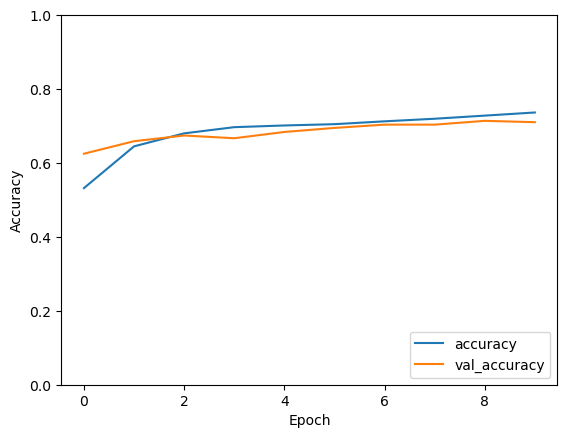

In [9]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

# In[2]: Load the Data
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Make sure to replace 'your_data.csv' with the path to your dataset

# In[3]: Preprocess the Data
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
# Here, we assume each sample is a single time step
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# In[4]: Build the RNN Model
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]), activation='relu'))
model.add(Dropout(0.2))  # Adding dropout to prevent overfitting
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for Severity

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# In[5]: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# In[6]: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = model.predict(X_test)a
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# In[7]: Save the Model
model.save('rnn_severity_model.h5')

# Optionally, plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Epoch 1/20


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4464 - loss: 1.2411 - val_accuracy: 0.6118 - val_loss: 0.8674
Epoch 2/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6014 - loss: 0.9042 - val_accuracy: 0.6559 - val_loss: 0.8048
Epoch 3/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6282 - loss: 0.8218 - val_accuracy: 0.6713 - val_loss: 0.7754
Epoch 4/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6770 - loss: 0.7502 - val_accuracy: 0.6691 - val_loss: 0.7624
Epoch 5/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6851 - loss: 0.7310 - val_accuracy: 0.6846 - val_loss: 0.7517
Epoch 6/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6857 - loss: 0.7206 - val_accuracy: 0.6868 - val_loss: 0.7510
Epoch 7/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6949 - loss: 0.6835 - val_accuracy: 0.6816 - val_loss: 0.7585
Epoch 8/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7295 - loss: 0.6541 - val_accuracy: 0.6963 - val_loss: 0.7535


              precision    recall  f1-score   support

           0       0.71      0.68      0.69       544
           1       0.61      0.69      0.65       567
           2       0.81      0.73      0.77       589

    accuracy                           0.70      1700
   macro avg       0.71      0.70      0.70      1700
weighted avg       0.71      0.70      0.70      1700

Test Accuracy Score: 0.7011764705882353


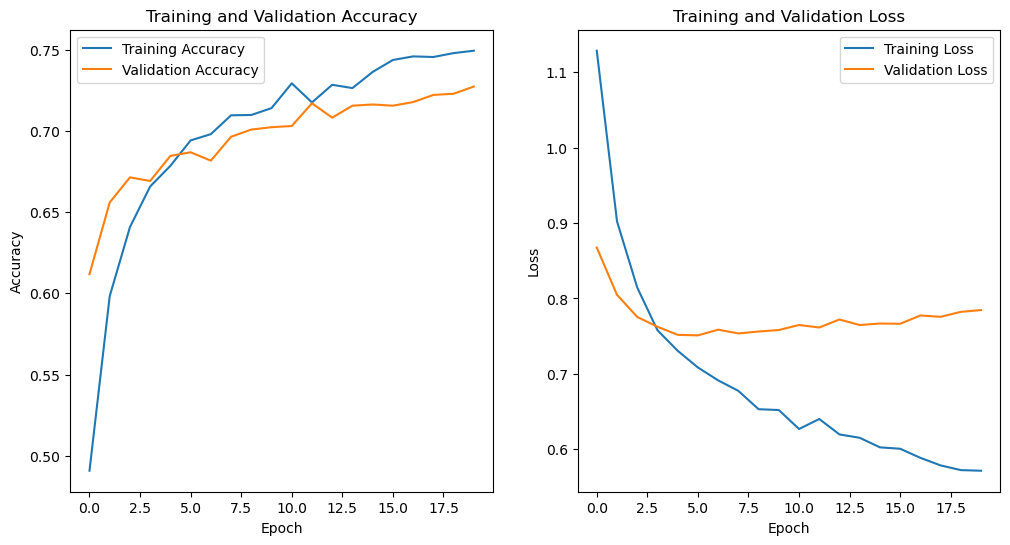

In [10]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# In[2]: Load the Data
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct

# In[3]: Preprocess the Data
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# In[4]: Build the RNN Model
model = Sequential()
model.add(SimpleRNN(units=100, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]), activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # Increasing dropout to prevent overfitting
model.add(SimpleRNN(units=50, activation='relu'))  # Additional RNN layer
model.add(Dropout(0.3))  # Adding dropout
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for Severity

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# In[5]: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)  # Increased epochs

# In[6]: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy Score: {test_accuracy}")

# In[7]: Save the Model
model.save('rnn_severity_model.h5')

# Optionally, plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4390 - loss: 1.2517 - val_accuracy: 0.6346 - val_loss: 0.8557
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6037 - loss: 0.8787 - val_accuracy: 0.6647 - val_loss: 0.7961
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6467 - loss: 0.7999 - val_accuracy: 0.6713 - val_loss: 0.7682
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6632 - loss: 0.7576 - val_accuracy: 0.6824 - val_loss: 0.7515
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6800 - loss: 0.7309 - val_accuracy: 0.6919 - val_loss: 0.7439
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6867 - loss: 0.7053 - val_accuracy: 0.7029 - val_loss: 0.7387
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7065 - loss: 0.6774 - val_accuracy: 0.6926 - val_loss: 0.7418
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7093 - loss: 0.6712 - val_accuracy: 0.7059 - val_loss

              precision    recall  f1-score   support

           0       0.67      0.72      0.70       544
           1       0.61      0.62      0.61       567
           2       0.78      0.72      0.75       589

    accuracy                           0.69      1700
   macro avg       0.69      0.69      0.69      1700
weighted avg       0.69      0.69      0.69      1700

Test Accuracy Score: 0.6870588235294117


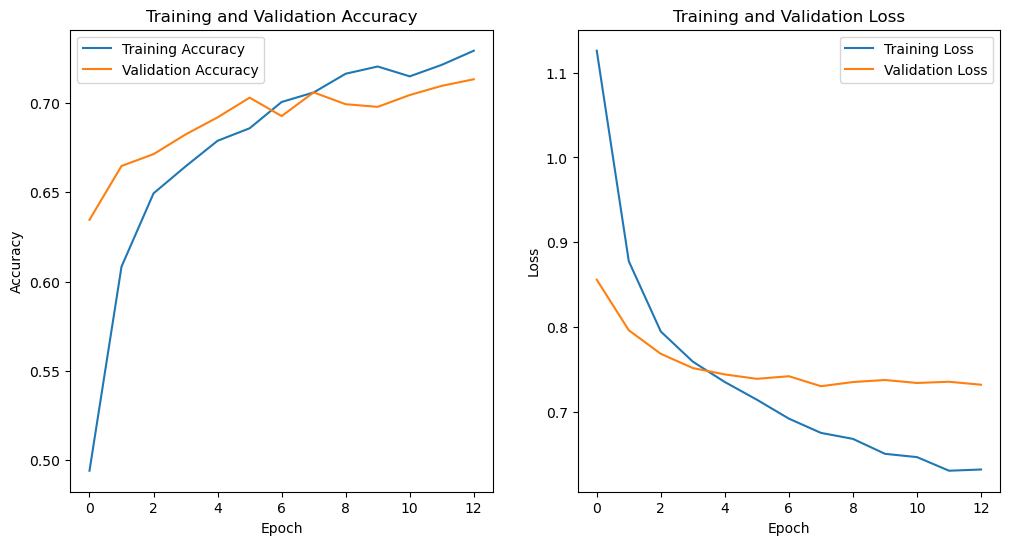

In [11]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# In[2]: Load the Data
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct

# In[3]: Preprocess the Data
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# In[4]: Build the Simple RNN Model
model = Sequential()
model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]), activation='relu'))
model.add(Dropout(0.3))  # Adding dropout to prevent overfitting
model.add(SimpleRNN(units=50, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for Severity

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# In[5]: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# In[6]: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test Accuracy Score: {test_accuracy}")

# In[7]: Save the Model
model.save('simple_rnn_severity_model.h5')

# Optionally, plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [12]:
## with K fold

Epoch 1/50


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4486 - loss: 1.2593 - val_accuracy: 0.6041 - val_loss: 0.8406
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6060 - loss: 0.8856 - val_accuracy: 0.6482 - val_loss: 0.7875
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6348 - loss: 0.8194 - val_accuracy: 0.6641 - val_loss: 0.7639
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6659 - loss: 0.7513 - val_accuracy: 0.6729 - val_loss: 0.7449
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6853 - loss: 0.7335 - val_accuracy: 0.6747 - val_loss: 0.7369
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6757 - loss: 0.7320 - val_accuracy: 0.6771 - val_loss: 0.7297
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7001 - loss: 0.6841 - val_accuracy: 0.6918 - val_loss: 0.7279
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7100 - loss: 0.6773 - val_accuracy: 0.6900 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4335 - loss: 1.1944 - val_accuracy: 0.6398 - val_loss: 0.8426
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5904 - loss: 0.8738 - val_accuracy: 0.6692 - val_loss: 0.7702
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6486 - loss: 0.7900 - val_accuracy: 0.6857 - val_loss: 0.7371
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6690 - loss: 0.7550 - val_accuracy: 0.6998 - val_loss: 0.7225
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6754 - loss: 0.7199 - val_accuracy: 0.6951 - val_loss: 0.7138
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6691 - loss: 0.7208 - val_accuracy: 0.6951 - val_loss: 0.7120
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6849 - loss: 0.7074 - val_accuracy: 0.6963 - val_loss: 0.7108
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7099 - loss: 0.6646 - val_accuracy: 0.7010 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4304 - loss: 1.2983 - val_accuracy: 0.6245 - val_loss: 0.8576
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5847 - loss: 0.9030 - val_accuracy: 0.6533 - val_loss: 0.7845
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6371 - loss: 0.8113 - val_accuracy: 0.6675 - val_loss: 0.7567
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6575 - loss: 0.7683 - val_accuracy: 0.6828 - val_loss: 0.7385
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6802 - loss: 0.7435 - val_accuracy: 0.6845 - val_loss: 0.7253
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6884 - loss: 0.7116 - val_accuracy: 0.6945 - val_loss: 0.7157
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7108 - loss: 0.6739 - val_accuracy: 0.7004 - val_loss: 0.7123
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7063 - loss: 0.6697 - val_accuracy: 0.7039 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4485 - loss: 1.2369 - val_accuracy: 0.6463 - val_loss: 0.8314
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5987 - loss: 0.8930 - val_accuracy: 0.6527 - val_loss: 0.7941
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6409 - loss: 0.8060 - val_accuracy: 0.6757 - val_loss: 0.7660
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6656 - loss: 0.7557 - val_accuracy: 0.6810 - val_loss: 0.7517
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6758 - loss: 0.7242 - val_accuracy: 0.6904 - val_loss: 0.7371
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6945 - loss: 0.6931 - val_accuracy: 0.6851 - val_loss: 0.7376
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7083 - loss: 0.6778 - val_accuracy: 0.6933 - val_loss: 0.7380
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7067 - loss: 0.6692 - val_accuracy: 0.6963 - val_

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4325 - loss: 1.3123 - val_accuracy: 0.6127 - val_loss: 0.8638
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5972 - loss: 0.9065 - val_accuracy: 0.6492 - val_loss: 0.7926
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6304 - loss: 0.8203 - val_accuracy: 0.6686 - val_loss: 0.7665
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6567 - loss: 0.7699 - val_accuracy: 0.6675 - val_loss: 0.7566
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6770 - loss: 0.7133 - val_accuracy: 0.6757 - val_loss: 0.7477
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6920 - loss: 0.7059 - val_accuracy: 0.6798 - val_loss: 0.7406
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6980 - loss: 0.6842 - val_accuracy: 0.6839 - val_loss: 0.7441
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7044 - loss: 0.6762 - val_accuracy: 0.6916 - val_

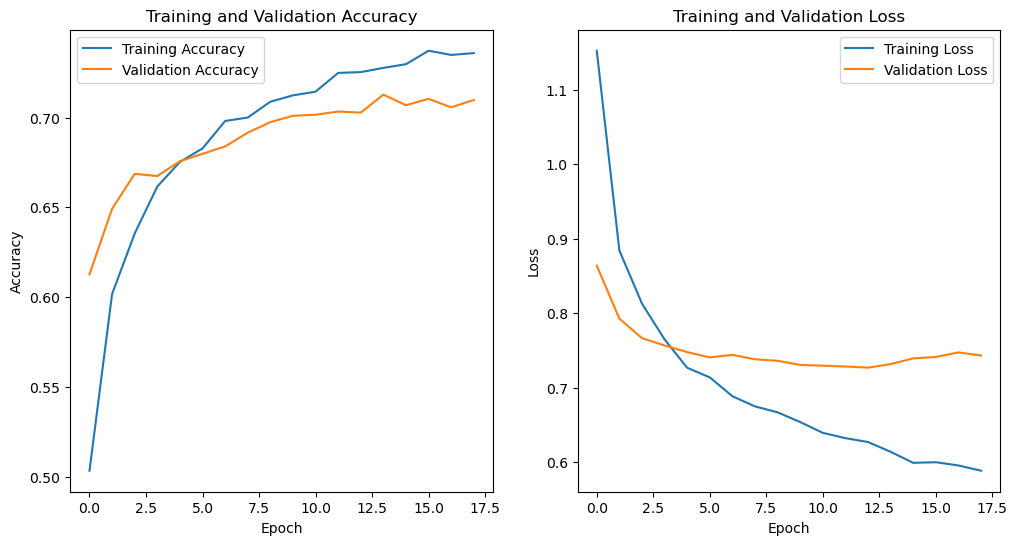

In [13]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# In[2]: Load the Data
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct

# In[3]: Preprocess the Data
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# In[4]: Define the Model Building Function
def build_model():
    model = Sequential()
    model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]), activation='relu'))
    model.add(Dropout(0.3))
    model.add(SimpleRNN(units=50, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# In[5]: K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold = 1
accuracies = []
reports = []

for train_index, val_index in kf.split(X_reshaped):
    X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Build and compile the model
    model = build_model()
    
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    accuracies.append(accuracy)
    
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Store classification report
    reports.append(classification_report(y_val, y_pred_classes, output_dict=True))
    
    print(f"Fold {fold} - Test Loss: {loss}, Test Accuracy: {accuracy}")
    fold += 1

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy across folds: {mean_accuracy}")

# Optionally, plot the last training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Epoch 1/50


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4268 - loss: 1.3752 - val_accuracy: 0.6371 - val_loss: 0.8364 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6047 - loss: 0.8943 - val_accuracy: 0.6494 - val_loss: 0.7892 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6446 - loss: 0.7969 - val_accuracy: 0.6600 - val_loss: 0.7669 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6571 - loss: 0.7635 - val_accuracy: 0.6706 - val_loss: 0.7536 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6818 - loss: 0.7280 - val_accuracy: 0.6706 - val_loss: 0.7431 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6788 - loss: 0.7135 - val_accuracy: 0.6806 - val_loss: 0.7336 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7055 - loss: 0.6755 - val_accu

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4599 - loss: 1.3106 - val_accuracy: 0.6392 - val_loss: 0.8353 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5895 - loss: 0.9115 - val_accuracy: 0.6816 - val_loss: 0.7730 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6472 - loss: 0.7995 - val_accuracy: 0.6822 - val_loss: 0.7380 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6533 - loss: 0.7594 - val_accuracy: 0.7004 - val_loss: 0.7249 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6709 - loss: 0.7311 - val_accuracy: 0.6981 - val_loss: 0.7218 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6667 - loss: 0.7453 - val_accuracy: 0.6928 - val_loss: 0.7085 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6909 - loss: 0.6986 - val_accu

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4481 - loss: 1.3666 - val_accuracy: 0.6157 - val_loss: 0.8489 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5915 - loss: 0.9196 - val_accuracy: 0.6521 - val_loss: 0.7766 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6461 - loss: 0.8047 - val_accuracy: 0.6592 - val_loss: 0.7535 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6651 - loss: 0.7629 - val_accuracy: 0.6816 - val_loss: 0.7258 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6745 - loss: 0.7400 - val_accuracy: 0.6945 - val_loss: 0.7164 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6736 - loss: 0.7328 - val_accuracy: 0.6916 - val_loss: 0.7101 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7042 - loss: 0.6900 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4457 - loss: 1.3387 - val_accuracy: 0.6404 - val_loss: 0.8444 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5873 - loss: 0.9029 - val_accuracy: 0.6633 - val_loss: 0.7884 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6362 - loss: 0.7978 - val_accuracy: 0.6704 - val_loss: 0.7669 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6700 - loss: 0.7575 - val_accuracy: 0.6733 - val_loss: 0.7479 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6748 - loss: 0.7194 - val_accuracy: 0.6839 - val_loss: 0.7428 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6879 - loss: 0.7007 - val_accuracy: 0.6916 - val_loss: 0.7358 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6969 - loss: 0.6878 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4506 - loss: 1.3821 - val_accuracy: 0.6333 - val_loss: 0.8402 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5977 - loss: 0.9191 - val_accuracy: 0.6675 - val_loss: 0.7826 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6513 - loss: 0.7891 - val_accuracy: 0.6727 - val_loss: 0.7652 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6608 - loss: 0.7561 - val_accuracy: 0.6763 - val_loss: 0.7556 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6633 - loss: 0.7502 - val_accuracy: 0.6857 - val_loss: 0.7415 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6785 - loss: 0.7124 - val_accuracy: 0.6892 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6836 - loss: 0.7097 - val_accura

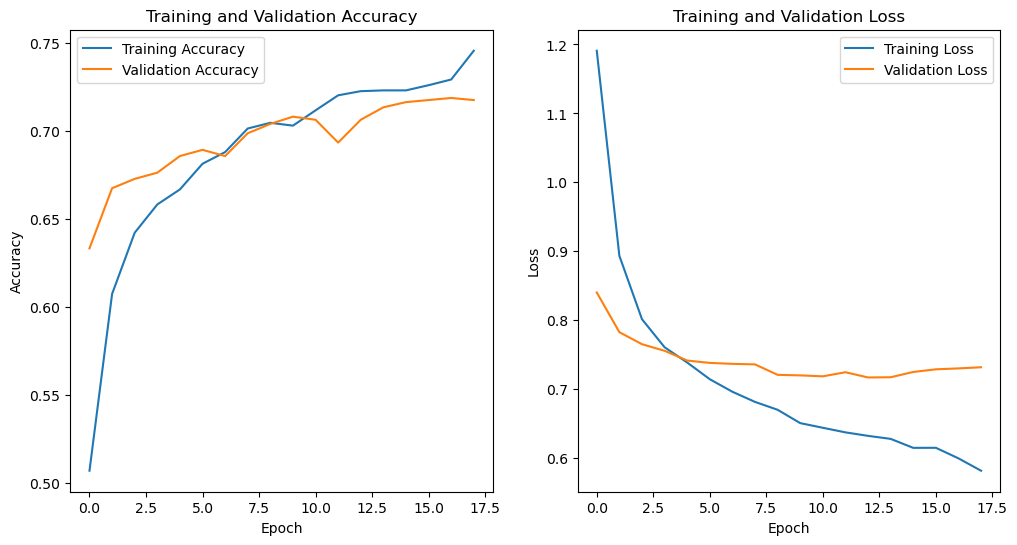

In [14]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# In[2]: Load the Data
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct

# In[3]: Preprocess the Data
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# In[4]: Define the Model Building Function
def build_model():
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(units=100, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]))))
    model.add(Dropout(0.4))
    model.add(Bidirectional(SimpleRNN(units=50, activation='relu')))
    model.add(Dropout(0.4))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# In[5]: K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold = 1
accuracies = []
reports = []

for train_index, val_index in kf.split(X_reshaped):
    X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Build and compile the model
    model = build_model()
    
    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_reduction], verbose=1)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    accuracies.append(accuracy)
    
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Store classification report
    reports.append(classification_report(y_val, y_pred_classes, output_dict=True))
    
    print(f"Fold {fold} - Test Loss: {loss}, Test Accuracy: {accuracy}")
    fold += 1

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy across folds: {mean_accuracy}")

# Optionally, plot the training history of the last fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Epoch 1/50


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4320 - loss: 1.3656 - val_accuracy: 0.6076 - val_loss: 0.9052 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5533 - loss: 0.9847 - val_accuracy: 0.6218 - val_loss: 0.8427 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6160 - loss: 0.8851 - val_accuracy: 0.6435 - val_loss: 0.8005 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6329 - loss: 0.8276 - val_accuracy: 0.6524 - val_loss: 0.7784 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6483 - loss: 0.7904 - val_accuracy: 0.6553 - val_loss: 0.7681 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6611 - loss: 0.7616 - val_accuracy: 0.6624 - val_loss: 0.7547 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6735 - loss: 0.7363 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4297 - loss: 1.3632 - val_accuracy: 0.6557 - val_loss: 0.8742 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5634 - loss: 0.9633 - val_accuracy: 0.6604 - val_loss: 0.8105 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6202 - loss: 0.8336 - val_accuracy: 0.6727 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6393 - loss: 0.8000 - val_accuracy: 0.6775 - val_loss: 0.7520 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6475 - loss: 0.8025 - val_accuracy: 0.6892 - val_loss: 0.7416 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6604 - loss: 0.7573 - val_accuracy: 0.6804 - val_loss: 0.7359 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6683 - loss: 0.7403 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4153 - loss: 1.4227 - val_accuracy: 0.6280 - val_loss: 0.8936 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5686 - loss: 0.9674 - val_accuracy: 0.6563 - val_loss: 0.8306 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5953 - loss: 0.8862 - val_accuracy: 0.6651 - val_loss: 0.7934 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6265 - loss: 0.8241 - val_accuracy: 0.6639 - val_loss: 0.7710 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6455 - loss: 0.7828 - val_accuracy: 0.6786 - val_loss: 0.7546 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6491 - loss: 0.7744 - val_accuracy: 0.6869 - val_loss: 0.7467 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6679 - loss: 0.7602 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4158 - loss: 1.4540 - val_accuracy: 0.6198 - val_loss: 0.8931 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5684 - loss: 0.9860 - val_accuracy: 0.6274 - val_loss: 0.8459 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6082 - loss: 0.8997 - val_accuracy: 0.6592 - val_loss: 0.8018 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6270 - loss: 0.8232 - val_accuracy: 0.6751 - val_loss: 0.7756 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6399 - loss: 0.8020 - val_accuracy: 0.6757 - val_loss: 0.7635 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6579 - loss: 0.7712 - val_accuracy: 0.6804 - val_loss: 0.7533 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6615 - loss: 0.7384 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4052 - loss: 1.3733 - val_accuracy: 0.6027 - val_loss: 0.8987 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5723 - loss: 0.9487 - val_accuracy: 0.6492 - val_loss: 0.8316 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6144 - loss: 0.8540 - val_accuracy: 0.6586 - val_loss: 0.7945 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6316 - loss: 0.8143 - val_accuracy: 0.6680 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6502 - loss: 0.7800 - val_accuracy: 0.6751 - val_loss: 0.7559 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6666 - loss: 0.7484 - val_accuracy: 0.6875 - val_loss: 0.7469 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6737 - loss: 0.7407 - val_accurac

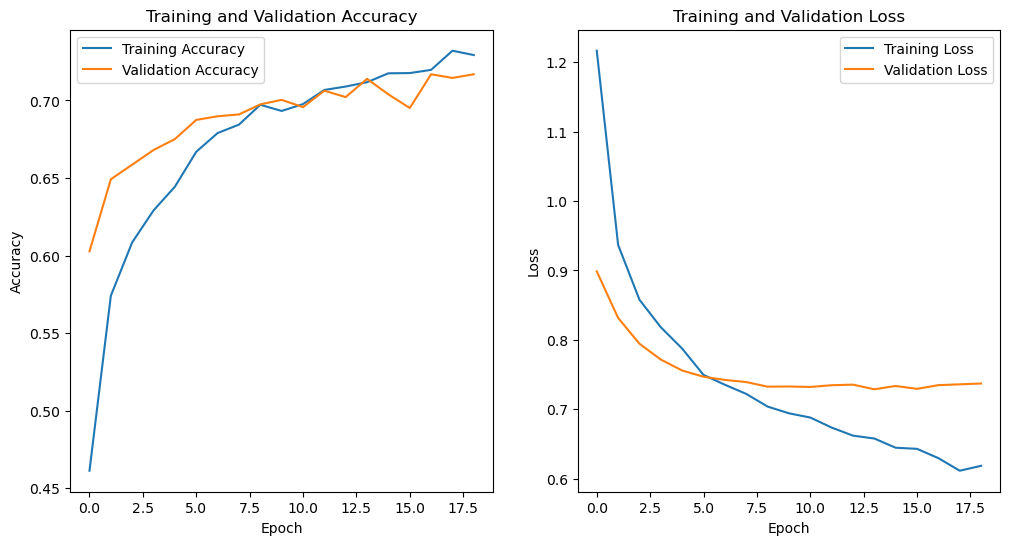

In [15]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# In[2]: Load the Data
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct

# In[3]: Preprocess the Data
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# In[4]: Define the Model Building Function with Stacked Simple RNN
def build_model():
    model = Sequential()
    model.add(SimpleRNN(units=100, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
    model.add(Dropout(0.4))
    model.add(SimpleRNN(units=50, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# In[5]: K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold = 1
accuracies = []
reports = []

for train_index, val_index in kf.split(X_reshaped):
    X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Build and compile the model
    model = build_model()
    
    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_reduction], verbose=1)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    accuracies.append(accuracy)
    
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Store classification report
    reports.append(classification_report(y_val, y_pred_classes, output_dict=True))
    
    print(f"Fold {fold} - Test Loss: {loss}, Test Accuracy: {accuracy}")
    fold += 1

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy across folds: {mean_accuracy}")

# Optionally, plot the training history of the last fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


Epoch 1/50


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4051 - loss: 1.3216 - val_accuracy: 0.6206 - val_loss: 0.9026 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5614 - loss: 0.9793 - val_accuracy: 0.6441 - val_loss: 0.8347 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5978 - loss: 0.9019 - val_accuracy: 0.6400 - val_loss: 0.8026 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6304 - loss: 0.8305 - val_accuracy: 0.6559 - val_loss: 0.7832 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6523 - loss: 0.7814 - val_accuracy: 0.6565 - val_loss: 0.7649 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6668 - loss: 0.7713 - val_accuracy: 0.6647 - val_loss: 0.7616 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6700 - loss: 0.7507 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4144 - loss: 1.3947 - val_accuracy: 0.6051 - val_loss: 0.9252 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5556 - loss: 0.9951 - val_accuracy: 0.6492 - val_loss: 0.8391 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5941 - loss: 0.8827 - val_accuracy: 0.6739 - val_loss: 0.7868 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6220 - loss: 0.8292 - val_accuracy: 0.6763 - val_loss: 0.7596 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6345 - loss: 0.8012 - val_accuracy: 0.6857 - val_loss: 0.7426 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6476 - loss: 0.7724 - val_accuracy: 0.6922 - val_loss: 0.7378 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6646 - loss: 0.7604 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4000 - loss: 1.2056 - val_accuracy: 0.6027 - val_loss: 0.9246 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5443 - loss: 0.9595 - val_accuracy: 0.6469 - val_loss: 0.8413 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6061 - loss: 0.8693 - val_accuracy: 0.6592 - val_loss: 0.7975 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6273 - loss: 0.8208 - val_accuracy: 0.6645 - val_loss: 0.7733 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - loss: 0.7880 - val_accuracy: 0.6751 - val_loss: 0.7564 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6552 - loss: 0.7721 - val_accuracy: 0.6786 - val_loss: 0.7485 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6780 - loss: 0.7321 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4363 - loss: 1.2223 - val_accuracy: 0.6080 - val_loss: 0.8954 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5699 - loss: 0.9256 - val_accuracy: 0.6398 - val_loss: 0.8322 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6077 - loss: 0.8445 - val_accuracy: 0.6622 - val_loss: 0.7974 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6406 - loss: 0.7824 - val_accuracy: 0.6633 - val_loss: 0.7825 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6438 - loss: 0.7719 - val_accuracy: 0.6639 - val_loss: 0.7738 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6708 - loss: 0.7307 - val_accuracy: 0.6669 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6725 - loss: 0.7339 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4134 - loss: 1.2584 - val_accuracy: 0.5862 - val_loss: 0.9281 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5466 - loss: 0.9633 - val_accuracy: 0.6239 - val_loss: 0.8413 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6041 - loss: 0.8702 - val_accuracy: 0.6627 - val_loss: 0.8045 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6286 - loss: 0.8159 - val_accuracy: 0.6651 - val_loss: 0.7845 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6356 - loss: 0.8008 - val_accuracy: 0.6675 - val_loss: 0.7706 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6527 - loss: 0.7716 - val_accuracy: 0.6704 - val_loss: 0.7578 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6596 - loss: 0.7412 - val_accurac

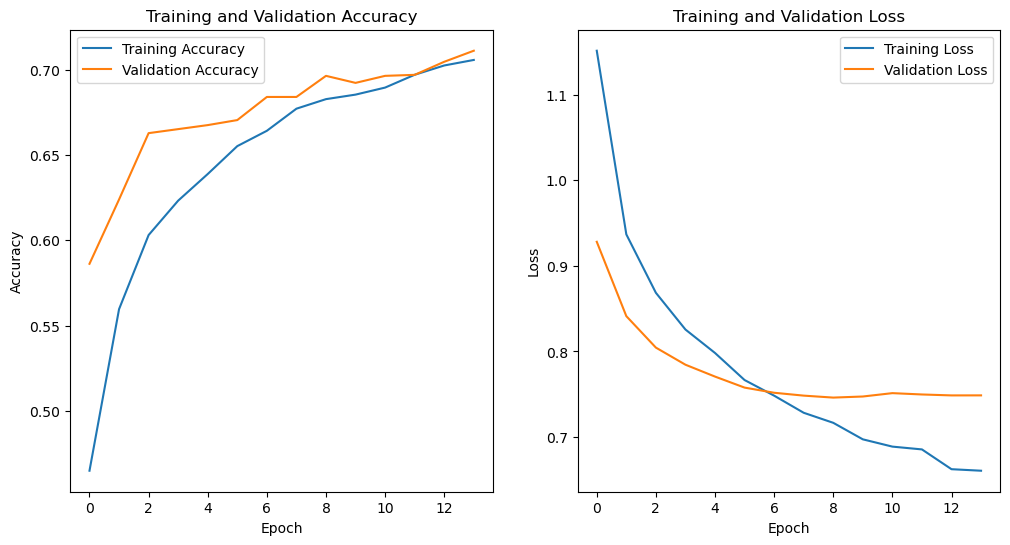

In [16]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# In[2]: Load the Data
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct

# In[3]: Preprocess the Data
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# In[4]: Define the Simplified Model
def build_model():
    model = Sequential()
    model.add(SimpleRNN(units=50, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
    model.add(Dropout(0.3))  # Slightly lower dropout
    model.add(SimpleRNN(units=25, activation='relu'))  # Fewer units
    model.add(Dropout(0.3))  # Slightly lower dropout
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# In[5]: K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold = 1
accuracies = []
reports = []

for train_index, val_index in kf.split(X_reshaped):
    X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Build and compile the model
    model = build_model()
    
    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_reduction], verbose=1)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    accuracies.append(accuracy)
    
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Store classification report
    reports.append(classification_report(y_val, y_pred_classes, output_dict=True))
    
    print(f"Fold {fold} - Test Loss: {loss}, Test Accuracy: {accuracy}")
    fold += 1

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy across folds: {mean_accuracy}")

# Optionally, plot the training history of the last fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [17]:
## feature selection: corr and rfe and hyperparameter optimization (grid search)

2024-08-21 13:53:09.536534: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 13:53:09.540636: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 13:53:09.552290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 13:53:09.569501: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 13:53:09.574342: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 13:53:09.586885: I tensorflow/core/platform/cpu_feature_gu

Loading data...
Data loaded successfully.
Preprocessing the data...
Features normalized.
Performing correlation analysis...
Removed 45 features based on correlation analysis.
Performing Recursive Feature Elimination (RFE)...
Selected features using RFE: ['cDNA', 'pos', 'Domain_A2', 'Domain_A3', 'Domain_B', 'Domain_C1', 'Domain_C2', 'Effect_Nonsense', 'Sequence Context_CGA TGA', 'Sequence Context_CGT CAT', 'Original AA_Arg', 'Original AA_Asp', 'Original AA_Gly', 'Original AA_Leu', 'Original AA_Ser', 'Original AA_Trp', 'Original AA_Val', 'New AA_Arg', 'New AA_Asp', 'New AA_Cys', 'New AA_Glu', 'New AA_His', 'New AA_Leu', 'New AA_Phe', 'New AA_Pro', 'New AA_Ser', 'New AA_Thr', 'New AA_Val', 'Locationingene_11', 'Locationingene_12', 'Locationingene_13', 'Locationingene_14', 'Locationingene_16', 'Locationingene_17', 'Locationingene_18', 'Locationingene_19', 'Locationingene_23', 'Locationingene_24', 'Locationingene_26', 'Locationingene_3', 'Locationingene_4', 'Locationingene_7', 'Locationinge

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4230 - loss: 1.1593 - val_accuracy: 0.5706 - val_loss: 0.9213 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5534 - loss: 0.9339 - val_accuracy: 0.5982 - val_loss: 0.8610 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5749 - loss: 0.8920 - val_accuracy: 0.6241 - val_loss: 0.8250 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6212 - loss: 0.8291 - val_accuracy: 0.6294 - val_loss: 0.8015 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 0.8260 - val_accuracy: 0.6247 - val_loss: 0.7859 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 0.8045 - val_accuracy: 0.6312 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6490 - loss: 0.7719 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4109 - loss: 1.1230 - val_accuracy: 0.5739 - val_loss: 0.9128 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5570 - loss: 0.9085 - val_accuracy: 0.6151 - val_loss: 0.8611 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5786 - loss: 0.8600 - val_accuracy: 0.6374 - val_loss: 0.8239 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6064 - loss: 0.8289 - val_accuracy: 0.6404 - val_loss: 0.8051 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6138 - loss: 0.8120 - val_accuracy: 0.6557 - val_loss: 0.7861 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6298 - loss: 0.7907 - val_accuracy: 0.6569 - val_loss: 0.7788 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6363 - loss: 0.7842 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4034 - loss: 1.1465 - val_accuracy: 0.5409 - val_loss: 0.9211 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5322 - loss: 0.9403 - val_accuracy: 0.5839 - val_loss: 0.8656 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5691 - loss: 0.8882 - val_accuracy: 0.6162 - val_loss: 0.8298 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6085 - loss: 0.8321 - val_accuracy: 0.6239 - val_loss: 0.8066 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6114 - loss: 0.8254 - val_accuracy: 0.6398 - val_loss: 0.7852 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6325 - loss: 0.8022 - val_accuracy: 0.6439 - val_loss: 0.7692 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6391 - loss: 0.7939 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3783 - loss: 1.1800 - val_accuracy: 0.5562 - val_loss: 0.9378 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5409 - loss: 0.9296 - val_accuracy: 0.6074 - val_loss: 0.8693 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 0.8794 - val_accuracy: 0.6198 - val_loss: 0.8428 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6123 - loss: 0.8414 - val_accuracy: 0.6280 - val_loss: 0.8260 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6202 - loss: 0.8050 - val_accuracy: 0.6398 - val_loss: 0.8068 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6373 - loss: 0.7902 - val_accuracy: 0.6410 - val_loss: 0.7948 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.7828 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4245 - loss: 1.1393 - val_accuracy: 0.5721 - val_loss: 0.9352 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5402 - loss: 0.9363 - val_accuracy: 0.5892 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5865 - loss: 0.8672 - val_accuracy: 0.6027 - val_loss: 0.8308 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6064 - loss: 0.8365 - val_accuracy: 0.6186 - val_loss: 0.8161 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6285 - loss: 0.8112 - val_accuracy: 0.6339 - val_loss: 0.8001 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6322 - loss: 0.7943 - val_accuracy: 0.6321 - val_loss: 0.7888 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6398 - loss: 0.7913 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4214 - loss: 1.1944 - val_accuracy: 0.5576 - val_loss: 0.9609 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5367 - loss: 0.9722 - val_accuracy: 0.5724 - val_loss: 0.9022 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5560 - loss: 0.9323 - val_accuracy: 0.5900 - val_loss: 0.8667 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5658 - loss: 0.8968 - val_accuracy: 0.6000 - val_loss: 0.8476 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5939 - loss: 0.8589 - val_accuracy: 0.6088 - val_loss: 0.8344 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6028 - loss: 0.8495 - val_accuracy: 0.6112 - val_loss: 0.8225 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6079 - loss: 0.8428 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3608 - loss: 1.1254 - val_accuracy: 0.5168 - val_loss: 0.9638 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5129 - loss: 0.9597 - val_accuracy: 0.5456 - val_loss: 0.9019 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5390 - loss: 0.9053 - val_accuracy: 0.5715 - val_loss: 0.8726 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 0.8854 - val_accuracy: 0.5886 - val_loss: 0.8499 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 0.8573 - val_accuracy: 0.6098 - val_loss: 0.8325 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5916 - loss: 0.8333 - val_accuracy: 0.6192 - val_loss: 0.8171 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6016 - loss: 0.8203 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3603 - loss: 1.2108 - val_accuracy: 0.5321 - val_loss: 0.9844 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5072 - loss: 0.9854 - val_accuracy: 0.6157 - val_loss: 0.8985 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5596 - loss: 0.9247 - val_accuracy: 0.6151 - val_loss: 0.8572 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.8792 - val_accuracy: 0.6109 - val_loss: 0.8279 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6011 - loss: 0.8467 - val_accuracy: 0.6221 - val_loss: 0.8073 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6114 - loss: 0.8336 - val_accuracy: 0.6339 - val_loss: 0.7930 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6215 - loss: 0.8176 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3872 - loss: 1.1635 - val_accuracy: 0.5368 - val_loss: 0.9422 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5367 - loss: 0.9353 - val_accuracy: 0.5756 - val_loss: 0.8830 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5641 - loss: 0.8838 - val_accuracy: 0.5868 - val_loss: 0.8591 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5822 - loss: 0.8705 - val_accuracy: 0.6004 - val_loss: 0.8418 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - loss: 0.8503 - val_accuracy: 0.6039 - val_loss: 0.8333 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6068 - loss: 0.8265 - val_accuracy: 0.6174 - val_loss: 0.8199 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6125 - loss: 0.8185 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3933 - loss: 1.1509 - val_accuracy: 0.5315 - val_loss: 0.9681 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5192 - loss: 0.9671 - val_accuracy: 0.5851 - val_loss: 0.9092 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5704 - loss: 0.9141 - val_accuracy: 0.5903 - val_loss: 0.8731 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5892 - loss: 0.8653 - val_accuracy: 0.6080 - val_loss: 0.8484 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6042 - loss: 0.8551 - val_accuracy: 0.6168 - val_loss: 0.8325 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6047 - loss: 0.8375 - val_accuracy: 0.6192 - val_loss: 0.8203 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6264 - loss: 0.8234 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4555 - loss: 1.0578 - val_accuracy: 0.5776 - val_loss: 0.8601 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6012 - loss: 0.8603 - val_accuracy: 0.6188 - val_loss: 0.8206 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 0.8292 - val_accuracy: 0.6247 - val_loss: 0.8034 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6401 - loss: 0.7888 - val_accuracy: 0.6347 - val_loss: 0.7817 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6498 - loss: 0.7840 - val_accuracy: 0.6400 - val_loss: 0.7746 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 0.7539 - val_accuracy: 0.6518 - val_loss: 0.7648 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - loss: 0.7457 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4248 - loss: 1.1049 - val_accuracy: 0.5968 - val_loss: 0.8927 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5873 - loss: 0.8714 - val_accuracy: 0.6286 - val_loss: 0.8294 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6296 - loss: 0.8129 - val_accuracy: 0.6463 - val_loss: 0.7876 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6371 - loss: 0.7894 - val_accuracy: 0.6569 - val_loss: 0.7668 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 0.7720 - val_accuracy: 0.6604 - val_loss: 0.7573 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6483 - loss: 0.7628 - val_accuracy: 0.6792 - val_loss: 0.7379 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.7387 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4208 - loss: 1.1460 - val_accuracy: 0.5933 - val_loss: 0.8699 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5733 - loss: 0.8839 - val_accuracy: 0.6298 - val_loss: 0.8169 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6141 - loss: 0.8325 - val_accuracy: 0.6445 - val_loss: 0.7787 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 0.7904 - val_accuracy: 0.6527 - val_loss: 0.7614 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - loss: 0.7701 - val_accuracy: 0.6539 - val_loss: 0.7516 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 0.7640 - val_accuracy: 0.6680 - val_loss: 0.7408 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - loss: 0.7496 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4568 - loss: 1.0705 - val_accuracy: 0.5945 - val_loss: 0.9054 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 0.8840 - val_accuracy: 0.6162 - val_loss: 0.8362 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6298 - loss: 0.8037 - val_accuracy: 0.6368 - val_loss: 0.8055 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - loss: 0.7814 - val_accuracy: 0.6510 - val_loss: 0.7861 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.7522 - val_accuracy: 0.6533 - val_loss: 0.7707 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 0.7484 - val_accuracy: 0.6610 - val_loss: 0.7649 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - loss: 0.7460 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model for fold 15...
Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4401 - loss: 1.0939 - val_accuracy: 0.5968 - val_loss: 0.8741 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5741 - loss: 0.8927 - val_accuracy: 0.6062 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 0.8324 - val_accuracy: 0.6221 - val_loss: 0.7955 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6319 - loss: 0.7994 - val_accuracy: 0.6516 - val_loss: 0.7779 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.7717 - val_accuracy: 0.6416 - val_loss: 0.7637 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - loss: 0.7499 - val_accuracy: 0.6610 - val_loss: 0.7541 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4372 - loss: 1.1197 - val_accuracy: 0.5835 - val_loss: 0.8774 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5745 - loss: 0.9013 - val_accuracy: 0.6071 - val_loss: 0.8385 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.8616 - val_accuracy: 0.6224 - val_loss: 0.8122 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6049 - loss: 0.8338 - val_accuracy: 0.6224 - val_loss: 0.8011 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6421 - loss: 0.7950 - val_accuracy: 0.6253 - val_loss: 0.7858 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6517 - loss: 0.7772 - val_accuracy: 0.6265 - val_loss: 0.7761 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6433 - loss: 0.7791 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3942 - loss: 1.1747 - val_accuracy: 0.5662 - val_loss: 0.9356 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5522 - loss: 0.9233 - val_accuracy: 0.6027 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5846 - loss: 0.8715 - val_accuracy: 0.6145 - val_loss: 0.8443 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6169 - loss: 0.8406 - val_accuracy: 0.6280 - val_loss: 0.8195 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6189 - loss: 0.8248 - val_accuracy: 0.6451 - val_loss: 0.8000 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6370 - loss: 0.7973 - val_accuracy: 0.6510 - val_loss: 0.7811 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.7909 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4056 - loss: 1.1502 - val_accuracy: 0.5627 - val_loss: 0.9102 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5506 - loss: 0.9253 - val_accuracy: 0.6104 - val_loss: 0.8425 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5959 - loss: 0.8604 - val_accuracy: 0.6151 - val_loss: 0.8146 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6085 - loss: 0.8423 - val_accuracy: 0.6380 - val_loss: 0.7927 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 0.8093 - val_accuracy: 0.6463 - val_loss: 0.7796 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.7982 - val_accuracy: 0.6516 - val_loss: 0.7660 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - loss: 0.7830 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4113 - loss: 1.1110 - val_accuracy: 0.5692 - val_loss: 0.9171 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - loss: 0.9123 - val_accuracy: 0.6086 - val_loss: 0.8637 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6008 - loss: 0.8507 - val_accuracy: 0.6057 - val_loss: 0.8363 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 0.8243 - val_accuracy: 0.6162 - val_loss: 0.8153 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6347 - loss: 0.7946 - val_accuracy: 0.6239 - val_loss: 0.8024 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6379 - loss: 0.7781 - val_accuracy: 0.6298 - val_loss: 0.7917 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - loss: 0.7764 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4006 - loss: 1.1582 - val_accuracy: 0.5727 - val_loss: 0.9264 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5540 - loss: 0.9197 - val_accuracy: 0.6027 - val_loss: 0.8730 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5830 - loss: 0.8771 - val_accuracy: 0.6104 - val_loss: 0.8411 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6007 - loss: 0.8463 - val_accuracy: 0.6257 - val_loss: 0.8185 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6257 - loss: 0.8088 - val_accuracy: 0.6292 - val_loss: 0.8028 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6268 - loss: 0.7986 - val_accuracy: 0.6380 - val_loss: 0.7925 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6393 - loss: 0.7888 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4720 - loss: 1.0759 - val_accuracy: 0.6129 - val_loss: 0.8290 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 0.8445 - val_accuracy: 0.6200 - val_loss: 0.7839 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6493 - loss: 0.7828 - val_accuracy: 0.6276 - val_loss: 0.7585 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - loss: 0.7591 - val_accuracy: 0.6424 - val_loss: 0.7447 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6661 - loss: 0.7410 - val_accuracy: 0.6512 - val_loss: 0.7383 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.7243 - val_accuracy: 0.6600 - val_loss: 0.7330 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - loss: 0.7180 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4680 - loss: 1.0470 - val_accuracy: 0.6145 - val_loss: 0.8421 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6123 - loss: 0.8367 - val_accuracy: 0.6551 - val_loss: 0.8006 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6446 - loss: 0.7891 - val_accuracy: 0.6510 - val_loss: 0.7690 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.7740 - val_accuracy: 0.6610 - val_loss: 0.7475 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 0.7483 - val_accuracy: 0.6633 - val_loss: 0.7335 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.7271 - val_accuracy: 0.6651 - val_loss: 0.7252 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6775 - loss: 0.7165 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4637 - loss: 1.0464 - val_accuracy: 0.6009 - val_loss: 0.8410 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6160 - loss: 0.8380 - val_accuracy: 0.6339 - val_loss: 0.7836 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 0.7971 - val_accuracy: 0.6557 - val_loss: 0.7540 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - loss: 0.7566 - val_accuracy: 0.6569 - val_loss: 0.7446 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - loss: 0.7455 - val_accuracy: 0.6633 - val_loss: 0.7368 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - loss: 0.7108 - val_accuracy: 0.6698 - val_loss: 0.7266 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6815 - loss: 0.7135 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4672 - loss: 1.0525 - val_accuracy: 0.6021 - val_loss: 0.8668 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6088 - loss: 0.8468 - val_accuracy: 0.6286 - val_loss: 0.8203 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 0.7828 - val_accuracy: 0.6474 - val_loss: 0.7852 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6545 - loss: 0.7547 - val_accuracy: 0.6627 - val_loss: 0.7651 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - loss: 0.7411 - val_accuracy: 0.6439 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6692 - loss: 0.7377 - val_accuracy: 0.6733 - val_loss: 0.7455 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.7118 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4354 - loss: 1.0597 - val_accuracy: 0.5956 - val_loss: 0.8660 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6217 - loss: 0.8403 - val_accuracy: 0.6310 - val_loss: 0.8130 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6312 - loss: 0.8029 - val_accuracy: 0.6504 - val_loss: 0.7813 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.7626 - val_accuracy: 0.6598 - val_loss: 0.7635 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 0.7402 - val_accuracy: 0.6669 - val_loss: 0.7533 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.7298 - val_accuracy: 0.6757 - val_loss: 0.7411 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6936 - loss: 0.7095 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4607 - loss: 1.0624 - val_accuracy: 0.5900 - val_loss: 0.8608 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5975 - loss: 0.8720 - val_accuracy: 0.6076 - val_loss: 0.8158 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.8267 - val_accuracy: 0.6288 - val_loss: 0.7847 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6423 - loss: 0.7866 - val_accuracy: 0.6376 - val_loss: 0.7704 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 0.7611 - val_accuracy: 0.6471 - val_loss: 0.7595 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6502 - loss: 0.7685 - val_accuracy: 0.6582 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.7416 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4495 - loss: 1.0756 - val_accuracy: 0.5815 - val_loss: 0.8942 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5849 - loss: 0.8671 - val_accuracy: 0.6186 - val_loss: 0.8348 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.8225 - val_accuracy: 0.6439 - val_loss: 0.8029 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6330 - loss: 0.7861 - val_accuracy: 0.6633 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 0.7631 - val_accuracy: 0.6592 - val_loss: 0.7616 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - loss: 0.7622 - val_accuracy: 0.6633 - val_loss: 0.7542 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.7494 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4643 - loss: 1.0321 - val_accuracy: 0.5898 - val_loss: 0.8566 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5969 - loss: 0.8592 - val_accuracy: 0.6398 - val_loss: 0.8073 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6288 - loss: 0.8051 - val_accuracy: 0.6374 - val_loss: 0.7789 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 0.8031 - val_accuracy: 0.6427 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - loss: 0.7798 - val_accuracy: 0.6504 - val_loss: 0.7502 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6673 - loss: 0.7461 - val_accuracy: 0.6527 - val_loss: 0.7377 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.7469 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4207 - loss: 1.0904 - val_accuracy: 0.5998 - val_loss: 0.8819 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5894 - loss: 0.8720 - val_accuracy: 0.6245 - val_loss: 0.8295 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6113 - loss: 0.8331 - val_accuracy: 0.6315 - val_loss: 0.8071 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.7936 - val_accuracy: 0.6480 - val_loss: 0.7882 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6466 - loss: 0.7783 - val_accuracy: 0.6610 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6586 - loss: 0.7555 - val_accuracy: 0.6680 - val_loss: 0.7604 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 0.7306 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4539 - loss: 1.0293 - val_accuracy: 0.6062 - val_loss: 0.8648 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5899 - loss: 0.8671 - val_accuracy: 0.6227 - val_loss: 0.8146 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - loss: 0.8162 - val_accuracy: 0.6333 - val_loss: 0.7947 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6279 - loss: 0.7915 - val_accuracy: 0.6445 - val_loss: 0.7737 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - loss: 0.7540 - val_accuracy: 0.6474 - val_loss: 0.7631 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6516 - loss: 0.7592 - val_accuracy: 0.6639 - val_loss: 0.7534 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - loss: 0.7238 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4810 - loss: 1.0173 - val_accuracy: 0.6076 - val_loss: 0.8263 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6255 - loss: 0.8190 - val_accuracy: 0.6382 - val_loss: 0.7870 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6528 - loss: 0.7708 - val_accuracy: 0.6359 - val_loss: 0.7655 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - loss: 0.7345 - val_accuracy: 0.6524 - val_loss: 0.7555 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.7105 - val_accuracy: 0.6629 - val_loss: 0.7413 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6852 - loss: 0.7068 - val_accuracy: 0.6600 - val_loss: 0.7404 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7043 - loss: 0.6908 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4773 - loss: 1.0716 - val_accuracy: 0.6186 - val_loss: 0.8250 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6145 - loss: 0.8283 - val_accuracy: 0.6498 - val_loss: 0.7800 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6394 - loss: 0.7807 - val_accuracy: 0.6745 - val_loss: 0.7445 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6695 - loss: 0.7341 - val_accuracy: 0.6780 - val_loss: 0.7277 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6691 - loss: 0.7214 - val_accuracy: 0.6881 - val_loss: 0.7160 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 0.7003 - val_accuracy: 0.6845 - val_loss: 0.7034 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6962 - loss: 0.6835 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5008 - loss: 0.9941 - val_accuracy: 0.6239 - val_loss: 0.8069 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6242 - loss: 0.8150 - val_accuracy: 0.6527 - val_loss: 0.7594 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6593 - loss: 0.7645 - val_accuracy: 0.6633 - val_loss: 0.7351 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6660 - loss: 0.7306 - val_accuracy: 0.6804 - val_loss: 0.7215 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.6975 - val_accuracy: 0.6857 - val_loss: 0.7137 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 0.7103 - val_accuracy: 0.7016 - val_loss: 0.6969 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7053 - loss: 0.6879 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4886 - loss: 1.0297 - val_accuracy: 0.5998 - val_loss: 0.8454 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6247 - loss: 0.8131 - val_accuracy: 0.6445 - val_loss: 0.7946 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6485 - loss: 0.7632 - val_accuracy: 0.6639 - val_loss: 0.7730 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6664 - loss: 0.7298 - val_accuracy: 0.6669 - val_loss: 0.7543 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 0.7214 - val_accuracy: 0.6828 - val_loss: 0.7418 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 0.7025 - val_accuracy: 0.6969 - val_loss: 0.7315 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6959 - loss: 0.6968 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4835 - loss: 1.0522 - val_accuracy: 0.6310 - val_loss: 0.8252 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6316 - loss: 0.8117 - val_accuracy: 0.6451 - val_loss: 0.7824 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6566 - loss: 0.7607 - val_accuracy: 0.6569 - val_loss: 0.7589 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.7346 - val_accuracy: 0.6692 - val_loss: 0.7436 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.7021 - val_accuracy: 0.6786 - val_loss: 0.7301 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.6962 - val_accuracy: 0.6786 - val_loss: 0.7308 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 0.6882 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4870 - loss: 1.0321 - val_accuracy: 0.6053 - val_loss: 0.8463 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6086 - loss: 0.8474 - val_accuracy: 0.6118 - val_loss: 0.8048 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - loss: 0.8103 - val_accuracy: 0.6288 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6535 - loss: 0.7531 - val_accuracy: 0.6376 - val_loss: 0.7618 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.7494 - val_accuracy: 0.6518 - val_loss: 0.7540 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.7274 - val_accuracy: 0.6582 - val_loss: 0.7454 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - loss: 0.7098 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4562 - loss: 1.0269 - val_accuracy: 0.6139 - val_loss: 0.8472 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6047 - loss: 0.8472 - val_accuracy: 0.6433 - val_loss: 0.7922 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 0.7885 - val_accuracy: 0.6627 - val_loss: 0.7633 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 0.7602 - val_accuracy: 0.6727 - val_loss: 0.7382 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 0.7558 - val_accuracy: 0.6751 - val_loss: 0.7252 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - loss: 0.7275 - val_accuracy: 0.6875 - val_loss: 0.7112 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - loss: 0.6968 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4690 - loss: 1.0419 - val_accuracy: 0.6127 - val_loss: 0.8386 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6171 - loss: 0.8399 - val_accuracy: 0.6321 - val_loss: 0.7887 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6413 - loss: 0.7980 - val_accuracy: 0.6510 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6539 - loss: 0.7777 - val_accuracy: 0.6622 - val_loss: 0.7442 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - loss: 0.7555 - val_accuracy: 0.6574 - val_loss: 0.7401 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6792 - loss: 0.7189 - val_accuracy: 0.6622 - val_loss: 0.7353 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - loss: 0.7085 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4871 - loss: 1.0297 - val_accuracy: 0.6168 - val_loss: 0.8495 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6048 - loss: 0.8470 - val_accuracy: 0.6427 - val_loss: 0.8046 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6373 - loss: 0.7853 - val_accuracy: 0.6439 - val_loss: 0.7874 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - loss: 0.7680 - val_accuracy: 0.6616 - val_loss: 0.7620 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6688 - loss: 0.7287 - val_accuracy: 0.6580 - val_loss: 0.7729 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.7218 - val_accuracy: 0.6633 - val_loss: 0.7507 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 0.7078 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4712 - loss: 1.0331 - val_accuracy: 0.5956 - val_loss: 0.8503 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6063 - loss: 0.8529 - val_accuracy: 0.6304 - val_loss: 0.8056 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 0.8058 - val_accuracy: 0.6386 - val_loss: 0.7828 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - loss: 0.7633 - val_accuracy: 0.6663 - val_loss: 0.7617 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.7337 - val_accuracy: 0.6704 - val_loss: 0.7478 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - loss: 0.7275 - val_accuracy: 0.6651 - val_loss: 0.7432 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 0.7215 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3895 - loss: 1.2216 - val_accuracy: 0.5400 - val_loss: 0.9443 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 0.9788 - val_accuracy: 0.5618 - val_loss: 0.8868 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5402 - loss: 0.9248 - val_accuracy: 0.5847 - val_loss: 0.8593 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 0.9030 - val_accuracy: 0.5876 - val_loss: 0.8384 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5788 - loss: 0.8747 - val_accuracy: 0.6000 - val_loss: 0.8245 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5942 - loss: 0.8420 - val_accuracy: 0.6018 - val_loss: 0.8143 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5851 - loss: 0.8413 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3780 - loss: 1.1855 - val_accuracy: 0.5491 - val_loss: 0.9477 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.9715 - val_accuracy: 0.5851 - val_loss: 0.8840 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5501 - loss: 0.9121 - val_accuracy: 0.5939 - val_loss: 0.8585 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5647 - loss: 0.8851 - val_accuracy: 0.6180 - val_loss: 0.8350 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5682 - loss: 0.8720 - val_accuracy: 0.6186 - val_loss: 0.8221 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5865 - loss: 0.8558 - val_accuracy: 0.6239 - val_loss: 0.8111 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5903 - loss: 0.8459 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3892 - loss: 1.2246 - val_accuracy: 0.5544 - val_loss: 0.9222 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5141 - loss: 0.9640 - val_accuracy: 0.5939 - val_loss: 0.8713 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5507 - loss: 0.9102 - val_accuracy: 0.6104 - val_loss: 0.8463 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - loss: 0.8939 - val_accuracy: 0.6133 - val_loss: 0.8257 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5918 - loss: 0.8546 - val_accuracy: 0.6233 - val_loss: 0.8126 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5991 - loss: 0.8389 - val_accuracy: 0.6227 - val_loss: 0.8034 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5983 - loss: 0.8306 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3885 - loss: 1.2462 - val_accuracy: 0.5333 - val_loss: 0.9448 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5194 - loss: 0.9608 - val_accuracy: 0.5762 - val_loss: 0.9031 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5447 - loss: 0.9133 - val_accuracy: 0.5868 - val_loss: 0.8769 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5689 - loss: 0.8883 - val_accuracy: 0.6092 - val_loss: 0.8603 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5821 - loss: 0.8632 - val_accuracy: 0.6133 - val_loss: 0.8422 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6006 - loss: 0.8435 - val_accuracy: 0.6251 - val_loss: 0.8320 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6162 - loss: 0.8302 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3770 - loss: 1.2423 - val_accuracy: 0.5280 - val_loss: 0.9752 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4907 - loss: 0.9986 - val_accuracy: 0.5703 - val_loss: 0.8981 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5358 - loss: 0.9219 - val_accuracy: 0.5750 - val_loss: 0.8659 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5600 - loss: 0.8888 - val_accuracy: 0.6015 - val_loss: 0.8439 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.8509 - val_accuracy: 0.6210 - val_loss: 0.8328 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5955 - loss: 0.8450 - val_accuracy: 0.6245 - val_loss: 0.8217 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6148 - loss: 0.8263 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3629 - loss: 1.1633 - val_accuracy: 0.5212 - val_loss: 0.9812 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 0.9991 - val_accuracy: 0.5500 - val_loss: 0.9150 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5341 - loss: 0.9522 - val_accuracy: 0.5759 - val_loss: 0.8813 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5558 - loss: 0.9144 - val_accuracy: 0.5912 - val_loss: 0.8595 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5533 - loss: 0.9086 - val_accuracy: 0.5924 - val_loss: 0.8459 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5715 - loss: 0.8889 - val_accuracy: 0.6071 - val_loss: 0.8324 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5901 - loss: 0.8568 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3747 - loss: 1.2493 - val_accuracy: 0.5521 - val_loss: 0.9678 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4766 - loss: 1.0181 - val_accuracy: 0.5898 - val_loss: 0.9183 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 0.9606 - val_accuracy: 0.6004 - val_loss: 0.8873 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - loss: 0.9216 - val_accuracy: 0.6039 - val_loss: 0.8662 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5431 - loss: 0.9142 - val_accuracy: 0.6115 - val_loss: 0.8506 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5681 - loss: 0.8729 - val_accuracy: 0.6245 - val_loss: 0.8393 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5705 - loss: 0.8718 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3529 - loss: 1.2284 - val_accuracy: 0.5097 - val_loss: 1.0081 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4761 - loss: 1.0164 - val_accuracy: 0.5421 - val_loss: 0.9333 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5078 - loss: 0.9618 - val_accuracy: 0.5415 - val_loss: 0.8905 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5343 - loss: 0.9277 - val_accuracy: 0.5597 - val_loss: 0.8661 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5426 - loss: 0.9081 - val_accuracy: 0.5986 - val_loss: 0.8505 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5709 - loss: 0.8837 - val_accuracy: 0.5986 - val_loss: 0.8353 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5848 - loss: 0.8714 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3731 - loss: 1.2554 - val_accuracy: 0.4915 - val_loss: 0.9814 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4787 - loss: 1.0120 - val_accuracy: 0.5597 - val_loss: 0.9353 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 0.9459 - val_accuracy: 0.5798 - val_loss: 0.9099 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5345 - loss: 0.9215 - val_accuracy: 0.5933 - val_loss: 0.8888 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5473 - loss: 0.9088 - val_accuracy: 0.6057 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5684 - loss: 0.8815 - val_accuracy: 0.6092 - val_loss: 0.8607 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5678 - loss: 0.8805 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3755 - loss: 1.1611 - val_accuracy: 0.5168 - val_loss: 0.9554 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4923 - loss: 0.9662 - val_accuracy: 0.5444 - val_loss: 0.9024 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5275 - loss: 0.9431 - val_accuracy: 0.5715 - val_loss: 0.8827 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5456 - loss: 0.9028 - val_accuracy: 0.5756 - val_loss: 0.8670 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5731 - loss: 0.8875 - val_accuracy: 0.5898 - val_loss: 0.8541 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5778 - loss: 0.8726 - val_accuracy: 0.5945 - val_loss: 0.8431 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 0.8732 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4328 - loss: 1.1332 - val_accuracy: 0.5724 - val_loss: 0.8896 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5448 - loss: 0.9151 - val_accuracy: 0.6047 - val_loss: 0.8428 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5918 - loss: 0.8675 - val_accuracy: 0.6106 - val_loss: 0.8167 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5908 - loss: 0.8647 - val_accuracy: 0.6259 - val_loss: 0.7974 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.8260 - val_accuracy: 0.6347 - val_loss: 0.7864 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - loss: 0.8085 - val_accuracy: 0.6388 - val_loss: 0.7790 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 0.7927 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4292 - loss: 1.1178 - val_accuracy: 0.5862 - val_loss: 0.9108 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5496 - loss: 0.9207 - val_accuracy: 0.6039 - val_loss: 0.8545 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5721 - loss: 0.8836 - val_accuracy: 0.6239 - val_loss: 0.8252 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5919 - loss: 0.8461 - val_accuracy: 0.6333 - val_loss: 0.8054 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6172 - loss: 0.8184 - val_accuracy: 0.6498 - val_loss: 0.7794 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6172 - loss: 0.8110 - val_accuracy: 0.6474 - val_loss: 0.7750 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6284 - loss: 0.7860 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3995 - loss: 1.3311 - val_accuracy: 0.5874 - val_loss: 0.9083 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5379 - loss: 0.9414 - val_accuracy: 0.6151 - val_loss: 0.8411 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5693 - loss: 0.8828 - val_accuracy: 0.6386 - val_loss: 0.8090 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.8463 - val_accuracy: 0.6492 - val_loss: 0.7874 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6125 - loss: 0.8263 - val_accuracy: 0.6533 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6282 - loss: 0.8048 - val_accuracy: 0.6557 - val_loss: 0.7650 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6329 - loss: 0.7967 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4147 - loss: 1.2175 - val_accuracy: 0.5721 - val_loss: 0.8968 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5522 - loss: 0.9245 - val_accuracy: 0.6051 - val_loss: 0.8562 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5747 - loss: 0.8744 - val_accuracy: 0.6127 - val_loss: 0.8319 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - loss: 0.8433 - val_accuracy: 0.6263 - val_loss: 0.8096 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6152 - loss: 0.8206 - val_accuracy: 0.6315 - val_loss: 0.7977 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6252 - loss: 0.8006 - val_accuracy: 0.6380 - val_loss: 0.7874 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6106 - loss: 0.8038 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4299 - loss: 1.0847 - val_accuracy: 0.5733 - val_loss: 0.8885 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5555 - loss: 0.9063 - val_accuracy: 0.6098 - val_loss: 0.8443 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 0.8660 - val_accuracy: 0.6180 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6177 - loss: 0.8224 - val_accuracy: 0.6327 - val_loss: 0.8043 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.8034 - val_accuracy: 0.6268 - val_loss: 0.7916 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6372 - loss: 0.7926 - val_accuracy: 0.6451 - val_loss: 0.7824 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 0.7818 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3755 - loss: 1.2042 - val_accuracy: 0.5488 - val_loss: 0.9283 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5244 - loss: 0.9564 - val_accuracy: 0.5641 - val_loss: 0.8757 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 0.9016 - val_accuracy: 0.5759 - val_loss: 0.8459 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5700 - loss: 0.8877 - val_accuracy: 0.5935 - val_loss: 0.8306 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5908 - loss: 0.8514 - val_accuracy: 0.6112 - val_loss: 0.8183 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5977 - loss: 0.8374 - val_accuracy: 0.6129 - val_loss: 0.8054 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6187 - loss: 0.8245 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3960 - loss: 1.1473 - val_accuracy: 0.5821 - val_loss: 0.9269 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5281 - loss: 0.9435 - val_accuracy: 0.6074 - val_loss: 0.8694 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5586 - loss: 0.8986 - val_accuracy: 0.6115 - val_loss: 0.8404 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5768 - loss: 0.8682 - val_accuracy: 0.6168 - val_loss: 0.8208 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6001 - loss: 0.8530 - val_accuracy: 0.6274 - val_loss: 0.8054 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 0.8238 - val_accuracy: 0.6286 - val_loss: 0.7963 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6191 - loss: 0.8094 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3778 - loss: 1.1628 - val_accuracy: 0.5674 - val_loss: 0.9289 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5222 - loss: 0.9482 - val_accuracy: 0.5827 - val_loss: 0.8751 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5546 - loss: 0.9105 - val_accuracy: 0.5933 - val_loss: 0.8456 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5724 - loss: 0.8814 - val_accuracy: 0.6021 - val_loss: 0.8264 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5940 - loss: 0.8611 - val_accuracy: 0.6215 - val_loss: 0.8086 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5971 - loss: 0.8471 - val_accuracy: 0.6298 - val_loss: 0.7959 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 0.8173 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4157 - loss: 1.1099 - val_accuracy: 0.5409 - val_loss: 0.9313 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 0.9371 - val_accuracy: 0.5721 - val_loss: 0.8874 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5619 - loss: 0.8911 - val_accuracy: 0.5927 - val_loss: 0.8605 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5934 - loss: 0.8659 - val_accuracy: 0.6133 - val_loss: 0.8363 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6038 - loss: 0.8427 - val_accuracy: 0.6257 - val_loss: 0.8202 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6022 - loss: 0.8309 - val_accuracy: 0.6380 - val_loss: 0.8087 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6178 - loss: 0.8182 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3751 - loss: 1.1784 - val_accuracy: 0.5539 - val_loss: 0.9415 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5262 - loss: 0.9629 - val_accuracy: 0.5762 - val_loss: 0.8801 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5636 - loss: 0.9026 - val_accuracy: 0.5968 - val_loss: 0.8490 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 0.8716 - val_accuracy: 0.6027 - val_loss: 0.8287 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6065 - loss: 0.8491 - val_accuracy: 0.6092 - val_loss: 0.8168 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6140 - loss: 0.8266 - val_accuracy: 0.6133 - val_loss: 0.8059 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6079 - loss: 0.8265 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4387 - loss: 1.0867 - val_accuracy: 0.5947 - val_loss: 0.8522 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5823 - loss: 0.8747 - val_accuracy: 0.6206 - val_loss: 0.8082 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6071 - loss: 0.8378 - val_accuracy: 0.6241 - val_loss: 0.7849 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.8193 - val_accuracy: 0.6282 - val_loss: 0.7729 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6263 - loss: 0.8010 - val_accuracy: 0.6435 - val_loss: 0.7576 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6555 - loss: 0.7672 - val_accuracy: 0.6535 - val_loss: 0.7517 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6690 - loss: 0.7489 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4582 - loss: 1.0810 - val_accuracy: 0.5986 - val_loss: 0.8679 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5843 - loss: 0.8675 - val_accuracy: 0.6445 - val_loss: 0.8197 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6209 - loss: 0.8224 - val_accuracy: 0.6463 - val_loss: 0.7873 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6223 - loss: 0.8111 - val_accuracy: 0.6539 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6355 - loss: 0.7939 - val_accuracy: 0.6604 - val_loss: 0.7585 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6580 - loss: 0.7694 - val_accuracy: 0.6639 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.7695 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4378 - loss: 1.0944 - val_accuracy: 0.5868 - val_loss: 0.8718 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5761 - loss: 0.8970 - val_accuracy: 0.6174 - val_loss: 0.8089 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6039 - loss: 0.8483 - val_accuracy: 0.6280 - val_loss: 0.7803 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6209 - loss: 0.8182 - val_accuracy: 0.6416 - val_loss: 0.7669 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6364 - loss: 0.7886 - val_accuracy: 0.6510 - val_loss: 0.7507 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6416 - loss: 0.7934 - val_accuracy: 0.6486 - val_loss: 0.7397 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6498 - loss: 0.7742 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4435 - loss: 1.0769 - val_accuracy: 0.5668 - val_loss: 0.8928 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5707 - loss: 0.8919 - val_accuracy: 0.6098 - val_loss: 0.8401 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5989 - loss: 0.8535 - val_accuracy: 0.6151 - val_loss: 0.8075 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6367 - loss: 0.8095 - val_accuracy: 0.6416 - val_loss: 0.7859 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 0.7810 - val_accuracy: 0.6486 - val_loss: 0.7790 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6644 - loss: 0.7601 - val_accuracy: 0.6627 - val_loss: 0.7666 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.7639 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4281 - loss: 1.0880 - val_accuracy: 0.5939 - val_loss: 0.8707 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5813 - loss: 0.8779 - val_accuracy: 0.6145 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6034 - loss: 0.8376 - val_accuracy: 0.6345 - val_loss: 0.7942 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6255 - loss: 0.8114 - val_accuracy: 0.6310 - val_loss: 0.7838 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6506 - loss: 0.7753 - val_accuracy: 0.6504 - val_loss: 0.7676 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 0.7731 - val_accuracy: 0.6586 - val_loss: 0.7612 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - loss: 0.7617 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3994 - loss: 1.1586 - val_accuracy: 0.5718 - val_loss: 0.8833 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5545 - loss: 0.9135 - val_accuracy: 0.5953 - val_loss: 0.8405 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6023 - loss: 0.8569 - val_accuracy: 0.6029 - val_loss: 0.8131 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6277 - loss: 0.8240 - val_accuracy: 0.6265 - val_loss: 0.7979 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 0.8097 - val_accuracy: 0.6376 - val_loss: 0.7884 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6355 - loss: 0.8132 - val_accuracy: 0.6388 - val_loss: 0.7815 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6493 - loss: 0.7811 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4115 - loss: 1.1390 - val_accuracy: 0.5621 - val_loss: 0.9098 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - loss: 0.9274 - val_accuracy: 0.6239 - val_loss: 0.8534 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5762 - loss: 0.8791 - val_accuracy: 0.6339 - val_loss: 0.8235 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6107 - loss: 0.8490 - val_accuracy: 0.6486 - val_loss: 0.8016 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6183 - loss: 0.8207 - val_accuracy: 0.6416 - val_loss: 0.7844 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6293 - loss: 0.8173 - val_accuracy: 0.6551 - val_loss: 0.7730 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - loss: 0.7993 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4250 - loss: 1.0956 - val_accuracy: 0.5845 - val_loss: 0.8850 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 0.9094 - val_accuracy: 0.6221 - val_loss: 0.8311 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5798 - loss: 0.8665 - val_accuracy: 0.6245 - val_loss: 0.8011 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6110 - loss: 0.8458 - val_accuracy: 0.6410 - val_loss: 0.7850 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6161 - loss: 0.8205 - val_accuracy: 0.6433 - val_loss: 0.7713 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6350 - loss: 0.7987 - val_accuracy: 0.6492 - val_loss: 0.7610 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6312 - loss: 0.8004 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4331 - loss: 1.1031 - val_accuracy: 0.5886 - val_loss: 0.8988 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5613 - loss: 0.9139 - val_accuracy: 0.6157 - val_loss: 0.8542 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5879 - loss: 0.8743 - val_accuracy: 0.6268 - val_loss: 0.8321 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5984 - loss: 0.8377 - val_accuracy: 0.6310 - val_loss: 0.8162 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6271 - loss: 0.8087 - val_accuracy: 0.6274 - val_loss: 0.8084 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6358 - loss: 0.8040 - val_accuracy: 0.6368 - val_loss: 0.7914 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 0.7971 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4040 - loss: 1.1526 - val_accuracy: 0.5639 - val_loss: 0.9058 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5425 - loss: 0.9201 - val_accuracy: 0.5968 - val_loss: 0.8504 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5817 - loss: 0.8734 - val_accuracy: 0.6104 - val_loss: 0.8230 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6034 - loss: 0.8414 - val_accuracy: 0.6227 - val_loss: 0.8016 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6216 - loss: 0.8110 - val_accuracy: 0.6374 - val_loss: 0.7875 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6283 - loss: 0.8010 - val_accuracy: 0.6321 - val_loss: 0.7744 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - loss: 0.7698 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4834 - loss: 1.0522 - val_accuracy: 0.6065 - val_loss: 0.8382 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6072 - loss: 0.8485 - val_accuracy: 0.6294 - val_loss: 0.7923 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6289 - loss: 0.8150 - val_accuracy: 0.6324 - val_loss: 0.7736 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6397 - loss: 0.7810 - val_accuracy: 0.6412 - val_loss: 0.7592 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6687 - loss: 0.7411 - val_accuracy: 0.6612 - val_loss: 0.7454 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6775 - loss: 0.7250 - val_accuracy: 0.6582 - val_loss: 0.7434 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6768 - loss: 0.7169 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4632 - loss: 1.0462 - val_accuracy: 0.6033 - val_loss: 0.8536 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5942 - loss: 0.8623 - val_accuracy: 0.6427 - val_loss: 0.8083 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6210 - loss: 0.8174 - val_accuracy: 0.6445 - val_loss: 0.7780 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6315 - loss: 0.7954 - val_accuracy: 0.6492 - val_loss: 0.7619 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6410 - loss: 0.7705 - val_accuracy: 0.6551 - val_loss: 0.7486 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6697 - loss: 0.7436 - val_accuracy: 0.6669 - val_loss: 0.7316 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6702 - loss: 0.7458 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4566 - loss: 1.0510 - val_accuracy: 0.6245 - val_loss: 0.8255 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6122 - loss: 0.8518 - val_accuracy: 0.6363 - val_loss: 0.7852 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6350 - loss: 0.8150 - val_accuracy: 0.6574 - val_loss: 0.7664 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6477 - loss: 0.7802 - val_accuracy: 0.6498 - val_loss: 0.7410 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.7578 - val_accuracy: 0.6651 - val_loss: 0.7338 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6622 - loss: 0.7509 - val_accuracy: 0.6792 - val_loss: 0.7221 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6783 - loss: 0.7221 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4491 - loss: 1.0449 - val_accuracy: 0.6298 - val_loss: 0.8494 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6043 - loss: 0.8517 - val_accuracy: 0.6445 - val_loss: 0.8080 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 0.8057 - val_accuracy: 0.6527 - val_loss: 0.7866 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6455 - loss: 0.7793 - val_accuracy: 0.6651 - val_loss: 0.7646 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6448 - loss: 0.7665 - val_accuracy: 0.6745 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.7528 - val_accuracy: 0.6828 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.7253 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4632 - loss: 1.0531 - val_accuracy: 0.6098 - val_loss: 0.8420 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5981 - loss: 0.8616 - val_accuracy: 0.6392 - val_loss: 0.7950 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 0.7967 - val_accuracy: 0.6398 - val_loss: 0.7759 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6488 - loss: 0.7628 - val_accuracy: 0.6510 - val_loss: 0.7575 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6595 - loss: 0.7557 - val_accuracy: 0.6569 - val_loss: 0.7487 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6531 - loss: 0.7455 - val_accuracy: 0.6645 - val_loss: 0.7443 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - loss: 0.7187 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4324 - loss: 1.1048 - val_accuracy: 0.6129 - val_loss: 0.8537 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5667 - loss: 0.9023 - val_accuracy: 0.6124 - val_loss: 0.8094 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6038 - loss: 0.8471 - val_accuracy: 0.6312 - val_loss: 0.7912 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6295 - loss: 0.8119 - val_accuracy: 0.6471 - val_loss: 0.7752 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6362 - loss: 0.7819 - val_accuracy: 0.6506 - val_loss: 0.7631 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.7697 - val_accuracy: 0.6512 - val_loss: 0.7531 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6592 - loss: 0.7684 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4541 - loss: 1.0388 - val_accuracy: 0.5998 - val_loss: 0.8777 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5872 - loss: 0.8802 - val_accuracy: 0.6357 - val_loss: 0.8236 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6167 - loss: 0.8344 - val_accuracy: 0.6457 - val_loss: 0.7940 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 0.7975 - val_accuracy: 0.6574 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6352 - loss: 0.7992 - val_accuracy: 0.6639 - val_loss: 0.7607 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6498 - loss: 0.7716 - val_accuracy: 0.6663 - val_loss: 0.7482 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6434 - loss: 0.7843 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4432 - loss: 1.0919 - val_accuracy: 0.6057 - val_loss: 0.8600 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.8915 - val_accuracy: 0.6115 - val_loss: 0.8113 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6099 - loss: 0.8343 - val_accuracy: 0.6268 - val_loss: 0.7854 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6201 - loss: 0.8183 - val_accuracy: 0.6469 - val_loss: 0.7649 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6425 - loss: 0.7834 - val_accuracy: 0.6533 - val_loss: 0.7478 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6477 - loss: 0.7742 - val_accuracy: 0.6616 - val_loss: 0.7405 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6514 - loss: 0.7670 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4604 - loss: 1.0458 - val_accuracy: 0.6057 - val_loss: 0.8708 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5803 - loss: 0.8799 - val_accuracy: 0.6204 - val_loss: 0.8263 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 0.8237 - val_accuracy: 0.6339 - val_loss: 0.8051 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6207 - loss: 0.8025 - val_accuracy: 0.6469 - val_loss: 0.7854 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 0.7826 - val_accuracy: 0.6498 - val_loss: 0.7693 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 0.7839 - val_accuracy: 0.6651 - val_loss: 0.7629 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6541 - loss: 0.7606 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4539 - loss: 1.0660 - val_accuracy: 0.5992 - val_loss: 0.8747 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5769 - loss: 0.8957 - val_accuracy: 0.6127 - val_loss: 0.8312 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6096 - loss: 0.8352 - val_accuracy: 0.6198 - val_loss: 0.8075 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.8113 - val_accuracy: 0.6321 - val_loss: 0.7870 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - loss: 0.7677 - val_accuracy: 0.6504 - val_loss: 0.7740 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6445 - loss: 0.7728 - val_accuracy: 0.6374 - val_loss: 0.7694 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.7552 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3942 - loss: 1.2036 - val_accuracy: 0.5400 - val_loss: 0.9636 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4749 - loss: 1.0045 - val_accuracy: 0.5600 - val_loss: 0.9149 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 0.9502 - val_accuracy: 0.5771 - val_loss: 0.8822 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5474 - loss: 0.9250 - val_accuracy: 0.5782 - val_loss: 0.8592 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5546 - loss: 0.9119 - val_accuracy: 0.6006 - val_loss: 0.8516 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5744 - loss: 0.8861 - val_accuracy: 0.5959 - val_loss: 0.8407 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 0.8873 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3670 - loss: 1.2874 - val_accuracy: 0.5274 - val_loss: 0.9807 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4701 - loss: 1.0217 - val_accuracy: 0.5697 - val_loss: 0.9311 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5014 - loss: 0.9786 - val_accuracy: 0.5915 - val_loss: 0.9052 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5301 - loss: 0.9425 - val_accuracy: 0.6062 - val_loss: 0.8800 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5458 - loss: 0.9157 - val_accuracy: 0.6180 - val_loss: 0.8575 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 0.8977 - val_accuracy: 0.6215 - val_loss: 0.8412 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5736 - loss: 0.8836 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3851 - loss: 1.3230 - val_accuracy: 0.5285 - val_loss: 0.9448 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4779 - loss: 1.0098 - val_accuracy: 0.5845 - val_loss: 0.9021 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5238 - loss: 0.9492 - val_accuracy: 0.5915 - val_loss: 0.8756 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5433 - loss: 0.9317 - val_accuracy: 0.6121 - val_loss: 0.8548 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5457 - loss: 0.9117 - val_accuracy: 0.6157 - val_loss: 0.8387 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5578 - loss: 0.9002 - val_accuracy: 0.6233 - val_loss: 0.8225 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5635 - loss: 0.8766 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3570 - loss: 1.2047 - val_accuracy: 0.4897 - val_loss: 1.0053 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4772 - loss: 1.0074 - val_accuracy: 0.5409 - val_loss: 0.9422 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5238 - loss: 0.9468 - val_accuracy: 0.5615 - val_loss: 0.9015 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5385 - loss: 0.9357 - val_accuracy: 0.5774 - val_loss: 0.8794 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5628 - loss: 0.8949 - val_accuracy: 0.5851 - val_loss: 0.8692 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5629 - loss: 0.8905 - val_accuracy: 0.5933 - val_loss: 0.8572 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5706 - loss: 0.8784 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3599 - loss: 1.3184 - val_accuracy: 0.5121 - val_loss: 0.9709 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4725 - loss: 1.0154 - val_accuracy: 0.5491 - val_loss: 0.9260 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4976 - loss: 0.9602 - val_accuracy: 0.5709 - val_loss: 0.8950 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5444 - loss: 0.9319 - val_accuracy: 0.5886 - val_loss: 0.8738 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5495 - loss: 0.9215 - val_accuracy: 0.5880 - val_loss: 0.8534 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5559 - loss: 0.9025 - val_accuracy: 0.5915 - val_loss: 0.8411 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5714 - loss: 0.8769 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3611 - loss: 1.3012 - val_accuracy: 0.5329 - val_loss: 0.9710 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4524 - loss: 1.0464 - val_accuracy: 0.5635 - val_loss: 0.9171 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4874 - loss: 0.9813 - val_accuracy: 0.5729 - val_loss: 0.8926 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5093 - loss: 0.9584 - val_accuracy: 0.5676 - val_loss: 0.8734 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5260 - loss: 0.9295 - val_accuracy: 0.5700 - val_loss: 0.8609 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5483 - loss: 0.9161 - val_accuracy: 0.5700 - val_loss: 0.8564 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5416 - loss: 0.9156 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3574 - loss: 1.4605 - val_accuracy: 0.4691 - val_loss: 1.0087 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4493 - loss: 1.0259 - val_accuracy: 0.5362 - val_loss: 0.9666 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4826 - loss: 0.9937 - val_accuracy: 0.5533 - val_loss: 0.9417 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5092 - loss: 0.9558 - val_accuracy: 0.5668 - val_loss: 0.9212 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5179 - loss: 0.9355 - val_accuracy: 0.5980 - val_loss: 0.9048 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5227 - loss: 0.9313 - val_accuracy: 0.6004 - val_loss: 0.8893 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5317 - loss: 0.9080 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3889 - loss: 1.2521 - val_accuracy: 0.4921 - val_loss: 1.0025 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4623 - loss: 1.0412 - val_accuracy: 0.5285 - val_loss: 0.9481 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4835 - loss: 0.9847 - val_accuracy: 0.5692 - val_loss: 0.9177 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5306 - loss: 0.9497 - val_accuracy: 0.5898 - val_loss: 0.8987 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5196 - loss: 0.9363 - val_accuracy: 0.5874 - val_loss: 0.8851 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5407 - loss: 0.9289 - val_accuracy: 0.5856 - val_loss: 0.8713 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5489 - loss: 0.9177 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3641 - loss: 1.3217 - val_accuracy: 0.5180 - val_loss: 1.0029 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4357 - loss: 1.0664 - val_accuracy: 0.5680 - val_loss: 0.9524 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 1.0041 - val_accuracy: 0.5668 - val_loss: 0.9237 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 0.9783 - val_accuracy: 0.5880 - val_loss: 0.9069 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5348 - loss: 0.9388 - val_accuracy: 0.5962 - val_loss: 0.8929 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5545 - loss: 0.9198 - val_accuracy: 0.6057 - val_loss: 0.8760 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5541 - loss: 0.9038 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3663 - loss: 1.2012 - val_accuracy: 0.5333 - val_loss: 1.0046 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4535 - loss: 1.0269 - val_accuracy: 0.5527 - val_loss: 0.9484 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4803 - loss: 0.9835 - val_accuracy: 0.5433 - val_loss: 0.9158 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - loss: 0.9543 - val_accuracy: 0.5639 - val_loss: 0.8981 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5232 - loss: 0.9398 - val_accuracy: 0.5833 - val_loss: 0.8835 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 0.9189 - val_accuracy: 0.5892 - val_loss: 0.8721 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5471 - loss: 0.9068 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4013 - loss: 1.2803 - val_accuracy: 0.5747 - val_loss: 0.9030 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5266 - loss: 0.9672 - val_accuracy: 0.6012 - val_loss: 0.8584 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5538 - loss: 0.9110 - val_accuracy: 0.6018 - val_loss: 0.8353 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5746 - loss: 0.8815 - val_accuracy: 0.6082 - val_loss: 0.8197 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6038 - loss: 0.8438 - val_accuracy: 0.6206 - val_loss: 0.8028 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5939 - loss: 0.8460 - val_accuracy: 0.6212 - val_loss: 0.7957 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6028 - loss: 0.8396 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4056 - loss: 1.2196 - val_accuracy: 0.5480 - val_loss: 0.9296 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5081 - loss: 0.9619 - val_accuracy: 0.5815 - val_loss: 0.8836 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5589 - loss: 0.9100 - val_accuracy: 0.6198 - val_loss: 0.8553 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5519 - loss: 0.8948 - val_accuracy: 0.6245 - val_loss: 0.8358 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 0.8664 - val_accuracy: 0.6268 - val_loss: 0.8178 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5987 - loss: 0.8364 - val_accuracy: 0.6333 - val_loss: 0.8025 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6143 - loss: 0.8245 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4211 - loss: 1.1498 - val_accuracy: 0.5527 - val_loss: 0.9075 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5159 - loss: 0.9643 - val_accuracy: 0.5980 - val_loss: 0.8556 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5531 - loss: 0.9115 - val_accuracy: 0.6133 - val_loss: 0.8267 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5855 - loss: 0.8687 - val_accuracy: 0.6221 - val_loss: 0.8135 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5807 - loss: 0.8667 - val_accuracy: 0.6310 - val_loss: 0.7950 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 0.8442 - val_accuracy: 0.6457 - val_loss: 0.7806 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6040 - loss: 0.8347 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4025 - loss: 1.2081 - val_accuracy: 0.5262 - val_loss: 0.9352 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 0.9634 - val_accuracy: 0.5780 - val_loss: 0.8938 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5576 - loss: 0.9066 - val_accuracy: 0.5874 - val_loss: 0.8720 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5723 - loss: 0.8774 - val_accuracy: 0.6133 - val_loss: 0.8479 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 0.8557 - val_accuracy: 0.6204 - val_loss: 0.8346 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6111 - loss: 0.8362 - val_accuracy: 0.6315 - val_loss: 0.8229 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5984 - loss: 0.8410 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3808 - loss: 1.3167 - val_accuracy: 0.5397 - val_loss: 0.9386 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4992 - loss: 0.9826 - val_accuracy: 0.5780 - val_loss: 0.8859 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5450 - loss: 0.9210 - val_accuracy: 0.5856 - val_loss: 0.8618 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5590 - loss: 0.8913 - val_accuracy: 0.5886 - val_loss: 0.8431 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.8578 - val_accuracy: 0.6009 - val_loss: 0.8298 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 0.8513 - val_accuracy: 0.6151 - val_loss: 0.8145 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5970 - loss: 0.8415 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3768 - loss: 1.2226 - val_accuracy: 0.5241 - val_loss: 0.9419 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5013 - loss: 0.9901 - val_accuracy: 0.5800 - val_loss: 0.8794 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5246 - loss: 0.9425 - val_accuracy: 0.5971 - val_loss: 0.8550 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5688 - loss: 0.9064 - val_accuracy: 0.6041 - val_loss: 0.8442 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.8896 - val_accuracy: 0.6082 - val_loss: 0.8326 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5849 - loss: 0.8665 - val_accuracy: 0.6047 - val_loss: 0.8232 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5877 - loss: 0.8704 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3761 - loss: 1.2128 - val_accuracy: 0.5274 - val_loss: 0.9761 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5031 - loss: 0.9841 - val_accuracy: 0.5686 - val_loss: 0.9091 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5323 - loss: 0.9412 - val_accuracy: 0.6033 - val_loss: 0.8838 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 0.9161 - val_accuracy: 0.6033 - val_loss: 0.8676 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5531 - loss: 0.9032 - val_accuracy: 0.6221 - val_loss: 0.8553 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5731 - loss: 0.8868 - val_accuracy: 0.6245 - val_loss: 0.8410 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5771 - loss: 0.8734 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3944 - loss: 1.1624 - val_accuracy: 0.5609 - val_loss: 0.9429 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4935 - loss: 0.9929 - val_accuracy: 0.5851 - val_loss: 0.8934 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5430 - loss: 0.9393 - val_accuracy: 0.6051 - val_loss: 0.8588 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5589 - loss: 0.9186 - val_accuracy: 0.6157 - val_loss: 0.8407 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5660 - loss: 0.9028 - val_accuracy: 0.6186 - val_loss: 0.8268 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5675 - loss: 0.8803 - val_accuracy: 0.6215 - val_loss: 0.8119 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 0.8678 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3755 - loss: 1.2015 - val_accuracy: 0.5703 - val_loss: 0.9636 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4831 - loss: 0.9895 - val_accuracy: 0.5862 - val_loss: 0.9163 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5375 - loss: 0.9317 - val_accuracy: 0.6004 - val_loss: 0.8920 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5468 - loss: 0.9189 - val_accuracy: 0.6092 - val_loss: 0.8685 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 0.8850 - val_accuracy: 0.6145 - val_loss: 0.8514 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 0.8743 - val_accuracy: 0.6280 - val_loss: 0.8391 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5887 - loss: 0.8654 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3692 - loss: 1.2726 - val_accuracy: 0.5403 - val_loss: 0.9593 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4825 - loss: 1.0081 - val_accuracy: 0.5792 - val_loss: 0.9042 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5415 - loss: 0.9312 - val_accuracy: 0.5868 - val_loss: 0.8716 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5569 - loss: 0.9059 - val_accuracy: 0.6015 - val_loss: 0.8533 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5761 - loss: 0.8811 - val_accuracy: 0.6204 - val_loss: 0.8392 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5942 - loss: 0.8626 - val_accuracy: 0.6251 - val_loss: 0.8280 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5965 - loss: 0.8483 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4162 - loss: 1.1546 - val_accuracy: 0.5635 - val_loss: 0.8888 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5521 - loss: 0.9273 - val_accuracy: 0.6047 - val_loss: 0.8388 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 0.8745 - val_accuracy: 0.6171 - val_loss: 0.8109 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6088 - loss: 0.8522 - val_accuracy: 0.6288 - val_loss: 0.7927 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6072 - loss: 0.8493 - val_accuracy: 0.6265 - val_loss: 0.7787 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6084 - loss: 0.8163 - val_accuracy: 0.6294 - val_loss: 0.7704 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6307 - loss: 0.7988 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4145 - loss: 1.1636 - val_accuracy: 0.5892 - val_loss: 0.8969 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5427 - loss: 0.9169 - val_accuracy: 0.6104 - val_loss: 0.8616 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5733 - loss: 0.8806 - val_accuracy: 0.6339 - val_loss: 0.8294 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5929 - loss: 0.8541 - val_accuracy: 0.6315 - val_loss: 0.8031 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6030 - loss: 0.8407 - val_accuracy: 0.6463 - val_loss: 0.7943 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5993 - loss: 0.8285 - val_accuracy: 0.6516 - val_loss: 0.7782 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 0.7875 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4414 - loss: 1.1202 - val_accuracy: 0.5980 - val_loss: 0.8668 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5522 - loss: 0.9279 - val_accuracy: 0.6115 - val_loss: 0.8244 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5809 - loss: 0.8769 - val_accuracy: 0.6180 - val_loss: 0.8024 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6181 - loss: 0.8336 - val_accuracy: 0.6357 - val_loss: 0.7887 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6109 - loss: 0.8342 - val_accuracy: 0.6404 - val_loss: 0.7745 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6196 - loss: 0.8155 - val_accuracy: 0.6386 - val_loss: 0.7628 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6323 - loss: 0.7988 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4148 - loss: 1.1709 - val_accuracy: 0.5668 - val_loss: 0.9051 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5539 - loss: 0.9151 - val_accuracy: 0.5951 - val_loss: 0.8603 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5780 - loss: 0.8853 - val_accuracy: 0.6121 - val_loss: 0.8383 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5961 - loss: 0.8428 - val_accuracy: 0.6251 - val_loss: 0.8193 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6148 - loss: 0.8272 - val_accuracy: 0.6333 - val_loss: 0.8080 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6252 - loss: 0.8122 - val_accuracy: 0.6339 - val_loss: 0.7931 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6162 - loss: 0.8134 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4073 - loss: 1.1731 - val_accuracy: 0.5809 - val_loss: 0.8943 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5438 - loss: 0.9155 - val_accuracy: 0.6151 - val_loss: 0.8495 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5712 - loss: 0.8785 - val_accuracy: 0.6233 - val_loss: 0.8265 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5995 - loss: 0.8433 - val_accuracy: 0.6310 - val_loss: 0.8079 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6114 - loss: 0.8239 - val_accuracy: 0.6374 - val_loss: 0.7954 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6149 - loss: 0.8181 - val_accuracy: 0.6410 - val_loss: 0.7859 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6247 - loss: 0.8098 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3651 - loss: 1.2184 - val_accuracy: 0.5647 - val_loss: 0.9202 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5143 - loss: 0.9645 - val_accuracy: 0.5929 - val_loss: 0.8715 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5403 - loss: 0.9255 - val_accuracy: 0.6100 - val_loss: 0.8408 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5903 - loss: 0.8752 - val_accuracy: 0.6076 - val_loss: 0.8309 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5964 - loss: 0.8542 - val_accuracy: 0.6182 - val_loss: 0.8177 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5844 - loss: 0.8459 - val_accuracy: 0.6282 - val_loss: 0.8022 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6064 - loss: 0.8405 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4256 - loss: 1.1401 - val_accuracy: 0.5656 - val_loss: 0.9149 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5288 - loss: 0.9423 - val_accuracy: 0.5839 - val_loss: 0.8788 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5694 - loss: 0.8980 - val_accuracy: 0.6104 - val_loss: 0.8509 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5847 - loss: 0.8677 - val_accuracy: 0.6245 - val_loss: 0.8326 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5858 - loss: 0.8562 - val_accuracy: 0.6363 - val_loss: 0.8169 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5890 - loss: 0.8492 - val_accuracy: 0.6321 - val_loss: 0.8041 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 0.8344 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4200 - loss: 1.1405 - val_accuracy: 0.5633 - val_loss: 0.9293 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5151 - loss: 0.9659 - val_accuracy: 0.5945 - val_loss: 0.8799 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 0.9380 - val_accuracy: 0.6121 - val_loss: 0.8522 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.8824 - val_accuracy: 0.6304 - val_loss: 0.8255 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5814 - loss: 0.8759 - val_accuracy: 0.6333 - val_loss: 0.8101 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5926 - loss: 0.8607 - val_accuracy: 0.6474 - val_loss: 0.7984 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6107 - loss: 0.8472 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3956 - loss: 1.1292 - val_accuracy: 0.5415 - val_loss: 0.9383 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5290 - loss: 0.9547 - val_accuracy: 0.5733 - val_loss: 0.8932 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 0.8936 - val_accuracy: 0.5956 - val_loss: 0.8654 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5771 - loss: 0.8758 - val_accuracy: 0.6215 - val_loss: 0.8435 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5926 - loss: 0.8532 - val_accuracy: 0.6109 - val_loss: 0.8274 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6114 - loss: 0.8418 - val_accuracy: 0.6310 - val_loss: 0.8214 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6088 - loss: 0.8421 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4109 - loss: 1.1471 - val_accuracy: 0.5750 - val_loss: 0.9120 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5301 - loss: 0.9459 - val_accuracy: 0.6045 - val_loss: 0.8693 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5626 - loss: 0.8891 - val_accuracy: 0.6104 - val_loss: 0.8466 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5703 - loss: 0.8833 - val_accuracy: 0.6109 - val_loss: 0.8321 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5679 - loss: 0.8771 - val_accuracy: 0.6263 - val_loss: 0.8193 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6057 - loss: 0.8341 - val_accuracy: 0.6280 - val_loss: 0.8095 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6107 - loss: 0.8416 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4312 - loss: 1.1442 - val_accuracy: 0.5935 - val_loss: 0.8726 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5737 - loss: 0.8887 - val_accuracy: 0.6100 - val_loss: 0.8238 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5979 - loss: 0.8693 - val_accuracy: 0.6235 - val_loss: 0.7935 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 0.8292 - val_accuracy: 0.6400 - val_loss: 0.7754 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6339 - loss: 0.8046 - val_accuracy: 0.6394 - val_loss: 0.7666 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6493 - loss: 0.7820 - val_accuracy: 0.6388 - val_loss: 0.7602 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.7470 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4364 - loss: 1.1312 - val_accuracy: 0.5986 - val_loss: 0.8810 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5671 - loss: 0.9008 - val_accuracy: 0.6263 - val_loss: 0.8317 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6060 - loss: 0.8460 - val_accuracy: 0.6427 - val_loss: 0.7993 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6147 - loss: 0.8216 - val_accuracy: 0.6539 - val_loss: 0.7755 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6203 - loss: 0.8113 - val_accuracy: 0.6551 - val_loss: 0.7615 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6406 - loss: 0.7835 - val_accuracy: 0.6633 - val_loss: 0.7502 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6279 - loss: 0.7798 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4484 - loss: 1.1178 - val_accuracy: 0.5986 - val_loss: 0.8617 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5587 - loss: 0.9103 - val_accuracy: 0.6268 - val_loss: 0.8125 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.8556 - val_accuracy: 0.6327 - val_loss: 0.7818 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6081 - loss: 0.8332 - val_accuracy: 0.6433 - val_loss: 0.7668 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6189 - loss: 0.8045 - val_accuracy: 0.6616 - val_loss: 0.7528 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6326 - loss: 0.8015 - val_accuracy: 0.6527 - val_loss: 0.7394 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6413 - loss: 0.7847 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4410 - loss: 1.1428 - val_accuracy: 0.5833 - val_loss: 0.8808 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5678 - loss: 0.8968 - val_accuracy: 0.6074 - val_loss: 0.8449 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6133 - loss: 0.8408 - val_accuracy: 0.6292 - val_loss: 0.8133 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6131 - loss: 0.8210 - val_accuracy: 0.6433 - val_loss: 0.7969 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6248 - loss: 0.7938 - val_accuracy: 0.6592 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 0.7837 - val_accuracy: 0.6616 - val_loss: 0.7730 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6454 - loss: 0.7706 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4453 - loss: 1.1047 - val_accuracy: 0.6015 - val_loss: 0.8608 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5877 - loss: 0.8662 - val_accuracy: 0.6268 - val_loss: 0.8197 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6032 - loss: 0.8417 - val_accuracy: 0.6433 - val_loss: 0.7939 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6167 - loss: 0.8121 - val_accuracy: 0.6516 - val_loss: 0.7736 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6281 - loss: 0.7864 - val_accuracy: 0.6510 - val_loss: 0.7681 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6503 - loss: 0.7671 - val_accuracy: 0.6521 - val_loss: 0.7583 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6506 - loss: 0.7609 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4104 - loss: 1.1541 - val_accuracy: 0.5976 - val_loss: 0.8771 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5432 - loss: 0.9312 - val_accuracy: 0.6094 - val_loss: 0.8425 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5971 - loss: 0.8781 - val_accuracy: 0.6165 - val_loss: 0.8168 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6165 - loss: 0.8412 - val_accuracy: 0.6253 - val_loss: 0.7955 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6048 - loss: 0.8380 - val_accuracy: 0.6282 - val_loss: 0.7818 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6241 - loss: 0.8099 - val_accuracy: 0.6353 - val_loss: 0.7728 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6317 - loss: 0.7994 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4106 - loss: 1.1424 - val_accuracy: 0.5980 - val_loss: 0.8983 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5515 - loss: 0.9175 - val_accuracy: 0.6157 - val_loss: 0.8505 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5867 - loss: 0.8637 - val_accuracy: 0.6210 - val_loss: 0.8211 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5982 - loss: 0.8394 - val_accuracy: 0.6386 - val_loss: 0.8007 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6069 - loss: 0.8253 - val_accuracy: 0.6457 - val_loss: 0.7829 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6153 - loss: 0.8249 - val_accuracy: 0.6580 - val_loss: 0.7697 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6162 - loss: 0.7995 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4303 - loss: 1.1089 - val_accuracy: 0.5968 - val_loss: 0.8878 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5530 - loss: 0.9168 - val_accuracy: 0.6080 - val_loss: 0.8351 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 0.8697 - val_accuracy: 0.6351 - val_loss: 0.8061 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5905 - loss: 0.8670 - val_accuracy: 0.6474 - val_loss: 0.7832 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6110 - loss: 0.8267 - val_accuracy: 0.6498 - val_loss: 0.7693 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6310 - loss: 0.8038 - val_accuracy: 0.6580 - val_loss: 0.7643 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6172 - loss: 0.8075 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4120 - loss: 1.1567 - val_accuracy: 0.5833 - val_loss: 0.9156 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5421 - loss: 0.9343 - val_accuracy: 0.6109 - val_loss: 0.8661 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5804 - loss: 0.8717 - val_accuracy: 0.6168 - val_loss: 0.8378 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5879 - loss: 0.8558 - val_accuracy: 0.6392 - val_loss: 0.8179 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6080 - loss: 0.8349 - val_accuracy: 0.6363 - val_loss: 0.8096 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6084 - loss: 0.8291 - val_accuracy: 0.6439 - val_loss: 0.7951 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6260 - loss: 0.7982 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4144 - loss: 1.1417 - val_accuracy: 0.5862 - val_loss: 0.8972 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5361 - loss: 0.9346 - val_accuracy: 0.6157 - val_loss: 0.8507 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5856 - loss: 0.8737 - val_accuracy: 0.6263 - val_loss: 0.8272 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6020 - loss: 0.8486 - val_accuracy: 0.6315 - val_loss: 0.8056 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6017 - loss: 0.8293 - val_accuracy: 0.6374 - val_loss: 0.7921 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6167 - loss: 0.8251 - val_accuracy: 0.6374 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6270 - loss: 0.8063 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.3561 - loss: 1.3188 - val_accuracy: 0.5218 - val_loss: 1.0254 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4335 - loss: 1.0742 - val_accuracy: 0.5318 - val_loss: 0.9740 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4839 - loss: 1.0172 - val_accuracy: 0.5600 - val_loss: 0.9264 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5050 - loss: 0.9760 - val_accuracy: 0.5671 - val_loss: 0.9027 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5067 - loss: 0.9600 - val_accuracy: 0.5771 - val_loss: 0.8850 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5252 - loss: 0.9460 - val_accuracy: 0.5829 - val_loss: 0.8662 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5263 - loss: 0.9466 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3550 - loss: 1.4391 - val_accuracy: 0.5026 - val_loss: 1.0138 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4305 - loss: 1.0777 - val_accuracy: 0.5174 - val_loss: 0.9725 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4587 - loss: 1.0170 - val_accuracy: 0.6045 - val_loss: 0.9405 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4953 - loss: 0.9703 - val_accuracy: 0.5962 - val_loss: 0.9170 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5320 - loss: 0.9586 - val_accuracy: 0.5839 - val_loss: 0.8996 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5296 - loss: 0.9351 - val_accuracy: 0.6074 - val_loss: 0.8882 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5256 - loss: 0.9159 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3640 - loss: 1.4397 - val_accuracy: 0.5268 - val_loss: 0.9990 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4481 - loss: 1.0719 - val_accuracy: 0.5274 - val_loss: 0.9627 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4753 - loss: 1.0147 - val_accuracy: 0.5486 - val_loss: 0.9338 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4897 - loss: 0.9869 - val_accuracy: 0.5562 - val_loss: 0.9129 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5061 - loss: 0.9549 - val_accuracy: 0.5745 - val_loss: 0.8978 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5202 - loss: 0.9520 - val_accuracy: 0.5686 - val_loss: 0.8810 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5457 - loss: 0.9296 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3520 - loss: 1.5042 - val_accuracy: 0.4785 - val_loss: 1.0291 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4249 - loss: 1.0888 - val_accuracy: 0.5456 - val_loss: 0.9757 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4696 - loss: 1.0171 - val_accuracy: 0.5686 - val_loss: 0.9372 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4845 - loss: 0.9796 - val_accuracy: 0.5609 - val_loss: 0.9209 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5081 - loss: 0.9596 - val_accuracy: 0.5780 - val_loss: 0.9068 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5060 - loss: 0.9471 - val_accuracy: 0.5833 - val_loss: 0.8959 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5299 - loss: 0.9216 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3442 - loss: 1.2862 - val_accuracy: 0.5050 - val_loss: 1.0320 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4405 - loss: 1.0585 - val_accuracy: 0.5232 - val_loss: 0.9857 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4695 - loss: 1.0024 - val_accuracy: 0.5380 - val_loss: 0.9510 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4996 - loss: 0.9733 - val_accuracy: 0.5580 - val_loss: 0.9182 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5142 - loss: 0.9551 - val_accuracy: 0.5633 - val_loss: 0.9004 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5398 - loss: 0.9316 - val_accuracy: 0.5750 - val_loss: 0.8872 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5493 - loss: 0.9187 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3561 - loss: 1.4462 - val_accuracy: 0.4894 - val_loss: 1.0246 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4180 - loss: 1.1090 - val_accuracy: 0.5276 - val_loss: 0.9895 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4405 - loss: 1.0395 - val_accuracy: 0.5341 - val_loss: 0.9568 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4745 - loss: 1.0180 - val_accuracy: 0.5476 - val_loss: 0.9349 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4827 - loss: 1.0018 - val_accuracy: 0.5512 - val_loss: 0.9179 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4951 - loss: 0.9795 - val_accuracy: 0.5665 - val_loss: 0.9051 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5083 - loss: 0.9625 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3596 - loss: 1.3606 - val_accuracy: 0.4750 - val_loss: 1.0474 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4140 - loss: 1.1131 - val_accuracy: 0.5215 - val_loss: 1.0115 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4296 - loss: 1.0570 - val_accuracy: 0.5474 - val_loss: 0.9829 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4655 - loss: 1.0119 - val_accuracy: 0.5574 - val_loss: 0.9489 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4996 - loss: 0.9893 - val_accuracy: 0.5603 - val_loss: 0.9278 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5044 - loss: 0.9680 - val_accuracy: 0.5586 - val_loss: 0.9140 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5152 - loss: 0.9536 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3416 - loss: 1.2739 - val_accuracy: 0.4697 - val_loss: 1.0607 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4148 - loss: 1.0822 - val_accuracy: 0.5109 - val_loss: 0.9997 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4558 - loss: 1.0263 - val_accuracy: 0.5232 - val_loss: 0.9575 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4807 - loss: 0.9974 - val_accuracy: 0.5503 - val_loss: 0.9323 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5023 - loss: 0.9803 - val_accuracy: 0.5639 - val_loss: 0.9112 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4914 - loss: 0.9684 - val_accuracy: 0.5874 - val_loss: 0.9013 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5110 - loss: 0.9458 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3592 - loss: 1.2815 - val_accuracy: 0.4968 - val_loss: 1.0191 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4299 - loss: 1.0708 - val_accuracy: 0.5603 - val_loss: 0.9803 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4727 - loss: 1.0242 - val_accuracy: 0.5680 - val_loss: 0.9518 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4795 - loss: 0.9948 - val_accuracy: 0.5609 - val_loss: 0.9282 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5099 - loss: 0.9670 - val_accuracy: 0.5739 - val_loss: 0.9104 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5114 - loss: 0.9621 - val_accuracy: 0.5815 - val_loss: 0.9004 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5459 - loss: 0.9292 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3469 - loss: 1.3672 - val_accuracy: 0.4785 - val_loss: 1.0480 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4068 - loss: 1.0954 - val_accuracy: 0.5262 - val_loss: 1.0032 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4376 - loss: 1.0341 - val_accuracy: 0.5527 - val_loss: 0.9668 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4848 - loss: 0.9945 - val_accuracy: 0.5515 - val_loss: 0.9439 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5083 - loss: 0.9772 - val_accuracy: 0.5556 - val_loss: 0.9287 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5111 - loss: 0.9455 - val_accuracy: 0.5544 - val_loss: 0.9162 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5271 - loss: 0.9434 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3697 - loss: 1.2959 - val_accuracy: 0.5765 - val_loss: 0.9443 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4621 - loss: 1.0315 - val_accuracy: 0.5888 - val_loss: 0.9080 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5013 - loss: 0.9848 - val_accuracy: 0.5965 - val_loss: 0.8815 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5230 - loss: 0.9520 - val_accuracy: 0.5971 - val_loss: 0.8622 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5323 - loss: 0.9277 - val_accuracy: 0.6082 - val_loss: 0.8516 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5613 - loss: 0.8981 - val_accuracy: 0.6165 - val_loss: 0.8400 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5850 - loss: 0.8797 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3986 - loss: 1.2579 - val_accuracy: 0.5174 - val_loss: 0.9473 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4932 - loss: 0.9888 - val_accuracy: 0.5786 - val_loss: 0.9144 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5213 - loss: 0.9407 - val_accuracy: 0.5951 - val_loss: 0.8922 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5387 - loss: 0.9157 - val_accuracy: 0.6062 - val_loss: 0.8742 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5502 - loss: 0.9137 - val_accuracy: 0.6239 - val_loss: 0.8534 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5738 - loss: 0.8805 - val_accuracy: 0.6227 - val_loss: 0.8406 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5542 - loss: 0.8884 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3719 - loss: 1.2659 - val_accuracy: 0.5244 - val_loss: 0.9811 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4756 - loss: 1.0040 - val_accuracy: 0.5745 - val_loss: 0.9258 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5268 - loss: 0.9648 - val_accuracy: 0.5980 - val_loss: 0.8921 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5206 - loss: 0.9432 - val_accuracy: 0.5927 - val_loss: 0.8675 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5638 - loss: 0.9126 - val_accuracy: 0.6168 - val_loss: 0.8482 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5638 - loss: 0.8900 - val_accuracy: 0.6245 - val_loss: 0.8296 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5847 - loss: 0.8888 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3811 - loss: 1.3055 - val_accuracy: 0.5503 - val_loss: 0.9430 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4689 - loss: 1.0057 - val_accuracy: 0.5739 - val_loss: 0.9158 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5105 - loss: 0.9494 - val_accuracy: 0.5968 - val_loss: 0.8931 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5522 - loss: 0.9209 - val_accuracy: 0.6139 - val_loss: 0.8727 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5381 - loss: 0.9050 - val_accuracy: 0.6057 - val_loss: 0.8666 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5476 - loss: 0.8981 - val_accuracy: 0.6333 - val_loss: 0.8496 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5758 - loss: 0.8649 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3661 - loss: 1.2439 - val_accuracy: 0.5438 - val_loss: 0.9865 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4760 - loss: 1.0127 - val_accuracy: 0.5851 - val_loss: 0.9221 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5223 - loss: 0.9598 - val_accuracy: 0.6068 - val_loss: 0.8881 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5355 - loss: 0.9228 - val_accuracy: 0.6180 - val_loss: 0.8751 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5499 - loss: 0.9082 - val_accuracy: 0.6221 - val_loss: 0.8546 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5594 - loss: 0.8992 - val_accuracy: 0.6168 - val_loss: 0.8373 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5804 - loss: 0.8691 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3669 - loss: 1.2681 - val_accuracy: 0.5371 - val_loss: 0.9766 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4664 - loss: 1.0336 - val_accuracy: 0.5665 - val_loss: 0.9223 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5183 - loss: 0.9763 - val_accuracy: 0.5959 - val_loss: 0.8829 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5257 - loss: 0.9468 - val_accuracy: 0.5894 - val_loss: 0.8652 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5352 - loss: 0.9253 - val_accuracy: 0.5888 - val_loss: 0.8531 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5493 - loss: 0.9128 - val_accuracy: 0.5888 - val_loss: 0.8407 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5601 - loss: 0.8888 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3849 - loss: 1.2985 - val_accuracy: 0.5544 - val_loss: 0.9878 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4435 - loss: 1.0479 - val_accuracy: 0.5527 - val_loss: 0.9458 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4910 - loss: 0.9817 - val_accuracy: 0.5809 - val_loss: 0.9184 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5206 - loss: 0.9502 - val_accuracy: 0.5892 - val_loss: 0.9021 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5368 - loss: 0.9352 - val_accuracy: 0.5962 - val_loss: 0.8917 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5408 - loss: 0.9265 - val_accuracy: 0.6098 - val_loss: 0.8807 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5573 - loss: 0.9058 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3799 - loss: 1.1824 - val_accuracy: 0.5344 - val_loss: 0.9838 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4650 - loss: 1.0288 - val_accuracy: 0.5491 - val_loss: 0.9312 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4971 - loss: 0.9665 - val_accuracy: 0.5680 - val_loss: 0.9000 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5304 - loss: 0.9463 - val_accuracy: 0.5874 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5425 - loss: 0.9194 - val_accuracy: 0.5962 - val_loss: 0.8693 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5626 - loss: 0.8913 - val_accuracy: 0.6086 - val_loss: 0.8570 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5442 - loss: 0.9079 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3600 - loss: 1.2502 - val_accuracy: 0.5056 - val_loss: 1.0067 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4560 - loss: 1.0342 - val_accuracy: 0.5497 - val_loss: 0.9484 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4965 - loss: 0.9813 - val_accuracy: 0.5715 - val_loss: 0.9199 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5225 - loss: 0.9506 - val_accuracy: 0.5827 - val_loss: 0.9007 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5293 - loss: 0.9403 - val_accuracy: 0.5862 - val_loss: 0.8835 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5406 - loss: 0.9221 - val_accuracy: 0.5856 - val_loss: 0.8704 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 0.8885 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3914 - loss: 1.2568 - val_accuracy: 0.5462 - val_loss: 0.9621 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4623 - loss: 1.0379 - val_accuracy: 0.5803 - val_loss: 0.9288 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5151 - loss: 0.9844 - val_accuracy: 0.5992 - val_loss: 0.9031 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5285 - loss: 0.9438 - val_accuracy: 0.6062 - val_loss: 0.8867 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5531 - loss: 0.9132 - val_accuracy: 0.6086 - val_loss: 0.8685 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5463 - loss: 0.9148 - val_accuracy: 0.6162 - val_loss: 0.8569 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5784 - loss: 0.8961 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3892 - loss: 1.2389 - val_accuracy: 0.5941 - val_loss: 0.9193 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 0.9771 - val_accuracy: 0.6024 - val_loss: 0.8746 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5476 - loss: 0.9357 - val_accuracy: 0.6106 - val_loss: 0.8489 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5775 - loss: 0.8830 - val_accuracy: 0.6153 - val_loss: 0.8335 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5731 - loss: 0.8766 - val_accuracy: 0.6106 - val_loss: 0.8191 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5850 - loss: 0.8599 - val_accuracy: 0.6182 - val_loss: 0.8129 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6009 - loss: 0.8397 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3831 - loss: 1.3155 - val_accuracy: 0.5433 - val_loss: 0.9227 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5138 - loss: 0.9661 - val_accuracy: 0.6051 - val_loss: 0.8856 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5589 - loss: 0.9117 - val_accuracy: 0.6180 - val_loss: 0.8620 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5677 - loss: 0.8863 - val_accuracy: 0.6339 - val_loss: 0.8416 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5800 - loss: 0.8722 - val_accuracy: 0.6251 - val_loss: 0.8251 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5954 - loss: 0.8587 - val_accuracy: 0.6215 - val_loss: 0.8161 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6033 - loss: 0.8516 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3946 - loss: 1.2391 - val_accuracy: 0.5662 - val_loss: 0.9209 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5231 - loss: 0.9718 - val_accuracy: 0.6039 - val_loss: 0.8724 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5444 - loss: 0.9129 - val_accuracy: 0.6109 - val_loss: 0.8493 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5605 - loss: 0.8939 - val_accuracy: 0.6292 - val_loss: 0.8271 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5843 - loss: 0.8652 - val_accuracy: 0.6380 - val_loss: 0.8110 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5768 - loss: 0.8653 - val_accuracy: 0.6239 - val_loss: 0.8010 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6001 - loss: 0.8425 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4075 - loss: 1.2368 - val_accuracy: 0.5527 - val_loss: 0.9175 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5008 - loss: 0.9745 - val_accuracy: 0.5762 - val_loss: 0.8873 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5380 - loss: 0.9247 - val_accuracy: 0.5998 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5618 - loss: 0.8900 - val_accuracy: 0.5933 - val_loss: 0.8473 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5808 - loss: 0.8659 - val_accuracy: 0.6045 - val_loss: 0.8331 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5744 - loss: 0.8558 - val_accuracy: 0.6039 - val_loss: 0.8195 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5828 - loss: 0.8491 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3859 - loss: 1.2658 - val_accuracy: 0.5403 - val_loss: 0.9371 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5187 - loss: 0.9815 - val_accuracy: 0.5756 - val_loss: 0.8877 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5484 - loss: 0.9175 - val_accuracy: 0.6121 - val_loss: 0.8616 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5535 - loss: 0.9003 - val_accuracy: 0.6186 - val_loss: 0.8449 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5737 - loss: 0.8698 - val_accuracy: 0.6174 - val_loss: 0.8332 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5893 - loss: 0.8599 - val_accuracy: 0.6233 - val_loss: 0.8155 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6073 - loss: 0.8289 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3598 - loss: 1.2150 - val_accuracy: 0.5418 - val_loss: 0.9747 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4800 - loss: 1.0162 - val_accuracy: 0.5900 - val_loss: 0.9046 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5203 - loss: 0.9655 - val_accuracy: 0.6006 - val_loss: 0.8763 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5386 - loss: 0.9294 - val_accuracy: 0.5935 - val_loss: 0.8576 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5581 - loss: 0.9177 - val_accuracy: 0.6100 - val_loss: 0.8456 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5654 - loss: 0.8903 - val_accuracy: 0.6106 - val_loss: 0.8386 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5769 - loss: 0.8781 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3790 - loss: 1.2777 - val_accuracy: 0.5374 - val_loss: 0.9580 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4716 - loss: 1.0236 - val_accuracy: 0.5786 - val_loss: 0.9120 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5224 - loss: 0.9632 - val_accuracy: 0.5951 - val_loss: 0.8901 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5390 - loss: 0.9220 - val_accuracy: 0.6139 - val_loss: 0.8684 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5616 - loss: 0.8972 - val_accuracy: 0.6198 - val_loss: 0.8521 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5741 - loss: 0.8947 - val_accuracy: 0.6233 - val_loss: 0.8386 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5757 - loss: 0.8648 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3840 - loss: 1.2744 - val_accuracy: 0.5550 - val_loss: 0.9700 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4710 - loss: 1.0247 - val_accuracy: 0.5674 - val_loss: 0.9110 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5272 - loss: 0.9586 - val_accuracy: 0.5903 - val_loss: 0.8816 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5485 - loss: 0.9322 - val_accuracy: 0.6009 - val_loss: 0.8599 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5615 - loss: 0.9080 - val_accuracy: 0.6109 - val_loss: 0.8406 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5691 - loss: 0.8775 - val_accuracy: 0.6210 - val_loss: 0.8279 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5837 - loss: 0.8718 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3841 - loss: 1.2908 - val_accuracy: 0.5780 - val_loss: 0.9485 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5020 - loss: 0.9931 - val_accuracy: 0.5915 - val_loss: 0.9055 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5204 - loss: 0.9495 - val_accuracy: 0.6180 - val_loss: 0.8841 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5482 - loss: 0.9116 - val_accuracy: 0.6239 - val_loss: 0.8687 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5713 - loss: 0.8812 - val_accuracy: 0.6310 - val_loss: 0.8514 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 0.8725 - val_accuracy: 0.6363 - val_loss: 0.8384 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5846 - loss: 0.8703 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3713 - loss: 1.3514 - val_accuracy: 0.5285 - val_loss: 0.9597 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4823 - loss: 1.0291 - val_accuracy: 0.5856 - val_loss: 0.9096 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5303 - loss: 0.9585 - val_accuracy: 0.5927 - val_loss: 0.8837 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5452 - loss: 0.9259 - val_accuracy: 0.6021 - val_loss: 0.8653 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5597 - loss: 0.9044 - val_accuracy: 0.6121 - val_loss: 0.8492 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5805 - loss: 0.8799 - val_accuracy: 0.6121 - val_loss: 0.8369 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5889 - loss: 0.8693 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3955 - loss: 1.1933 - val_accuracy: 0.5906 - val_loss: 0.8979 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5479 - loss: 0.9372 - val_accuracy: 0.6124 - val_loss: 0.8411 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5668 - loss: 0.8981 - val_accuracy: 0.6153 - val_loss: 0.8214 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5905 - loss: 0.8588 - val_accuracy: 0.6218 - val_loss: 0.8027 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6116 - loss: 0.8344 - val_accuracy: 0.6335 - val_loss: 0.7874 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6154 - loss: 0.8224 - val_accuracy: 0.6312 - val_loss: 0.7766 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6292 - loss: 0.8113 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4193 - loss: 1.1821 - val_accuracy: 0.5980 - val_loss: 0.8981 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5403 - loss: 0.9393 - val_accuracy: 0.6192 - val_loss: 0.8568 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5690 - loss: 0.8846 - val_accuracy: 0.6368 - val_loss: 0.8265 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5946 - loss: 0.8515 - val_accuracy: 0.6433 - val_loss: 0.8057 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5999 - loss: 0.8510 - val_accuracy: 0.6421 - val_loss: 0.7863 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6116 - loss: 0.8337 - val_accuracy: 0.6539 - val_loss: 0.7739 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6228 - loss: 0.8140 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4285 - loss: 1.2059 - val_accuracy: 0.5350 - val_loss: 0.8885 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5438 - loss: 0.9426 - val_accuracy: 0.6215 - val_loss: 0.8467 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5722 - loss: 0.8847 - val_accuracy: 0.6445 - val_loss: 0.8194 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5844 - loss: 0.8600 - val_accuracy: 0.6463 - val_loss: 0.8034 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5986 - loss: 0.8465 - val_accuracy: 0.6433 - val_loss: 0.7949 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6033 - loss: 0.8334 - val_accuracy: 0.6439 - val_loss: 0.7735 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6176 - loss: 0.8144 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4429 - loss: 1.1950 - val_accuracy: 0.5686 - val_loss: 0.9010 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5478 - loss: 0.9246 - val_accuracy: 0.6021 - val_loss: 0.8582 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5724 - loss: 0.8836 - val_accuracy: 0.6068 - val_loss: 0.8398 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5864 - loss: 0.8635 - val_accuracy: 0.6174 - val_loss: 0.8248 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6107 - loss: 0.8322 - val_accuracy: 0.6315 - val_loss: 0.8120 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6094 - loss: 0.8209 - val_accuracy: 0.6380 - val_loss: 0.7997 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6151 - loss: 0.8089 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4078 - loss: 1.1961 - val_accuracy: 0.5697 - val_loss: 0.9002 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5405 - loss: 0.9300 - val_accuracy: 0.5862 - val_loss: 0.8572 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5689 - loss: 0.8840 - val_accuracy: 0.6051 - val_loss: 0.8346 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5860 - loss: 0.8571 - val_accuracy: 0.6157 - val_loss: 0.8152 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6016 - loss: 0.8360 - val_accuracy: 0.6268 - val_loss: 0.7982 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6088 - loss: 0.8234 - val_accuracy: 0.6398 - val_loss: 0.7906 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6147 - loss: 0.8037 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3792 - loss: 1.2536 - val_accuracy: 0.5718 - val_loss: 0.9123 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4981 - loss: 0.9819 - val_accuracy: 0.6012 - val_loss: 0.8677 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5409 - loss: 0.9361 - val_accuracy: 0.6153 - val_loss: 0.8427 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5737 - loss: 0.8898 - val_accuracy: 0.6171 - val_loss: 0.8309 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5897 - loss: 0.8625 - val_accuracy: 0.6141 - val_loss: 0.8157 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5932 - loss: 0.8591 - val_accuracy: 0.6218 - val_loss: 0.8042 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6038 - loss: 0.8336 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3859 - loss: 1.1954 - val_accuracy: 0.5880 - val_loss: 0.9261 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5192 - loss: 0.9650 - val_accuracy: 0.6133 - val_loss: 0.8824 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5648 - loss: 0.9158 - val_accuracy: 0.6280 - val_loss: 0.8557 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5667 - loss: 0.8909 - val_accuracy: 0.6457 - val_loss: 0.8398 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5817 - loss: 0.8720 - val_accuracy: 0.6398 - val_loss: 0.8281 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6061 - loss: 0.8480 - val_accuracy: 0.6368 - val_loss: 0.8125 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6135 - loss: 0.8352 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3777 - loss: 1.2886 - val_accuracy: 0.5633 - val_loss: 0.9198 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5136 - loss: 0.9731 - val_accuracy: 0.6009 - val_loss: 0.8792 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5543 - loss: 0.9225 - val_accuracy: 0.6074 - val_loss: 0.8529 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5646 - loss: 0.9060 - val_accuracy: 0.6215 - val_loss: 0.8365 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5704 - loss: 0.8862 - val_accuracy: 0.6392 - val_loss: 0.8198 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5982 - loss: 0.8616 - val_accuracy: 0.6345 - val_loss: 0.8041 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5913 - loss: 0.8676 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3862 - loss: 1.1949 - val_accuracy: 0.5521 - val_loss: 0.9320 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5252 - loss: 0.9650 - val_accuracy: 0.5968 - val_loss: 0.8845 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5434 - loss: 0.9180 - val_accuracy: 0.6127 - val_loss: 0.8619 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5803 - loss: 0.8898 - val_accuracy: 0.6157 - val_loss: 0.8486 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5866 - loss: 0.8700 - val_accuracy: 0.6351 - val_loss: 0.8286 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5946 - loss: 0.8461 - val_accuracy: 0.6298 - val_loss: 0.8209 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6113 - loss: 0.8312 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4013 - loss: 1.2292 - val_accuracy: 0.5803 - val_loss: 0.9128 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5123 - loss: 0.9745 - val_accuracy: 0.5927 - val_loss: 0.8787 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5505 - loss: 0.9156 - val_accuracy: 0.6068 - val_loss: 0.8554 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5630 - loss: 0.8961 - val_accuracy: 0.6074 - val_loss: 0.8406 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5790 - loss: 0.8723 - val_accuracy: 0.6062 - val_loss: 0.8240 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5900 - loss: 0.8561 - val_accuracy: 0.6139 - val_loss: 0.8099 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5994 - loss: 0.8387 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3625 - loss: 1.4720 - val_accuracy: 0.4706 - val_loss: 1.0191 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3938 - loss: 1.1123 - val_accuracy: 0.5112 - val_loss: 0.9967 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4178 - loss: 1.0551 - val_accuracy: 0.5312 - val_loss: 0.9647 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4427 - loss: 1.0208 - val_accuracy: 0.5429 - val_loss: 0.9378 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4727 - loss: 0.9934 - val_accuracy: 0.5571 - val_loss: 0.9203 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4600 - loss: 0.9999 - val_accuracy: 0.5571 - val_loss: 0.9143 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4944 - loss: 0.9694 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3605 - loss: 1.4053 - val_accuracy: 0.4903 - val_loss: 1.0445 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4116 - loss: 1.0975 - val_accuracy: 0.5327 - val_loss: 1.0149 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4214 - loss: 1.0551 - val_accuracy: 0.5403 - val_loss: 0.9808 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4576 - loss: 1.0112 - val_accuracy: 0.5444 - val_loss: 0.9500 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4727 - loss: 1.0057 - val_accuracy: 0.5274 - val_loss: 0.9393 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4794 - loss: 0.9786 - val_accuracy: 0.5586 - val_loss: 0.9228 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4999 - loss: 0.9592 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3424 - loss: 1.6697 - val_accuracy: 0.4414 - val_loss: 1.0447 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3627 - loss: 1.1436 - val_accuracy: 0.4473 - val_loss: 1.0378 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4164 - loss: 1.0692 - val_accuracy: 0.4579 - val_loss: 1.0074 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4233 - loss: 1.0347 - val_accuracy: 0.4785 - val_loss: 0.9860 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4488 - loss: 1.0179 - val_accuracy: 0.5327 - val_loss: 0.9574 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4585 - loss: 0.9978 - val_accuracy: 0.5344 - val_loss: 0.9379 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4835 - loss: 0.9785 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3599 - loss: 1.4158 - val_accuracy: 0.4691 - val_loss: 1.0522 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4129 - loss: 1.1002 - val_accuracy: 0.4838 - val_loss: 1.0235 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4130 - loss: 1.0592 - val_accuracy: 0.4703 - val_loss: 0.9900 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4556 - loss: 1.0292 - val_accuracy: 0.4926 - val_loss: 0.9695 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4663 - loss: 0.9937 - val_accuracy: 0.5362 - val_loss: 0.9485 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4767 - loss: 0.9848 - val_accuracy: 0.5433 - val_loss: 0.9345 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4955 - loss: 0.9651 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3483 - loss: 1.5211 - val_accuracy: 0.5250 - val_loss: 1.0378 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4110 - loss: 1.1035 - val_accuracy: 0.5162 - val_loss: 1.0121 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4570 - loss: 1.0306 - val_accuracy: 0.5462 - val_loss: 0.9766 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4792 - loss: 0.9899 - val_accuracy: 0.5491 - val_loss: 0.9566 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4785 - loss: 0.9924 - val_accuracy: 0.5556 - val_loss: 0.9389 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4959 - loss: 0.9730 - val_accuracy: 0.5703 - val_loss: 0.9244 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5194 - loss: 0.9367 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3470 - loss: 1.4991 - val_accuracy: 0.4218 - val_loss: 1.0770 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3682 - loss: 1.1430 - val_accuracy: 0.4582 - val_loss: 1.0692 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3967 - loss: 1.0957 - val_accuracy: 0.5129 - val_loss: 1.0510 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4123 - loss: 1.0699 - val_accuracy: 0.5141 - val_loss: 1.0188 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4366 - loss: 1.0454 - val_accuracy: 0.5429 - val_loss: 0.9868 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4587 - loss: 1.0243 - val_accuracy: 0.5418 - val_loss: 0.9640 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4807 - loss: 1.0044 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3249 - loss: 1.3728 - val_accuracy: 0.4620 - val_loss: 1.0600 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3882 - loss: 1.1253 - val_accuracy: 0.4985 - val_loss: 1.0389 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4135 - loss: 1.0742 - val_accuracy: 0.5262 - val_loss: 1.0144 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4567 - loss: 1.0372 - val_accuracy: 0.5403 - val_loss: 0.9924 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4595 - loss: 1.0348 - val_accuracy: 0.5285 - val_loss: 0.9753 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4626 - loss: 1.0127 - val_accuracy: 0.5356 - val_loss: 0.9638 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4686 - loss: 0.9971 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3545 - loss: 1.6291 - val_accuracy: 0.4820 - val_loss: 1.0367 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3932 - loss: 1.1665 - val_accuracy: 0.5474 - val_loss: 1.0034 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4279 - loss: 1.0617 - val_accuracy: 0.5644 - val_loss: 0.9809 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4565 - loss: 1.0272 - val_accuracy: 0.5733 - val_loss: 0.9584 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4734 - loss: 1.0029 - val_accuracy: 0.5668 - val_loss: 0.9396 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4795 - loss: 0.9889 - val_accuracy: 0.5733 - val_loss: 0.9268 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4966 - loss: 0.9789 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3635 - loss: 1.4231 - val_accuracy: 0.4573 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3917 - loss: 1.1335 - val_accuracy: 0.5156 - val_loss: 0.9945 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4112 - loss: 1.0667 - val_accuracy: 0.5115 - val_loss: 0.9717 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4453 - loss: 1.0203 - val_accuracy: 0.5450 - val_loss: 0.9512 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4538 - loss: 1.0039 - val_accuracy: 0.5421 - val_loss: 0.9403 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4846 - loss: 0.9851 - val_accuracy: 0.5650 - val_loss: 0.9296 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4839 - loss: 0.9746 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3322 - loss: 1.3951 - val_accuracy: 0.3973 - val_loss: 1.0701 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3843 - loss: 1.1228 - val_accuracy: 0.4514 - val_loss: 1.0417 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4217 - loss: 1.0604 - val_accuracy: 0.5003 - val_loss: 1.0106 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4372 - loss: 1.0505 - val_accuracy: 0.5091 - val_loss: 0.9872 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4558 - loss: 1.0153 - val_accuracy: 0.5303 - val_loss: 0.9662 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4870 - loss: 0.9901 - val_accuracy: 0.5338 - val_loss: 0.9431 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4707 - loss: 0.9904 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3617 - loss: 1.5291 - val_accuracy: 0.5059 - val_loss: 0.9944 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4508 - loss: 1.0621 - val_accuracy: 0.5494 - val_loss: 0.9553 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4752 - loss: 1.0052 - val_accuracy: 0.5718 - val_loss: 0.9234 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4980 - loss: 0.9823 - val_accuracy: 0.5700 - val_loss: 0.9078 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5204 - loss: 0.9640 - val_accuracy: 0.5835 - val_loss: 0.8864 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5213 - loss: 0.9520 - val_accuracy: 0.5882 - val_loss: 0.8742 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5457 - loss: 0.9273 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3699 - loss: 1.3048 - val_accuracy: 0.5256 - val_loss: 1.0096 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4721 - loss: 1.0327 - val_accuracy: 0.5362 - val_loss: 0.9564 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4879 - loss: 0.9932 - val_accuracy: 0.5509 - val_loss: 0.9323 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5230 - loss: 0.9524 - val_accuracy: 0.5533 - val_loss: 0.9098 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5336 - loss: 0.9288 - val_accuracy: 0.5739 - val_loss: 0.8932 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5260 - loss: 0.9319 - val_accuracy: 0.5833 - val_loss: 0.8809 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5318 - loss: 0.9260 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3544 - loss: 1.4063 - val_accuracy: 0.5421 - val_loss: 1.0016 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4376 - loss: 1.0704 - val_accuracy: 0.5433 - val_loss: 0.9501 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4858 - loss: 1.0094 - val_accuracy: 0.5615 - val_loss: 0.9139 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5200 - loss: 0.9589 - val_accuracy: 0.5786 - val_loss: 0.8939 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5115 - loss: 0.9464 - val_accuracy: 0.5721 - val_loss: 0.8806 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5410 - loss: 0.9345 - val_accuracy: 0.5880 - val_loss: 0.8649 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5517 - loss: 0.9177 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3562 - loss: 1.5599 - val_accuracy: 0.5103 - val_loss: 1.0102 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4497 - loss: 1.0574 - val_accuracy: 0.5380 - val_loss: 0.9726 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4724 - loss: 0.9999 - val_accuracy: 0.5409 - val_loss: 0.9405 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4984 - loss: 0.9770 - val_accuracy: 0.5503 - val_loss: 0.9236 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5140 - loss: 0.9548 - val_accuracy: 0.5668 - val_loss: 0.9051 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5240 - loss: 0.9423 - val_accuracy: 0.5745 - val_loss: 0.8945 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5410 - loss: 0.9304 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3629 - loss: 1.3523 - val_accuracy: 0.5462 - val_loss: 0.9980 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4470 - loss: 1.0657 - val_accuracy: 0.5568 - val_loss: 0.9655 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4794 - loss: 0.9950 - val_accuracy: 0.5821 - val_loss: 0.9367 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4952 - loss: 0.9811 - val_accuracy: 0.5909 - val_loss: 0.9078 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5194 - loss: 0.9540 - val_accuracy: 0.5998 - val_loss: 0.8905 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5306 - loss: 0.9427 - val_accuracy: 0.5939 - val_loss: 0.8775 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5434 - loss: 0.9282 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3398 - loss: 1.3319 - val_accuracy: 0.4976 - val_loss: 1.0385 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4249 - loss: 1.0897 - val_accuracy: 0.5659 - val_loss: 0.9841 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4534 - loss: 1.0307 - val_accuracy: 0.5582 - val_loss: 0.9364 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4959 - loss: 0.9848 - val_accuracy: 0.5624 - val_loss: 0.9094 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5069 - loss: 0.9668 - val_accuracy: 0.5735 - val_loss: 0.8927 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5269 - loss: 0.9434 - val_accuracy: 0.5659 - val_loss: 0.8823 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5399 - loss: 0.9344 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3574 - loss: 1.3280 - val_accuracy: 0.5174 - val_loss: 1.0196 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4240 - loss: 1.0748 - val_accuracy: 0.5238 - val_loss: 0.9778 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4514 - loss: 1.0268 - val_accuracy: 0.5397 - val_loss: 0.9481 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4775 - loss: 1.0023 - val_accuracy: 0.5550 - val_loss: 0.9260 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4993 - loss: 0.9597 - val_accuracy: 0.5592 - val_loss: 0.9094 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5157 - loss: 0.9425 - val_accuracy: 0.5709 - val_loss: 0.8983 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5418 - loss: 0.9187 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3661 - loss: 1.3825 - val_accuracy: 0.4956 - val_loss: 1.0288 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4313 - loss: 1.0849 - val_accuracy: 0.5350 - val_loss: 0.9844 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4616 - loss: 1.0330 - val_accuracy: 0.5515 - val_loss: 0.9539 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4905 - loss: 0.9980 - val_accuracy: 0.5497 - val_loss: 0.9265 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5051 - loss: 0.9703 - val_accuracy: 0.5644 - val_loss: 0.9044 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5247 - loss: 0.9468 - val_accuracy: 0.5662 - val_loss: 0.8909 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5248 - loss: 0.9453 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3742 - loss: 1.4180 - val_accuracy: 0.4944 - val_loss: 1.0014 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4419 - loss: 1.0810 - val_accuracy: 0.5338 - val_loss: 0.9730 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4710 - loss: 1.0234 - val_accuracy: 0.5456 - val_loss: 0.9452 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4986 - loss: 0.9867 - val_accuracy: 0.5503 - val_loss: 0.9264 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5045 - loss: 0.9657 - val_accuracy: 0.5633 - val_loss: 0.9169 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5112 - loss: 0.9483 - val_accuracy: 0.5615 - val_loss: 0.9051 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5334 - loss: 0.9358 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3621 - loss: 1.2755 - val_accuracy: 0.5050 - val_loss: 1.0040 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4354 - loss: 1.0561 - val_accuracy: 0.5374 - val_loss: 0.9796 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4617 - loss: 1.0082 - val_accuracy: 0.5462 - val_loss: 0.9562 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4779 - loss: 0.9935 - val_accuracy: 0.5739 - val_loss: 0.9381 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5108 - loss: 0.9676 - val_accuracy: 0.5827 - val_loss: 0.9237 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5092 - loss: 0.9571 - val_accuracy: 0.5868 - val_loss: 0.9085 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5379 - loss: 0.9369 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3618 - loss: 1.3959 - val_accuracy: 0.5053 - val_loss: 0.9758 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4581 - loss: 1.0352 - val_accuracy: 0.5541 - val_loss: 0.9255 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4816 - loss: 0.9744 - val_accuracy: 0.5671 - val_loss: 0.9018 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5202 - loss: 0.9518 - val_accuracy: 0.5706 - val_loss: 0.8782 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5330 - loss: 0.9151 - val_accuracy: 0.5729 - val_loss: 0.8629 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5727 - loss: 0.8962 - val_accuracy: 0.5988 - val_loss: 0.8472 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5532 - loss: 0.8889 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3624 - loss: 1.3922 - val_accuracy: 0.5315 - val_loss: 0.9948 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4671 - loss: 1.0328 - val_accuracy: 0.5644 - val_loss: 0.9404 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5099 - loss: 0.9862 - val_accuracy: 0.5856 - val_loss: 0.9057 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5187 - loss: 0.9404 - val_accuracy: 0.6180 - val_loss: 0.8836 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5393 - loss: 0.9139 - val_accuracy: 0.6104 - val_loss: 0.8709 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5419 - loss: 0.9046 - val_accuracy: 0.6157 - val_loss: 0.8533 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5667 - loss: 0.8829 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3662 - loss: 1.3516 - val_accuracy: 0.5015 - val_loss: 0.9806 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4592 - loss: 1.0370 - val_accuracy: 0.5798 - val_loss: 0.9309 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5124 - loss: 0.9800 - val_accuracy: 0.6068 - val_loss: 0.8973 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5209 - loss: 0.9448 - val_accuracy: 0.6162 - val_loss: 0.8776 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5371 - loss: 0.9266 - val_accuracy: 0.6027 - val_loss: 0.8563 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5465 - loss: 0.9155 - val_accuracy: 0.6074 - val_loss: 0.8554 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5436 - loss: 0.8996 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3781 - loss: 1.3243 - val_accuracy: 0.5668 - val_loss: 0.9646 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4824 - loss: 1.0152 - val_accuracy: 0.5845 - val_loss: 0.9156 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5202 - loss: 0.9634 - val_accuracy: 0.6004 - val_loss: 0.8891 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5330 - loss: 0.9234 - val_accuracy: 0.6051 - val_loss: 0.8716 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5576 - loss: 0.9071 - val_accuracy: 0.6074 - val_loss: 0.8618 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5577 - loss: 0.8928 - val_accuracy: 0.6121 - val_loss: 0.8499 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5619 - loss: 0.8787 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3720 - loss: 1.2822 - val_accuracy: 0.5168 - val_loss: 0.9945 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4502 - loss: 1.0340 - val_accuracy: 0.5338 - val_loss: 0.9512 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5064 - loss: 0.9661 - val_accuracy: 0.5486 - val_loss: 0.9175 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5252 - loss: 0.9451 - val_accuracy: 0.5703 - val_loss: 0.8959 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5484 - loss: 0.9169 - val_accuracy: 0.5739 - val_loss: 0.8784 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5500 - loss: 0.9009 - val_accuracy: 0.5798 - val_loss: 0.8674 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5632 - loss: 0.9022 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3675 - loss: 1.2797 - val_accuracy: 0.5253 - val_loss: 0.9806 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4642 - loss: 1.0470 - val_accuracy: 0.5694 - val_loss: 0.9335 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4936 - loss: 0.9834 - val_accuracy: 0.5706 - val_loss: 0.9075 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5183 - loss: 0.9659 - val_accuracy: 0.5765 - val_loss: 0.8903 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5266 - loss: 0.9467 - val_accuracy: 0.5865 - val_loss: 0.8758 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5369 - loss: 0.9362 - val_accuracy: 0.5947 - val_loss: 0.8633 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5399 - loss: 0.9155 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3583 - loss: 1.4686 - val_accuracy: 0.5180 - val_loss: 0.9944 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4369 - loss: 1.0908 - val_accuracy: 0.5656 - val_loss: 0.9641 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4663 - loss: 1.0213 - val_accuracy: 0.6057 - val_loss: 0.9340 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5006 - loss: 0.9737 - val_accuracy: 0.6092 - val_loss: 0.9175 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5188 - loss: 0.9473 - val_accuracy: 0.6204 - val_loss: 0.8971 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5386 - loss: 0.9310 - val_accuracy: 0.6233 - val_loss: 0.8828 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5467 - loss: 0.9201 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3699 - loss: 1.3853 - val_accuracy: 0.5180 - val_loss: 0.9841 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4633 - loss: 1.0552 - val_accuracy: 0.5539 - val_loss: 0.9519 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4810 - loss: 1.0075 - val_accuracy: 0.5821 - val_loss: 0.9279 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5166 - loss: 0.9719 - val_accuracy: 0.5862 - val_loss: 0.9037 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 0.9589 - val_accuracy: 0.5968 - val_loss: 0.8885 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5400 - loss: 0.9297 - val_accuracy: 0.6004 - val_loss: 0.8717 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5508 - loss: 0.9179 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3606 - loss: 1.3825 - val_accuracy: 0.5215 - val_loss: 0.9766 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4449 - loss: 1.0484 - val_accuracy: 0.5562 - val_loss: 0.9384 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4853 - loss: 0.9972 - val_accuracy: 0.5509 - val_loss: 0.9179 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5149 - loss: 0.9490 - val_accuracy: 0.5874 - val_loss: 0.8974 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5237 - loss: 0.9380 - val_accuracy: 0.5915 - val_loss: 0.8879 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5505 - loss: 0.8994 - val_accuracy: 0.6062 - val_loss: 0.8688 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5471 - loss: 0.9161 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3440 - loss: 1.4617 - val_accuracy: 0.5074 - val_loss: 1.0018 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4201 - loss: 1.0962 - val_accuracy: 0.5533 - val_loss: 0.9633 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4866 - loss: 0.9935 - val_accuracy: 0.5680 - val_loss: 0.9406 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5045 - loss: 0.9687 - val_accuracy: 0.5915 - val_loss: 0.9189 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5130 - loss: 0.9601 - val_accuracy: 0.5998 - val_loss: 0.9061 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5292 - loss: 0.9369 - val_accuracy: 0.5951 - val_loss: 0.8943 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5551 - loss: 0.9171 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3903 - loss: 1.2678 - val_accuracy: 0.5676 - val_loss: 0.9311 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4976 - loss: 0.9866 - val_accuracy: 0.5882 - val_loss: 0.8928 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5174 - loss: 0.9576 - val_accuracy: 0.6006 - val_loss: 0.8678 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5490 - loss: 0.9172 - val_accuracy: 0.5953 - val_loss: 0.8463 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5676 - loss: 0.8815 - val_accuracy: 0.6076 - val_loss: 0.8377 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5785 - loss: 0.8776 - val_accuracy: 0.6124 - val_loss: 0.8137 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5867 - loss: 0.8655 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4096 - loss: 1.2550 - val_accuracy: 0.5644 - val_loss: 0.9335 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4973 - loss: 0.9942 - val_accuracy: 0.5727 - val_loss: 0.9131 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5400 - loss: 0.9325 - val_accuracy: 0.5974 - val_loss: 0.8759 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5502 - loss: 0.9043 - val_accuracy: 0.6139 - val_loss: 0.8496 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5535 - loss: 0.8950 - val_accuracy: 0.6268 - val_loss: 0.8372 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5800 - loss: 0.8695 - val_accuracy: 0.6257 - val_loss: 0.8225 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5879 - loss: 0.8507 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3976 - loss: 1.2937 - val_accuracy: 0.5745 - val_loss: 0.9339 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5076 - loss: 0.9927 - val_accuracy: 0.6033 - val_loss: 0.8806 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5328 - loss: 0.9524 - val_accuracy: 0.6186 - val_loss: 0.8569 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5544 - loss: 0.9115 - val_accuracy: 0.6192 - val_loss: 0.8318 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5585 - loss: 0.8891 - val_accuracy: 0.6339 - val_loss: 0.8209 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5783 - loss: 0.8694 - val_accuracy: 0.6386 - val_loss: 0.8081 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5744 - loss: 0.8746 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3921 - loss: 1.2632 - val_accuracy: 0.5650 - val_loss: 0.9367 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5021 - loss: 0.9709 - val_accuracy: 0.5692 - val_loss: 0.9079 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5473 - loss: 0.9226 - val_accuracy: 0.5868 - val_loss: 0.8827 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5679 - loss: 0.8901 - val_accuracy: 0.6045 - val_loss: 0.8567 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5827 - loss: 0.8790 - val_accuracy: 0.6080 - val_loss: 0.8458 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5848 - loss: 0.8535 - val_accuracy: 0.6210 - val_loss: 0.8353 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5923 - loss: 0.8436 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4029 - loss: 1.3035 - val_accuracy: 0.5898 - val_loss: 0.9307 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5042 - loss: 0.9773 - val_accuracy: 0.6004 - val_loss: 0.8899 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5408 - loss: 0.9257 - val_accuracy: 0.6068 - val_loss: 0.8638 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5616 - loss: 0.8961 - val_accuracy: 0.6121 - val_loss: 0.8492 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5706 - loss: 0.8765 - val_accuracy: 0.6068 - val_loss: 0.8341 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5886 - loss: 0.8496 - val_accuracy: 0.6221 - val_loss: 0.8269 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5849 - loss: 0.8553 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3808 - loss: 1.2792 - val_accuracy: 0.5588 - val_loss: 0.9312 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4766 - loss: 1.0189 - val_accuracy: 0.6035 - val_loss: 0.8963 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5125 - loss: 0.9672 - val_accuracy: 0.6106 - val_loss: 0.8784 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5238 - loss: 0.9349 - val_accuracy: 0.6218 - val_loss: 0.8621 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5451 - loss: 0.9273 - val_accuracy: 0.6159 - val_loss: 0.8501 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5684 - loss: 0.8871 - val_accuracy: 0.6153 - val_loss: 0.8385 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5760 - loss: 0.8806 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3804 - loss: 1.2680 - val_accuracy: 0.5380 - val_loss: 0.9683 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4793 - loss: 1.0223 - val_accuracy: 0.5786 - val_loss: 0.9306 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5370 - loss: 0.9389 - val_accuracy: 0.5774 - val_loss: 0.9033 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5513 - loss: 0.9069 - val_accuracy: 0.6092 - val_loss: 0.8841 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5478 - loss: 0.9173 - val_accuracy: 0.6039 - val_loss: 0.8677 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5430 - loss: 0.8993 - val_accuracy: 0.6168 - val_loss: 0.8522 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5810 - loss: 0.8697 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3666 - loss: 1.3280 - val_accuracy: 0.5497 - val_loss: 0.9525 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4855 - loss: 1.0225 - val_accuracy: 0.5851 - val_loss: 0.9070 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5088 - loss: 0.9628 - val_accuracy: 0.5821 - val_loss: 0.8826 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5482 - loss: 0.9268 - val_accuracy: 0.6021 - val_loss: 0.8607 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5531 - loss: 0.9105 - val_accuracy: 0.6062 - val_loss: 0.8455 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5600 - loss: 0.8928 - val_accuracy: 0.6121 - val_loss: 0.8368 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5712 - loss: 0.8677 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3913 - loss: 1.2857 - val_accuracy: 0.5297 - val_loss: 0.9697 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4781 - loss: 1.0163 - val_accuracy: 0.5715 - val_loss: 0.9315 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5116 - loss: 0.9685 - val_accuracy: 0.5809 - val_loss: 0.9078 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5216 - loss: 0.9459 - val_accuracy: 0.5874 - val_loss: 0.8897 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5491 - loss: 0.9136 - val_accuracy: 0.6104 - val_loss: 0.8789 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5610 - loss: 0.8920 - val_accuracy: 0.6039 - val_loss: 0.8622 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5731 - loss: 0.8661 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3670 - loss: 1.3152 - val_accuracy: 0.5456 - val_loss: 0.9562 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4852 - loss: 1.0173 - val_accuracy: 0.5845 - val_loss: 0.9141 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5280 - loss: 0.9552 - val_accuracy: 0.5868 - val_loss: 0.8891 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5437 - loss: 0.9413 - val_accuracy: 0.5980 - val_loss: 0.8685 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5742 - loss: 0.8969 - val_accuracy: 0.6204 - val_loss: 0.8564 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5682 - loss: 0.8986 - val_accuracy: 0.6180 - val_loss: 0.8457 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5848 - loss: 0.8808 - val_accurac

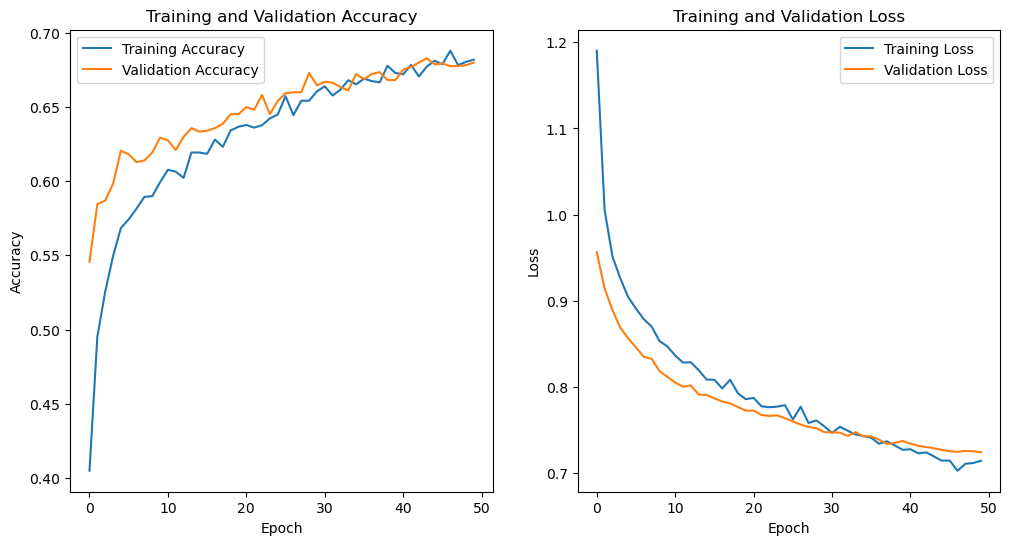

Training history plotted.


In [1]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# In[2]: Load the Data
print("Loading data...")
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct
print("Data loaded successfully.")

# In[3]: Preprocess the Data
print("Preprocessing the data...")
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features normalized.")

# Feature Selection: Correlation Analysis
print("Performing correlation analysis...")
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
correlation_threshold = 0.9
to_remove = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            to_remove.add(colname)
X_selected_df = pd.DataFrame(X_scaled, columns=X.columns).drop(columns=to_remove)
X_selected = X_selected_df.values
print(f"Removed {len(to_remove)} features based on correlation analysis.")

# Feature Selection: Recursive Feature Elimination
print("Performing Recursive Feature Elimination (RFE)...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=50)  # Adjust this number if needed
fit = rfe.fit(X_selected, y)
X_selected = fit.transform(X_selected)
selected_features = fit.support_

# Identify selected feature names
selected_feature_names = X_selected_df.columns[selected_features]
print(f"Selected features using RFE: {list(selected_feature_names)}")

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_selected.reshape((X_selected.shape[0], 1, X_selected.shape[1]))
print("Reshaped data for RNN.")

# In[4]: Define the Model Building Function
def build_model(rnn_units=50, dropout_rate=0.3, use_bidirectional=False):
    print(f"Building model with {rnn_units} RNN units, {dropout_rate} dropout rate, Bidirectional={use_bidirectional}.")
    model = Sequential()
    if use_bidirectional:
        model.add(Bidirectional(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]))))
    else:
        model.add(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units=rnn_units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# In[5]: K-Fold Cross-Validation with Hyperparameter Tuning
print("Starting K-Fold Cross-Validation...")
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold = 1
best_accuracy = 0
best_params = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rnn_units': [30, 50, 70, 100],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'use_bidirectional': [True, False],
}

for params in ParameterGrid(param_grid):
    print(f"Evaluating parameter set: {params}")
    accuracies = []
    reports = []

    for train_index, val_index in kf.split(X_reshaped):
        X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Build and compile the model
        model = build_model(rnn_units=params['rnn_units'], dropout_rate=params['dropout_rate'], use_bidirectional=params['use_bidirectional'])
        
        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
        
        # Train the model
        print(f"Training model for fold {fold}...")
        history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_reduction], verbose=1)
        
        # Evaluate the model
        loss, accuracy = model.evaluate(X_val, y_val)
        accuracies.append(accuracy)
        
        # Make predictions
        y_pred = model.predict(X_val)
        y_pred_classes = np.argmax(y_pred, axis=1)
        
        # Store classification report
        reports.append(classification_report(y_val, y_pred_classes, output_dict=True))
        
        print(f"Fold {fold} - Test Loss: {loss}, Test Accuracy: {accuracy}")
        fold += 1

    # Calculate mean accuracy for current hyperparameters
    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy for params {params}: {mean_accuracy}")

    # Update best parameters
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params

print(f"Best Accuracy: {best_accuracy} with params {best_params}")

# Optionally, plot the training history of the last fold
print("Plotting training history...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
print("Training history plotted.")


In [1]:
## stratified k fold

2024-09-02 23:22:19.940368: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 23:22:20.147217: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 23:22:20.350527: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 23:22:20.442405: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 23:22:20.462251: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 23:22:20.570287: I tensorflow/core/platform/cpu_feature_gu

Loading data...
Data loaded successfully.
Preprocessing the data...
Features normalized.
Performing correlation analysis...
Removed 45 features based on correlation analysis.
Performing Recursive Feature Elimination (RFE)...
Selected features using RFE: ['cDNA', 'pos', 'Domain_A2', 'Domain_A3', 'Domain_B', 'Domain_C1', 'Domain_C2', 'Effect_Nonsense', 'Sequence Context_CGA TGA', 'Sequence Context_CGT CAT', 'Original AA_Arg', 'Original AA_Asp', 'Original AA_Gly', 'Original AA_Leu', 'Original AA_Ser', 'Original AA_Trp', 'Original AA_Val', 'New AA_Arg', 'New AA_Asp', 'New AA_Cys', 'New AA_Glu', 'New AA_His', 'New AA_Leu', 'New AA_Phe', 'New AA_Pro', 'New AA_Ser', 'New AA_Thr', 'New AA_Val', 'Locationingene_11', 'Locationingene_12', 'Locationingene_13', 'Locationingene_14', 'Locationingene_16', 'Locationingene_17', 'Locationingene_18', 'Locationingene_19', 'Locationingene_23', 'Locationingene_24', 'Locationingene_26', 'Locationingene_3', 'Locationingene_4', 'Locationingene_7', 'Locationinge

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3710 - loss: 1.2751 - val_accuracy: 0.5471 - val_loss: 0.9427 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5203 - loss: 0.9643 - val_accuracy: 0.6194 - val_loss: 0.8669 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5826 - loss: 0.8893 - val_accuracy: 0.6459 - val_loss: 0.8187 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6057 - loss: 0.8561 - val_accuracy: 0.6565 - val_loss: 0.7878 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6320 - loss: 0.8259 - val_accuracy: 0.6612 - val_loss: 0.7686 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6176 - loss: 0.8205 - val_accuracy: 0.6606 - val_loss: 0.7588 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6257 - loss: 0.8034 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3979 - loss: 1.1405 - val_accuracy: 0.5533 - val_loss: 0.9218 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 0.9227 - val_accuracy: 0.5956 - val_loss: 0.8652 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5836 - loss: 0.8755 - val_accuracy: 0.6162 - val_loss: 0.8355 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5995 - loss: 0.8472 - val_accuracy: 0.6280 - val_loss: 0.8150 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6067 - loss: 0.8177 - val_accuracy: 0.6321 - val_loss: 0.7983 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6139 - loss: 0.8084 - val_accuracy: 0.6427 - val_loss: 0.7880 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 0.8027 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4245 - loss: 1.1078 - val_accuracy: 0.5592 - val_loss: 0.9311 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5584 - loss: 0.9224 - val_accuracy: 0.6039 - val_loss: 0.8693 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5923 - loss: 0.8817 - val_accuracy: 0.6221 - val_loss: 0.8343 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6191 - loss: 0.8404 - val_accuracy: 0.6292 - val_loss: 0.8158 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6276 - loss: 0.8216 - val_accuracy: 0.6286 - val_loss: 0.7992 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6434 - loss: 0.7908 - val_accuracy: 0.6374 - val_loss: 0.7902 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6532 - loss: 0.7743 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3834 - loss: 1.1853 - val_accuracy: 0.5480 - val_loss: 0.9420 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5580 - loss: 0.9243 - val_accuracy: 0.5803 - val_loss: 0.8837 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 0.8842 - val_accuracy: 0.6045 - val_loss: 0.8500 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6092 - loss: 0.8306 - val_accuracy: 0.6162 - val_loss: 0.8314 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6235 - loss: 0.8199 - val_accuracy: 0.6321 - val_loss: 0.8143 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6286 - loss: 0.7981 - val_accuracy: 0.6386 - val_loss: 0.8005 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6500 - loss: 0.7762 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4564 - loss: 1.0786 - val_accuracy: 0.6045 - val_loss: 0.8981 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5641 - loss: 0.9179 - val_accuracy: 0.6227 - val_loss: 0.8396 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6073 - loss: 0.8633 - val_accuracy: 0.6339 - val_loss: 0.8096 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6081 - loss: 0.8327 - val_accuracy: 0.6368 - val_loss: 0.7963 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6255 - loss: 0.8020 - val_accuracy: 0.6404 - val_loss: 0.7771 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6343 - loss: 0.7934 - val_accuracy: 0.6521 - val_loss: 0.7644 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6508 - loss: 0.7740 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3706 - loss: 1.2425 - val_accuracy: 0.5224 - val_loss: 0.9547 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5168 - loss: 0.9601 - val_accuracy: 0.5729 - val_loss: 0.8774 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5579 - loss: 0.8990 - val_accuracy: 0.6135 - val_loss: 0.8433 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5694 - loss: 0.8882 - val_accuracy: 0.6235 - val_loss: 0.8195 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6054 - loss: 0.8568 - val_accuracy: 0.6388 - val_loss: 0.8035 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5970 - loss: 0.8487 - val_accuracy: 0.6447 - val_loss: 0.7935 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 0.8324 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3682 - loss: 1.1414 - val_accuracy: 0.5021 - val_loss: 0.9891 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5094 - loss: 0.9764 - val_accuracy: 0.5574 - val_loss: 0.9252 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5669 - loss: 0.9097 - val_accuracy: 0.5974 - val_loss: 0.8844 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 0.8854 - val_accuracy: 0.6139 - val_loss: 0.8599 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5947 - loss: 0.8561 - val_accuracy: 0.6198 - val_loss: 0.8415 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6155 - loss: 0.8337 - val_accuracy: 0.6192 - val_loss: 0.8256 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - loss: 0.8066 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3964 - loss: 1.1730 - val_accuracy: 0.5350 - val_loss: 0.9716 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5218 - loss: 0.9734 - val_accuracy: 0.5815 - val_loss: 0.9031 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5663 - loss: 0.9063 - val_accuracy: 0.6045 - val_loss: 0.8714 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5847 - loss: 0.8929 - val_accuracy: 0.6115 - val_loss: 0.8522 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 0.8546 - val_accuracy: 0.6198 - val_loss: 0.8376 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 0.8485 - val_accuracy: 0.6292 - val_loss: 0.8241 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6174 - loss: 0.8326 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3931 - loss: 1.1311 - val_accuracy: 0.5321 - val_loss: 0.9558 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5381 - loss: 0.9377 - val_accuracy: 0.5851 - val_loss: 0.9035 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5715 - loss: 0.8811 - val_accuracy: 0.5992 - val_loss: 0.8735 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5780 - loss: 0.8630 - val_accuracy: 0.6033 - val_loss: 0.8535 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6062 - loss: 0.8358 - val_accuracy: 0.6162 - val_loss: 0.8384 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 0.8228 - val_accuracy: 0.6215 - val_loss: 0.8267 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6237 - loss: 0.8031 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4012 - loss: 1.1231 - val_accuracy: 0.5562 - val_loss: 0.9226 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5462 - loss: 0.9404 - val_accuracy: 0.6009 - val_loss: 0.8652 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5624 - loss: 0.8988 - val_accuracy: 0.6127 - val_loss: 0.8421 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5853 - loss: 0.8697 - val_accuracy: 0.6168 - val_loss: 0.8255 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 0.8484 - val_accuracy: 0.6221 - val_loss: 0.8124 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6116 - loss: 0.8405 - val_accuracy: 0.6263 - val_loss: 0.8027 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6161 - loss: 0.8246 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4313 - loss: 1.1224 - val_accuracy: 0.6153 - val_loss: 0.8544 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5790 - loss: 0.8731 - val_accuracy: 0.6382 - val_loss: 0.8083 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6108 - loss: 0.8311 - val_accuracy: 0.6576 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6094 - loss: 0.8207 - val_accuracy: 0.6535 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 0.7796 - val_accuracy: 0.6712 - val_loss: 0.7453 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - loss: 0.7654 - val_accuracy: 0.6694 - val_loss: 0.7362 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6506 - loss: 0.7496 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4107 - loss: 1.1426 - val_accuracy: 0.6109 - val_loss: 0.8657 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6003 - loss: 0.8682 - val_accuracy: 0.6392 - val_loss: 0.8100 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6227 - loss: 0.8146 - val_accuracy: 0.6545 - val_loss: 0.7825 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6323 - loss: 0.7998 - val_accuracy: 0.6551 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - loss: 0.7591 - val_accuracy: 0.6521 - val_loss: 0.7558 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6679 - loss: 0.7457 - val_accuracy: 0.6722 - val_loss: 0.7408 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 0.7367 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4449 - loss: 1.0764 - val_accuracy: 0.5903 - val_loss: 0.8689 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5797 - loss: 0.8891 - val_accuracy: 0.6098 - val_loss: 0.8268 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 0.8136 - val_accuracy: 0.6233 - val_loss: 0.8008 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6412 - loss: 0.7920 - val_accuracy: 0.6368 - val_loss: 0.7901 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - loss: 0.7683 - val_accuracy: 0.6398 - val_loss: 0.7776 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6498 - loss: 0.7613 - val_accuracy: 0.6439 - val_loss: 0.7695 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6690 - loss: 0.7350 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4232 - loss: 1.1384 - val_accuracy: 0.5627 - val_loss: 0.9027 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5926 - loss: 0.8773 - val_accuracy: 0.6086 - val_loss: 0.8539 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6129 - loss: 0.8279 - val_accuracy: 0.6298 - val_loss: 0.8180 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6408 - loss: 0.7849 - val_accuracy: 0.6286 - val_loss: 0.8043 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6546 - loss: 0.7610 - val_accuracy: 0.6263 - val_loss: 0.7879 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6614 - loss: 0.7472 - val_accuracy: 0.6351 - val_loss: 0.7799 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.7312 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model for fold 15...
Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4407 - loss: 1.0799 - val_accuracy: 0.6004 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5888 - loss: 0.8727 - val_accuracy: 0.6239 - val_loss: 0.8211 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6352 - loss: 0.8122 - val_accuracy: 0.6392 - val_loss: 0.7915 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6419 - loss: 0.7727 - val_accuracy: 0.6421 - val_loss: 0.7768 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6505 - loss: 0.7766 - val_accuracy: 0.6557 - val_loss: 0.7612 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6518 - loss: 0.7667 - val_accuracy: 0.6504 - val_loss: 0.7573 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4062 - loss: 1.0961 - val_accuracy: 0.5759 - val_loss: 0.9156 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5633 - loss: 0.9268 - val_accuracy: 0.6135 - val_loss: 0.8558 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6005 - loss: 0.8674 - val_accuracy: 0.6282 - val_loss: 0.8212 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6169 - loss: 0.8285 - val_accuracy: 0.6288 - val_loss: 0.7991 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6267 - loss: 0.8086 - val_accuracy: 0.6394 - val_loss: 0.7826 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6189 - loss: 0.7992 - val_accuracy: 0.6488 - val_loss: 0.7680 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - loss: 0.7768 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3808 - loss: 1.1579 - val_accuracy: 0.5639 - val_loss: 0.9397 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5504 - loss: 0.9333 - val_accuracy: 0.6227 - val_loss: 0.8562 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5962 - loss: 0.8643 - val_accuracy: 0.6345 - val_loss: 0.8213 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6170 - loss: 0.8228 - val_accuracy: 0.6392 - val_loss: 0.7976 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6383 - loss: 0.8039 - val_accuracy: 0.6563 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 0.7855 - val_accuracy: 0.6657 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 0.7818 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3852 - loss: 1.1926 - val_accuracy: 0.5456 - val_loss: 0.9322 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 0.9382 - val_accuracy: 0.6004 - val_loss: 0.8603 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5854 - loss: 0.8738 - val_accuracy: 0.6162 - val_loss: 0.8313 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6181 - loss: 0.8299 - val_accuracy: 0.6186 - val_loss: 0.8128 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6218 - loss: 0.8017 - val_accuracy: 0.6227 - val_loss: 0.7971 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.7816 - val_accuracy: 0.6351 - val_loss: 0.7854 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - loss: 0.7728 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4139 - loss: 1.1577 - val_accuracy: 0.5615 - val_loss: 0.9337 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5577 - loss: 0.9191 - val_accuracy: 0.5951 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6001 - loss: 0.8584 - val_accuracy: 0.6180 - val_loss: 0.8467 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6193 - loss: 0.8236 - val_accuracy: 0.6233 - val_loss: 0.8274 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - loss: 0.8109 - val_accuracy: 0.6268 - val_loss: 0.8108 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6441 - loss: 0.7950 - val_accuracy: 0.6327 - val_loss: 0.7982 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - loss: 0.7706 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4291 - loss: 1.1067 - val_accuracy: 0.5633 - val_loss: 0.9064 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5658 - loss: 0.8997 - val_accuracy: 0.6004 - val_loss: 0.8412 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5966 - loss: 0.8548 - val_accuracy: 0.6204 - val_loss: 0.8098 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 0.8262 - val_accuracy: 0.6280 - val_loss: 0.7883 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - loss: 0.7910 - val_accuracy: 0.6445 - val_loss: 0.7756 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6430 - loss: 0.7732 - val_accuracy: 0.6433 - val_loss: 0.7655 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 0.7488 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4791 - loss: 1.0389 - val_accuracy: 0.6147 - val_loss: 0.8261 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6051 - loss: 0.8481 - val_accuracy: 0.6524 - val_loss: 0.7722 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6397 - loss: 0.7920 - val_accuracy: 0.6647 - val_loss: 0.7454 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 0.7616 - val_accuracy: 0.6700 - val_loss: 0.7290 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6581 - loss: 0.7510 - val_accuracy: 0.6706 - val_loss: 0.7203 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0.7325 - val_accuracy: 0.6788 - val_loss: 0.7145 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6960 - loss: 0.7078 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4881 - loss: 1.0161 - val_accuracy: 0.6251 - val_loss: 0.8444 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6022 - loss: 0.8450 - val_accuracy: 0.6392 - val_loss: 0.7930 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6431 - loss: 0.7843 - val_accuracy: 0.6563 - val_loss: 0.7677 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - loss: 0.7669 - val_accuracy: 0.6651 - val_loss: 0.7531 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6650 - loss: 0.7379 - val_accuracy: 0.6722 - val_loss: 0.7467 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6835 - loss: 0.7233 - val_accuracy: 0.6716 - val_loss: 0.7309 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - loss: 0.7030 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4660 - loss: 1.0483 - val_accuracy: 0.5968 - val_loss: 0.8469 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6037 - loss: 0.8409 - val_accuracy: 0.6286 - val_loss: 0.8058 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6404 - loss: 0.7922 - val_accuracy: 0.6439 - val_loss: 0.7741 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6423 - loss: 0.7714 - val_accuracy: 0.6516 - val_loss: 0.7654 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.7392 - val_accuracy: 0.6598 - val_loss: 0.7490 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6771 - loss: 0.7269 - val_accuracy: 0.6610 - val_loss: 0.7431 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 0.6989 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4959 - loss: 1.0130 - val_accuracy: 0.6121 - val_loss: 0.8615 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6201 - loss: 0.8304 - val_accuracy: 0.6368 - val_loss: 0.8086 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6300 - loss: 0.7963 - val_accuracy: 0.6504 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6672 - loss: 0.7348 - val_accuracy: 0.6392 - val_loss: 0.7748 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6745 - loss: 0.7212 - val_accuracy: 0.6551 - val_loss: 0.7567 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6855 - loss: 0.7097 - val_accuracy: 0.6574 - val_loss: 0.7553 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 0.7191 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4921 - loss: 1.0296 - val_accuracy: 0.6192 - val_loss: 0.8298 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6098 - loss: 0.8339 - val_accuracy: 0.6504 - val_loss: 0.7838 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6413 - loss: 0.7942 - val_accuracy: 0.6551 - val_loss: 0.7621 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6515 - loss: 0.7619 - val_accuracy: 0.6616 - val_loss: 0.7441 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 0.7445 - val_accuracy: 0.6569 - val_loss: 0.7416 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6722 - loss: 0.7288 - val_accuracy: 0.6704 - val_loss: 0.7366 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6829 - loss: 0.7111 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4372 - loss: 1.0790 - val_accuracy: 0.5924 - val_loss: 0.8589 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5819 - loss: 0.8838 - val_accuracy: 0.6353 - val_loss: 0.7977 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6149 - loss: 0.8259 - val_accuracy: 0.6329 - val_loss: 0.7661 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6238 - loss: 0.8066 - val_accuracy: 0.6553 - val_loss: 0.7426 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - loss: 0.7934 - val_accuracy: 0.6782 - val_loss: 0.7261 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6487 - loss: 0.7671 - val_accuracy: 0.6806 - val_loss: 0.7156 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.7513 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4825 - loss: 1.0081 - val_accuracy: 0.5880 - val_loss: 0.8694 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5870 - loss: 0.8543 - val_accuracy: 0.6263 - val_loss: 0.8218 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6252 - loss: 0.7995 - val_accuracy: 0.6380 - val_loss: 0.7957 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6368 - loss: 0.7820 - val_accuracy: 0.6439 - val_loss: 0.7807 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - loss: 0.7675 - val_accuracy: 0.6616 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.7442 - val_accuracy: 0.6633 - val_loss: 0.7528 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6729 - loss: 0.7278 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4331 - loss: 1.0997 - val_accuracy: 0.5809 - val_loss: 0.8829 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.8828 - val_accuracy: 0.5992 - val_loss: 0.8305 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6238 - loss: 0.8187 - val_accuracy: 0.6127 - val_loss: 0.8044 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6284 - loss: 0.7929 - val_accuracy: 0.6380 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6480 - loss: 0.7765 - val_accuracy: 0.6433 - val_loss: 0.7725 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6619 - loss: 0.7452 - val_accuracy: 0.6439 - val_loss: 0.7583 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 0.7273 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4414 - loss: 1.1047 - val_accuracy: 0.5921 - val_loss: 0.8887 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5811 - loss: 0.8805 - val_accuracy: 0.6210 - val_loss: 0.8407 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6085 - loss: 0.8347 - val_accuracy: 0.6227 - val_loss: 0.8141 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6421 - loss: 0.7959 - val_accuracy: 0.6380 - val_loss: 0.8025 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6420 - loss: 0.7790 - val_accuracy: 0.6521 - val_loss: 0.7836 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.7689 - val_accuracy: 0.6439 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - loss: 0.7425 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4560 - loss: 1.0479 - val_accuracy: 0.5886 - val_loss: 0.8658 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6030 - loss: 0.8613 - val_accuracy: 0.6186 - val_loss: 0.8146 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6179 - loss: 0.8263 - val_accuracy: 0.6304 - val_loss: 0.7855 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - loss: 0.7939 - val_accuracy: 0.6380 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6457 - loss: 0.7802 - val_accuracy: 0.6527 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6658 - loss: 0.7513 - val_accuracy: 0.6504 - val_loss: 0.7473 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6510 - loss: 0.7502 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4975 - loss: 0.9961 - val_accuracy: 0.6365 - val_loss: 0.8011 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6172 - loss: 0.8220 - val_accuracy: 0.6606 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6491 - loss: 0.7782 - val_accuracy: 0.6753 - val_loss: 0.7321 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6659 - loss: 0.7419 - val_accuracy: 0.6812 - val_loss: 0.7145 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.7034 - val_accuracy: 0.6971 - val_loss: 0.7076 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6917 - loss: 0.6943 - val_accuracy: 0.7006 - val_loss: 0.6957 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7012 - loss: 0.6767 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4784 - loss: 1.0321 - val_accuracy: 0.6251 - val_loss: 0.8210 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6242 - loss: 0.8079 - val_accuracy: 0.6427 - val_loss: 0.7825 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6619 - loss: 0.7546 - val_accuracy: 0.6610 - val_loss: 0.7525 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6721 - loss: 0.7377 - val_accuracy: 0.6592 - val_loss: 0.7415 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.7035 - val_accuracy: 0.6892 - val_loss: 0.7232 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.7037 - val_accuracy: 0.6775 - val_loss: 0.7262 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.6898 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5011 - loss: 0.9823 - val_accuracy: 0.6151 - val_loss: 0.8224 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6375 - loss: 0.8038 - val_accuracy: 0.6404 - val_loss: 0.7778 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6608 - loss: 0.7607 - val_accuracy: 0.6516 - val_loss: 0.7613 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6716 - loss: 0.7352 - val_accuracy: 0.6551 - val_loss: 0.7521 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.7232 - val_accuracy: 0.6610 - val_loss: 0.7460 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.6933 - val_accuracy: 0.6657 - val_loss: 0.7313 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.6803 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4931 - loss: 1.0001 - val_accuracy: 0.6157 - val_loss: 0.8385 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6209 - loss: 0.8133 - val_accuracy: 0.6174 - val_loss: 0.8043 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.7439 - val_accuracy: 0.6368 - val_loss: 0.7792 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6695 - loss: 0.7496 - val_accuracy: 0.6392 - val_loss: 0.7737 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.7175 - val_accuracy: 0.6551 - val_loss: 0.7635 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.7004 - val_accuracy: 0.6657 - val_loss: 0.7495 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7082 - loss: 0.6765 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4952 - loss: 0.9968 - val_accuracy: 0.6310 - val_loss: 0.8075 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6164 - loss: 0.8155 - val_accuracy: 0.6445 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6487 - loss: 0.7692 - val_accuracy: 0.6645 - val_loss: 0.7447 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6744 - loss: 0.7283 - val_accuracy: 0.6716 - val_loss: 0.7288 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6745 - loss: 0.7181 - val_accuracy: 0.6863 - val_loss: 0.7192 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6883 - loss: 0.6897 - val_accuracy: 0.6798 - val_loss: 0.7071 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6935 - loss: 0.6838 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4572 - loss: 1.0532 - val_accuracy: 0.6053 - val_loss: 0.8456 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5904 - loss: 0.8585 - val_accuracy: 0.6365 - val_loss: 0.7881 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6343 - loss: 0.8031 - val_accuracy: 0.6524 - val_loss: 0.7593 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - loss: 0.7777 - val_accuracy: 0.6700 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - loss: 0.7669 - val_accuracy: 0.6688 - val_loss: 0.7281 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6572 - loss: 0.7444 - val_accuracy: 0.6888 - val_loss: 0.7146 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6771 - loss: 0.7180 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4537 - loss: 1.0405 - val_accuracy: 0.6239 - val_loss: 0.8381 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6145 - loss: 0.8269 - val_accuracy: 0.6398 - val_loss: 0.7930 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6340 - loss: 0.7949 - val_accuracy: 0.6421 - val_loss: 0.7743 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - loss: 0.7532 - val_accuracy: 0.6451 - val_loss: 0.7558 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6733 - loss: 0.7341 - val_accuracy: 0.6675 - val_loss: 0.7425 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 0.7212 - val_accuracy: 0.6580 - val_loss: 0.7382 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6924 - loss: 0.7105 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4731 - loss: 1.0419 - val_accuracy: 0.5886 - val_loss: 0.8451 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6083 - loss: 0.8455 - val_accuracy: 0.6298 - val_loss: 0.8006 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 0.8040 - val_accuracy: 0.6357 - val_loss: 0.7775 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - loss: 0.7722 - val_accuracy: 0.6504 - val_loss: 0.7620 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6684 - loss: 0.7343 - val_accuracy: 0.6516 - val_loss: 0.7493 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6680 - loss: 0.7324 - val_accuracy: 0.6569 - val_loss: 0.7402 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 0.7043 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4619 - loss: 1.0523 - val_accuracy: 0.6051 - val_loss: 0.8691 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6153 - loss: 0.8453 - val_accuracy: 0.6404 - val_loss: 0.8118 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.8056 - val_accuracy: 0.6510 - val_loss: 0.7899 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6574 - loss: 0.7607 - val_accuracy: 0.6457 - val_loss: 0.7751 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 0.7501 - val_accuracy: 0.6539 - val_loss: 0.7646 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6837 - loss: 0.7125 - val_accuracy: 0.6622 - val_loss: 0.7556 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6842 - loss: 0.7148 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4616 - loss: 1.0470 - val_accuracy: 0.6062 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6132 - loss: 0.8413 - val_accuracy: 0.6351 - val_loss: 0.7927 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6390 - loss: 0.7979 - val_accuracy: 0.6557 - val_loss: 0.7655 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6583 - loss: 0.7683 - val_accuracy: 0.6622 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6703 - loss: 0.7455 - val_accuracy: 0.6733 - val_loss: 0.7413 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6832 - loss: 0.7333 - val_accuracy: 0.6727 - val_loss: 0.7320 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - loss: 0.7259 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3751 - loss: 1.1418 - val_accuracy: 0.5865 - val_loss: 0.9555 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5246 - loss: 0.9612 - val_accuracy: 0.5912 - val_loss: 0.8619 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5546 - loss: 0.9013 - val_accuracy: 0.6312 - val_loss: 0.8316 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5751 - loss: 0.8735 - val_accuracy: 0.6382 - val_loss: 0.8097 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5909 - loss: 0.8601 - val_accuracy: 0.6418 - val_loss: 0.7939 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 0.8504 - val_accuracy: 0.6476 - val_loss: 0.7876 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5991 - loss: 0.8372 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4222 - loss: 1.1505 - val_accuracy: 0.5680 - val_loss: 0.9245 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5309 - loss: 0.9652 - val_accuracy: 0.5927 - val_loss: 0.8820 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5482 - loss: 0.9161 - val_accuracy: 0.6133 - val_loss: 0.8575 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5797 - loss: 0.8761 - val_accuracy: 0.6121 - val_loss: 0.8428 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5809 - loss: 0.8701 - val_accuracy: 0.6351 - val_loss: 0.8244 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5983 - loss: 0.8444 - val_accuracy: 0.6351 - val_loss: 0.8115 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5996 - loss: 0.8367 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3770 - loss: 1.2312 - val_accuracy: 0.5533 - val_loss: 0.9672 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5033 - loss: 0.9925 - val_accuracy: 0.5550 - val_loss: 0.9144 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5509 - loss: 0.9314 - val_accuracy: 0.5945 - val_loss: 0.8715 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5645 - loss: 0.9075 - val_accuracy: 0.6062 - val_loss: 0.8472 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 0.8853 - val_accuracy: 0.6039 - val_loss: 0.8363 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.8380 - val_accuracy: 0.6004 - val_loss: 0.8214 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6042 - loss: 0.8450 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3667 - loss: 1.2356 - val_accuracy: 0.5421 - val_loss: 0.9537 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5103 - loss: 0.9714 - val_accuracy: 0.5839 - val_loss: 0.8980 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5514 - loss: 0.9191 - val_accuracy: 0.5992 - val_loss: 0.8728 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5721 - loss: 0.8844 - val_accuracy: 0.6121 - val_loss: 0.8515 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5966 - loss: 0.8601 - val_accuracy: 0.6174 - val_loss: 0.8372 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6130 - loss: 0.8293 - val_accuracy: 0.6280 - val_loss: 0.8252 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5987 - loss: 0.8227 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3965 - loss: 1.1787 - val_accuracy: 0.5603 - val_loss: 0.9553 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5155 - loss: 0.9791 - val_accuracy: 0.5856 - val_loss: 0.8821 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5596 - loss: 0.9110 - val_accuracy: 0.5992 - val_loss: 0.8540 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 0.8897 - val_accuracy: 0.6080 - val_loss: 0.8261 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5950 - loss: 0.8609 - val_accuracy: 0.6233 - val_loss: 0.8116 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.8289 - val_accuracy: 0.6327 - val_loss: 0.8020 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6100 - loss: 0.8228 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3773 - loss: 1.2427 - val_accuracy: 0.5188 - val_loss: 0.9626 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4755 - loss: 0.9977 - val_accuracy: 0.5741 - val_loss: 0.8895 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5441 - loss: 0.9143 - val_accuracy: 0.6053 - val_loss: 0.8539 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5442 - loss: 0.9053 - val_accuracy: 0.6088 - val_loss: 0.8390 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5793 - loss: 0.8780 - val_accuracy: 0.6253 - val_loss: 0.8251 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5828 - loss: 0.8774 - val_accuracy: 0.6353 - val_loss: 0.8148 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5755 - loss: 0.8566 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3571 - loss: 1.2854 - val_accuracy: 0.5021 - val_loss: 0.9968 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4734 - loss: 1.0076 - val_accuracy: 0.5580 - val_loss: 0.9365 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5272 - loss: 0.9485 - val_accuracy: 0.5862 - val_loss: 0.8992 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5488 - loss: 0.9353 - val_accuracy: 0.6192 - val_loss: 0.8736 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5751 - loss: 0.8962 - val_accuracy: 0.6268 - val_loss: 0.8566 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5722 - loss: 0.8863 - val_accuracy: 0.6268 - val_loss: 0.8434 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - loss: 0.8844 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3904 - loss: 1.1299 - val_accuracy: 0.5427 - val_loss: 0.9572 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4883 - loss: 0.9821 - val_accuracy: 0.5497 - val_loss: 0.9099 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5299 - loss: 0.9281 - val_accuracy: 0.5792 - val_loss: 0.8835 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5516 - loss: 0.9016 - val_accuracy: 0.5792 - val_loss: 0.8638 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5757 - loss: 0.8866 - val_accuracy: 0.6074 - val_loss: 0.8530 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5714 - loss: 0.8851 - val_accuracy: 0.6109 - val_loss: 0.8418 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - loss: 0.8507 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4001 - loss: 1.1350 - val_accuracy: 0.5309 - val_loss: 0.9645 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5081 - loss: 0.9721 - val_accuracy: 0.5497 - val_loss: 0.9154 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5136 - loss: 0.9377 - val_accuracy: 0.5774 - val_loss: 0.8912 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5512 - loss: 0.9071 - val_accuracy: 0.5833 - val_loss: 0.8741 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5684 - loss: 0.8907 - val_accuracy: 0.5815 - val_loss: 0.8616 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5803 - loss: 0.8608 - val_accuracy: 0.5945 - val_loss: 0.8511 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5914 - loss: 0.8524 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3605 - loss: 1.1960 - val_accuracy: 0.4815 - val_loss: 1.0289 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4686 - loss: 1.0280 - val_accuracy: 0.5603 - val_loss: 0.9550 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5240 - loss: 0.9662 - val_accuracy: 0.5792 - val_loss: 0.9011 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5476 - loss: 0.9250 - val_accuracy: 0.5962 - val_loss: 0.8648 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5624 - loss: 0.9018 - val_accuracy: 0.6086 - val_loss: 0.8497 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5669 - loss: 0.8975 - val_accuracy: 0.6068 - val_loss: 0.8354 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 0.8674 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3986 - loss: 1.2374 - val_accuracy: 0.5776 - val_loss: 0.9122 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5328 - loss: 0.9401 - val_accuracy: 0.6112 - val_loss: 0.8502 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5980 - loss: 0.8669 - val_accuracy: 0.6224 - val_loss: 0.8122 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5958 - loss: 0.8456 - val_accuracy: 0.6341 - val_loss: 0.7932 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6028 - loss: 0.8321 - val_accuracy: 0.6453 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 0.8096 - val_accuracy: 0.6447 - val_loss: 0.7642 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 0.7796 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3975 - loss: 1.1852 - val_accuracy: 0.5792 - val_loss: 0.9016 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5536 - loss: 0.9138 - val_accuracy: 0.6245 - val_loss: 0.8500 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5783 - loss: 0.8751 - val_accuracy: 0.6257 - val_loss: 0.8219 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6081 - loss: 0.8447 - val_accuracy: 0.6310 - val_loss: 0.7978 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6192 - loss: 0.8238 - val_accuracy: 0.6521 - val_loss: 0.7807 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6274 - loss: 0.7956 - val_accuracy: 0.6610 - val_loss: 0.7680 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6416 - loss: 0.7992 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4137 - loss: 1.1429 - val_accuracy: 0.5792 - val_loss: 0.8930 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5524 - loss: 0.9130 - val_accuracy: 0.6015 - val_loss: 0.8435 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5921 - loss: 0.8664 - val_accuracy: 0.6086 - val_loss: 0.8196 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6132 - loss: 0.8343 - val_accuracy: 0.6304 - val_loss: 0.7956 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 0.8128 - val_accuracy: 0.6304 - val_loss: 0.7833 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6333 - loss: 0.8034 - val_accuracy: 0.6315 - val_loss: 0.7730 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6465 - loss: 0.7779 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4079 - loss: 1.3126 - val_accuracy: 0.5762 - val_loss: 0.9093 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5542 - loss: 0.9198 - val_accuracy: 0.5939 - val_loss: 0.8621 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5996 - loss: 0.8499 - val_accuracy: 0.6080 - val_loss: 0.8398 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6072 - loss: 0.8384 - val_accuracy: 0.6168 - val_loss: 0.8174 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6266 - loss: 0.8164 - val_accuracy: 0.6233 - val_loss: 0.8016 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6302 - loss: 0.8038 - val_accuracy: 0.6245 - val_loss: 0.7960 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6347 - loss: 0.7928 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4195 - loss: 1.1438 - val_accuracy: 0.5809 - val_loss: 0.8869 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5579 - loss: 0.9110 - val_accuracy: 0.6121 - val_loss: 0.8387 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5854 - loss: 0.8754 - val_accuracy: 0.6286 - val_loss: 0.8131 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6079 - loss: 0.8343 - val_accuracy: 0.6315 - val_loss: 0.7980 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 0.8214 - val_accuracy: 0.6380 - val_loss: 0.7775 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6345 - loss: 0.7908 - val_accuracy: 0.6516 - val_loss: 0.7649 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6200 - loss: 0.7925 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4016 - loss: 1.1441 - val_accuracy: 0.5806 - val_loss: 0.9006 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5342 - loss: 0.9395 - val_accuracy: 0.6229 - val_loss: 0.8402 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5739 - loss: 0.8916 - val_accuracy: 0.6171 - val_loss: 0.8134 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 0.8497 - val_accuracy: 0.6459 - val_loss: 0.7972 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5976 - loss: 0.8499 - val_accuracy: 0.6535 - val_loss: 0.7841 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6079 - loss: 0.8328 - val_accuracy: 0.6529 - val_loss: 0.7717 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6170 - loss: 0.8208 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3968 - loss: 1.2147 - val_accuracy: 0.5597 - val_loss: 0.9346 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5315 - loss: 0.9529 - val_accuracy: 0.5951 - val_loss: 0.8787 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5667 - loss: 0.9060 - val_accuracy: 0.6051 - val_loss: 0.8570 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5807 - loss: 0.8695 - val_accuracy: 0.6133 - val_loss: 0.8351 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6004 - loss: 0.8479 - val_accuracy: 0.6192 - val_loss: 0.8216 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6194 - loss: 0.8294 - val_accuracy: 0.6292 - val_loss: 0.8106 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6118 - loss: 0.8218 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4002 - loss: 1.1546 - val_accuracy: 0.5444 - val_loss: 0.9300 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5057 - loss: 0.9713 - val_accuracy: 0.5727 - val_loss: 0.8771 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 0.9048 - val_accuracy: 0.6015 - val_loss: 0.8485 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5911 - loss: 0.8683 - val_accuracy: 0.6133 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 0.8402 - val_accuracy: 0.6157 - val_loss: 0.8129 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6088 - loss: 0.8403 - val_accuracy: 0.6174 - val_loss: 0.8006 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 0.8292 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4147 - loss: 1.1307 - val_accuracy: 0.5556 - val_loss: 0.9424 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 0.9545 - val_accuracy: 0.5745 - val_loss: 0.8989 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5555 - loss: 0.9027 - val_accuracy: 0.5803 - val_loss: 0.8720 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5855 - loss: 0.8577 - val_accuracy: 0.5868 - val_loss: 0.8546 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5921 - loss: 0.8573 - val_accuracy: 0.6098 - val_loss: 0.8351 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6058 - loss: 0.8374 - val_accuracy: 0.6192 - val_loss: 0.8213 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6143 - loss: 0.8231 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3824 - loss: 1.1937 - val_accuracy: 0.5650 - val_loss: 0.9417 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5108 - loss: 0.9687 - val_accuracy: 0.5733 - val_loss: 0.8857 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5530 - loss: 0.9074 - val_accuracy: 0.5980 - val_loss: 0.8550 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5824 - loss: 0.8725 - val_accuracy: 0.6057 - val_loss: 0.8290 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5944 - loss: 0.8564 - val_accuracy: 0.6215 - val_loss: 0.8123 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5945 - loss: 0.8502 - val_accuracy: 0.6198 - val_loss: 0.8040 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6096 - loss: 0.8248 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4385 - loss: 1.1345 - val_accuracy: 0.5971 - val_loss: 0.8772 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5680 - loss: 0.9096 - val_accuracy: 0.6400 - val_loss: 0.8124 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5906 - loss: 0.8559 - val_accuracy: 0.6476 - val_loss: 0.7814 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.8110 - val_accuracy: 0.6576 - val_loss: 0.7667 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6173 - loss: 0.8191 - val_accuracy: 0.6588 - val_loss: 0.7540 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6356 - loss: 0.7716 - val_accuracy: 0.6706 - val_loss: 0.7402 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.7629 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4428 - loss: 1.1115 - val_accuracy: 0.6086 - val_loss: 0.8679 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5787 - loss: 0.8787 - val_accuracy: 0.6298 - val_loss: 0.8238 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6139 - loss: 0.8381 - val_accuracy: 0.6333 - val_loss: 0.7944 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6384 - loss: 0.7927 - val_accuracy: 0.6521 - val_loss: 0.7732 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6457 - loss: 0.7784 - val_accuracy: 0.6527 - val_loss: 0.7627 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6377 - loss: 0.7817 - val_accuracy: 0.6616 - val_loss: 0.7491 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6533 - loss: 0.7491 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4637 - loss: 1.0780 - val_accuracy: 0.5986 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 0.8885 - val_accuracy: 0.6251 - val_loss: 0.8301 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6102 - loss: 0.8477 - val_accuracy: 0.6351 - val_loss: 0.8022 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6228 - loss: 0.8177 - val_accuracy: 0.6527 - val_loss: 0.7865 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 0.7859 - val_accuracy: 0.6510 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6449 - loss: 0.7775 - val_accuracy: 0.6492 - val_loss: 0.7618 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6647 - loss: 0.7567 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4430 - loss: 1.1257 - val_accuracy: 0.5839 - val_loss: 0.8888 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.8899 - val_accuracy: 0.6215 - val_loss: 0.8395 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6206 - loss: 0.8335 - val_accuracy: 0.6162 - val_loss: 0.8183 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6207 - loss: 0.8071 - val_accuracy: 0.6315 - val_loss: 0.7976 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6402 - loss: 0.7876 - val_accuracy: 0.6374 - val_loss: 0.7886 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6526 - loss: 0.7767 - val_accuracy: 0.6304 - val_loss: 0.7766 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6506 - loss: 0.7540 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4531 - loss: 1.0970 - val_accuracy: 0.6057 - val_loss: 0.8489 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5873 - loss: 0.8702 - val_accuracy: 0.6221 - val_loss: 0.7997 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6023 - loss: 0.8370 - val_accuracy: 0.6351 - val_loss: 0.7754 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.7813 - val_accuracy: 0.6492 - val_loss: 0.7633 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - loss: 0.7845 - val_accuracy: 0.6586 - val_loss: 0.7509 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6435 - loss: 0.7742 - val_accuracy: 0.6539 - val_loss: 0.7406 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - loss: 0.7384 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4533 - loss: 1.1270 - val_accuracy: 0.5929 - val_loss: 0.8660 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5495 - loss: 0.9279 - val_accuracy: 0.6188 - val_loss: 0.8205 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5787 - loss: 0.8799 - val_accuracy: 0.6365 - val_loss: 0.7949 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 0.8395 - val_accuracy: 0.6488 - val_loss: 0.7783 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6121 - loss: 0.8235 - val_accuracy: 0.6500 - val_loss: 0.7660 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6174 - loss: 0.8229 - val_accuracy: 0.6647 - val_loss: 0.7548 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6244 - loss: 0.8106 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3980 - loss: 1.1484 - val_accuracy: 0.5739 - val_loss: 0.8950 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5356 - loss: 0.9261 - val_accuracy: 0.6227 - val_loss: 0.8467 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - loss: 0.8754 - val_accuracy: 0.6286 - val_loss: 0.8183 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6005 - loss: 0.8388 - val_accuracy: 0.6386 - val_loss: 0.8015 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6164 - loss: 0.8217 - val_accuracy: 0.6439 - val_loss: 0.7829 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6230 - loss: 0.7997 - val_accuracy: 0.6610 - val_loss: 0.7701 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6285 - loss: 0.7972 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4348 - loss: 1.0990 - val_accuracy: 0.5774 - val_loss: 0.8964 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 0.9293 - val_accuracy: 0.5951 - val_loss: 0.8534 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5771 - loss: 0.8928 - val_accuracy: 0.6127 - val_loss: 0.8282 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6055 - loss: 0.8541 - val_accuracy: 0.6304 - val_loss: 0.8086 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6124 - loss: 0.8204 - val_accuracy: 0.6292 - val_loss: 0.7993 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6212 - loss: 0.8197 - val_accuracy: 0.6480 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6386 - loss: 0.7905 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3855 - loss: 1.1334 - val_accuracy: 0.5715 - val_loss: 0.9236 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5463 - loss: 0.9192 - val_accuracy: 0.5909 - val_loss: 0.8770 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 0.8681 - val_accuracy: 0.6092 - val_loss: 0.8476 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6103 - loss: 0.8355 - val_accuracy: 0.6157 - val_loss: 0.8275 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6203 - loss: 0.8239 - val_accuracy: 0.6186 - val_loss: 0.8142 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6190 - loss: 0.8067 - val_accuracy: 0.6210 - val_loss: 0.8054 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.7893 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4416 - loss: 1.1383 - val_accuracy: 0.5768 - val_loss: 0.8922 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5571 - loss: 0.9190 - val_accuracy: 0.6086 - val_loss: 0.8413 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5803 - loss: 0.8868 - val_accuracy: 0.6263 - val_loss: 0.8145 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6123 - loss: 0.8425 - val_accuracy: 0.6351 - val_loss: 0.7937 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6180 - loss: 0.8158 - val_accuracy: 0.6374 - val_loss: 0.7768 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - loss: 0.8030 - val_accuracy: 0.6469 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6166 - loss: 0.8074 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4691 - loss: 1.0709 - val_accuracy: 0.6271 - val_loss: 0.8236 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6034 - loss: 0.8427 - val_accuracy: 0.6606 - val_loss: 0.7725 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6304 - loss: 0.8068 - val_accuracy: 0.6688 - val_loss: 0.7474 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6402 - loss: 0.7851 - val_accuracy: 0.6688 - val_loss: 0.7335 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6564 - loss: 0.7718 - val_accuracy: 0.6824 - val_loss: 0.7136 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6621 - loss: 0.7466 - val_accuracy: 0.6771 - val_loss: 0.7095 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6657 - loss: 0.7332 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4714 - loss: 1.0689 - val_accuracy: 0.6363 - val_loss: 0.8325 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5991 - loss: 0.8524 - val_accuracy: 0.6445 - val_loss: 0.7927 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6240 - loss: 0.8015 - val_accuracy: 0.6539 - val_loss: 0.7787 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6478 - loss: 0.7675 - val_accuracy: 0.6622 - val_loss: 0.7563 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6661 - loss: 0.7669 - val_accuracy: 0.6698 - val_loss: 0.7438 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.7391 - val_accuracy: 0.6727 - val_loss: 0.7264 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6718 - loss: 0.7215 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4778 - loss: 1.0498 - val_accuracy: 0.5927 - val_loss: 0.8474 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5974 - loss: 0.8606 - val_accuracy: 0.6221 - val_loss: 0.7962 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6294 - loss: 0.7973 - val_accuracy: 0.6374 - val_loss: 0.7795 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6491 - loss: 0.7739 - val_accuracy: 0.6469 - val_loss: 0.7612 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6546 - loss: 0.7686 - val_accuracy: 0.6451 - val_loss: 0.7521 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6643 - loss: 0.7383 - val_accuracy: 0.6527 - val_loss: 0.7444 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6750 - loss: 0.7302 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4549 - loss: 1.0584 - val_accuracy: 0.6215 - val_loss: 0.8504 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5896 - loss: 0.8581 - val_accuracy: 0.6333 - val_loss: 0.8016 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6291 - loss: 0.8012 - val_accuracy: 0.6404 - val_loss: 0.7856 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6501 - loss: 0.7650 - val_accuracy: 0.6474 - val_loss: 0.7629 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6521 - loss: 0.7428 - val_accuracy: 0.6533 - val_loss: 0.7565 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6656 - loss: 0.7429 - val_accuracy: 0.6574 - val_loss: 0.7532 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6852 - loss: 0.7160 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4637 - loss: 1.0677 - val_accuracy: 0.6057 - val_loss: 0.8389 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5889 - loss: 0.8723 - val_accuracy: 0.6215 - val_loss: 0.7967 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 0.8159 - val_accuracy: 0.6410 - val_loss: 0.7719 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6373 - loss: 0.7831 - val_accuracy: 0.6527 - val_loss: 0.7562 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 0.7748 - val_accuracy: 0.6627 - val_loss: 0.7426 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6619 - loss: 0.7562 - val_accuracy: 0.6727 - val_loss: 0.7389 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6520 - loss: 0.7544 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4471 - loss: 1.0630 - val_accuracy: 0.5959 - val_loss: 0.8613 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5666 - loss: 0.8927 - val_accuracy: 0.6341 - val_loss: 0.8125 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6087 - loss: 0.8356 - val_accuracy: 0.6435 - val_loss: 0.7817 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6211 - loss: 0.8134 - val_accuracy: 0.6588 - val_loss: 0.7658 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6335 - loss: 0.7945 - val_accuracy: 0.6624 - val_loss: 0.7466 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 0.7893 - val_accuracy: 0.6806 - val_loss: 0.7354 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.7622 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4393 - loss: 1.0801 - val_accuracy: 0.6127 - val_loss: 0.8687 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5948 - loss: 0.8649 - val_accuracy: 0.6339 - val_loss: 0.8236 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6143 - loss: 0.8375 - val_accuracy: 0.6310 - val_loss: 0.8026 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6377 - loss: 0.8077 - val_accuracy: 0.6469 - val_loss: 0.7832 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - loss: 0.7771 - val_accuracy: 0.6516 - val_loss: 0.7697 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6475 - loss: 0.7676 - val_accuracy: 0.6533 - val_loss: 0.7633 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6685 - loss: 0.7578 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4416 - loss: 1.0684 - val_accuracy: 0.5798 - val_loss: 0.8651 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5901 - loss: 0.8687 - val_accuracy: 0.6045 - val_loss: 0.8222 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6175 - loss: 0.8314 - val_accuracy: 0.6368 - val_loss: 0.7983 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6135 - loss: 0.8245 - val_accuracy: 0.6416 - val_loss: 0.7806 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6414 - loss: 0.7963 - val_accuracy: 0.6492 - val_loss: 0.7647 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6417 - loss: 0.7833 - val_accuracy: 0.6533 - val_loss: 0.7577 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.7505 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4362 - loss: 1.0665 - val_accuracy: 0.6033 - val_loss: 0.8758 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5781 - loss: 0.8732 - val_accuracy: 0.6074 - val_loss: 0.8366 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6167 - loss: 0.8252 - val_accuracy: 0.6268 - val_loss: 0.8108 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6332 - loss: 0.8001 - val_accuracy: 0.6351 - val_loss: 0.7886 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6340 - loss: 0.7778 - val_accuracy: 0.6315 - val_loss: 0.7800 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6519 - loss: 0.7620 - val_accuracy: 0.6539 - val_loss: 0.7727 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - loss: 0.7509 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4538 - loss: 1.0631 - val_accuracy: 0.5986 - val_loss: 0.8643 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5789 - loss: 0.8866 - val_accuracy: 0.6233 - val_loss: 0.8102 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6233 - loss: 0.8385 - val_accuracy: 0.6357 - val_loss: 0.7860 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - loss: 0.8033 - val_accuracy: 0.6445 - val_loss: 0.7691 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - loss: 0.7762 - val_accuracy: 0.6586 - val_loss: 0.7558 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6577 - loss: 0.7641 - val_accuracy: 0.6586 - val_loss: 0.7501 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6511 - loss: 0.7679 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3653 - loss: 1.3921 - val_accuracy: 0.5371 - val_loss: 1.0052 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4634 - loss: 1.0450 - val_accuracy: 0.5506 - val_loss: 0.9346 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4886 - loss: 0.9876 - val_accuracy: 0.5771 - val_loss: 0.9054 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5158 - loss: 0.9633 - val_accuracy: 0.6094 - val_loss: 0.8811 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5314 - loss: 0.9361 - val_accuracy: 0.6106 - val_loss: 0.8565 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5473 - loss: 0.9182 - val_accuracy: 0.6112 - val_loss: 0.8437 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5615 - loss: 0.8943 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3753 - loss: 1.2790 - val_accuracy: 0.5597 - val_loss: 0.9872 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4684 - loss: 1.0245 - val_accuracy: 0.5762 - val_loss: 0.9400 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5196 - loss: 0.9712 - val_accuracy: 0.5809 - val_loss: 0.9047 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5364 - loss: 0.9382 - val_accuracy: 0.5768 - val_loss: 0.8863 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5586 - loss: 0.9029 - val_accuracy: 0.5915 - val_loss: 0.8708 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5640 - loss: 0.8977 - val_accuracy: 0.5968 - val_loss: 0.8578 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 0.8827 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3453 - loss: 1.3185 - val_accuracy: 0.5038 - val_loss: 1.0255 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4360 - loss: 1.0646 - val_accuracy: 0.5462 - val_loss: 0.9471 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4911 - loss: 0.9793 - val_accuracy: 0.5709 - val_loss: 0.8945 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 0.9415 - val_accuracy: 0.5739 - val_loss: 0.8701 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5349 - loss: 0.9207 - val_accuracy: 0.5956 - val_loss: 0.8557 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5494 - loss: 0.8949 - val_accuracy: 0.5874 - val_loss: 0.8441 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5626 - loss: 0.8932 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3901 - loss: 1.2911 - val_accuracy: 0.5444 - val_loss: 0.9653 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 1.0243 - val_accuracy: 0.5674 - val_loss: 0.9328 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5057 - loss: 0.9639 - val_accuracy: 0.5709 - val_loss: 0.9075 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 0.9361 - val_accuracy: 0.5886 - val_loss: 0.8892 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5376 - loss: 0.9219 - val_accuracy: 0.5933 - val_loss: 0.8706 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5591 - loss: 0.8924 - val_accuracy: 0.5968 - val_loss: 0.8586 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5830 - loss: 0.8665 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3897 - loss: 1.2535 - val_accuracy: 0.5280 - val_loss: 0.9808 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4767 - loss: 1.0143 - val_accuracy: 0.5780 - val_loss: 0.9234 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 0.9638 - val_accuracy: 0.5803 - val_loss: 0.8894 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 0.9296 - val_accuracy: 0.5780 - val_loss: 0.8701 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5589 - loss: 0.8981 - val_accuracy: 0.5880 - val_loss: 0.8525 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5845 - loss: 0.8778 - val_accuracy: 0.6021 - val_loss: 0.8418 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5793 - loss: 0.8709 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3391 - loss: 1.2732 - val_accuracy: 0.4441 - val_loss: 1.0689 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4165 - loss: 1.0719 - val_accuracy: 0.4824 - val_loss: 1.0155 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4719 - loss: 1.0213 - val_accuracy: 0.5794 - val_loss: 0.9432 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5143 - loss: 0.9788 - val_accuracy: 0.6024 - val_loss: 0.8987 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 0.9403 - val_accuracy: 0.6259 - val_loss: 0.8728 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5437 - loss: 0.9204 - val_accuracy: 0.6288 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5483 - loss: 0.9047 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3680 - loss: 1.2723 - val_accuracy: 0.4897 - val_loss: 0.9987 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4343 - loss: 1.0531 - val_accuracy: 0.5356 - val_loss: 0.9510 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4865 - loss: 0.9870 - val_accuracy: 0.5533 - val_loss: 0.9211 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4964 - loss: 0.9650 - val_accuracy: 0.5803 - val_loss: 0.8990 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5120 - loss: 0.9347 - val_accuracy: 0.5892 - val_loss: 0.8804 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5437 - loss: 0.9098 - val_accuracy: 0.5974 - val_loss: 0.8663 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5506 - loss: 0.9125 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3896 - loss: 1.2607 - val_accuracy: 0.5403 - val_loss: 0.9529 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4750 - loss: 1.0199 - val_accuracy: 0.5603 - val_loss: 0.9134 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4994 - loss: 0.9792 - val_accuracy: 0.5650 - val_loss: 0.8955 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5241 - loss: 0.9488 - val_accuracy: 0.5697 - val_loss: 0.8777 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5368 - loss: 0.9260 - val_accuracy: 0.5880 - val_loss: 0.8663 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5544 - loss: 0.9031 - val_accuracy: 0.5880 - val_loss: 0.8591 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5397 - loss: 0.9032 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3906 - loss: 1.1659 - val_accuracy: 0.4891 - val_loss: 1.0053 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4613 - loss: 1.0250 - val_accuracy: 0.5527 - val_loss: 0.9550 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5088 - loss: 0.9808 - val_accuracy: 0.5639 - val_loss: 0.9264 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5147 - loss: 0.9525 - val_accuracy: 0.5792 - val_loss: 0.9093 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5370 - loss: 0.9305 - val_accuracy: 0.6009 - val_loss: 0.8926 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5479 - loss: 0.9223 - val_accuracy: 0.5992 - val_loss: 0.8818 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5570 - loss: 0.8969 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3828 - loss: 1.2564 - val_accuracy: 0.5215 - val_loss: 0.9985 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4522 - loss: 1.0584 - val_accuracy: 0.5662 - val_loss: 0.9518 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5011 - loss: 0.9870 - val_accuracy: 0.5597 - val_loss: 0.9257 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5257 - loss: 0.9715 - val_accuracy: 0.5774 - val_loss: 0.8995 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5163 - loss: 0.9566 - val_accuracy: 0.5980 - val_loss: 0.8822 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5324 - loss: 0.9401 - val_accuracy: 0.5868 - val_loss: 0.8677 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5391 - loss: 0.9331 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3955 - loss: 1.1529 - val_accuracy: 0.5612 - val_loss: 0.9252 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5218 - loss: 0.9560 - val_accuracy: 0.6018 - val_loss: 0.8628 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5374 - loss: 0.9143 - val_accuracy: 0.6194 - val_loss: 0.8375 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5693 - loss: 0.8775 - val_accuracy: 0.6247 - val_loss: 0.8185 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5875 - loss: 0.8656 - val_accuracy: 0.6371 - val_loss: 0.8071 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5944 - loss: 0.8391 - val_accuracy: 0.6353 - val_loss: 0.7868 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6063 - loss: 0.8279 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4216 - loss: 1.1988 - val_accuracy: 0.5633 - val_loss: 0.9220 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4983 - loss: 0.9845 - val_accuracy: 0.6133 - val_loss: 0.8897 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5558 - loss: 0.9028 - val_accuracy: 0.6186 - val_loss: 0.8536 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5679 - loss: 0.8849 - val_accuracy: 0.6286 - val_loss: 0.8351 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5899 - loss: 0.8682 - val_accuracy: 0.6351 - val_loss: 0.8227 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5798 - loss: 0.8569 - val_accuracy: 0.6345 - val_loss: 0.8070 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 0.8292 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4049 - loss: 1.2207 - val_accuracy: 0.5692 - val_loss: 0.9093 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5220 - loss: 0.9650 - val_accuracy: 0.5927 - val_loss: 0.8694 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - loss: 0.8993 - val_accuracy: 0.5927 - val_loss: 0.8476 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5663 - loss: 0.8803 - val_accuracy: 0.6192 - val_loss: 0.8295 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5969 - loss: 0.8522 - val_accuracy: 0.6104 - val_loss: 0.8174 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5919 - loss: 0.8420 - val_accuracy: 0.6280 - val_loss: 0.8081 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6160 - loss: 0.8335 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4075 - loss: 1.2627 - val_accuracy: 0.5456 - val_loss: 0.9366 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 0.9628 - val_accuracy: 0.5821 - val_loss: 0.9016 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5496 - loss: 0.9166 - val_accuracy: 0.5933 - val_loss: 0.8748 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5813 - loss: 0.8728 - val_accuracy: 0.5880 - val_loss: 0.8536 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5846 - loss: 0.8651 - val_accuracy: 0.6057 - val_loss: 0.8363 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 0.8478 - val_accuracy: 0.6162 - val_loss: 0.8238 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6046 - loss: 0.8193 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4122 - loss: 1.1686 - val_accuracy: 0.5603 - val_loss: 0.9193 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5197 - loss: 0.9534 - val_accuracy: 0.5892 - val_loss: 0.8688 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5472 - loss: 0.9176 - val_accuracy: 0.6045 - val_loss: 0.8361 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5794 - loss: 0.8828 - val_accuracy: 0.6239 - val_loss: 0.8156 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5932 - loss: 0.8606 - val_accuracy: 0.6304 - val_loss: 0.8015 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5951 - loss: 0.8495 - val_accuracy: 0.6286 - val_loss: 0.7925 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 0.8304 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3767 - loss: 1.2483 - val_accuracy: 0.5324 - val_loss: 0.9480 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5000 - loss: 0.9865 - val_accuracy: 0.5600 - val_loss: 0.8986 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5303 - loss: 0.9530 - val_accuracy: 0.6035 - val_loss: 0.8663 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5496 - loss: 0.9085 - val_accuracy: 0.6094 - val_loss: 0.8469 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5607 - loss: 0.8951 - val_accuracy: 0.6206 - val_loss: 0.8271 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5664 - loss: 0.8816 - val_accuracy: 0.6365 - val_loss: 0.8149 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5840 - loss: 0.8672 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3677 - loss: 1.1768 - val_accuracy: 0.5250 - val_loss: 0.9593 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4820 - loss: 0.9963 - val_accuracy: 0.5992 - val_loss: 0.9037 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5313 - loss: 0.9372 - val_accuracy: 0.6074 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5607 - loss: 0.8976 - val_accuracy: 0.6221 - val_loss: 0.8584 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 0.8756 - val_accuracy: 0.6263 - val_loss: 0.8464 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5831 - loss: 0.8577 - val_accuracy: 0.6263 - val_loss: 0.8349 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 0.8756 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3817 - loss: 1.2833 - val_accuracy: 0.5174 - val_loss: 0.9441 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4900 - loss: 0.9879 - val_accuracy: 0.5433 - val_loss: 0.8974 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5396 - loss: 0.9380 - val_accuracy: 0.5756 - val_loss: 0.8736 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5393 - loss: 0.9125 - val_accuracy: 0.5903 - val_loss: 0.8549 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5775 - loss: 0.9043 - val_accuracy: 0.5945 - val_loss: 0.8400 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5803 - loss: 0.8743 - val_accuracy: 0.6204 - val_loss: 0.8300 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5895 - loss: 0.8539 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3874 - loss: 1.1490 - val_accuracy: 0.5362 - val_loss: 0.9680 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4888 - loss: 0.9926 - val_accuracy: 0.5697 - val_loss: 0.9132 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5369 - loss: 0.9252 - val_accuracy: 0.5903 - val_loss: 0.8886 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5529 - loss: 0.9040 - val_accuracy: 0.5992 - val_loss: 0.8701 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5811 - loss: 0.8769 - val_accuracy: 0.6104 - val_loss: 0.8542 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5806 - loss: 0.8788 - val_accuracy: 0.6251 - val_loss: 0.8410 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - loss: 0.8489 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3821 - loss: 1.2257 - val_accuracy: 0.5333 - val_loss: 0.9551 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4884 - loss: 0.9958 - val_accuracy: 0.5521 - val_loss: 0.8994 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.9474 - val_accuracy: 0.6015 - val_loss: 0.8694 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5455 - loss: 0.9137 - val_accuracy: 0.6168 - val_loss: 0.8503 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5638 - loss: 0.8947 - val_accuracy: 0.6174 - val_loss: 0.8333 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5757 - loss: 0.8760 - val_accuracy: 0.6245 - val_loss: 0.8205 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 0.8629 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.4188 - loss: 1.1755 - val_accuracy: 0.5841 - val_loss: 0.8796 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5346 - loss: 0.9289 - val_accuracy: 0.6176 - val_loss: 0.8343 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5663 - loss: 0.9006 - val_accuracy: 0.6359 - val_loss: 0.8104 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6067 - loss: 0.8504 - val_accuracy: 0.6406 - val_loss: 0.7900 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6088 - loss: 0.8313 - val_accuracy: 0.6500 - val_loss: 0.7696 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6048 - loss: 0.8250 - val_accuracy: 0.6600 - val_loss: 0.7654 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6273 - loss: 0.8020 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3959 - loss: 1.1846 - val_accuracy: 0.5992 - val_loss: 0.8939 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5395 - loss: 0.9392 - val_accuracy: 0.6186 - val_loss: 0.8480 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5739 - loss: 0.8848 - val_accuracy: 0.6127 - val_loss: 0.8255 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5999 - loss: 0.8488 - val_accuracy: 0.6233 - val_loss: 0.8059 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6027 - loss: 0.8313 - val_accuracy: 0.6469 - val_loss: 0.7907 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6177 - loss: 0.8081 - val_accuracy: 0.6439 - val_loss: 0.7781 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6213 - loss: 0.8086 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4057 - loss: 1.1683 - val_accuracy: 0.5727 - val_loss: 0.9073 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5499 - loss: 0.9277 - val_accuracy: 0.5856 - val_loss: 0.8635 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5748 - loss: 0.8823 - val_accuracy: 0.6092 - val_loss: 0.8354 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6050 - loss: 0.8463 - val_accuracy: 0.6145 - val_loss: 0.8135 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6201 - loss: 0.8207 - val_accuracy: 0.6268 - val_loss: 0.7988 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6233 - loss: 0.8057 - val_accuracy: 0.6280 - val_loss: 0.7870 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 0.7995 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4147 - loss: 1.2163 - val_accuracy: 0.5686 - val_loss: 0.9097 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5483 - loss: 0.9282 - val_accuracy: 0.6039 - val_loss: 0.8664 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5796 - loss: 0.8731 - val_accuracy: 0.6168 - val_loss: 0.8431 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5893 - loss: 0.8497 - val_accuracy: 0.6368 - val_loss: 0.8241 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6120 - loss: 0.8416 - val_accuracy: 0.6274 - val_loss: 0.8145 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6312 - loss: 0.8162 - val_accuracy: 0.6368 - val_loss: 0.7997 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6223 - loss: 0.8061 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4381 - loss: 1.1560 - val_accuracy: 0.5892 - val_loss: 0.8754 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5414 - loss: 0.9239 - val_accuracy: 0.6145 - val_loss: 0.8365 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5742 - loss: 0.8841 - val_accuracy: 0.6245 - val_loss: 0.8104 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6107 - loss: 0.8402 - val_accuracy: 0.6333 - val_loss: 0.7938 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 0.8094 - val_accuracy: 0.6586 - val_loss: 0.7837 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 0.8214 - val_accuracy: 0.6427 - val_loss: 0.7663 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.7880 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4211 - loss: 1.1361 - val_accuracy: 0.5782 - val_loss: 0.8922 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5365 - loss: 0.9438 - val_accuracy: 0.6224 - val_loss: 0.8504 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 0.9025 - val_accuracy: 0.6341 - val_loss: 0.8290 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5793 - loss: 0.8778 - val_accuracy: 0.6382 - val_loss: 0.8114 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5641 - loss: 0.8696 - val_accuracy: 0.6453 - val_loss: 0.8013 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5992 - loss: 0.8456 - val_accuracy: 0.6506 - val_loss: 0.7878 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6160 - loss: 0.8165 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4037 - loss: 1.1774 - val_accuracy: 0.5821 - val_loss: 0.9196 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5364 - loss: 0.9505 - val_accuracy: 0.6045 - val_loss: 0.8718 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5476 - loss: 0.9197 - val_accuracy: 0.6121 - val_loss: 0.8507 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5752 - loss: 0.8768 - val_accuracy: 0.6274 - val_loss: 0.8300 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5907 - loss: 0.8641 - val_accuracy: 0.6239 - val_loss: 0.8139 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6113 - loss: 0.8300 - val_accuracy: 0.6274 - val_loss: 0.8046 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6033 - loss: 0.8448 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4079 - loss: 1.1662 - val_accuracy: 0.5556 - val_loss: 0.9114 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5210 - loss: 0.9603 - val_accuracy: 0.5892 - val_loss: 0.8676 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5587 - loss: 0.9088 - val_accuracy: 0.5915 - val_loss: 0.8505 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5866 - loss: 0.8788 - val_accuracy: 0.6162 - val_loss: 0.8297 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6054 - loss: 0.8527 - val_accuracy: 0.6068 - val_loss: 0.8180 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6076 - loss: 0.8501 - val_accuracy: 0.6204 - val_loss: 0.8099 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6093 - loss: 0.8253 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3938 - loss: 1.1648 - val_accuracy: 0.5539 - val_loss: 0.9411 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5206 - loss: 0.9528 - val_accuracy: 0.5962 - val_loss: 0.8845 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5547 - loss: 0.9128 - val_accuracy: 0.6021 - val_loss: 0.8613 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 0.8817 - val_accuracy: 0.6074 - val_loss: 0.8406 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5820 - loss: 0.8694 - val_accuracy: 0.6210 - val_loss: 0.8248 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 0.8461 - val_accuracy: 0.6192 - val_loss: 0.8164 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6193 - loss: 0.8309 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3857 - loss: 1.2196 - val_accuracy: 0.5792 - val_loss: 0.9108 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5165 - loss: 0.9779 - val_accuracy: 0.6039 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5584 - loss: 0.9199 - val_accuracy: 0.5980 - val_loss: 0.8417 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5871 - loss: 0.8797 - val_accuracy: 0.6109 - val_loss: 0.8220 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 0.8612 - val_accuracy: 0.6198 - val_loss: 0.8082 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5946 - loss: 0.8532 - val_accuracy: 0.6292 - val_loss: 0.7932 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6043 - loss: 0.8341 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4440 - loss: 1.1095 - val_accuracy: 0.6088 - val_loss: 0.8571 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5565 - loss: 0.9144 - val_accuracy: 0.6300 - val_loss: 0.8142 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6035 - loss: 0.8429 - val_accuracy: 0.6600 - val_loss: 0.7859 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6094 - loss: 0.8297 - val_accuracy: 0.6541 - val_loss: 0.7584 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6286 - loss: 0.7965 - val_accuracy: 0.6612 - val_loss: 0.7404 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6315 - loss: 0.7858 - val_accuracy: 0.6741 - val_loss: 0.7322 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6456 - loss: 0.7747 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4361 - loss: 1.1417 - val_accuracy: 0.6039 - val_loss: 0.8663 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5543 - loss: 0.9054 - val_accuracy: 0.6121 - val_loss: 0.8330 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.8485 - val_accuracy: 0.6421 - val_loss: 0.8056 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6193 - loss: 0.8204 - val_accuracy: 0.6580 - val_loss: 0.7832 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6344 - loss: 0.8021 - val_accuracy: 0.6480 - val_loss: 0.7731 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6396 - loss: 0.7844 - val_accuracy: 0.6675 - val_loss: 0.7634 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6446 - loss: 0.7828 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4256 - loss: 1.1252 - val_accuracy: 0.5874 - val_loss: 0.8629 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5731 - loss: 0.8926 - val_accuracy: 0.6174 - val_loss: 0.8207 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6108 - loss: 0.8364 - val_accuracy: 0.6310 - val_loss: 0.8021 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6095 - loss: 0.8173 - val_accuracy: 0.6392 - val_loss: 0.7873 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 0.7932 - val_accuracy: 0.6492 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6483 - loss: 0.7680 - val_accuracy: 0.6551 - val_loss: 0.7697 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6546 - loss: 0.7570 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4246 - loss: 1.1726 - val_accuracy: 0.5933 - val_loss: 0.8785 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5663 - loss: 0.8906 - val_accuracy: 0.6139 - val_loss: 0.8388 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6007 - loss: 0.8439 - val_accuracy: 0.6327 - val_loss: 0.8145 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6151 - loss: 0.8198 - val_accuracy: 0.6286 - val_loss: 0.7966 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6261 - loss: 0.7970 - val_accuracy: 0.6286 - val_loss: 0.7819 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6329 - loss: 0.7796 - val_accuracy: 0.6321 - val_loss: 0.7780 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6452 - loss: 0.7686 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4279 - loss: 1.1172 - val_accuracy: 0.5945 - val_loss: 0.8685 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5683 - loss: 0.9070 - val_accuracy: 0.6151 - val_loss: 0.8223 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6152 - loss: 0.8503 - val_accuracy: 0.6327 - val_loss: 0.7903 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6266 - loss: 0.8197 - val_accuracy: 0.6410 - val_loss: 0.7696 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6362 - loss: 0.8008 - val_accuracy: 0.6445 - val_loss: 0.7600 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6355 - loss: 0.7808 - val_accuracy: 0.6545 - val_loss: 0.7509 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 0.7814 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4133 - loss: 1.1570 - val_accuracy: 0.5900 - val_loss: 0.8893 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5400 - loss: 0.9448 - val_accuracy: 0.6041 - val_loss: 0.8360 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5673 - loss: 0.9020 - val_accuracy: 0.6471 - val_loss: 0.8067 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5954 - loss: 0.8506 - val_accuracy: 0.6341 - val_loss: 0.7877 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6031 - loss: 0.8411 - val_accuracy: 0.6453 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6134 - loss: 0.8343 - val_accuracy: 0.6476 - val_loss: 0.7665 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6162 - loss: 0.8148 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4052 - loss: 1.1537 - val_accuracy: 0.5927 - val_loss: 0.8903 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5444 - loss: 0.9211 - val_accuracy: 0.6162 - val_loss: 0.8434 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5678 - loss: 0.8905 - val_accuracy: 0.6345 - val_loss: 0.8168 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5873 - loss: 0.8582 - val_accuracy: 0.6451 - val_loss: 0.7995 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5989 - loss: 0.8377 - val_accuracy: 0.6457 - val_loss: 0.7879 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6218 - loss: 0.8061 - val_accuracy: 0.6445 - val_loss: 0.7763 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6221 - loss: 0.8083 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4134 - loss: 1.1371 - val_accuracy: 0.5809 - val_loss: 0.8810 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5492 - loss: 0.9320 - val_accuracy: 0.6157 - val_loss: 0.8395 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5802 - loss: 0.8782 - val_accuracy: 0.6098 - val_loss: 0.8181 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5972 - loss: 0.8596 - val_accuracy: 0.6268 - val_loss: 0.8057 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6071 - loss: 0.8291 - val_accuracy: 0.6363 - val_loss: 0.7953 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6305 - loss: 0.8039 - val_accuracy: 0.6392 - val_loss: 0.7839 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6288 - loss: 0.7995 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4313 - loss: 1.1296 - val_accuracy: 0.5656 - val_loss: 0.9053 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5658 - loss: 0.9050 - val_accuracy: 0.6062 - val_loss: 0.8651 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 0.8734 - val_accuracy: 0.6174 - val_loss: 0.8390 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6049 - loss: 0.8393 - val_accuracy: 0.6098 - val_loss: 0.8217 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6013 - loss: 0.8291 - val_accuracy: 0.6157 - val_loss: 0.8093 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6226 - loss: 0.8107 - val_accuracy: 0.6263 - val_loss: 0.7969 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6413 - loss: 0.7883 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4132 - loss: 1.1677 - val_accuracy: 0.5856 - val_loss: 0.8930 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5440 - loss: 0.9383 - val_accuracy: 0.6092 - val_loss: 0.8489 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5915 - loss: 0.8790 - val_accuracy: 0.6098 - val_loss: 0.8160 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6011 - loss: 0.8462 - val_accuracy: 0.6221 - val_loss: 0.7977 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.8214 - val_accuracy: 0.6410 - val_loss: 0.7842 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - loss: 0.8222 - val_accuracy: 0.6398 - val_loss: 0.7734 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6344 - loss: 0.8027 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3483 - loss: 1.3704 - val_accuracy: 0.5188 - val_loss: 1.0008 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4200 - loss: 1.0931 - val_accuracy: 0.5612 - val_loss: 0.9592 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 1.0106 - val_accuracy: 0.5612 - val_loss: 0.9306 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5056 - loss: 0.9851 - val_accuracy: 0.5618 - val_loss: 0.9153 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5093 - loss: 0.9643 - val_accuracy: 0.5724 - val_loss: 0.8964 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5268 - loss: 0.9459 - val_accuracy: 0.5782 - val_loss: 0.8807 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5354 - loss: 0.9264 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3769 - loss: 1.2504 - val_accuracy: 0.5185 - val_loss: 0.9871 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4457 - loss: 1.0405 - val_accuracy: 0.5480 - val_loss: 0.9369 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4863 - loss: 0.9698 - val_accuracy: 0.5727 - val_loss: 0.9111 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5065 - loss: 0.9598 - val_accuracy: 0.5686 - val_loss: 0.8947 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5032 - loss: 0.9450 - val_accuracy: 0.5786 - val_loss: 0.8842 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5253 - loss: 0.9278 - val_accuracy: 0.5880 - val_loss: 0.8767 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5383 - loss: 0.9150 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3583 - loss: 1.3796 - val_accuracy: 0.4885 - val_loss: 1.0112 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4417 - loss: 1.0548 - val_accuracy: 0.5397 - val_loss: 0.9515 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4815 - loss: 1.0057 - val_accuracy: 0.5574 - val_loss: 0.9152 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5113 - loss: 0.9647 - val_accuracy: 0.5856 - val_loss: 0.8914 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5132 - loss: 0.9590 - val_accuracy: 0.5821 - val_loss: 0.8828 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5412 - loss: 0.9270 - val_accuracy: 0.5874 - val_loss: 0.8708 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5663 - loss: 0.8953 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3690 - loss: 1.3767 - val_accuracy: 0.5085 - val_loss: 1.0227 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4471 - loss: 1.0681 - val_accuracy: 0.5297 - val_loss: 0.9769 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4743 - loss: 1.0122 - val_accuracy: 0.5368 - val_loss: 0.9464 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4953 - loss: 0.9865 - val_accuracy: 0.5544 - val_loss: 0.9248 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4995 - loss: 0.9670 - val_accuracy: 0.5692 - val_loss: 0.9097 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4997 - loss: 0.9506 - val_accuracy: 0.5650 - val_loss: 0.9014 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5254 - loss: 0.9420 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3695 - loss: 1.5080 - val_accuracy: 0.5150 - val_loss: 1.0014 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4326 - loss: 1.0934 - val_accuracy: 0.5456 - val_loss: 0.9720 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4658 - loss: 1.0173 - val_accuracy: 0.5397 - val_loss: 0.9347 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4922 - loss: 0.9805 - val_accuracy: 0.5486 - val_loss: 0.9108 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4957 - loss: 0.9728 - val_accuracy: 0.5597 - val_loss: 0.8979 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5017 - loss: 0.9555 - val_accuracy: 0.5715 - val_loss: 0.8839 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 0.9427 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3640 - loss: 1.2881 - val_accuracy: 0.5088 - val_loss: 1.0039 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4272 - loss: 1.0790 - val_accuracy: 0.5435 - val_loss: 0.9697 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4435 - loss: 1.0257 - val_accuracy: 0.5506 - val_loss: 0.9415 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4865 - loss: 1.0096 - val_accuracy: 0.5612 - val_loss: 0.9226 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 0.9759 - val_accuracy: 0.5818 - val_loss: 0.9088 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5062 - loss: 0.9692 - val_accuracy: 0.5853 - val_loss: 0.8968 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5249 - loss: 0.9447 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3512 - loss: 1.2839 - val_accuracy: 0.5097 - val_loss: 1.0374 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4064 - loss: 1.0878 - val_accuracy: 0.5391 - val_loss: 1.0095 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4575 - loss: 1.0463 - val_accuracy: 0.5480 - val_loss: 0.9783 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4885 - loss: 1.0038 - val_accuracy: 0.5633 - val_loss: 0.9545 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4953 - loss: 0.9925 - val_accuracy: 0.5680 - val_loss: 0.9337 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5041 - loss: 0.9834 - val_accuracy: 0.5768 - val_loss: 0.9173 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5247 - loss: 0.9644 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3686 - loss: 1.3501 - val_accuracy: 0.4850 - val_loss: 1.0201 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4288 - loss: 1.1001 - val_accuracy: 0.5403 - val_loss: 0.9823 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4504 - loss: 1.0396 - val_accuracy: 0.5603 - val_loss: 0.9541 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4661 - loss: 1.0158 - val_accuracy: 0.5515 - val_loss: 0.9298 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4889 - loss: 0.9940 - val_accuracy: 0.5721 - val_loss: 0.9138 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5032 - loss: 0.9583 - val_accuracy: 0.5792 - val_loss: 0.8985 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 0.9487 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3568 - loss: 1.4800 - val_accuracy: 0.4650 - val_loss: 1.0287 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4129 - loss: 1.1252 - val_accuracy: 0.5362 - val_loss: 0.9932 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4264 - loss: 1.0394 - val_accuracy: 0.5409 - val_loss: 0.9689 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4649 - loss: 1.0094 - val_accuracy: 0.5574 - val_loss: 0.9499 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4746 - loss: 0.9869 - val_accuracy: 0.5562 - val_loss: 0.9396 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4817 - loss: 0.9718 - val_accuracy: 0.5615 - val_loss: 0.9270 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5077 - loss: 0.9453 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3666 - loss: 1.3430 - val_accuracy: 0.4779 - val_loss: 1.0370 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4123 - loss: 1.1023 - val_accuracy: 0.5003 - val_loss: 0.9898 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4641 - loss: 1.0265 - val_accuracy: 0.5527 - val_loss: 0.9524 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4757 - loss: 1.0043 - val_accuracy: 0.5615 - val_loss: 0.9261 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4994 - loss: 0.9720 - val_accuracy: 0.5880 - val_loss: 0.9045 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 0.9519 - val_accuracy: 0.5939 - val_loss: 0.8894 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5264 - loss: 0.9380 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3748 - loss: 1.2279 - val_accuracy: 0.5400 - val_loss: 0.9723 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5016 - loss: 0.9983 - val_accuracy: 0.6047 - val_loss: 0.8988 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5342 - loss: 0.9382 - val_accuracy: 0.6076 - val_loss: 0.8683 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5427 - loss: 0.9297 - val_accuracy: 0.6165 - val_loss: 0.8475 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5659 - loss: 0.9053 - val_accuracy: 0.6435 - val_loss: 0.8251 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5712 - loss: 0.8856 - val_accuracy: 0.6453 - val_loss: 0.8102 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 0.8650 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4134 - loss: 1.2756 - val_accuracy: 0.5639 - val_loss: 0.9436 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4945 - loss: 0.9937 - val_accuracy: 0.5662 - val_loss: 0.9082 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5437 - loss: 0.9398 - val_accuracy: 0.5786 - val_loss: 0.8878 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5488 - loss: 0.9188 - val_accuracy: 0.5909 - val_loss: 0.8701 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5609 - loss: 0.8927 - val_accuracy: 0.5933 - val_loss: 0.8596 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5558 - loss: 0.8893 - val_accuracy: 0.5880 - val_loss: 0.8458 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5734 - loss: 0.8757 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3939 - loss: 1.3314 - val_accuracy: 0.5344 - val_loss: 0.9457 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4881 - loss: 1.0047 - val_accuracy: 0.5621 - val_loss: 0.9066 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5264 - loss: 0.9428 - val_accuracy: 0.5839 - val_loss: 0.8804 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5427 - loss: 0.9226 - val_accuracy: 0.5892 - val_loss: 0.8643 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5555 - loss: 0.9092 - val_accuracy: 0.5951 - val_loss: 0.8537 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5902 - loss: 0.8648 - val_accuracy: 0.6009 - val_loss: 0.8427 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5776 - loss: 0.8749 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3660 - loss: 1.3026 - val_accuracy: 0.5291 - val_loss: 0.9858 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4728 - loss: 1.0196 - val_accuracy: 0.5621 - val_loss: 0.9364 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4935 - loss: 0.9621 - val_accuracy: 0.5674 - val_loss: 0.9098 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5433 - loss: 0.9363 - val_accuracy: 0.5792 - val_loss: 0.8867 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5546 - loss: 0.9025 - val_accuracy: 0.6015 - val_loss: 0.8676 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5600 - loss: 0.8982 - val_accuracy: 0.6021 - val_loss: 0.8578 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5716 - loss: 0.8782 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3680 - loss: 1.3828 - val_accuracy: 0.5692 - val_loss: 0.9440 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4776 - loss: 1.0062 - val_accuracy: 0.5615 - val_loss: 0.9066 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.9516 - val_accuracy: 0.5709 - val_loss: 0.8812 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5360 - loss: 0.9350 - val_accuracy: 0.5980 - val_loss: 0.8645 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5591 - loss: 0.9018 - val_accuracy: 0.5986 - val_loss: 0.8487 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5603 - loss: 0.8964 - val_accuracy: 0.5927 - val_loss: 0.8346 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5640 - loss: 0.8929 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3393 - loss: 1.2951 - val_accuracy: 0.5041 - val_loss: 0.9817 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4380 - loss: 1.0561 - val_accuracy: 0.5724 - val_loss: 0.9324 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4839 - loss: 0.9906 - val_accuracy: 0.5812 - val_loss: 0.9040 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5167 - loss: 0.9574 - val_accuracy: 0.6112 - val_loss: 0.8807 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5318 - loss: 0.9361 - val_accuracy: 0.6047 - val_loss: 0.8632 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5531 - loss: 0.9205 - val_accuracy: 0.6235 - val_loss: 0.8557 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5566 - loss: 0.9052 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3514 - loss: 1.3482 - val_accuracy: 0.4756 - val_loss: 0.9831 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 1.0406 - val_accuracy: 0.5486 - val_loss: 0.9380 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 0.9851 - val_accuracy: 0.5727 - val_loss: 0.9146 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5128 - loss: 0.9494 - val_accuracy: 0.5933 - val_loss: 0.8948 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5367 - loss: 0.9327 - val_accuracy: 0.5927 - val_loss: 0.8808 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5407 - loss: 0.9271 - val_accuracy: 0.6027 - val_loss: 0.8701 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5521 - loss: 0.9083 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3533 - loss: 1.2884 - val_accuracy: 0.4909 - val_loss: 0.9933 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4528 - loss: 1.0457 - val_accuracy: 0.5527 - val_loss: 0.9355 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4898 - loss: 0.9822 - val_accuracy: 0.5721 - val_loss: 0.9056 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 0.9387 - val_accuracy: 0.5798 - val_loss: 0.8840 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5429 - loss: 0.9306 - val_accuracy: 0.6045 - val_loss: 0.8682 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5389 - loss: 0.9160 - val_accuracy: 0.6068 - val_loss: 0.8581 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5513 - loss: 0.9086 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3845 - loss: 1.3386 - val_accuracy: 0.5480 - val_loss: 0.9720 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4642 - loss: 1.0382 - val_accuracy: 0.5592 - val_loss: 0.9351 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 0.9730 - val_accuracy: 0.5709 - val_loss: 0.9166 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 0.9445 - val_accuracy: 0.5715 - val_loss: 0.9033 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5467 - loss: 0.9299 - val_accuracy: 0.5874 - val_loss: 0.8874 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5466 - loss: 0.9162 - val_accuracy: 0.5856 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5570 - loss: 0.9039 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3538 - loss: 1.3150 - val_accuracy: 0.5162 - val_loss: 0.9960 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4620 - loss: 1.0398 - val_accuracy: 0.5774 - val_loss: 0.9350 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5019 - loss: 0.9843 - val_accuracy: 0.5915 - val_loss: 0.8931 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 0.9551 - val_accuracy: 0.5992 - val_loss: 0.8720 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5301 - loss: 0.9286 - val_accuracy: 0.5998 - val_loss: 0.8541 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 0.8967 - val_accuracy: 0.6062 - val_loss: 0.8457 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5662 - loss: 0.8996 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3973 - loss: 1.2662 - val_accuracy: 0.5876 - val_loss: 0.9234 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5094 - loss: 0.9860 - val_accuracy: 0.5853 - val_loss: 0.8853 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5308 - loss: 0.9402 - val_accuracy: 0.6176 - val_loss: 0.8468 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5622 - loss: 0.9123 - val_accuracy: 0.6224 - val_loss: 0.8291 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5611 - loss: 0.8862 - val_accuracy: 0.6371 - val_loss: 0.8184 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5782 - loss: 0.8742 - val_accuracy: 0.6371 - val_loss: 0.7967 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5868 - loss: 0.8577 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4114 - loss: 1.2283 - val_accuracy: 0.5580 - val_loss: 0.9335 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.9652 - val_accuracy: 0.5962 - val_loss: 0.8994 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5507 - loss: 0.9298 - val_accuracy: 0.6098 - val_loss: 0.8712 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5671 - loss: 0.8866 - val_accuracy: 0.6233 - val_loss: 0.8408 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5825 - loss: 0.8739 - val_accuracy: 0.6239 - val_loss: 0.8299 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5900 - loss: 0.8570 - val_accuracy: 0.6286 - val_loss: 0.8195 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6098 - loss: 0.8401 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4075 - loss: 1.3131 - val_accuracy: 0.5709 - val_loss: 0.9270 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5009 - loss: 0.9913 - val_accuracy: 0.5898 - val_loss: 0.8821 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5441 - loss: 0.9422 - val_accuracy: 0.6062 - val_loss: 0.8581 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5466 - loss: 0.9051 - val_accuracy: 0.6168 - val_loss: 0.8405 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.8759 - val_accuracy: 0.6315 - val_loss: 0.8281 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5925 - loss: 0.8577 - val_accuracy: 0.6327 - val_loss: 0.8181 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6035 - loss: 0.8379 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4293 - loss: 1.2085 - val_accuracy: 0.5680 - val_loss: 0.9330 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5211 - loss: 0.9579 - val_accuracy: 0.5715 - val_loss: 0.8977 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5395 - loss: 0.9377 - val_accuracy: 0.5903 - val_loss: 0.8743 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5576 - loss: 0.8941 - val_accuracy: 0.5951 - val_loss: 0.8600 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5746 - loss: 0.8687 - val_accuracy: 0.6015 - val_loss: 0.8384 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5809 - loss: 0.8576 - val_accuracy: 0.6062 - val_loss: 0.8321 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5971 - loss: 0.8358 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3818 - loss: 1.3059 - val_accuracy: 0.5609 - val_loss: 0.9302 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5074 - loss: 0.9786 - val_accuracy: 0.5821 - val_loss: 0.8832 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5399 - loss: 0.9392 - val_accuracy: 0.5903 - val_loss: 0.8519 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5534 - loss: 0.9070 - val_accuracy: 0.5915 - val_loss: 0.8337 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5750 - loss: 0.8749 - val_accuracy: 0.6004 - val_loss: 0.8238 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5719 - loss: 0.8698 - val_accuracy: 0.6198 - val_loss: 0.8044 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5983 - loss: 0.8428 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3793 - loss: 1.2508 - val_accuracy: 0.5559 - val_loss: 0.9498 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4949 - loss: 0.9997 - val_accuracy: 0.5788 - val_loss: 0.9032 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5289 - loss: 0.9531 - val_accuracy: 0.6053 - val_loss: 0.8732 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5345 - loss: 0.9361 - val_accuracy: 0.6200 - val_loss: 0.8554 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5725 - loss: 0.9010 - val_accuracy: 0.6247 - val_loss: 0.8356 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5637 - loss: 0.8872 - val_accuracy: 0.6329 - val_loss: 0.8219 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5810 - loss: 0.8823 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3754 - loss: 1.2339 - val_accuracy: 0.5592 - val_loss: 0.9521 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4833 - loss: 1.0042 - val_accuracy: 0.6051 - val_loss: 0.9002 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5359 - loss: 0.9353 - val_accuracy: 0.6039 - val_loss: 0.8753 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5498 - loss: 0.9140 - val_accuracy: 0.6251 - val_loss: 0.8634 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5725 - loss: 0.8940 - val_accuracy: 0.6198 - val_loss: 0.8479 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5632 - loss: 0.8909 - val_accuracy: 0.6204 - val_loss: 0.8377 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5871 - loss: 0.8561 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3732 - loss: 1.1710 - val_accuracy: 0.5486 - val_loss: 0.9373 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5023 - loss: 0.9897 - val_accuracy: 0.5739 - val_loss: 0.8943 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5256 - loss: 0.9437 - val_accuracy: 0.5933 - val_loss: 0.8650 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5619 - loss: 0.8957 - val_accuracy: 0.6198 - val_loss: 0.8460 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5771 - loss: 0.8902 - val_accuracy: 0.6186 - val_loss: 0.8333 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5952 - loss: 0.8730 - val_accuracy: 0.6215 - val_loss: 0.8188 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5899 - loss: 0.8665 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3294 - loss: 1.2311 - val_accuracy: 0.5280 - val_loss: 1.0001 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4711 - loss: 1.0157 - val_accuracy: 0.5656 - val_loss: 0.9292 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5131 - loss: 0.9464 - val_accuracy: 0.5827 - val_loss: 0.9059 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5374 - loss: 0.9223 - val_accuracy: 0.5809 - val_loss: 0.8867 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5664 - loss: 0.8903 - val_accuracy: 0.5927 - val_loss: 0.8708 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5694 - loss: 0.8773 - val_accuracy: 0.6004 - val_loss: 0.8617 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5773 - loss: 0.8584 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3562 - loss: 1.2916 - val_accuracy: 0.5497 - val_loss: 0.9691 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4823 - loss: 1.0155 - val_accuracy: 0.5903 - val_loss: 0.8972 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5190 - loss: 0.9567 - val_accuracy: 0.6027 - val_loss: 0.8706 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5500 - loss: 0.9134 - val_accuracy: 0.6139 - val_loss: 0.8553 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5640 - loss: 0.8982 - val_accuracy: 0.5980 - val_loss: 0.8364 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5728 - loss: 0.8872 - val_accuracy: 0.6121 - val_loss: 0.8246 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5862 - loss: 0.8595 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4024 - loss: 1.2125 - val_accuracy: 0.6047 - val_loss: 0.8941 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5446 - loss: 0.9449 - val_accuracy: 0.6047 - val_loss: 0.8572 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5606 - loss: 0.9094 - val_accuracy: 0.6271 - val_loss: 0.8209 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5835 - loss: 0.8709 - val_accuracy: 0.6335 - val_loss: 0.7904 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6098 - loss: 0.8367 - val_accuracy: 0.6453 - val_loss: 0.7798 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5924 - loss: 0.8392 - val_accuracy: 0.6594 - val_loss: 0.7653 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6069 - loss: 0.8301 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4126 - loss: 1.1699 - val_accuracy: 0.5933 - val_loss: 0.9019 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5452 - loss: 0.9313 - val_accuracy: 0.6157 - val_loss: 0.8549 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5646 - loss: 0.8876 - val_accuracy: 0.6245 - val_loss: 0.8339 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5923 - loss: 0.8450 - val_accuracy: 0.6157 - val_loss: 0.8177 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5887 - loss: 0.8473 - val_accuracy: 0.6315 - val_loss: 0.8002 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6124 - loss: 0.8220 - val_accuracy: 0.6257 - val_loss: 0.7880 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6059 - loss: 0.8239 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4034 - loss: 1.2538 - val_accuracy: 0.5721 - val_loss: 0.9008 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5466 - loss: 0.9487 - val_accuracy: 0.5962 - val_loss: 0.8699 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5730 - loss: 0.9010 - val_accuracy: 0.5874 - val_loss: 0.8444 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5805 - loss: 0.8730 - val_accuracy: 0.6180 - val_loss: 0.8184 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5921 - loss: 0.8559 - val_accuracy: 0.6121 - val_loss: 0.8063 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 0.8268 - val_accuracy: 0.6151 - val_loss: 0.8022 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6237 - loss: 0.8097 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3962 - loss: 1.1978 - val_accuracy: 0.5709 - val_loss: 0.9049 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5385 - loss: 0.9308 - val_accuracy: 0.5939 - val_loss: 0.8705 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5702 - loss: 0.8737 - val_accuracy: 0.6157 - val_loss: 0.8433 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6058 - loss: 0.8470 - val_accuracy: 0.6298 - val_loss: 0.8237 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 0.8264 - val_accuracy: 0.6268 - val_loss: 0.8102 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6068 - loss: 0.8159 - val_accuracy: 0.6286 - val_loss: 0.8007 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6173 - loss: 0.8137 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4028 - loss: 1.2478 - val_accuracy: 0.5644 - val_loss: 0.9078 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5439 - loss: 0.9429 - val_accuracy: 0.5915 - val_loss: 0.8613 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5512 - loss: 0.9130 - val_accuracy: 0.6068 - val_loss: 0.8335 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5839 - loss: 0.8750 - val_accuracy: 0.6198 - val_loss: 0.8079 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5956 - loss: 0.8526 - val_accuracy: 0.6239 - val_loss: 0.7945 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6206 - loss: 0.8324 - val_accuracy: 0.6221 - val_loss: 0.7827 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6205 - loss: 0.8107 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4137 - loss: 1.1549 - val_accuracy: 0.5935 - val_loss: 0.9035 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5014 - loss: 0.9723 - val_accuracy: 0.5988 - val_loss: 0.8595 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5559 - loss: 0.9115 - val_accuracy: 0.6182 - val_loss: 0.8321 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5756 - loss: 0.8871 - val_accuracy: 0.6418 - val_loss: 0.8094 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5933 - loss: 0.8641 - val_accuracy: 0.6388 - val_loss: 0.7982 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5964 - loss: 0.8528 - val_accuracy: 0.6500 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5969 - loss: 0.8465 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4133 - loss: 1.1847 - val_accuracy: 0.5668 - val_loss: 0.9205 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5245 - loss: 0.9688 - val_accuracy: 0.5903 - val_loss: 0.8867 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5447 - loss: 0.9170 - val_accuracy: 0.6151 - val_loss: 0.8554 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5772 - loss: 0.8735 - val_accuracy: 0.6251 - val_loss: 0.8391 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5880 - loss: 0.8700 - val_accuracy: 0.6257 - val_loss: 0.8251 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5926 - loss: 0.8566 - val_accuracy: 0.6345 - val_loss: 0.8108 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6077 - loss: 0.8293 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3989 - loss: 1.1866 - val_accuracy: 0.5550 - val_loss: 0.9163 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5235 - loss: 0.9662 - val_accuracy: 0.5898 - val_loss: 0.8731 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5539 - loss: 0.9172 - val_accuracy: 0.6121 - val_loss: 0.8482 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5790 - loss: 0.8735 - val_accuracy: 0.6186 - val_loss: 0.8321 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5937 - loss: 0.8637 - val_accuracy: 0.6198 - val_loss: 0.8174 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6006 - loss: 0.8490 - val_accuracy: 0.6215 - val_loss: 0.8100 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6105 - loss: 0.8366 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3986 - loss: 1.1797 - val_accuracy: 0.5639 - val_loss: 0.9197 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5176 - loss: 0.9493 - val_accuracy: 0.5809 - val_loss: 0.8836 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 0.9114 - val_accuracy: 0.5945 - val_loss: 0.8614 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5691 - loss: 0.8781 - val_accuracy: 0.6051 - val_loss: 0.8487 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5972 - loss: 0.8495 - val_accuracy: 0.6139 - val_loss: 0.8364 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6059 - loss: 0.8466 - val_accuracy: 0.6151 - val_loss: 0.8244 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6045 - loss: 0.8307 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3968 - loss: 1.1535 - val_accuracy: 0.5703 - val_loss: 0.9114 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5247 - loss: 0.9602 - val_accuracy: 0.5927 - val_loss: 0.8730 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5509 - loss: 0.9292 - val_accuracy: 0.6027 - val_loss: 0.8492 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5614 - loss: 0.9038 - val_accuracy: 0.6062 - val_loss: 0.8320 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5861 - loss: 0.8728 - val_accuracy: 0.6104 - val_loss: 0.8165 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5982 - loss: 0.8548 - val_accuracy: 0.6192 - val_loss: 0.8031 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6081 - loss: 0.8283 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3620 - loss: 1.3698 - val_accuracy: 0.4712 - val_loss: 1.0192 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4041 - loss: 1.0892 - val_accuracy: 0.4971 - val_loss: 0.9912 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4536 - loss: 1.0249 - val_accuracy: 0.5224 - val_loss: 0.9551 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4617 - loss: 1.0020 - val_accuracy: 0.5476 - val_loss: 0.9305 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5101 - loss: 0.9597 - val_accuracy: 0.5671 - val_loss: 0.9152 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5091 - loss: 0.9580 - val_accuracy: 0.5682 - val_loss: 0.9008 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5086 - loss: 0.9559 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3589 - loss: 1.3719 - val_accuracy: 0.5032 - val_loss: 1.0197 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4316 - loss: 1.0770 - val_accuracy: 0.5297 - val_loss: 0.9800 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4583 - loss: 1.0121 - val_accuracy: 0.4820 - val_loss: 0.9571 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4724 - loss: 1.0036 - val_accuracy: 0.5244 - val_loss: 0.9437 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4913 - loss: 0.9854 - val_accuracy: 0.5344 - val_loss: 0.9282 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4824 - loss: 0.9692 - val_accuracy: 0.5280 - val_loss: 0.9175 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4967 - loss: 0.9656 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3618 - loss: 1.4008 - val_accuracy: 0.4709 - val_loss: 1.0285 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3874 - loss: 1.0962 - val_accuracy: 0.5003 - val_loss: 0.9966 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4383 - loss: 1.0436 - val_accuracy: 0.5244 - val_loss: 0.9690 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4652 - loss: 1.0097 - val_accuracy: 0.5262 - val_loss: 0.9373 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4649 - loss: 0.9975 - val_accuracy: 0.5356 - val_loss: 0.9248 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4834 - loss: 0.9849 - val_accuracy: 0.5397 - val_loss: 0.9081 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5094 - loss: 0.9564 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3680 - loss: 1.4111 - val_accuracy: 0.4467 - val_loss: 1.0442 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4087 - loss: 1.1002 - val_accuracy: 0.5174 - val_loss: 1.0128 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4450 - loss: 1.0435 - val_accuracy: 0.5486 - val_loss: 0.9794 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4887 - loss: 1.0058 - val_accuracy: 0.5480 - val_loss: 0.9532 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4917 - loss: 0.9828 - val_accuracy: 0.5580 - val_loss: 0.9306 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5064 - loss: 0.9724 - val_accuracy: 0.5592 - val_loss: 0.9169 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5106 - loss: 0.9568 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3484 - loss: 1.2655 - val_accuracy: 0.4732 - val_loss: 1.0423 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4262 - loss: 1.0758 - val_accuracy: 0.5127 - val_loss: 0.9996 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4541 - loss: 1.0264 - val_accuracy: 0.5321 - val_loss: 0.9632 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - loss: 1.0056 - val_accuracy: 0.5391 - val_loss: 0.9393 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4932 - loss: 0.9887 - val_accuracy: 0.5486 - val_loss: 0.9226 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4967 - loss: 0.9746 - val_accuracy: 0.5574 - val_loss: 0.9127 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5151 - loss: 0.9560 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3412 - loss: 1.4045 - val_accuracy: 0.4835 - val_loss: 1.0551 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3845 - loss: 1.1269 - val_accuracy: 0.5035 - val_loss: 1.0333 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4112 - loss: 1.0696 - val_accuracy: 0.5253 - val_loss: 1.0030 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4332 - loss: 1.0432 - val_accuracy: 0.5418 - val_loss: 0.9694 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4630 - loss: 1.0150 - val_accuracy: 0.5506 - val_loss: 0.9464 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4693 - loss: 0.9924 - val_accuracy: 0.5659 - val_loss: 0.9320 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4822 - loss: 0.9707 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3490 - loss: 1.5133 - val_accuracy: 0.4685 - val_loss: 1.0419 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3727 - loss: 1.1523 - val_accuracy: 0.4762 - val_loss: 1.0193 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4334 - loss: 1.0617 - val_accuracy: 0.5032 - val_loss: 0.9906 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4558 - loss: 1.0344 - val_accuracy: 0.5127 - val_loss: 0.9683 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4791 - loss: 0.9982 - val_accuracy: 0.5262 - val_loss: 0.9556 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4833 - loss: 0.9848 - val_accuracy: 0.5380 - val_loss: 0.9444 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5022 - loss: 0.9728 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3649 - loss: 1.7449 - val_accuracy: 0.4956 - val_loss: 1.0447 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3819 - loss: 1.1859 - val_accuracy: 0.5185 - val_loss: 0.9950 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4315 - loss: 1.0740 - val_accuracy: 0.5344 - val_loss: 0.9703 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4572 - loss: 1.0347 - val_accuracy: 0.5350 - val_loss: 0.9489 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4740 - loss: 1.0082 - val_accuracy: 0.5497 - val_loss: 0.9301 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4903 - loss: 0.9965 - val_accuracy: 0.5615 - val_loss: 0.9185 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4997 - loss: 0.9624 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3563 - loss: 1.3228 - val_accuracy: 0.4550 - val_loss: 1.0580 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3965 - loss: 1.1090 - val_accuracy: 0.4938 - val_loss: 1.0346 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4222 - loss: 1.0689 - val_accuracy: 0.5127 - val_loss: 1.0170 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4299 - loss: 1.0453 - val_accuracy: 0.5356 - val_loss: 0.9932 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4525 - loss: 1.0156 - val_accuracy: 0.5386 - val_loss: 0.9744 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4738 - loss: 1.0014 - val_accuracy: 0.5533 - val_loss: 0.9666 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4710 - loss: 0.9936 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3519 - loss: 1.3871 - val_accuracy: 0.5009 - val_loss: 1.0353 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4059 - loss: 1.1049 - val_accuracy: 0.5121 - val_loss: 1.0073 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4259 - loss: 1.0608 - val_accuracy: 0.5103 - val_loss: 0.9752 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4607 - loss: 1.0253 - val_accuracy: 0.5203 - val_loss: 0.9519 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4950 - loss: 0.9946 - val_accuracy: 0.5409 - val_loss: 0.9369 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4895 - loss: 0.9820 - val_accuracy: 0.5509 - val_loss: 0.9282 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5011 - loss: 0.9737 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3586 - loss: 1.4560 - val_accuracy: 0.5382 - val_loss: 0.9848 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4663 - loss: 1.0576 - val_accuracy: 0.5553 - val_loss: 0.9510 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4752 - loss: 1.0060 - val_accuracy: 0.5694 - val_loss: 0.9179 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5058 - loss: 0.9590 - val_accuracy: 0.5741 - val_loss: 0.9003 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5240 - loss: 0.9453 - val_accuracy: 0.5829 - val_loss: 0.8859 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5301 - loss: 0.9308 - val_accuracy: 0.6047 - val_loss: 0.8686 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5410 - loss: 0.9127 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3649 - loss: 1.4307 - val_accuracy: 0.5191 - val_loss: 0.9905 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4507 - loss: 1.0595 - val_accuracy: 0.5338 - val_loss: 0.9638 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4772 - loss: 1.0149 - val_accuracy: 0.5539 - val_loss: 0.9384 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 0.9694 - val_accuracy: 0.5650 - val_loss: 0.9159 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5207 - loss: 0.9358 - val_accuracy: 0.5915 - val_loss: 0.9027 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5238 - loss: 0.9355 - val_accuracy: 0.6045 - val_loss: 0.8923 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5400 - loss: 0.9181 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3794 - loss: 1.3859 - val_accuracy: 0.4862 - val_loss: 1.0155 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4515 - loss: 1.0656 - val_accuracy: 0.5391 - val_loss: 0.9720 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4756 - loss: 1.0128 - val_accuracy: 0.5456 - val_loss: 0.9348 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5007 - loss: 0.9767 - val_accuracy: 0.5592 - val_loss: 0.9134 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5230 - loss: 0.9483 - val_accuracy: 0.5762 - val_loss: 0.8938 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5158 - loss: 0.9476 - val_accuracy: 0.5727 - val_loss: 0.8825 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5237 - loss: 0.9241 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3758 - loss: 1.4156 - val_accuracy: 0.4750 - val_loss: 1.0055 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4567 - loss: 1.0285 - val_accuracy: 0.5344 - val_loss: 0.9620 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4981 - loss: 0.9778 - val_accuracy: 0.5297 - val_loss: 0.9364 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5111 - loss: 0.9566 - val_accuracy: 0.5580 - val_loss: 0.9153 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5256 - loss: 0.9322 - val_accuracy: 0.5692 - val_loss: 0.9004 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5416 - loss: 0.9178 - val_accuracy: 0.5780 - val_loss: 0.8896 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5479 - loss: 0.9059 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3599 - loss: 1.4465 - val_accuracy: 0.4832 - val_loss: 1.0091 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4247 - loss: 1.0694 - val_accuracy: 0.5356 - val_loss: 0.9659 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4804 - loss: 1.0090 - val_accuracy: 0.5609 - val_loss: 0.9328 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4950 - loss: 0.9763 - val_accuracy: 0.5762 - val_loss: 0.8985 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5180 - loss: 0.9347 - val_accuracy: 0.5633 - val_loss: 0.8842 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5332 - loss: 0.9347 - val_accuracy: 0.5680 - val_loss: 0.8658 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5520 - loss: 0.9113 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3700 - loss: 1.3927 - val_accuracy: 0.5241 - val_loss: 1.0162 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4065 - loss: 1.1130 - val_accuracy: 0.5488 - val_loss: 0.9756 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4617 - loss: 1.0364 - val_accuracy: 0.5512 - val_loss: 0.9448 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5066 - loss: 0.9913 - val_accuracy: 0.5771 - val_loss: 0.9237 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5083 - loss: 0.9740 - val_accuracy: 0.5759 - val_loss: 0.9048 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 0.9775 - val_accuracy: 0.5953 - val_loss: 0.8947 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5271 - loss: 0.9512 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3576 - loss: 1.4245 - val_accuracy: 0.5285 - val_loss: 0.9966 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4193 - loss: 1.1014 - val_accuracy: 0.5503 - val_loss: 0.9649 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4726 - loss: 1.0115 - val_accuracy: 0.5568 - val_loss: 0.9440 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4739 - loss: 1.0074 - val_accuracy: 0.5568 - val_loss: 0.9309 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5123 - loss: 0.9635 - val_accuracy: 0.5603 - val_loss: 0.9173 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5148 - loss: 0.9496 - val_accuracy: 0.5756 - val_loss: 0.9051 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 0.9406 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3628 - loss: 1.3771 - val_accuracy: 0.5132 - val_loss: 1.0038 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4220 - loss: 1.0815 - val_accuracy: 0.5026 - val_loss: 0.9672 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4542 - loss: 1.0247 - val_accuracy: 0.5115 - val_loss: 0.9414 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - loss: 1.0060 - val_accuracy: 0.5250 - val_loss: 0.9239 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4941 - loss: 0.9812 - val_accuracy: 0.5597 - val_loss: 0.9111 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4928 - loss: 0.9557 - val_accuracy: 0.5291 - val_loss: 0.9044 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5164 - loss: 0.9490 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3463 - loss: 1.4210 - val_accuracy: 0.4838 - val_loss: 1.0141 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4282 - loss: 1.0811 - val_accuracy: 0.5462 - val_loss: 0.9816 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4644 - loss: 1.0160 - val_accuracy: 0.5427 - val_loss: 0.9514 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4800 - loss: 1.0038 - val_accuracy: 0.5503 - val_loss: 0.9336 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5070 - loss: 0.9667 - val_accuracy: 0.5539 - val_loss: 0.9185 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5231 - loss: 0.9316 - val_accuracy: 0.5521 - val_loss: 0.9076 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5350 - loss: 0.9265 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3529 - loss: 1.4938 - val_accuracy: 0.4991 - val_loss: 1.0019 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4078 - loss: 1.1109 - val_accuracy: 0.5297 - val_loss: 0.9645 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4557 - loss: 1.0430 - val_accuracy: 0.5433 - val_loss: 0.9317 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4896 - loss: 0.9866 - val_accuracy: 0.5503 - val_loss: 0.9134 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4989 - loss: 0.9707 - val_accuracy: 0.5515 - val_loss: 0.8978 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5164 - loss: 0.9567 - val_accuracy: 0.5674 - val_loss: 0.8889 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5079 - loss: 0.9471 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3698 - loss: 1.2904 - val_accuracy: 0.5400 - val_loss: 0.9698 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - loss: 1.0082 - val_accuracy: 0.5547 - val_loss: 0.9236 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5125 - loss: 0.9641 - val_accuracy: 0.5606 - val_loss: 0.8986 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5089 - loss: 0.9449 - val_accuracy: 0.5882 - val_loss: 0.8729 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5450 - loss: 0.8989 - val_accuracy: 0.6147 - val_loss: 0.8521 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5416 - loss: 0.9084 - val_accuracy: 0.6329 - val_loss: 0.8370 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5598 - loss: 0.8933 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3805 - loss: 1.3583 - val_accuracy: 0.5297 - val_loss: 0.9736 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - loss: 1.0256 - val_accuracy: 0.5380 - val_loss: 0.9319 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5101 - loss: 0.9578 - val_accuracy: 0.5839 - val_loss: 0.8977 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5213 - loss: 0.9378 - val_accuracy: 0.5880 - val_loss: 0.8750 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5279 - loss: 0.9186 - val_accuracy: 0.5939 - val_loss: 0.8669 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5536 - loss: 0.9030 - val_accuracy: 0.5874 - val_loss: 0.8567 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5490 - loss: 0.8818 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3689 - loss: 1.3782 - val_accuracy: 0.5380 - val_loss: 0.9717 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4662 - loss: 1.0228 - val_accuracy: 0.5839 - val_loss: 0.9150 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5043 - loss: 0.9717 - val_accuracy: 0.5956 - val_loss: 0.8940 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5347 - loss: 0.9275 - val_accuracy: 0.6039 - val_loss: 0.8711 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5504 - loss: 0.9198 - val_accuracy: 0.5998 - val_loss: 0.8573 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5704 - loss: 0.8848 - val_accuracy: 0.5933 - val_loss: 0.8489 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5783 - loss: 0.8746 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3690 - loss: 1.3315 - val_accuracy: 0.5444 - val_loss: 0.9754 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4888 - loss: 1.0051 - val_accuracy: 0.5697 - val_loss: 0.9383 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5147 - loss: 0.9631 - val_accuracy: 0.5756 - val_loss: 0.9100 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5377 - loss: 0.9371 - val_accuracy: 0.5821 - val_loss: 0.8941 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5423 - loss: 0.9244 - val_accuracy: 0.5974 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5749 - loss: 0.8863 - val_accuracy: 0.6074 - val_loss: 0.8551 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5620 - loss: 0.8843 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3827 - loss: 1.3014 - val_accuracy: 0.5491 - val_loss: 0.9588 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4808 - loss: 1.0245 - val_accuracy: 0.5715 - val_loss: 0.9104 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5174 - loss: 0.9581 - val_accuracy: 0.5798 - val_loss: 0.8851 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5349 - loss: 0.9415 - val_accuracy: 0.5968 - val_loss: 0.8627 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5595 - loss: 0.9192 - val_accuracy: 0.6004 - val_loss: 0.8491 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5699 - loss: 0.8837 - val_accuracy: 0.5945 - val_loss: 0.8386 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5747 - loss: 0.8810 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3746 - loss: 1.3081 - val_accuracy: 0.5482 - val_loss: 0.9900 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4466 - loss: 1.0746 - val_accuracy: 0.5965 - val_loss: 0.9426 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5149 - loss: 0.9856 - val_accuracy: 0.5982 - val_loss: 0.9089 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5083 - loss: 0.9597 - val_accuracy: 0.5959 - val_loss: 0.8881 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5487 - loss: 0.9184 - val_accuracy: 0.6053 - val_loss: 0.8720 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5435 - loss: 0.9204 - val_accuracy: 0.6053 - val_loss: 0.8593 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5614 - loss: 0.9123 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3801 - loss: 1.3574 - val_accuracy: 0.5215 - val_loss: 0.9953 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4342 - loss: 1.0759 - val_accuracy: 0.5515 - val_loss: 0.9481 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4708 - loss: 1.0145 - val_accuracy: 0.5721 - val_loss: 0.9188 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5283 - loss: 0.9555 - val_accuracy: 0.5715 - val_loss: 0.8999 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5316 - loss: 0.9394 - val_accuracy: 0.5762 - val_loss: 0.8861 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5354 - loss: 0.9233 - val_accuracy: 0.5762 - val_loss: 0.8769 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5511 - loss: 0.9121 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3829 - loss: 1.3589 - val_accuracy: 0.5533 - val_loss: 0.9652 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4533 - loss: 1.0667 - val_accuracy: 0.5397 - val_loss: 0.9374 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5035 - loss: 0.9935 - val_accuracy: 0.5639 - val_loss: 0.9142 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 0.9788 - val_accuracy: 0.5798 - val_loss: 0.8994 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5260 - loss: 0.9445 - val_accuracy: 0.5845 - val_loss: 0.8860 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5499 - loss: 0.9262 - val_accuracy: 0.5956 - val_loss: 0.8798 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5636 - loss: 0.8981 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3928 - loss: 1.2802 - val_accuracy: 0.5403 - val_loss: 0.9799 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4757 - loss: 1.0320 - val_accuracy: 0.5533 - val_loss: 0.9446 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4950 - loss: 0.9820 - val_accuracy: 0.5692 - val_loss: 0.9201 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5250 - loss: 0.9452 - val_accuracy: 0.5862 - val_loss: 0.9038 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5402 - loss: 0.9184 - val_accuracy: 0.5986 - val_loss: 0.8946 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5489 - loss: 0.9019 - val_accuracy: 0.6004 - val_loss: 0.8814 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5589 - loss: 0.8916 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3609 - loss: 1.4256 - val_accuracy: 0.5327 - val_loss: 0.9938 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4452 - loss: 1.0608 - val_accuracy: 0.5574 - val_loss: 0.9496 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4664 - loss: 1.0149 - val_accuracy: 0.5709 - val_loss: 0.9174 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5026 - loss: 0.9803 - val_accuracy: 0.5762 - val_loss: 0.8973 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5153 - loss: 0.9451 - val_accuracy: 0.5780 - val_loss: 0.8782 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5447 - loss: 0.9324 - val_accuracy: 0.6039 - val_loss: 0.8625 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5540 - loss: 0.9112 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3877 - loss: 1.3065 - val_accuracy: 0.5624 - val_loss: 0.9273 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5081 - loss: 0.9671 - val_accuracy: 0.5982 - val_loss: 0.8910 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5330 - loss: 0.9393 - val_accuracy: 0.6224 - val_loss: 0.8578 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5609 - loss: 0.9099 - val_accuracy: 0.6112 - val_loss: 0.8347 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5672 - loss: 0.9012 - val_accuracy: 0.6435 - val_loss: 0.8239 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5647 - loss: 0.8761 - val_accuracy: 0.6453 - val_loss: 0.8151 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5805 - loss: 0.8582 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3994 - loss: 1.2913 - val_accuracy: 0.5715 - val_loss: 0.9376 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5073 - loss: 0.9827 - val_accuracy: 0.6051 - val_loss: 0.8963 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5471 - loss: 0.9231 - val_accuracy: 0.6121 - val_loss: 0.8750 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 0.8885 - val_accuracy: 0.6092 - val_loss: 0.8491 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5749 - loss: 0.8869 - val_accuracy: 0.6315 - val_loss: 0.8380 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5809 - loss: 0.8629 - val_accuracy: 0.6339 - val_loss: 0.8230 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5952 - loss: 0.8537 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3959 - loss: 1.2715 - val_accuracy: 0.5409 - val_loss: 0.9217 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5153 - loss: 0.9776 - val_accuracy: 0.5803 - val_loss: 0.8944 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5434 - loss: 0.9179 - val_accuracy: 0.6009 - val_loss: 0.8653 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5502 - loss: 0.9065 - val_accuracy: 0.5915 - val_loss: 0.8485 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5807 - loss: 0.8836 - val_accuracy: 0.6098 - val_loss: 0.8339 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6005 - loss: 0.8629 - val_accuracy: 0.6180 - val_loss: 0.8209 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6016 - loss: 0.8389 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4105 - loss: 1.2313 - val_accuracy: 0.5609 - val_loss: 0.9345 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5067 - loss: 0.9769 - val_accuracy: 0.5856 - val_loss: 0.9128 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5506 - loss: 0.9176 - val_accuracy: 0.6009 - val_loss: 0.8875 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5609 - loss: 0.9015 - val_accuracy: 0.6045 - val_loss: 0.8614 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5731 - loss: 0.8749 - val_accuracy: 0.6186 - val_loss: 0.8465 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5897 - loss: 0.8606 - val_accuracy: 0.6115 - val_loss: 0.8353 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5895 - loss: 0.8431 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3956 - loss: 1.2726 - val_accuracy: 0.5509 - val_loss: 0.9350 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5067 - loss: 0.9763 - val_accuracy: 0.5827 - val_loss: 0.8942 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5342 - loss: 0.9345 - val_accuracy: 0.5974 - val_loss: 0.8708 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5599 - loss: 0.9014 - val_accuracy: 0.6086 - val_loss: 0.8533 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5525 - loss: 0.9054 - val_accuracy: 0.6233 - val_loss: 0.8334 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5876 - loss: 0.8840 - val_accuracy: 0.6268 - val_loss: 0.8213 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5770 - loss: 0.8782 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3643 - loss: 1.3560 - val_accuracy: 0.5265 - val_loss: 0.9580 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4804 - loss: 1.0428 - val_accuracy: 0.5624 - val_loss: 0.9115 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5133 - loss: 0.9731 - val_accuracy: 0.5794 - val_loss: 0.8870 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 0.9332 - val_accuracy: 0.6035 - val_loss: 0.8595 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5501 - loss: 0.9225 - val_accuracy: 0.6065 - val_loss: 0.8419 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5566 - loss: 0.9024 - val_accuracy: 0.6288 - val_loss: 0.8326 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5641 - loss: 0.8909 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3686 - loss: 1.2555 - val_accuracy: 0.5715 - val_loss: 0.9551 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4862 - loss: 1.0120 - val_accuracy: 0.5715 - val_loss: 0.9123 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 0.9646 - val_accuracy: 0.5939 - val_loss: 0.8904 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5453 - loss: 0.9213 - val_accuracy: 0.5974 - val_loss: 0.8737 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5673 - loss: 0.9020 - val_accuracy: 0.6198 - val_loss: 0.8589 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5709 - loss: 0.8844 - val_accuracy: 0.6204 - val_loss: 0.8503 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5721 - loss: 0.8752 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3734 - loss: 1.3019 - val_accuracy: 0.5362 - val_loss: 0.9462 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4853 - loss: 1.0114 - val_accuracy: 0.5739 - val_loss: 0.9107 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 0.9754 - val_accuracy: 0.5856 - val_loss: 0.8852 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5443 - loss: 0.9262 - val_accuracy: 0.5909 - val_loss: 0.8660 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5553 - loss: 0.9150 - val_accuracy: 0.6004 - val_loss: 0.8543 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5704 - loss: 0.8819 - val_accuracy: 0.6092 - val_loss: 0.8436 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5856 - loss: 0.8645 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3817 - loss: 1.2538 - val_accuracy: 0.5256 - val_loss: 0.9664 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4949 - loss: 0.9953 - val_accuracy: 0.5603 - val_loss: 0.9331 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5113 - loss: 0.9563 - val_accuracy: 0.5862 - val_loss: 0.9112 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5496 - loss: 0.9218 - val_accuracy: 0.5786 - val_loss: 0.8906 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 0.9074 - val_accuracy: 0.5945 - val_loss: 0.8734 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5700 - loss: 0.8812 - val_accuracy: 0.5992 - val_loss: 0.8574 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5689 - loss: 0.8768 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3887 - loss: 1.2391 - val_accuracy: 0.5550 - val_loss: 0.9409 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4855 - loss: 1.0106 - val_accuracy: 0.5821 - val_loss: 0.9057 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5254 - loss: 0.9530 - val_accuracy: 0.5951 - val_loss: 0.8820 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5453 - loss: 0.9200 - val_accuracy: 0.6051 - val_loss: 0.8615 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5647 - loss: 0.9033 - val_accuracy: 0.6074 - val_loss: 0.8451 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5685 - loss: 0.8836 - val_accuracy: 0.6221 - val_loss: 0.8302 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5612 - loss: 0.8890 - val_accurac

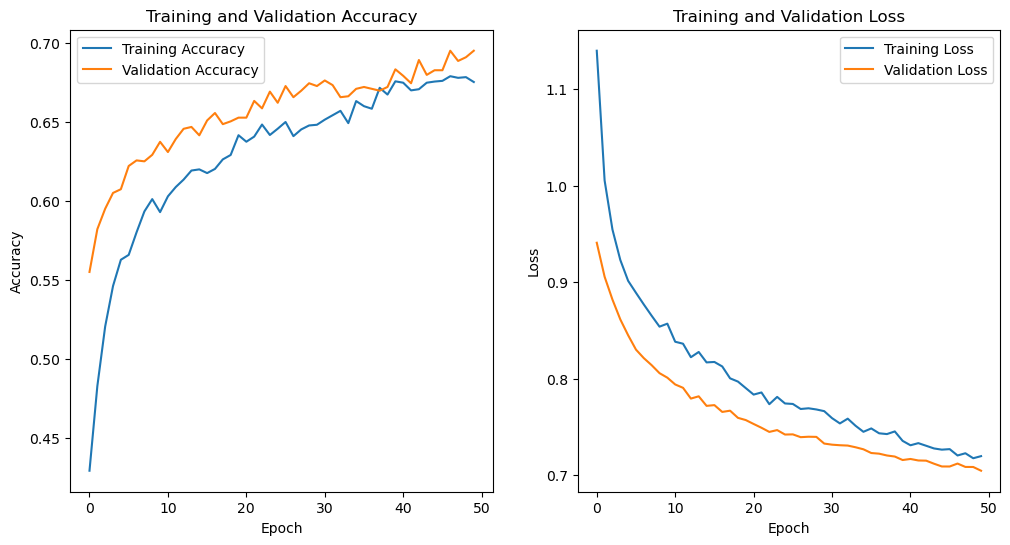

Training history plotted.


In [2]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# In[2]: Load the Data
print("Loading data...")
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct
print("Data loaded successfully.")

# In[3]: Preprocess the Data
print("Preprocessing the data...")
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features normalized.")

# Feature Selection: Correlation Analysis
print("Performing correlation analysis...")
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
correlation_threshold = 0.9
to_remove = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            to_remove.add(colname)
X_selected_df = pd.DataFrame(X_scaled, columns=X.columns).drop(columns=to_remove)
X_selected = X_selected_df.values
print(f"Removed {len(to_remove)} features based on correlation analysis.")

# Feature Selection: Recursive Feature Elimination
print("Performing Recursive Feature Elimination (RFE)...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=50)  # Adjust this number if needed
fit = rfe.fit(X_selected, y)
X_selected = fit.transform(X_selected)
selected_features = fit.support_

# Identify selected feature names
selected_feature_names = X_selected_df.columns[selected_features]
print(f"Selected features using RFE: {list(selected_feature_names)}")

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_selected.reshape((X_selected.shape[0], 1, X_selected.shape[1]))
print("Reshaped data for RNN.")

# In[4]: Define the Model Building Function
def build_model(rnn_units=50, dropout_rate=0.3, use_bidirectional=False):
    print(f"Building model with {rnn_units} RNN units, {dropout_rate} dropout rate, Bidirectional={use_bidirectional}.")
    model = Sequential()
    if use_bidirectional:
        model.add(Bidirectional(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]))))
    else:
        model.add(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units=rnn_units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# In[5]: Stratified K-Fold Cross-Validation with Hyperparameter Tuning
print("Starting Stratified K-Fold Cross-Validation...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold = 1
best_accuracy = 0
best_params = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rnn_units': [30, 50, 70, 100],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'use_bidirectional': [True, False],
}

for params in ParameterGrid(param_grid):
    print(f"Evaluating parameter set: {params}")
    accuracies = []
    reports = []

    for train_index, val_index in skf.split(X_reshaped, y):
        X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Build and compile the model
        model = build_model(rnn_units=params['rnn_units'], dropout_rate=params['dropout_rate'], use_bidirectional=params['use_bidirectional'])
        
        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
        
        # Train the model
        print(f"Training model for fold {fold}...")
        history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_reduction], verbose=1)
        
        # Evaluate the model
        loss, accuracy = model.evaluate(X_val, y_val)
        accuracies.append(accuracy)
        
        # Make predictions
        y_pred = model.predict(X_val)
        y_pred_classes = np.argmax(y_pred, axis=1)
        
        # Store classification report
        reports.append(classification_report(y_val, y_pred_classes, output_dict=True))
        
        print(f"Fold {fold} - Test Loss: {loss}, Test Accuracy: {accuracy}")
        fold += 1

    # Calculate mean accuracy for current hyperparameters
    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy for params {params}: {mean_accuracy}")

    # Update best parameters
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params

print(f"Best Accuracy: {best_accuracy} with params {best_params}")

# Optionally, plot the training history of the last fold
print("Plotting training history...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
print("Training history plotted.")


Loading data...
Data loaded successfully.
Preprocessing the data...
Features normalized.
Reshaped data for RNN.
Starting Stratified K-Fold Cross-Validation...
Evaluating parameter set: {'dropout_rate': 0.1, 'rnn_units': 30, 'use_bidirectional': True}
Building model with 30 RNN units, 0.1 dropout rate, Bidirectional=True.
Training model for fold 1...
Epoch 1/50


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4620 - loss: 1.2493 - val_accuracy: 0.6365 - val_loss: 0.8377 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6395 - loss: 0.8176 - val_accuracy: 0.6624 - val_loss: 0.7656 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6599 - loss: 0.7486 - val_accuracy: 0.6729 - val_loss: 0.7404 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.7003 - val_accuracy: 0.7006 - val_loss: 0.7289 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.6677 - val_accuracy: 0.7106 - val_loss: 0.7198 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7058 - loss: 0.6567 - val_accuracy: 0.7059 - val_loss: 0.7203 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.6259 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4370 - loss: 1.2033 - val_accuracy: 0.6345 - val_loss: 0.8418 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6201 - loss: 0.8295 - val_accuracy: 0.6551 - val_loss: 0.7710 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6636 - loss: 0.7492 - val_accuracy: 0.6739 - val_loss: 0.7494 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.6982 - val_accuracy: 0.6804 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6910 - loss: 0.6954 - val_accuracy: 0.6892 - val_loss: 0.7349 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.6756 - val_accuracy: 0.6904 - val_loss: 0.7290 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7176 - loss: 0.6504 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4877 - loss: 1.1331 - val_accuracy: 0.6133 - val_loss: 0.8319 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 0.8093 - val_accuracy: 0.6380 - val_loss: 0.7852 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6623 - loss: 0.7349 - val_accuracy: 0.6692 - val_loss: 0.7569 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6819 - loss: 0.7022 - val_accuracy: 0.6757 - val_loss: 0.7504 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7022 - loss: 0.6722 - val_accuracy: 0.6816 - val_loss: 0.7399 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7223 - loss: 0.6436 - val_accuracy: 0.6951 - val_loss: 0.7350 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7065 - loss: 0.6401 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4589 - loss: 1.1425 - val_accuracy: 0.6280 - val_loss: 0.8610 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6302 - loss: 0.8290 - val_accuracy: 0.6639 - val_loss: 0.8053 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - loss: 0.7512 - val_accuracy: 0.6780 - val_loss: 0.7840 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.7281 - val_accuracy: 0.6786 - val_loss: 0.7747 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7099 - loss: 0.6731 - val_accuracy: 0.6875 - val_loss: 0.7661 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7107 - loss: 0.6625 - val_accuracy: 0.6845 - val_loss: 0.7640 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7295 - loss: 0.6361 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4604 - loss: 1.1407 - val_accuracy: 0.6480 - val_loss: 0.8395 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6265 - loss: 0.8351 - val_accuracy: 0.6710 - val_loss: 0.7750 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6750 - loss: 0.7557 - val_accuracy: 0.6875 - val_loss: 0.7430 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6918 - loss: 0.7047 - val_accuracy: 0.6939 - val_loss: 0.7301 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6822 - loss: 0.7044 - val_accuracy: 0.6981 - val_loss: 0.7290 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7077 - loss: 0.6732 - val_accuracy: 0.7145 - val_loss: 0.7282 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.6505 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4173 - loss: 1.2174 - val_accuracy: 0.6453 - val_loss: 0.8935 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6188 - loss: 0.8724 - val_accuracy: 0.6588 - val_loss: 0.8044 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.7829 - val_accuracy: 0.6729 - val_loss: 0.7708 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6705 - loss: 0.7326 - val_accuracy: 0.6971 - val_loss: 0.7415 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 0.7123 - val_accuracy: 0.6953 - val_loss: 0.7333 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6854 - loss: 0.6976 - val_accuracy: 0.6953 - val_loss: 0.7310 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7043 - loss: 0.6760 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4366 - loss: 1.2837 - val_accuracy: 0.6004 - val_loss: 0.9207 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - loss: 0.8603 - val_accuracy: 0.6580 - val_loss: 0.8267 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6468 - loss: 0.7858 - val_accuracy: 0.6698 - val_loss: 0.7927 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6720 - loss: 0.7464 - val_accuracy: 0.6622 - val_loss: 0.7688 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6890 - loss: 0.6998 - val_accuracy: 0.6739 - val_loss: 0.7589 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7012 - loss: 0.6848 - val_accuracy: 0.6922 - val_loss: 0.7496 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7020 - loss: 0.6572 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4622 - loss: 1.2732 - val_accuracy: 0.6098 - val_loss: 0.8872 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6254 - loss: 0.8501 - val_accuracy: 0.6557 - val_loss: 0.8232 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6576 - loss: 0.7757 - val_accuracy: 0.6616 - val_loss: 0.7977 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6803 - loss: 0.7476 - val_accuracy: 0.6739 - val_loss: 0.7854 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.7086 - val_accuracy: 0.6722 - val_loss: 0.7813 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7010 - loss: 0.6989 - val_accuracy: 0.6804 - val_loss: 0.7731 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7025 - loss: 0.6763 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4451 - loss: 1.1902 - val_accuracy: 0.6039 - val_loss: 0.8958 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6075 - loss: 0.8755 - val_accuracy: 0.6474 - val_loss: 0.8120 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6497 - loss: 0.7726 - val_accuracy: 0.6604 - val_loss: 0.7899 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6739 - loss: 0.7274 - val_accuracy: 0.6798 - val_loss: 0.7775 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6808 - loss: 0.7121 - val_accuracy: 0.6786 - val_loss: 0.7710 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7027 - loss: 0.6813 - val_accuracy: 0.6792 - val_loss: 0.7692 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7009 - loss: 0.6639 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4346 - loss: 1.1065 - val_accuracy: 0.6045 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6113 - loss: 0.8690 - val_accuracy: 0.6657 - val_loss: 0.8092 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.7926 - val_accuracy: 0.6598 - val_loss: 0.7777 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6722 - loss: 0.7349 - val_accuracy: 0.6757 - val_loss: 0.7569 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 0.6981 - val_accuracy: 0.6833 - val_loss: 0.7532 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.6818 - val_accuracy: 0.6975 - val_loss: 0.7454 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.6915 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4703 - loss: 1.1486 - val_accuracy: 0.6659 - val_loss: 0.7996 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6549 - loss: 0.7778 - val_accuracy: 0.6935 - val_loss: 0.7455 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6834 - loss: 0.7222 - val_accuracy: 0.7076 - val_loss: 0.7283 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7160 - loss: 0.6600 - val_accuracy: 0.7088 - val_loss: 0.7315 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.6544 - val_accuracy: 0.7153 - val_loss: 0.7310 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7209 - loss: 0.6317 - val_accuracy: 0.7165 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.6099 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4824 - loss: 1.1660 - val_accuracy: 0.6622 - val_loss: 0.7978 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.7629 - val_accuracy: 0.6733 - val_loss: 0.7486 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 0.6920 - val_accuracy: 0.6904 - val_loss: 0.7386 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6996 - loss: 0.6835 - val_accuracy: 0.6957 - val_loss: 0.7241 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.6522 - val_accuracy: 0.7057 - val_loss: 0.7166 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7302 - loss: 0.6269 - val_accuracy: 0.7087 - val_loss: 0.7220 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.6112 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5009 - loss: 1.1077 - val_accuracy: 0.6292 - val_loss: 0.8284 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6678 - loss: 0.7736 - val_accuracy: 0.6710 - val_loss: 0.7732 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7093 - loss: 0.6885 - val_accuracy: 0.6804 - val_loss: 0.7566 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7170 - loss: 0.6628 - val_accuracy: 0.6881 - val_loss: 0.7569 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7213 - loss: 0.6489 - val_accuracy: 0.6686 - val_loss: 0.7512 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7293 - loss: 0.6285 - val_accuracy: 0.7022 - val_loss: 0.7376 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.5883 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4965 - loss: 1.1101 - val_accuracy: 0.6551 - val_loss: 0.8133 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6682 - loss: 0.7622 - val_accuracy: 0.6733 - val_loss: 0.7752 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.6818 - val_accuracy: 0.6886 - val_loss: 0.7526 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.6556 - val_accuracy: 0.6945 - val_loss: 0.7424 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7079 - loss: 0.6447 - val_accuracy: 0.6922 - val_loss: 0.7488 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.6083 - val_accuracy: 0.7034 - val_loss: 0.7357 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.6023 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4918 - loss: 1.0929 - val_accuracy: 0.6445 - val_loss: 0.7947 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6382 - loss: 0.7829 - val_accuracy: 0.6833 - val_loss: 0.7321 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.6955 - val_accuracy: 0.6975 - val_loss: 0.7141 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.6746 - val_accuracy: 0.6992 - val_loss: 0.7071 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7228 - loss: 0.6359 - val_accuracy: 0.7087 - val_loss: 0.6996 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.6197 - val_accuracy: 0.7128 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.6154 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4525 - loss: 1.1297 - val_accuracy: 0.6494 - val_loss: 0.8266 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6365 - loss: 0.8139 - val_accuracy: 0.6618 - val_loss: 0.7607 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 0.7375 - val_accuracy: 0.6971 - val_loss: 0.7271 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6987 - loss: 0.6852 - val_accuracy: 0.6935 - val_loss: 0.7227 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7127 - loss: 0.6585 - val_accuracy: 0.7047 - val_loss: 0.7148 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.6291 - val_accuracy: 0.7071 - val_loss: 0.7113 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7228 - loss: 0.6371 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4758 - loss: 1.1299 - val_accuracy: 0.6368 - val_loss: 0.8455 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6416 - loss: 0.8158 - val_accuracy: 0.6551 - val_loss: 0.7771 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6726 - loss: 0.7469 - val_accuracy: 0.6786 - val_loss: 0.7471 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6876 - loss: 0.7033 - val_accuracy: 0.6869 - val_loss: 0.7353 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7059 - loss: 0.6732 - val_accuracy: 0.6792 - val_loss: 0.7325 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7136 - loss: 0.6609 - val_accuracy: 0.6898 - val_loss: 0.7253 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7193 - loss: 0.6351 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4711 - loss: 1.2150 - val_accuracy: 0.6204 - val_loss: 0.8614 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6380 - loss: 0.8262 - val_accuracy: 0.6498 - val_loss: 0.7914 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - loss: 0.7511 - val_accuracy: 0.6757 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7012 - loss: 0.6891 - val_accuracy: 0.6839 - val_loss: 0.7550 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7039 - loss: 0.6762 - val_accuracy: 0.6828 - val_loss: 0.7454 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7175 - loss: 0.6465 - val_accuracy: 0.6863 - val_loss: 0.7456 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.6328 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4605 - loss: 1.1254 - val_accuracy: 0.6345 - val_loss: 0.8452 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6436 - loss: 0.8256 - val_accuracy: 0.6569 - val_loss: 0.7886 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6839 - loss: 0.7345 - val_accuracy: 0.6769 - val_loss: 0.7664 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6938 - loss: 0.6938 - val_accuracy: 0.6845 - val_loss: 0.7584 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7126 - loss: 0.6640 - val_accuracy: 0.6833 - val_loss: 0.7640 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7198 - loss: 0.6555 - val_accuracy: 0.6928 - val_loss: 0.7590 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.6319 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4479 - loss: 1.1497 - val_accuracy: 0.6245 - val_loss: 0.8396 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6350 - loss: 0.8184 - val_accuracy: 0.6645 - val_loss: 0.7732 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6608 - loss: 0.7527 - val_accuracy: 0.6698 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6880 - loss: 0.7012 - val_accuracy: 0.6998 - val_loss: 0.7282 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7137 - loss: 0.6604 - val_accuracy: 0.6986 - val_loss: 0.7305 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - loss: 0.6765 - val_accuracy: 0.6986 - val_loss: 0.7258 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7153 - loss: 0.6469 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5150 - loss: 1.0577 - val_accuracy: 0.6665 - val_loss: 0.7585 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 0.7485 - val_accuracy: 0.6829 - val_loss: 0.7260 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6994 - loss: 0.6920 - val_accuracy: 0.7018 - val_loss: 0.7046 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7067 - loss: 0.6624 - val_accuracy: 0.6965 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 0.6488 - val_accuracy: 0.7088 - val_loss: 0.6986 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7387 - loss: 0.5983 - val_accuracy: 0.7253 - val_loss: 0.6946 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7398 - loss: 0.5906 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5216 - loss: 1.0787 - val_accuracy: 0.6639 - val_loss: 0.7774 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 0.7400 - val_accuracy: 0.6733 - val_loss: 0.7385 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.6875 - val_accuracy: 0.6928 - val_loss: 0.7255 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.6503 - val_accuracy: 0.6916 - val_loss: 0.7256 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7300 - loss: 0.6291 - val_accuracy: 0.7063 - val_loss: 0.7154 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7419 - loss: 0.5958 - val_accuracy: 0.7063 - val_loss: 0.7044 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7407 - loss: 0.6031 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5113 - loss: 1.0732 - val_accuracy: 0.6551 - val_loss: 0.7891 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 0.7374 - val_accuracy: 0.6663 - val_loss: 0.7575 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.6734 - val_accuracy: 0.6910 - val_loss: 0.7453 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.6510 - val_accuracy: 0.6822 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.6305 - val_accuracy: 0.6892 - val_loss: 0.7373 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7493 - loss: 0.5958 - val_accuracy: 0.7022 - val_loss: 0.7312 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7465 - loss: 0.5814 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5095 - loss: 1.0688 - val_accuracy: 0.6533 - val_loss: 0.8056 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.7350 - val_accuracy: 0.6739 - val_loss: 0.7650 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 0.6763 - val_accuracy: 0.6798 - val_loss: 0.7553 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.6736 - val_accuracy: 0.6975 - val_loss: 0.7461 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7358 - loss: 0.6148 - val_accuracy: 0.7028 - val_loss: 0.7477 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7393 - loss: 0.6033 - val_accuracy: 0.7110 - val_loss: 0.7384 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.5800 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4921 - loss: 1.1804 - val_accuracy: 0.6733 - val_loss: 0.7819 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.7506 - val_accuracy: 0.6851 - val_loss: 0.7333 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.6868 - val_accuracy: 0.7034 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7113 - loss: 0.6538 - val_accuracy: 0.7010 - val_loss: 0.7159 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.6325 - val_accuracy: 0.7075 - val_loss: 0.7123 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7405 - loss: 0.6021 - val_accuracy: 0.7028 - val_loss: 0.7053 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7472 - loss: 0.5783 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4882 - loss: 1.1013 - val_accuracy: 0.6653 - val_loss: 0.7833 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6482 - loss: 0.7965 - val_accuracy: 0.6759 - val_loss: 0.7379 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6743 - loss: 0.7196 - val_accuracy: 0.6918 - val_loss: 0.7237 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7018 - loss: 0.6810 - val_accuracy: 0.7088 - val_loss: 0.7142 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7192 - loss: 0.6463 - val_accuracy: 0.7082 - val_loss: 0.7109 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7198 - loss: 0.6349 - val_accuracy: 0.7153 - val_loss: 0.7047 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7337 - loss: 0.6130 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4687 - loss: 1.1591 - val_accuracy: 0.6463 - val_loss: 0.8210 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.8003 - val_accuracy: 0.6704 - val_loss: 0.7528 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6906 - loss: 0.7196 - val_accuracy: 0.6722 - val_loss: 0.7361 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6998 - loss: 0.7001 - val_accuracy: 0.6886 - val_loss: 0.7265 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.6535 - val_accuracy: 0.6904 - val_loss: 0.7220 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7219 - loss: 0.6396 - val_accuracy: 0.7057 - val_loss: 0.7049 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 0.6227 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4888 - loss: 1.0691 - val_accuracy: 0.6410 - val_loss: 0.8030 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6600 - loss: 0.7765 - val_accuracy: 0.6622 - val_loss: 0.7563 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - loss: 0.7002 - val_accuracy: 0.6780 - val_loss: 0.7357 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7097 - loss: 0.6624 - val_accuracy: 0.6845 - val_loss: 0.7271 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7222 - loss: 0.6405 - val_accuracy: 0.6892 - val_loss: 0.7290 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7306 - loss: 0.6082 - val_accuracy: 0.6957 - val_loss: 0.7273 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7444 - loss: 0.6112 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5037 - loss: 1.0899 - val_accuracy: 0.6374 - val_loss: 0.8292 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6552 - loss: 0.7691 - val_accuracy: 0.6639 - val_loss: 0.7854 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6919 - loss: 0.6892 - val_accuracy: 0.6898 - val_loss: 0.7605 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7118 - loss: 0.6644 - val_accuracy: 0.6816 - val_loss: 0.7650 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7208 - loss: 0.6428 - val_accuracy: 0.6939 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7233 - loss: 0.6233 - val_accuracy: 0.6975 - val_loss: 0.7449 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7344 - loss: 0.6063 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4783 - loss: 1.1292 - val_accuracy: 0.6610 - val_loss: 0.7962 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6546 - loss: 0.7869 - val_accuracy: 0.6816 - val_loss: 0.7392 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - loss: 0.7142 - val_accuracy: 0.6869 - val_loss: 0.7329 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7005 - loss: 0.6672 - val_accuracy: 0.7010 - val_loss: 0.7250 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7146 - loss: 0.6487 - val_accuracy: 0.7010 - val_loss: 0.7184 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7253 - loss: 0.6259 - val_accuracy: 0.7004 - val_loss: 0.7218 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 0.6031 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5164 - loss: 1.0957 - val_accuracy: 0.6747 - val_loss: 0.7731 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.7399 - val_accuracy: 0.6935 - val_loss: 0.7354 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7075 - loss: 0.6666 - val_accuracy: 0.7024 - val_loss: 0.7223 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.6327 - val_accuracy: 0.7071 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.6219 - val_accuracy: 0.7053 - val_loss: 0.7107 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7382 - loss: 0.5903 - val_accuracy: 0.7159 - val_loss: 0.7117 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7430 - loss: 0.5870 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5252 - loss: 1.0882 - val_accuracy: 0.6704 - val_loss: 0.7854 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.7116 - val_accuracy: 0.6792 - val_loss: 0.7623 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7034 - loss: 0.6737 - val_accuracy: 0.6951 - val_loss: 0.7336 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 0.6327 - val_accuracy: 0.7022 - val_loss: 0.7224 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.6118 - val_accuracy: 0.6998 - val_loss: 0.7185 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.5996 - val_accuracy: 0.7063 - val_loss: 0.7171 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7592 - loss: 0.5651 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4865 - loss: 1.1407 - val_accuracy: 0.6586 - val_loss: 0.7838 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.7237 - val_accuracy: 0.6622 - val_loss: 0.7676 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7265 - loss: 0.6505 - val_accuracy: 0.6727 - val_loss: 0.7412 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - loss: 0.6242 - val_accuracy: 0.6916 - val_loss: 0.7365 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7477 - loss: 0.5962 - val_accuracy: 0.6933 - val_loss: 0.7288 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7312 - loss: 0.6003 - val_accuracy: 0.7004 - val_loss: 0.7290 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7566 - loss: 0.5632 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5207 - loss: 1.0635 - val_accuracy: 0.6716 - val_loss: 0.7789 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6873 - loss: 0.7024 - val_accuracy: 0.6916 - val_loss: 0.7548 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.6531 - val_accuracy: 0.6928 - val_loss: 0.7569 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7247 - loss: 0.6210 - val_accuracy: 0.6922 - val_loss: 0.7516 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7431 - loss: 0.5882 - val_accuracy: 0.7069 - val_loss: 0.7473 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7568 - loss: 0.5737 - val_accuracy: 0.7098 - val_loss: 0.7455 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7463 - loss: 0.5727 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5141 - loss: 1.0884 - val_accuracy: 0.6786 - val_loss: 0.7496 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6941 - loss: 0.7169 - val_accuracy: 0.6892 - val_loss: 0.7278 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6973 - loss: 0.6779 - val_accuracy: 0.6963 - val_loss: 0.7049 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7214 - loss: 0.6373 - val_accuracy: 0.7122 - val_loss: 0.6954 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7297 - loss: 0.6213 - val_accuracy: 0.7063 - val_loss: 0.7006 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7415 - loss: 0.5856 - val_accuracy: 0.7293 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7501 - loss: 0.5693 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5082 - loss: 1.0678 - val_accuracy: 0.6712 - val_loss: 0.7869 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6706 - loss: 0.7492 - val_accuracy: 0.6824 - val_loss: 0.7511 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6978 - loss: 0.6975 - val_accuracy: 0.7071 - val_loss: 0.7277 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.6557 - val_accuracy: 0.7112 - val_loss: 0.7238 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7273 - loss: 0.6271 - val_accuracy: 0.7153 - val_loss: 0.7129 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7272 - loss: 0.6246 - val_accuracy: 0.7265 - val_loss: 0.7131 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.6033 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5032 - loss: 1.0726 - val_accuracy: 0.6557 - val_loss: 0.7876 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6745 - loss: 0.7456 - val_accuracy: 0.6769 - val_loss: 0.7447 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.6922 - val_accuracy: 0.6910 - val_loss: 0.7271 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7087 - loss: 0.6563 - val_accuracy: 0.6992 - val_loss: 0.7241 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.6305 - val_accuracy: 0.7028 - val_loss: 0.7192 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7350 - loss: 0.6136 - val_accuracy: 0.7151 - val_loss: 0.7199 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7402 - loss: 0.5836 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5114 - loss: 1.0820 - val_accuracy: 0.6463 - val_loss: 0.8072 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6902 - loss: 0.7437 - val_accuracy: 0.6627 - val_loss: 0.7585 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7003 - loss: 0.6819 - val_accuracy: 0.6786 - val_loss: 0.7396 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.6526 - val_accuracy: 0.6886 - val_loss: 0.7323 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.6358 - val_accuracy: 0.6910 - val_loss: 0.7251 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.5980 - val_accuracy: 0.6845 - val_loss: 0.7316 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7377 - loss: 0.5948 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5043 - loss: 1.1016 - val_accuracy: 0.6527 - val_loss: 0.7940 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6786 - loss: 0.7390 - val_accuracy: 0.6822 - val_loss: 0.7580 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7056 - loss: 0.6894 - val_accuracy: 0.6933 - val_loss: 0.7476 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7108 - loss: 0.6579 - val_accuracy: 0.6869 - val_loss: 0.7483 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7278 - loss: 0.6214 - val_accuracy: 0.7010 - val_loss: 0.7408 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7349 - loss: 0.5998 - val_accuracy: 0.7069 - val_loss: 0.7406 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7442 - loss: 0.5915 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4966 - loss: 1.0526 - val_accuracy: 0.6521 - val_loss: 0.7744 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6636 - loss: 0.7637 - val_accuracy: 0.6798 - val_loss: 0.7315 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.6851 - val_accuracy: 0.7045 - val_loss: 0.7107 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7133 - loss: 0.6604 - val_accuracy: 0.6998 - val_loss: 0.7090 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7219 - loss: 0.6356 - val_accuracy: 0.7057 - val_loss: 0.7046 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7410 - loss: 0.6045 - val_accuracy: 0.7169 - val_loss: 0.7000 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7438 - loss: 0.5901 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4481 - loss: 1.2780 - val_accuracy: 0.6394 - val_loss: 0.8574 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5852 - loss: 0.8970 - val_accuracy: 0.6659 - val_loss: 0.7801 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6414 - loss: 0.7961 - val_accuracy: 0.6694 - val_loss: 0.7544 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 0.7623 - val_accuracy: 0.6818 - val_loss: 0.7397 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6751 - loss: 0.7271 - val_accuracy: 0.6906 - val_loss: 0.7313 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6760 - loss: 0.7155 - val_accuracy: 0.6882 - val_loss: 0.7258 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 0.6958 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4456 - loss: 1.2294 - val_accuracy: 0.6221 - val_loss: 0.9055 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5999 - loss: 0.9032 - val_accuracy: 0.6574 - val_loss: 0.8029 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6343 - loss: 0.8123 - val_accuracy: 0.6586 - val_loss: 0.7738 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6461 - loss: 0.7648 - val_accuracy: 0.6722 - val_loss: 0.7532 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6649 - loss: 0.7416 - val_accuracy: 0.6845 - val_loss: 0.7453 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6719 - loss: 0.7359 - val_accuracy: 0.6869 - val_loss: 0.7341 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6940 - loss: 0.6934 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4422 - loss: 1.3843 - val_accuracy: 0.6198 - val_loss: 0.8749 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5968 - loss: 0.9071 - val_accuracy: 0.6498 - val_loss: 0.8068 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6342 - loss: 0.8155 - val_accuracy: 0.6645 - val_loss: 0.7831 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6556 - loss: 0.7612 - val_accuracy: 0.6651 - val_loss: 0.7704 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6847 - loss: 0.7184 - val_accuracy: 0.6763 - val_loss: 0.7626 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 0.7288 - val_accuracy: 0.6780 - val_loss: 0.7608 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6892 - loss: 0.6952 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4219 - loss: 1.3430 - val_accuracy: 0.6086 - val_loss: 0.9026 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5985 - loss: 0.8837 - val_accuracy: 0.6398 - val_loss: 0.8325 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6381 - loss: 0.8108 - val_accuracy: 0.6669 - val_loss: 0.8049 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6547 - loss: 0.7825 - val_accuracy: 0.6757 - val_loss: 0.7909 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.7341 - val_accuracy: 0.6798 - val_loss: 0.7796 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - loss: 0.7333 - val_accuracy: 0.6833 - val_loss: 0.7713 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6889 - loss: 0.6997 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4321 - loss: 1.2006 - val_accuracy: 0.6127 - val_loss: 0.8847 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5870 - loss: 0.9046 - val_accuracy: 0.6569 - val_loss: 0.8069 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6070 - loss: 0.8476 - val_accuracy: 0.6869 - val_loss: 0.7600 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.7840 - val_accuracy: 0.6810 - val_loss: 0.7405 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6525 - loss: 0.7525 - val_accuracy: 0.6892 - val_loss: 0.7327 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6707 - loss: 0.7305 - val_accuracy: 0.6939 - val_loss: 0.7195 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6790 - loss: 0.7092 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4403 - loss: 1.1364 - val_accuracy: 0.5888 - val_loss: 0.9267 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 0.9349 - val_accuracy: 0.6341 - val_loss: 0.8345 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 0.8645 - val_accuracy: 0.6594 - val_loss: 0.7876 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.8004 - val_accuracy: 0.6682 - val_loss: 0.7710 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - loss: 0.7782 - val_accuracy: 0.6741 - val_loss: 0.7632 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 0.7602 - val_accuracy: 0.6859 - val_loss: 0.7570 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.7332 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4153 - loss: 1.2761 - val_accuracy: 0.5956 - val_loss: 0.9478 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 0.9688 - val_accuracy: 0.6351 - val_loss: 0.8677 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6012 - loss: 0.8760 - val_accuracy: 0.6386 - val_loss: 0.8164 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6383 - loss: 0.8039 - val_accuracy: 0.6504 - val_loss: 0.7946 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - loss: 0.7911 - val_accuracy: 0.6645 - val_loss: 0.7723 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6522 - loss: 0.7721 - val_accuracy: 0.6557 - val_loss: 0.7673 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.7395 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4231 - loss: 1.2472 - val_accuracy: 0.5839 - val_loss: 0.9159 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5809 - loss: 0.9404 - val_accuracy: 0.6274 - val_loss: 0.8449 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6136 - loss: 0.8575 - val_accuracy: 0.6274 - val_loss: 0.8221 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6408 - loss: 0.8226 - val_accuracy: 0.6469 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - loss: 0.7725 - val_accuracy: 0.6645 - val_loss: 0.7946 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6873 - loss: 0.7356 - val_accuracy: 0.6704 - val_loss: 0.7840 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6931 - loss: 0.7218 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4138 - loss: 1.2201 - val_accuracy: 0.5644 - val_loss: 0.9578 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - loss: 0.9696 - val_accuracy: 0.6145 - val_loss: 0.8822 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 0.8965 - val_accuracy: 0.6368 - val_loss: 0.8401 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6338 - loss: 0.8194 - val_accuracy: 0.6486 - val_loss: 0.8198 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6463 - loss: 0.7876 - val_accuracy: 0.6545 - val_loss: 0.8042 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.7624 - val_accuracy: 0.6680 - val_loss: 0.7968 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6657 - loss: 0.7441 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4388 - loss: 1.2180 - val_accuracy: 0.6127 - val_loss: 0.9432 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5718 - loss: 0.9508 - val_accuracy: 0.6516 - val_loss: 0.8517 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6051 - loss: 0.8850 - val_accuracy: 0.6551 - val_loss: 0.8083 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6268 - loss: 0.8361 - val_accuracy: 0.6645 - val_loss: 0.7797 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6493 - loss: 0.7848 - val_accuracy: 0.6810 - val_loss: 0.7691 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6618 - loss: 0.7625 - val_accuracy: 0.6810 - val_loss: 0.7577 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6616 - loss: 0.7547 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4298 - loss: 1.4039 - val_accuracy: 0.6459 - val_loss: 0.8417 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6066 - loss: 0.8693 - val_accuracy: 0.6871 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6567 - loss: 0.7742 - val_accuracy: 0.6859 - val_loss: 0.7496 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6803 - loss: 0.7429 - val_accuracy: 0.6912 - val_loss: 0.7330 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6989 - loss: 0.6975 - val_accuracy: 0.6953 - val_loss: 0.7264 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6900 - loss: 0.6879 - val_accuracy: 0.6971 - val_loss: 0.7250 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7090 - loss: 0.6571 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4592 - loss: 1.2374 - val_accuracy: 0.6510 - val_loss: 0.8353 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6297 - loss: 0.8394 - val_accuracy: 0.6710 - val_loss: 0.7770 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6617 - loss: 0.7584 - val_accuracy: 0.6698 - val_loss: 0.7606 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.7162 - val_accuracy: 0.6739 - val_loss: 0.7448 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6972 - loss: 0.6913 - val_accuracy: 0.6857 - val_loss: 0.7403 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.6823 - val_accuracy: 0.6945 - val_loss: 0.7255 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7091 - loss: 0.6538 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4811 - loss: 1.1151 - val_accuracy: 0.6198 - val_loss: 0.8540 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6354 - loss: 0.8380 - val_accuracy: 0.6551 - val_loss: 0.7947 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6700 - loss: 0.7634 - val_accuracy: 0.6675 - val_loss: 0.7690 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.7334 - val_accuracy: 0.6786 - val_loss: 0.7630 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7015 - loss: 0.7040 - val_accuracy: 0.6845 - val_loss: 0.7525 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7162 - loss: 0.6679 - val_accuracy: 0.6922 - val_loss: 0.7418 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7160 - loss: 0.6572 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4678 - loss: 1.2423 - val_accuracy: 0.6168 - val_loss: 0.8670 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6299 - loss: 0.8390 - val_accuracy: 0.6563 - val_loss: 0.8011 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6689 - loss: 0.7596 - val_accuracy: 0.6716 - val_loss: 0.7771 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6879 - loss: 0.7207 - val_accuracy: 0.6804 - val_loss: 0.7654 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.6956 - val_accuracy: 0.6886 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 0.6815 - val_accuracy: 0.6928 - val_loss: 0.7534 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.6657 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4561 - loss: 1.1854 - val_accuracy: 0.6527 - val_loss: 0.8091 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6330 - loss: 0.8222 - val_accuracy: 0.6704 - val_loss: 0.7641 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 0.7531 - val_accuracy: 0.6863 - val_loss: 0.7298 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.7230 - val_accuracy: 0.6928 - val_loss: 0.7271 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6869 - loss: 0.6919 - val_accuracy: 0.6898 - val_loss: 0.7217 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6916 - loss: 0.6771 - val_accuracy: 0.6998 - val_loss: 0.7144 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.6605 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4629 - loss: 1.1528 - val_accuracy: 0.6218 - val_loss: 0.8531 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5911 - loss: 0.8847 - val_accuracy: 0.6529 - val_loss: 0.7863 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6499 - loss: 0.7928 - val_accuracy: 0.6694 - val_loss: 0.7602 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6605 - loss: 0.7525 - val_accuracy: 0.6906 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - loss: 0.7221 - val_accuracy: 0.6994 - val_loss: 0.7418 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6736 - loss: 0.7202 - val_accuracy: 0.6988 - val_loss: 0.7334 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - loss: 0.7091 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4340 - loss: 1.1893 - val_accuracy: 0.6021 - val_loss: 0.8715 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.8940 - val_accuracy: 0.6421 - val_loss: 0.8048 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6348 - loss: 0.8137 - val_accuracy: 0.6722 - val_loss: 0.7782 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6704 - loss: 0.7438 - val_accuracy: 0.6792 - val_loss: 0.7652 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6642 - loss: 0.7480 - val_accuracy: 0.6892 - val_loss: 0.7573 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6844 - loss: 0.7241 - val_accuracy: 0.6851 - val_loss: 0.7485 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6893 - loss: 0.7087 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4387 - loss: 1.1566 - val_accuracy: 0.5962 - val_loss: 0.8736 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6090 - loss: 0.8708 - val_accuracy: 0.6439 - val_loss: 0.8100 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6385 - loss: 0.8003 - val_accuracy: 0.6669 - val_loss: 0.7816 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6573 - loss: 0.7678 - val_accuracy: 0.6539 - val_loss: 0.7698 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6678 - loss: 0.7462 - val_accuracy: 0.6780 - val_loss: 0.7572 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - loss: 0.6998 - val_accuracy: 0.6622 - val_loss: 0.7563 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6908 - loss: 0.7048 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4524 - loss: 1.2442 - val_accuracy: 0.6092 - val_loss: 0.8757 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6096 - loss: 0.8807 - val_accuracy: 0.6410 - val_loss: 0.8165 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6504 - loss: 0.8073 - val_accuracy: 0.6663 - val_loss: 0.7936 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6651 - loss: 0.7554 - val_accuracy: 0.6669 - val_loss: 0.7800 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6814 - loss: 0.7261 - val_accuracy: 0.6704 - val_loss: 0.7741 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6958 - loss: 0.7026 - val_accuracy: 0.6857 - val_loss: 0.7697 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6995 - loss: 0.6790 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4635 - loss: 1.2291 - val_accuracy: 0.6333 - val_loss: 0.8554 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6043 - loss: 0.9127 - val_accuracy: 0.6651 - val_loss: 0.7829 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.8205 - val_accuracy: 0.6816 - val_loss: 0.7566 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 0.7759 - val_accuracy: 0.6798 - val_loss: 0.7430 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - loss: 0.7377 - val_accuracy: 0.6939 - val_loss: 0.7362 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6853 - loss: 0.7218 - val_accuracy: 0.7081 - val_loss: 0.7307 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6932 - loss: 0.6936 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4769 - loss: 1.1993 - val_accuracy: 0.6588 - val_loss: 0.7926 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6375 - loss: 0.8111 - val_accuracy: 0.6824 - val_loss: 0.7492 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6754 - loss: 0.7318 - val_accuracy: 0.6924 - val_loss: 0.7325 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.7031 - val_accuracy: 0.6988 - val_loss: 0.7104 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.6880 - val_accuracy: 0.7035 - val_loss: 0.7087 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.6544 - val_accuracy: 0.7024 - val_loss: 0.7082 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.6406 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4880 - loss: 1.1273 - val_accuracy: 0.6527 - val_loss: 0.8125 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6489 - loss: 0.7963 - val_accuracy: 0.6686 - val_loss: 0.7624 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 0.7310 - val_accuracy: 0.6845 - val_loss: 0.7497 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6912 - loss: 0.7081 - val_accuracy: 0.6945 - val_loss: 0.7270 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.6963 - val_accuracy: 0.6933 - val_loss: 0.7227 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7046 - loss: 0.6755 - val_accuracy: 0.6922 - val_loss: 0.7226 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7263 - loss: 0.6360 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4903 - loss: 1.1798 - val_accuracy: 0.6451 - val_loss: 0.8151 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6536 - loss: 0.7818 - val_accuracy: 0.6598 - val_loss: 0.7739 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.7278 - val_accuracy: 0.6775 - val_loss: 0.7662 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.6992 - val_accuracy: 0.6822 - val_loss: 0.7536 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.6746 - val_accuracy: 0.6939 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7237 - loss: 0.6452 - val_accuracy: 0.7004 - val_loss: 0.7478 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7272 - loss: 0.6355 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4651 - loss: 1.1299 - val_accuracy: 0.6463 - val_loss: 0.8277 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6501 - loss: 0.7986 - val_accuracy: 0.6692 - val_loss: 0.7953 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.7278 - val_accuracy: 0.6851 - val_loss: 0.7747 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6871 - loss: 0.7038 - val_accuracy: 0.6851 - val_loss: 0.7532 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.6697 - val_accuracy: 0.6881 - val_loss: 0.7509 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7268 - loss: 0.6360 - val_accuracy: 0.7028 - val_loss: 0.7463 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.6250 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4870 - loss: 1.1311 - val_accuracy: 0.6333 - val_loss: 0.8220 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6283 - loss: 0.8183 - val_accuracy: 0.6675 - val_loss: 0.7455 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 0.7416 - val_accuracy: 0.6898 - val_loss: 0.7221 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.6974 - val_accuracy: 0.6963 - val_loss: 0.7171 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 0.6853 - val_accuracy: 0.6833 - val_loss: 0.7130 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.6368 - val_accuracy: 0.7045 - val_loss: 0.7081 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.6410 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4639 - loss: 1.1280 - val_accuracy: 0.6465 - val_loss: 0.8287 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6366 - loss: 0.8216 - val_accuracy: 0.6629 - val_loss: 0.7619 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.7650 - val_accuracy: 0.6888 - val_loss: 0.7387 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.7265 - val_accuracy: 0.7012 - val_loss: 0.7294 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6901 - loss: 0.6863 - val_accuracy: 0.7082 - val_loss: 0.7309 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - loss: 0.6816 - val_accuracy: 0.6988 - val_loss: 0.7281 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 0.6528 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4577 - loss: 1.1945 - val_accuracy: 0.6263 - val_loss: 0.8407 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6117 - loss: 0.8697 - val_accuracy: 0.6686 - val_loss: 0.7749 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6508 - loss: 0.7796 - val_accuracy: 0.6716 - val_loss: 0.7531 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6754 - loss: 0.7279 - val_accuracy: 0.6739 - val_loss: 0.7465 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6955 - loss: 0.6924 - val_accuracy: 0.6969 - val_loss: 0.7276 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.6770 - val_accuracy: 0.6975 - val_loss: 0.7282 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.6603 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4366 - loss: 1.2750 - val_accuracy: 0.6039 - val_loss: 0.8525 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6061 - loss: 0.8594 - val_accuracy: 0.6480 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - loss: 0.7467 - val_accuracy: 0.6651 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6882 - loss: 0.7307 - val_accuracy: 0.6763 - val_loss: 0.7446 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.6925 - val_accuracy: 0.6727 - val_loss: 0.7401 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6936 - loss: 0.6911 - val_accuracy: 0.6863 - val_loss: 0.7361 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 0.6533 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4809 - loss: 1.1323 - val_accuracy: 0.6198 - val_loss: 0.8305 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6451 - loss: 0.8295 - val_accuracy: 0.6675 - val_loss: 0.7863 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6531 - loss: 0.7692 - val_accuracy: 0.6727 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.7240 - val_accuracy: 0.6792 - val_loss: 0.7686 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6995 - loss: 0.6893 - val_accuracy: 0.6992 - val_loss: 0.7572 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.6784 - val_accuracy: 0.6928 - val_loss: 0.7594 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7166 - loss: 0.6642 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4565 - loss: 1.2186 - val_accuracy: 0.6280 - val_loss: 0.8511 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6117 - loss: 0.8613 - val_accuracy: 0.6680 - val_loss: 0.7790 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 0.7832 - val_accuracy: 0.6922 - val_loss: 0.7432 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6878 - loss: 0.7239 - val_accuracy: 0.6986 - val_loss: 0.7284 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7093 - val_accuracy: 0.6928 - val_loss: 0.7225 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6961 - loss: 0.6890 - val_accuracy: 0.6969 - val_loss: 0.7174 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7148 - loss: 0.6657 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4926 - loss: 1.1659 - val_accuracy: 0.6629 - val_loss: 0.7694 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6508 - loss: 0.7882 - val_accuracy: 0.6865 - val_loss: 0.7285 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6781 - loss: 0.7103 - val_accuracy: 0.7000 - val_loss: 0.7141 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7046 - loss: 0.6757 - val_accuracy: 0.7129 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.6403 - val_accuracy: 0.7053 - val_loss: 0.7111 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.6335 - val_accuracy: 0.7271 - val_loss: 0.7053 - learning_rate: 0.0010
Epoch 7/50
 97/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7260 - loss: 0.6205
Epoch 7: Redu

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5089 - loss: 1.0938 - val_accuracy: 0.6504 - val_loss: 0.7967 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6651 - loss: 0.7712 - val_accuracy: 0.6828 - val_loss: 0.7541 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6897 - loss: 0.7156 - val_accuracy: 0.6839 - val_loss: 0.7446 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.6876 - val_accuracy: 0.6963 - val_loss: 0.7229 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7315 - loss: 0.6390 - val_accuracy: 0.7063 - val_loss: 0.7295 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.6317 - val_accuracy: 0.6986 - val_loss: 0.7202 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7284 - loss: 0.6260 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5030 - loss: 1.0702 - val_accuracy: 0.6474 - val_loss: 0.7917 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6476 - loss: 0.7803 - val_accuracy: 0.6592 - val_loss: 0.7523 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6924 - loss: 0.7122 - val_accuracy: 0.6786 - val_loss: 0.7389 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7158 - loss: 0.6674 - val_accuracy: 0.6933 - val_loss: 0.7262 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.6487 - val_accuracy: 0.6933 - val_loss: 0.7301 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 0.6354 - val_accuracy: 0.6904 - val_loss: 0.7321 - learning_rate: 0.0010
Epoch 7/50
 90/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7312 - loss: 0.6232
Epoch 7: Redu

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4845 - loss: 1.1764 - val_accuracy: 0.6516 - val_loss: 0.8100 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6642 - loss: 0.7670 - val_accuracy: 0.6780 - val_loss: 0.7602 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.7015 - val_accuracy: 0.6798 - val_loss: 0.7480 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7101 - loss: 0.6722 - val_accuracy: 0.6904 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7170 - loss: 0.6449 - val_accuracy: 0.6957 - val_loss: 0.7416 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.6344 - val_accuracy: 0.7039 - val_loss: 0.7458 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7303 - loss: 0.6134 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4977 - loss: 1.0927 - val_accuracy: 0.6574 - val_loss: 0.7712 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6588 - loss: 0.7749 - val_accuracy: 0.6816 - val_loss: 0.7327 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6944 - loss: 0.7166 - val_accuracy: 0.7004 - val_loss: 0.7136 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7114 - loss: 0.6731 - val_accuracy: 0.6969 - val_loss: 0.7039 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7068 - loss: 0.6611 - val_accuracy: 0.7010 - val_loss: 0.7042 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7310 - loss: 0.6238 - val_accuracy: 0.7039 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7186 - loss: 0.6267 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4603 - loss: 1.1592 - val_accuracy: 0.6635 - val_loss: 0.7878 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6325 - loss: 0.8304 - val_accuracy: 0.6818 - val_loss: 0.7410 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6728 - loss: 0.7457 - val_accuracy: 0.6776 - val_loss: 0.7293 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.7086 - val_accuracy: 0.6947 - val_loss: 0.7199 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 0.6672 - val_accuracy: 0.6971 - val_loss: 0.7253 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7110 - loss: 0.6647 - val_accuracy: 0.7100 - val_loss: 0.7167 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7046 - loss: 0.6518 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4740 - loss: 1.1530 - val_accuracy: 0.6404 - val_loss: 0.8198 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6460 - loss: 0.8035 - val_accuracy: 0.6751 - val_loss: 0.7613 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.7409 - val_accuracy: 0.6892 - val_loss: 0.7398 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6914 - loss: 0.7034 - val_accuracy: 0.6904 - val_loss: 0.7255 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6885 - loss: 0.6873 - val_accuracy: 0.6986 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.6489 - val_accuracy: 0.7098 - val_loss: 0.7197 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.6166 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4792 - loss: 1.2145 - val_accuracy: 0.6304 - val_loss: 0.8250 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6263 - loss: 0.8264 - val_accuracy: 0.6627 - val_loss: 0.7709 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6714 - loss: 0.7441 - val_accuracy: 0.6669 - val_loss: 0.7614 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.6941 - val_accuracy: 0.6833 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7128 - loss: 0.6613 - val_accuracy: 0.6904 - val_loss: 0.7418 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6969 - loss: 0.6773 - val_accuracy: 0.6904 - val_loss: 0.7450 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7296 - loss: 0.6240 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4677 - loss: 1.1232 - val_accuracy: 0.6463 - val_loss: 0.8183 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6408 - loss: 0.8148 - val_accuracy: 0.6733 - val_loss: 0.7815 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6711 - loss: 0.7323 - val_accuracy: 0.6904 - val_loss: 0.7653 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6888 - loss: 0.6975 - val_accuracy: 0.6898 - val_loss: 0.7542 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 0.6622 - val_accuracy: 0.6892 - val_loss: 0.7497 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7122 - loss: 0.6503 - val_accuracy: 0.7110 - val_loss: 0.7443 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7084 - loss: 0.6475 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4711 - loss: 1.1546 - val_accuracy: 0.6498 - val_loss: 0.8198 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6447 - loss: 0.8169 - val_accuracy: 0.6763 - val_loss: 0.7550 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6775 - loss: 0.7395 - val_accuracy: 0.6898 - val_loss: 0.7378 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6953 - loss: 0.6917 - val_accuracy: 0.6981 - val_loss: 0.7246 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6955 - loss: 0.6743 - val_accuracy: 0.7022 - val_loss: 0.7181 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7087 - loss: 0.6605 - val_accuracy: 0.7010 - val_loss: 0.7178 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.6300 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4269 - loss: 1.2904 - val_accuracy: 0.5994 - val_loss: 0.9048 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5629 - loss: 0.9400 - val_accuracy: 0.6435 - val_loss: 0.8389 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6011 - loss: 0.8587 - val_accuracy: 0.6635 - val_loss: 0.7938 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.8235 - val_accuracy: 0.6753 - val_loss: 0.7683 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6291 - loss: 0.8127 - val_accuracy: 0.6806 - val_loss: 0.7552 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6299 - loss: 0.7989 - val_accuracy: 0.6788 - val_loss: 0.7524 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6530 - loss: 0.7596 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4017 - loss: 1.3051 - val_accuracy: 0.5962 - val_loss: 0.9336 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5432 - loss: 0.9738 - val_accuracy: 0.6416 - val_loss: 0.8555 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5909 - loss: 0.8829 - val_accuracy: 0.6510 - val_loss: 0.8080 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6132 - loss: 0.8368 - val_accuracy: 0.6633 - val_loss: 0.7833 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6355 - loss: 0.8079 - val_accuracy: 0.6692 - val_loss: 0.7655 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 0.7707 - val_accuracy: 0.6757 - val_loss: 0.7523 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - loss: 0.7509 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4234 - loss: 1.3484 - val_accuracy: 0.6074 - val_loss: 0.9163 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5471 - loss: 0.9576 - val_accuracy: 0.6145 - val_loss: 0.8433 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 0.8766 - val_accuracy: 0.6557 - val_loss: 0.8176 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6175 - loss: 0.8276 - val_accuracy: 0.6416 - val_loss: 0.8084 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6132 - loss: 0.8186 - val_accuracy: 0.6592 - val_loss: 0.7946 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6297 - loss: 0.7864 - val_accuracy: 0.6669 - val_loss: 0.7878 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6634 - loss: 0.7379 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4453 - loss: 1.2396 - val_accuracy: 0.5745 - val_loss: 0.9122 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5665 - loss: 0.9492 - val_accuracy: 0.6174 - val_loss: 0.8598 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5870 - loss: 0.8820 - val_accuracy: 0.6357 - val_loss: 0.8239 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 0.8233 - val_accuracy: 0.6445 - val_loss: 0.8018 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - loss: 0.7904 - val_accuracy: 0.6604 - val_loss: 0.7871 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6425 - loss: 0.7699 - val_accuracy: 0.6675 - val_loss: 0.7805 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6659 - loss: 0.7635 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4111 - loss: 1.2197 - val_accuracy: 0.6004 - val_loss: 0.9135 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5571 - loss: 0.9346 - val_accuracy: 0.6457 - val_loss: 0.8266 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5979 - loss: 0.8575 - val_accuracy: 0.6463 - val_loss: 0.7852 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6248 - loss: 0.8099 - val_accuracy: 0.6645 - val_loss: 0.7615 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6307 - loss: 0.7969 - val_accuracy: 0.6675 - val_loss: 0.7461 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 0.7620 - val_accuracy: 0.6763 - val_loss: 0.7396 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6454 - loss: 0.7445 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3964 - loss: 1.2960 - val_accuracy: 0.5735 - val_loss: 0.9529 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5257 - loss: 1.0069 - val_accuracy: 0.6218 - val_loss: 0.8751 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5804 - loss: 0.9077 - val_accuracy: 0.6371 - val_loss: 0.8323 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5990 - loss: 0.8722 - val_accuracy: 0.6500 - val_loss: 0.8038 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6274 - loss: 0.8329 - val_accuracy: 0.6694 - val_loss: 0.7866 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6185 - loss: 0.8150 - val_accuracy: 0.6665 - val_loss: 0.7725 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6281 - loss: 0.7882 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4079 - loss: 1.2696 - val_accuracy: 0.5686 - val_loss: 1.0207 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5252 - loss: 1.0295 - val_accuracy: 0.6074 - val_loss: 0.9155 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5642 - loss: 0.9307 - val_accuracy: 0.6380 - val_loss: 0.8530 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5918 - loss: 0.8892 - val_accuracy: 0.6569 - val_loss: 0.8218 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6296 - loss: 0.8306 - val_accuracy: 0.6610 - val_loss: 0.8034 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6261 - loss: 0.8186 - val_accuracy: 0.6598 - val_loss: 0.8031 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6394 - loss: 0.8067 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3995 - loss: 1.3353 - val_accuracy: 0.5456 - val_loss: 0.9673 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5260 - loss: 0.9975 - val_accuracy: 0.5892 - val_loss: 0.8983 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5562 - loss: 0.9304 - val_accuracy: 0.6109 - val_loss: 0.8628 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5780 - loss: 0.8960 - val_accuracy: 0.6333 - val_loss: 0.8367 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 0.8552 - val_accuracy: 0.6398 - val_loss: 0.8122 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6265 - loss: 0.8262 - val_accuracy: 0.6521 - val_loss: 0.8038 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6288 - loss: 0.8141 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3971 - loss: 1.3002 - val_accuracy: 0.5715 - val_loss: 0.9497 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5048 - loss: 1.0217 - val_accuracy: 0.6198 - val_loss: 0.8830 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5590 - loss: 0.9446 - val_accuracy: 0.6368 - val_loss: 0.8497 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5802 - loss: 0.8885 - val_accuracy: 0.6498 - val_loss: 0.8271 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6094 - loss: 0.8410 - val_accuracy: 0.6545 - val_loss: 0.8104 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6127 - loss: 0.8348 - val_accuracy: 0.6498 - val_loss: 0.8028 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6379 - loss: 0.7972 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3918 - loss: 1.1738 - val_accuracy: 0.5533 - val_loss: 1.0001 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5070 - loss: 1.0264 - val_accuracy: 0.5862 - val_loss: 0.9002 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5515 - loss: 0.9316 - val_accuracy: 0.6268 - val_loss: 0.8352 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5911 - loss: 0.8849 - val_accuracy: 0.6404 - val_loss: 0.8088 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6197 - loss: 0.8415 - val_accuracy: 0.6480 - val_loss: 0.7926 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6235 - loss: 0.8263 - val_accuracy: 0.6457 - val_loss: 0.7798 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - loss: 0.7922 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4369 - loss: 1.3970 - val_accuracy: 0.6153 - val_loss: 0.8833 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5918 - loss: 0.9199 - val_accuracy: 0.6476 - val_loss: 0.8041 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 0.8355 - val_accuracy: 0.6547 - val_loss: 0.7654 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 0.7963 - val_accuracy: 0.6606 - val_loss: 0.7564 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6653 - loss: 0.7489 - val_accuracy: 0.6847 - val_loss: 0.7405 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6721 - loss: 0.7273 - val_accuracy: 0.6888 - val_loss: 0.7416 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6793 - loss: 0.7159 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4216 - loss: 1.3406 - val_accuracy: 0.5962 - val_loss: 0.9018 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5691 - loss: 0.9399 - val_accuracy: 0.6410 - val_loss: 0.8282 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6256 - loss: 0.8387 - val_accuracy: 0.6545 - val_loss: 0.7888 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6409 - loss: 0.7951 - val_accuracy: 0.6627 - val_loss: 0.7684 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6622 - loss: 0.7743 - val_accuracy: 0.6692 - val_loss: 0.7488 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6757 - loss: 0.7227 - val_accuracy: 0.6792 - val_loss: 0.7397 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6890 - loss: 0.7136 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4289 - loss: 1.3082 - val_accuracy: 0.6162 - val_loss: 0.8879 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5899 - loss: 0.9137 - val_accuracy: 0.6274 - val_loss: 0.8263 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6037 - loss: 0.8377 - val_accuracy: 0.6416 - val_loss: 0.7882 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.7853 - val_accuracy: 0.6563 - val_loss: 0.7659 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6680 - loss: 0.7572 - val_accuracy: 0.6686 - val_loss: 0.7468 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6757 - loss: 0.7370 - val_accuracy: 0.6745 - val_loss: 0.7449 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.7096 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4292 - loss: 1.4085 - val_accuracy: 0.6133 - val_loss: 0.8910 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5973 - loss: 0.9113 - val_accuracy: 0.6451 - val_loss: 0.8336 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6134 - loss: 0.8549 - val_accuracy: 0.6574 - val_loss: 0.8125 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6348 - loss: 0.7943 - val_accuracy: 0.6733 - val_loss: 0.8011 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6538 - loss: 0.7559 - val_accuracy: 0.6704 - val_loss: 0.7872 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6743 - loss: 0.7239 - val_accuracy: 0.6763 - val_loss: 0.7869 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6700 - loss: 0.7245 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4430 - loss: 1.2975 - val_accuracy: 0.6204 - val_loss: 0.8485 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5688 - loss: 0.9329 - val_accuracy: 0.6527 - val_loss: 0.7933 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6196 - loss: 0.8336 - val_accuracy: 0.6533 - val_loss: 0.7702 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6368 - loss: 0.7869 - val_accuracy: 0.6733 - val_loss: 0.7488 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6679 - loss: 0.7412 - val_accuracy: 0.6845 - val_loss: 0.7405 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6676 - loss: 0.7369 - val_accuracy: 0.6886 - val_loss: 0.7301 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6756 - loss: 0.7201 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4098 - loss: 1.2976 - val_accuracy: 0.5994 - val_loss: 0.9015 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5517 - loss: 0.9632 - val_accuracy: 0.6535 - val_loss: 0.8152 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6016 - loss: 0.8696 - val_accuracy: 0.6694 - val_loss: 0.7824 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6309 - loss: 0.8171 - val_accuracy: 0.6700 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.7774 - val_accuracy: 0.6882 - val_loss: 0.7522 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6467 - loss: 0.7648 - val_accuracy: 0.6882 - val_loss: 0.7460 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6718 - loss: 0.7367 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4256 - loss: 1.2913 - val_accuracy: 0.6192 - val_loss: 0.9190 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5708 - loss: 0.9553 - val_accuracy: 0.6451 - val_loss: 0.8533 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6083 - loss: 0.8661 - val_accuracy: 0.6598 - val_loss: 0.8072 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6280 - loss: 0.8212 - val_accuracy: 0.6663 - val_loss: 0.7836 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6488 - loss: 0.8003 - val_accuracy: 0.6633 - val_loss: 0.7688 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6632 - loss: 0.7695 - val_accuracy: 0.6775 - val_loss: 0.7549 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6681 - loss: 0.7548 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3876 - loss: 1.5616 - val_accuracy: 0.6015 - val_loss: 0.9648 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5423 - loss: 1.0157 - val_accuracy: 0.6251 - val_loss: 0.8741 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6030 - loss: 0.8990 - val_accuracy: 0.6474 - val_loss: 0.8316 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6376 - loss: 0.8430 - val_accuracy: 0.6463 - val_loss: 0.8102 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 0.8079 - val_accuracy: 0.6498 - val_loss: 0.7957 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - loss: 0.7635 - val_accuracy: 0.6645 - val_loss: 0.7803 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - loss: 0.7514 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4262 - loss: 1.2125 - val_accuracy: 0.6021 - val_loss: 0.9140 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5801 - loss: 0.9288 - val_accuracy: 0.6410 - val_loss: 0.8507 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6227 - loss: 0.8534 - val_accuracy: 0.6545 - val_loss: 0.8203 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6453 - loss: 0.7985 - val_accuracy: 0.6580 - val_loss: 0.8043 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6439 - loss: 0.7835 - val_accuracy: 0.6657 - val_loss: 0.7907 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6651 - loss: 0.7520 - val_accuracy: 0.6680 - val_loss: 0.7919 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6712 - loss: 0.7208 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3895 - loss: 1.3453 - val_accuracy: 0.5880 - val_loss: 0.9366 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5426 - loss: 0.9830 - val_accuracy: 0.6404 - val_loss: 0.8423 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 0.8939 - val_accuracy: 0.6486 - val_loss: 0.8065 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6091 - loss: 0.8565 - val_accuracy: 0.6669 - val_loss: 0.7789 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6201 - loss: 0.8207 - val_accuracy: 0.6763 - val_loss: 0.7639 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6464 - loss: 0.8016 - val_accuracy: 0.6822 - val_loss: 0.7488 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.7586 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4672 - loss: 1.2694 - val_accuracy: 0.6512 - val_loss: 0.8305 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5956 - loss: 0.8809 - val_accuracy: 0.6653 - val_loss: 0.7750 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6406 - loss: 0.7873 - val_accuracy: 0.6782 - val_loss: 0.7541 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6534 - loss: 0.7519 - val_accuracy: 0.6771 - val_loss: 0.7334 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6737 - loss: 0.7298 - val_accuracy: 0.6829 - val_loss: 0.7313 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6822 - loss: 0.7160 - val_accuracy: 0.6959 - val_loss: 0.7221 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6951 - loss: 0.6931 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4530 - loss: 1.2580 - val_accuracy: 0.6410 - val_loss: 0.8339 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6173 - loss: 0.8527 - val_accuracy: 0.6645 - val_loss: 0.7753 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.7853 - val_accuracy: 0.6745 - val_loss: 0.7530 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6550 - loss: 0.7693 - val_accuracy: 0.6751 - val_loss: 0.7468 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6811 - loss: 0.7251 - val_accuracy: 0.6786 - val_loss: 0.7313 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6921 - loss: 0.7022 - val_accuracy: 0.6857 - val_loss: 0.7316 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6979 - loss: 0.6905 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4459 - loss: 1.3196 - val_accuracy: 0.6286 - val_loss: 0.8611 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6016 - loss: 0.8884 - val_accuracy: 0.6457 - val_loss: 0.7970 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6485 - loss: 0.7943 - val_accuracy: 0.6527 - val_loss: 0.7705 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6623 - loss: 0.7592 - val_accuracy: 0.6586 - val_loss: 0.7598 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.7197 - val_accuracy: 0.6710 - val_loss: 0.7601 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6841 - loss: 0.7223 - val_accuracy: 0.6751 - val_loss: 0.7636 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6966 - loss: 0.6797 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4536 - loss: 1.2426 - val_accuracy: 0.6227 - val_loss: 0.8401 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6175 - loss: 0.8525 - val_accuracy: 0.6510 - val_loss: 0.7939 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6422 - loss: 0.7868 - val_accuracy: 0.6616 - val_loss: 0.7734 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6808 - loss: 0.7320 - val_accuracy: 0.6763 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6726 - loss: 0.7328 - val_accuracy: 0.6810 - val_loss: 0.7591 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6953 - loss: 0.6919 - val_accuracy: 0.6751 - val_loss: 0.7599 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6997 - loss: 0.6773 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4518 - loss: 1.3040 - val_accuracy: 0.6545 - val_loss: 0.8205 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6192 - loss: 0.8546 - val_accuracy: 0.6692 - val_loss: 0.7633 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6498 - loss: 0.8048 - val_accuracy: 0.6786 - val_loss: 0.7342 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6697 - loss: 0.7494 - val_accuracy: 0.6816 - val_loss: 0.7261 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 0.7174 - val_accuracy: 0.6939 - val_loss: 0.7175 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.7027 - val_accuracy: 0.7039 - val_loss: 0.7106 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6986 - loss: 0.6824 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4028 - loss: 1.3627 - val_accuracy: 0.6335 - val_loss: 0.8776 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5617 - loss: 0.9601 - val_accuracy: 0.6576 - val_loss: 0.8057 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6202 - loss: 0.8543 - val_accuracy: 0.6847 - val_loss: 0.7616 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6503 - loss: 0.7971 - val_accuracy: 0.6812 - val_loss: 0.7447 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.7690 - val_accuracy: 0.6947 - val_loss: 0.7332 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6779 - loss: 0.7348 - val_accuracy: 0.6882 - val_loss: 0.7246 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - loss: 0.7097 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4280 - loss: 1.2594 - val_accuracy: 0.6027 - val_loss: 0.8775 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5898 - loss: 0.9258 - val_accuracy: 0.6345 - val_loss: 0.8213 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6322 - loss: 0.8267 - val_accuracy: 0.6574 - val_loss: 0.7878 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6453 - loss: 0.7948 - val_accuracy: 0.6675 - val_loss: 0.7679 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6543 - loss: 0.7780 - val_accuracy: 0.6816 - val_loss: 0.7448 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 0.7356 - val_accuracy: 0.6828 - val_loss: 0.7377 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6920 - loss: 0.7203 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4384 - loss: 1.2938 - val_accuracy: 0.6139 - val_loss: 0.8941 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5914 - loss: 0.9181 - val_accuracy: 0.6274 - val_loss: 0.8182 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6358 - loss: 0.8308 - val_accuracy: 0.6363 - val_loss: 0.7913 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6440 - loss: 0.7995 - val_accuracy: 0.6569 - val_loss: 0.7728 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6635 - loss: 0.7620 - val_accuracy: 0.6669 - val_loss: 0.7647 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.7281 - val_accuracy: 0.6710 - val_loss: 0.7515 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.7022 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4421 - loss: 1.2511 - val_accuracy: 0.6210 - val_loss: 0.8867 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5843 - loss: 0.9143 - val_accuracy: 0.6498 - val_loss: 0.8267 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - loss: 0.8158 - val_accuracy: 0.6510 - val_loss: 0.8049 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6614 - loss: 0.7654 - val_accuracy: 0.6733 - val_loss: 0.7900 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6645 - loss: 0.7376 - val_accuracy: 0.6698 - val_loss: 0.7873 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6801 - loss: 0.7175 - val_accuracy: 0.6875 - val_loss: 0.7826 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 0.6992 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4437 - loss: 1.2763 - val_accuracy: 0.6215 - val_loss: 0.8627 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5672 - loss: 0.9459 - val_accuracy: 0.6580 - val_loss: 0.8048 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6203 - loss: 0.8533 - val_accuracy: 0.6669 - val_loss: 0.7735 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.7955 - val_accuracy: 0.6786 - val_loss: 0.7527 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6630 - loss: 0.7569 - val_accuracy: 0.6863 - val_loss: 0.7419 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6700 - loss: 0.7408 - val_accuracy: 0.6833 - val_loss: 0.7370 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6805 - loss: 0.7296 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4688 - loss: 1.2597 - val_accuracy: 0.6571 - val_loss: 0.8212 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6162 - loss: 0.8527 - val_accuracy: 0.6653 - val_loss: 0.7600 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6632 - loss: 0.7603 - val_accuracy: 0.6712 - val_loss: 0.7407 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6820 - loss: 0.7169 - val_accuracy: 0.6918 - val_loss: 0.7236 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6881 - loss: 0.7061 - val_accuracy: 0.7000 - val_loss: 0.7180 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.6957 - val_accuracy: 0.7018 - val_loss: 0.7158 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7066 - loss: 0.6582 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4713 - loss: 1.2051 - val_accuracy: 0.6510 - val_loss: 0.8215 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6349 - loss: 0.8317 - val_accuracy: 0.6710 - val_loss: 0.7649 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6468 - loss: 0.7680 - val_accuracy: 0.6686 - val_loss: 0.7506 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6842 - loss: 0.7310 - val_accuracy: 0.6792 - val_loss: 0.7347 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6898 - loss: 0.7123 - val_accuracy: 0.6869 - val_loss: 0.7325 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.6674 - val_accuracy: 0.6810 - val_loss: 0.7225 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7153 - loss: 0.6641 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4547 - loss: 1.1742 - val_accuracy: 0.6245 - val_loss: 0.8142 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6327 - loss: 0.8233 - val_accuracy: 0.6492 - val_loss: 0.7695 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 0.7778 - val_accuracy: 0.6574 - val_loss: 0.7538 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6872 - loss: 0.7217 - val_accuracy: 0.6645 - val_loss: 0.7492 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.6940 - val_accuracy: 0.6751 - val_loss: 0.7443 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7040 - loss: 0.6705 - val_accuracy: 0.6763 - val_loss: 0.7334 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.6624 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4700 - loss: 1.2098 - val_accuracy: 0.6392 - val_loss: 0.8249 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6407 - loss: 0.8169 - val_accuracy: 0.6704 - val_loss: 0.7712 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6501 - loss: 0.7629 - val_accuracy: 0.6763 - val_loss: 0.7548 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6967 - loss: 0.6883 - val_accuracy: 0.6828 - val_loss: 0.7465 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 0.7041 - val_accuracy: 0.6904 - val_loss: 0.7443 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7133 - loss: 0.6587 - val_accuracy: 0.6898 - val_loss: 0.7365 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7041 - loss: 0.6605 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4605 - loss: 1.3033 - val_accuracy: 0.6557 - val_loss: 0.8114 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6179 - loss: 0.8564 - val_accuracy: 0.6839 - val_loss: 0.7528 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 0.7720 - val_accuracy: 0.6839 - val_loss: 0.7339 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 0.7390 - val_accuracy: 0.6998 - val_loss: 0.7216 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - loss: 0.7177 - val_accuracy: 0.6939 - val_loss: 0.7172 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.6863 - val_accuracy: 0.7039 - val_loss: 0.7119 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7037 - loss: 0.6754 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4360 - loss: 1.3140 - val_accuracy: 0.6371 - val_loss: 0.8375 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6061 - loss: 0.8889 - val_accuracy: 0.6553 - val_loss: 0.7765 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6504 - loss: 0.7859 - val_accuracy: 0.6853 - val_loss: 0.7397 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6582 - loss: 0.7620 - val_accuracy: 0.6900 - val_loss: 0.7282 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.7290 - val_accuracy: 0.7035 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7001 - loss: 0.6993 - val_accuracy: 0.7006 - val_loss: 0.7141 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6904 - loss: 0.7008 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4545 - loss: 1.2815 - val_accuracy: 0.6280 - val_loss: 0.8513 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6088 - loss: 0.8866 - val_accuracy: 0.6669 - val_loss: 0.7867 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6358 - loss: 0.8155 - val_accuracy: 0.6722 - val_loss: 0.7577 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6472 - loss: 0.7704 - val_accuracy: 0.6745 - val_loss: 0.7421 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6663 - loss: 0.7431 - val_accuracy: 0.6780 - val_loss: 0.7392 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6847 - loss: 0.7189 - val_accuracy: 0.6786 - val_loss: 0.7361 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6838 - loss: 0.7077 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4656 - loss: 1.2499 - val_accuracy: 0.6404 - val_loss: 0.8404 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 0.8588 - val_accuracy: 0.6421 - val_loss: 0.7912 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6450 - loss: 0.8039 - val_accuracy: 0.6604 - val_loss: 0.7667 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6673 - loss: 0.7470 - val_accuracy: 0.6675 - val_loss: 0.7498 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6874 - loss: 0.7292 - val_accuracy: 0.6657 - val_loss: 0.7466 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7007 - loss: 0.6957 - val_accuracy: 0.6739 - val_loss: 0.7421 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.6941 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4508 - loss: 1.1889 - val_accuracy: 0.6115 - val_loss: 0.8692 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6081 - loss: 0.8873 - val_accuracy: 0.6480 - val_loss: 0.8024 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6571 - loss: 0.7917 - val_accuracy: 0.6745 - val_loss: 0.7750 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6633 - loss: 0.7637 - val_accuracy: 0.6710 - val_loss: 0.7682 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6740 - loss: 0.7206 - val_accuracy: 0.6786 - val_loss: 0.7631 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6784 - loss: 0.7004 - val_accuracy: 0.6798 - val_loss: 0.7626 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6967 - loss: 0.6712 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4354 - loss: 1.2048 - val_accuracy: 0.6357 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5878 - loss: 0.9035 - val_accuracy: 0.6551 - val_loss: 0.7890 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6375 - loss: 0.8110 - val_accuracy: 0.6727 - val_loss: 0.7542 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6597 - loss: 0.7744 - val_accuracy: 0.6886 - val_loss: 0.7430 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.7409 - val_accuracy: 0.6898 - val_loss: 0.7365 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6817 - loss: 0.7130 - val_accuracy: 0.6992 - val_loss: 0.7248 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6956 - loss: 0.6955 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3752 - loss: 1.3869 - val_accuracy: 0.5606 - val_loss: 1.0104 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4943 - loss: 1.0667 - val_accuracy: 0.5906 - val_loss: 0.9189 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5301 - loss: 0.9689 - val_accuracy: 0.6335 - val_loss: 0.8699 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5682 - loss: 0.9404 - val_accuracy: 0.6553 - val_loss: 0.8406 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5874 - loss: 0.8937 - val_accuracy: 0.6459 - val_loss: 0.8195 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5960 - loss: 0.8710 - val_accuracy: 0.6453 - val_loss: 0.8075 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6145 - loss: 0.8423 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3915 - loss: 1.3383 - val_accuracy: 0.5603 - val_loss: 0.9747 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4871 - loss: 1.0339 - val_accuracy: 0.5968 - val_loss: 0.9086 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5348 - loss: 0.9516 - val_accuracy: 0.6145 - val_loss: 0.8695 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5633 - loss: 0.9165 - val_accuracy: 0.6310 - val_loss: 0.8348 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5932 - loss: 0.8680 - val_accuracy: 0.6357 - val_loss: 0.8098 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5954 - loss: 0.8564 - val_accuracy: 0.6510 - val_loss: 0.7974 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6016 - loss: 0.8326 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4051 - loss: 1.4759 - val_accuracy: 0.5633 - val_loss: 0.9433 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5142 - loss: 1.0303 - val_accuracy: 0.5956 - val_loss: 0.8807 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5453 - loss: 0.9582 - val_accuracy: 0.6062 - val_loss: 0.8495 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5858 - loss: 0.8890 - val_accuracy: 0.6257 - val_loss: 0.8290 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6069 - loss: 0.8572 - val_accuracy: 0.6363 - val_loss: 0.8113 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6134 - loss: 0.8314 - val_accuracy: 0.6457 - val_loss: 0.7990 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 0.8266 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3920 - loss: 1.6241 - val_accuracy: 0.6127 - val_loss: 0.9764 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5164 - loss: 1.0864 - val_accuracy: 0.6363 - val_loss: 0.9022 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5638 - loss: 0.9529 - val_accuracy: 0.6374 - val_loss: 0.8597 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5878 - loss: 0.8790 - val_accuracy: 0.6486 - val_loss: 0.8317 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6016 - loss: 0.8670 - val_accuracy: 0.6457 - val_loss: 0.8098 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6142 - loss: 0.8305 - val_accuracy: 0.6521 - val_loss: 0.8039 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6367 - loss: 0.8173 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3875 - loss: 1.4214 - val_accuracy: 0.5780 - val_loss: 0.9815 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 1.0579 - val_accuracy: 0.6009 - val_loss: 0.8961 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5611 - loss: 0.9513 - val_accuracy: 0.6210 - val_loss: 0.8480 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5771 - loss: 0.9158 - val_accuracy: 0.6469 - val_loss: 0.8263 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5896 - loss: 0.8781 - val_accuracy: 0.6557 - val_loss: 0.8112 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6195 - loss: 0.8380 - val_accuracy: 0.6680 - val_loss: 0.7975 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6363 - loss: 0.8206 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3777 - loss: 1.3058 - val_accuracy: 0.5847 - val_loss: 0.9973 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4834 - loss: 1.0692 - val_accuracy: 0.6006 - val_loss: 0.9203 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5308 - loss: 0.9788 - val_accuracy: 0.6353 - val_loss: 0.8679 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5654 - loss: 0.9079 - val_accuracy: 0.6471 - val_loss: 0.8335 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5716 - loss: 0.8923 - val_accuracy: 0.6535 - val_loss: 0.8130 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6045 - loss: 0.8663 - val_accuracy: 0.6512 - val_loss: 0.7981 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6143 - loss: 0.8450 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3793 - loss: 1.3285 - val_accuracy: 0.5121 - val_loss: 1.0366 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4478 - loss: 1.0991 - val_accuracy: 0.5686 - val_loss: 0.9662 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5088 - loss: 0.9930 - val_accuracy: 0.5974 - val_loss: 0.9206 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5140 - loss: 0.9780 - val_accuracy: 0.6233 - val_loss: 0.8855 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 0.9315 - val_accuracy: 0.6204 - val_loss: 0.8616 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5673 - loss: 0.9162 - val_accuracy: 0.6304 - val_loss: 0.8380 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5981 - loss: 0.8751 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3881 - loss: 1.3956 - val_accuracy: 0.5480 - val_loss: 1.0372 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4735 - loss: 1.1167 - val_accuracy: 0.5986 - val_loss: 0.9658 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5121 - loss: 0.9946 - val_accuracy: 0.5880 - val_loss: 0.8908 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5440 - loss: 0.9430 - val_accuracy: 0.6210 - val_loss: 0.8531 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5799 - loss: 0.8947 - val_accuracy: 0.6298 - val_loss: 0.8259 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6042 - loss: 0.8630 - val_accuracy: 0.6469 - val_loss: 0.8093 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6221 - loss: 0.8393 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3606 - loss: 1.4385 - val_accuracy: 0.5121 - val_loss: 1.0025 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4832 - loss: 1.0926 - val_accuracy: 0.5715 - val_loss: 0.9490 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5219 - loss: 1.0024 - val_accuracy: 0.5927 - val_loss: 0.9143 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5522 - loss: 0.9511 - val_accuracy: 0.6186 - val_loss: 0.8835 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5754 - loss: 0.9203 - val_accuracy: 0.6410 - val_loss: 0.8551 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5806 - loss: 0.8822 - val_accuracy: 0.6539 - val_loss: 0.8344 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6125 - loss: 0.8457 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3645 - loss: 1.3650 - val_accuracy: 0.5621 - val_loss: 0.9794 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4859 - loss: 1.0573 - val_accuracy: 0.5974 - val_loss: 0.9148 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5244 - loss: 0.9915 - val_accuracy: 0.6039 - val_loss: 0.8771 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5508 - loss: 0.9370 - val_accuracy: 0.6292 - val_loss: 0.8545 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5601 - loss: 0.9302 - val_accuracy: 0.6469 - val_loss: 0.8295 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5783 - loss: 0.8866 - val_accuracy: 0.6504 - val_loss: 0.8082 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6027 - loss: 0.8537 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3988 - loss: 1.4565 - val_accuracy: 0.6135 - val_loss: 0.9215 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5526 - loss: 0.9954 - val_accuracy: 0.6394 - val_loss: 0.8423 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5741 - loss: 0.9088 - val_accuracy: 0.6700 - val_loss: 0.7938 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6183 - loss: 0.8492 - val_accuracy: 0.6747 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6092 - loss: 0.8288 - val_accuracy: 0.6829 - val_loss: 0.7483 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6363 - loss: 0.7948 - val_accuracy: 0.6712 - val_loss: 0.7396 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6588 - loss: 0.7697 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4168 - loss: 1.4486 - val_accuracy: 0.5745 - val_loss: 0.9314 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5431 - loss: 0.9880 - val_accuracy: 0.6062 - val_loss: 0.8566 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5870 - loss: 0.9032 - val_accuracy: 0.6492 - val_loss: 0.8194 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6039 - loss: 0.8601 - val_accuracy: 0.6492 - val_loss: 0.7982 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6159 - loss: 0.8185 - val_accuracy: 0.6580 - val_loss: 0.7779 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6431 - loss: 0.7776 - val_accuracy: 0.6510 - val_loss: 0.7713 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6552 - loss: 0.7637 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3873 - loss: 1.4188 - val_accuracy: 0.5756 - val_loss: 0.9328 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5445 - loss: 0.9825 - val_accuracy: 0.6033 - val_loss: 0.8600 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5829 - loss: 0.9062 - val_accuracy: 0.6286 - val_loss: 0.8227 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6099 - loss: 0.8360 - val_accuracy: 0.6474 - val_loss: 0.7988 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 0.8249 - val_accuracy: 0.6427 - val_loss: 0.7836 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6395 - loss: 0.7917 - val_accuracy: 0.6580 - val_loss: 0.7701 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6471 - loss: 0.7651 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4099 - loss: 1.3755 - val_accuracy: 0.5933 - val_loss: 0.9290 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5507 - loss: 0.9819 - val_accuracy: 0.6451 - val_loss: 0.8535 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5984 - loss: 0.8931 - val_accuracy: 0.6516 - val_loss: 0.8138 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6184 - loss: 0.8392 - val_accuracy: 0.6527 - val_loss: 0.7969 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6458 - loss: 0.8021 - val_accuracy: 0.6592 - val_loss: 0.7812 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6371 - loss: 0.7905 - val_accuracy: 0.6680 - val_loss: 0.7722 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6563 - loss: 0.7464 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4161 - loss: 1.3390 - val_accuracy: 0.5903 - val_loss: 0.9341 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5503 - loss: 0.9799 - val_accuracy: 0.6304 - val_loss: 0.8479 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5882 - loss: 0.8897 - val_accuracy: 0.6586 - val_loss: 0.8035 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 0.8377 - val_accuracy: 0.6551 - val_loss: 0.7778 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6256 - loss: 0.8157 - val_accuracy: 0.6551 - val_loss: 0.7577 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6423 - loss: 0.7875 - val_accuracy: 0.6551 - val_loss: 0.7487 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6568 - loss: 0.7643 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3535 - loss: 1.7714 - val_accuracy: 0.5724 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4846 - loss: 1.1033 - val_accuracy: 0.6135 - val_loss: 0.9400 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5329 - loss: 0.9825 - val_accuracy: 0.6312 - val_loss: 0.8722 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5637 - loss: 0.9298 - val_accuracy: 0.6406 - val_loss: 0.8404 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5986 - loss: 0.8903 - val_accuracy: 0.6594 - val_loss: 0.8124 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6196 - loss: 0.8457 - val_accuracy: 0.6629 - val_loss: 0.7896 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6179 - loss: 0.8263 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3802 - loss: 1.4382 - val_accuracy: 0.5803 - val_loss: 0.9678 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5156 - loss: 1.0361 - val_accuracy: 0.6398 - val_loss: 0.8864 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5560 - loss: 0.9399 - val_accuracy: 0.6457 - val_loss: 0.8423 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5728 - loss: 0.9155 - val_accuracy: 0.6480 - val_loss: 0.8173 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6050 - loss: 0.8728 - val_accuracy: 0.6598 - val_loss: 0.8039 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6321 - loss: 0.8299 - val_accuracy: 0.6680 - val_loss: 0.7961 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6357 - loss: 0.8102 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3801 - loss: 1.4882 - val_accuracy: 0.5703 - val_loss: 0.9619 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5216 - loss: 1.0562 - val_accuracy: 0.6086 - val_loss: 0.8788 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5724 - loss: 0.9544 - val_accuracy: 0.6215 - val_loss: 0.8340 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5973 - loss: 0.8781 - val_accuracy: 0.6357 - val_loss: 0.8091 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6206 - loss: 0.8547 - val_accuracy: 0.6368 - val_loss: 0.7970 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6332 - loss: 0.8219 - val_accuracy: 0.6380 - val_loss: 0.7869 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6329 - loss: 0.8092 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4015 - loss: 1.3204 - val_accuracy: 0.5827 - val_loss: 0.9567 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5231 - loss: 1.0234 - val_accuracy: 0.6109 - val_loss: 0.8956 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5605 - loss: 0.9346 - val_accuracy: 0.6204 - val_loss: 0.8614 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5805 - loss: 0.8924 - val_accuracy: 0.6263 - val_loss: 0.8376 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6123 - loss: 0.8398 - val_accuracy: 0.6404 - val_loss: 0.8174 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6199 - loss: 0.8255 - val_accuracy: 0.6545 - val_loss: 0.8042 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6353 - loss: 0.8095 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3910 - loss: 1.4184 - val_accuracy: 0.5709 - val_loss: 0.9934 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5029 - loss: 1.0656 - val_accuracy: 0.6304 - val_loss: 0.8984 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5481 - loss: 0.9619 - val_accuracy: 0.6363 - val_loss: 0.8498 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.9056 - val_accuracy: 0.6480 - val_loss: 0.8084 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6129 - loss: 0.8630 - val_accuracy: 0.6551 - val_loss: 0.7971 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6366 - loss: 0.8331 - val_accuracy: 0.6545 - val_loss: 0.7804 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6268 - loss: 0.8155 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4154 - loss: 1.3752 - val_accuracy: 0.6165 - val_loss: 0.8916 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5710 - loss: 0.9289 - val_accuracy: 0.6553 - val_loss: 0.8235 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6041 - loss: 0.8601 - val_accuracy: 0.6765 - val_loss: 0.7824 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6393 - loss: 0.8022 - val_accuracy: 0.6759 - val_loss: 0.7664 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6610 - loss: 0.7753 - val_accuracy: 0.6812 - val_loss: 0.7587 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6569 - loss: 0.7706 - val_accuracy: 0.6876 - val_loss: 0.7519 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6623 - loss: 0.7443 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4172 - loss: 1.5115 - val_accuracy: 0.5898 - val_loss: 0.9121 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5718 - loss: 0.9556 - val_accuracy: 0.6310 - val_loss: 0.8319 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6063 - loss: 0.8615 - val_accuracy: 0.6457 - val_loss: 0.7877 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6074 - loss: 0.8363 - val_accuracy: 0.6645 - val_loss: 0.7662 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6622 - loss: 0.7687 - val_accuracy: 0.6657 - val_loss: 0.7539 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6578 - loss: 0.7538 - val_accuracy: 0.6692 - val_loss: 0.7435 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6680 - loss: 0.7486 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4247 - loss: 1.4595 - val_accuracy: 0.6109 - val_loss: 0.8824 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5670 - loss: 0.9555 - val_accuracy: 0.6263 - val_loss: 0.8234 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6186 - loss: 0.8510 - val_accuracy: 0.6321 - val_loss: 0.7971 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6490 - loss: 0.7968 - val_accuracy: 0.6504 - val_loss: 0.7775 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6489 - loss: 0.7844 - val_accuracy: 0.6545 - val_loss: 0.7690 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 0.7516 - val_accuracy: 0.6686 - val_loss: 0.7588 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6785 - loss: 0.7270 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4212 - loss: 1.3497 - val_accuracy: 0.5968 - val_loss: 0.9019 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5709 - loss: 0.9220 - val_accuracy: 0.6392 - val_loss: 0.8435 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 0.8598 - val_accuracy: 0.6492 - val_loss: 0.8074 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6303 - loss: 0.8058 - val_accuracy: 0.6574 - val_loss: 0.7874 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6353 - loss: 0.7726 - val_accuracy: 0.6722 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6491 - loss: 0.7664 - val_accuracy: 0.6657 - val_loss: 0.7651 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6597 - loss: 0.7322 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4309 - loss: 1.3381 - val_accuracy: 0.6009 - val_loss: 0.8909 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5639 - loss: 0.9450 - val_accuracy: 0.6545 - val_loss: 0.8248 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6144 - loss: 0.8509 - val_accuracy: 0.6592 - val_loss: 0.7894 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6378 - loss: 0.8162 - val_accuracy: 0.6598 - val_loss: 0.7687 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6376 - loss: 0.7835 - val_accuracy: 0.6763 - val_loss: 0.7521 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6633 - loss: 0.7681 - val_accuracy: 0.6792 - val_loss: 0.7386 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6646 - loss: 0.7405 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4010 - loss: 1.3774 - val_accuracy: 0.6135 - val_loss: 0.9168 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5461 - loss: 0.9880 - val_accuracy: 0.6359 - val_loss: 0.8445 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5868 - loss: 0.8975 - val_accuracy: 0.6653 - val_loss: 0.8077 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6173 - loss: 0.8501 - val_accuracy: 0.6829 - val_loss: 0.7831 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6313 - loss: 0.8209 - val_accuracy: 0.6800 - val_loss: 0.7641 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6362 - loss: 0.7975 - val_accuracy: 0.6841 - val_loss: 0.7549 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6531 - loss: 0.7666 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3942 - loss: 1.4395 - val_accuracy: 0.5951 - val_loss: 0.9400 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5501 - loss: 1.0307 - val_accuracy: 0.6421 - val_loss: 0.8551 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5901 - loss: 0.8892 - val_accuracy: 0.6439 - val_loss: 0.8062 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6065 - loss: 0.8610 - val_accuracy: 0.6545 - val_loss: 0.7859 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6245 - loss: 0.8213 - val_accuracy: 0.6574 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6482 - loss: 0.7756 - val_accuracy: 0.6486 - val_loss: 0.7587 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6590 - loss: 0.7668 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4116 - loss: 1.4538 - val_accuracy: 0.6004 - val_loss: 0.9263 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5515 - loss: 1.0304 - val_accuracy: 0.6368 - val_loss: 0.8625 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5877 - loss: 0.9085 - val_accuracy: 0.6433 - val_loss: 0.8353 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6332 - loss: 0.8515 - val_accuracy: 0.6416 - val_loss: 0.8150 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6256 - loss: 0.8322 - val_accuracy: 0.6504 - val_loss: 0.7980 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6476 - loss: 0.8004 - val_accuracy: 0.6492 - val_loss: 0.7901 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6553 - loss: 0.7846 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4124 - loss: 1.4473 - val_accuracy: 0.6068 - val_loss: 0.9060 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5516 - loss: 1.0014 - val_accuracy: 0.6298 - val_loss: 0.8522 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5859 - loss: 0.9158 - val_accuracy: 0.6504 - val_loss: 0.8217 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6173 - loss: 0.8555 - val_accuracy: 0.6480 - val_loss: 0.8010 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6427 - loss: 0.8025 - val_accuracy: 0.6586 - val_loss: 0.7889 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6463 - loss: 0.7865 - val_accuracy: 0.6645 - val_loss: 0.7801 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6590 - loss: 0.7644 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3921 - loss: 1.2861 - val_accuracy: 0.5956 - val_loss: 0.9547 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5397 - loss: 0.9898 - val_accuracy: 0.6280 - val_loss: 0.8557 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5759 - loss: 0.9104 - val_accuracy: 0.6633 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6106 - loss: 0.8512 - val_accuracy: 0.6727 - val_loss: 0.7693 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6516 - loss: 0.7893 - val_accuracy: 0.6769 - val_loss: 0.7520 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6411 - loss: 0.8027 - val_accuracy: 0.6833 - val_loss: 0.7400 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6657 - loss: 0.7415 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4172 - loss: 1.4955 - val_accuracy: 0.5871 - val_loss: 0.8876 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5691 - loss: 0.9314 - val_accuracy: 0.6429 - val_loss: 0.8145 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6153 - loss: 0.8578 - val_accuracy: 0.6494 - val_loss: 0.7855 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6421 - loss: 0.7967 - val_accuracy: 0.6676 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6431 - loss: 0.7662 - val_accuracy: 0.6788 - val_loss: 0.7427 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6520 - loss: 0.7624 - val_accuracy: 0.6824 - val_loss: 0.7372 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6730 - loss: 0.7333 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4482 - loss: 1.2304 - val_accuracy: 0.6333 - val_loss: 0.8513 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5935 - loss: 0.8970 - val_accuracy: 0.6557 - val_loss: 0.7911 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6434 - loss: 0.8033 - val_accuracy: 0.6622 - val_loss: 0.7598 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6603 - loss: 0.7815 - val_accuracy: 0.6627 - val_loss: 0.7471 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6758 - loss: 0.7394 - val_accuracy: 0.6751 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6761 - loss: 0.7362 - val_accuracy: 0.6845 - val_loss: 0.7287 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6810 - loss: 0.7253 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4377 - loss: 1.3343 - val_accuracy: 0.6109 - val_loss: 0.8632 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5998 - loss: 0.8924 - val_accuracy: 0.6333 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6436 - loss: 0.8051 - val_accuracy: 0.6463 - val_loss: 0.7723 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6529 - loss: 0.7825 - val_accuracy: 0.6569 - val_loss: 0.7607 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6598 - loss: 0.7591 - val_accuracy: 0.6633 - val_loss: 0.7519 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6826 - loss: 0.7170 - val_accuracy: 0.6675 - val_loss: 0.7496 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6971 - loss: 0.6924 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4310 - loss: 1.3434 - val_accuracy: 0.6210 - val_loss: 0.8712 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5935 - loss: 0.8917 - val_accuracy: 0.6392 - val_loss: 0.8105 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6327 - loss: 0.8050 - val_accuracy: 0.6480 - val_loss: 0.7844 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6428 - loss: 0.7851 - val_accuracy: 0.6592 - val_loss: 0.7659 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6621 - loss: 0.7431 - val_accuracy: 0.6675 - val_loss: 0.7612 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6730 - loss: 0.7361 - val_accuracy: 0.6863 - val_loss: 0.7558 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6904 - loss: 0.6998 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4461 - loss: 1.3024 - val_accuracy: 0.6433 - val_loss: 0.8436 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5915 - loss: 0.8895 - val_accuracy: 0.6574 - val_loss: 0.7841 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6282 - loss: 0.8164 - val_accuracy: 0.6798 - val_loss: 0.7507 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6580 - loss: 0.7779 - val_accuracy: 0.6863 - val_loss: 0.7377 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6560 - loss: 0.7614 - val_accuracy: 0.6945 - val_loss: 0.7267 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6816 - loss: 0.7312 - val_accuracy: 0.6898 - val_loss: 0.7156 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6780 - loss: 0.7199 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3981 - loss: 1.3800 - val_accuracy: 0.6118 - val_loss: 0.8825 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5571 - loss: 0.9767 - val_accuracy: 0.6388 - val_loss: 0.8189 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6094 - loss: 0.8730 - val_accuracy: 0.6600 - val_loss: 0.7801 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6225 - loss: 0.8247 - val_accuracy: 0.6635 - val_loss: 0.7580 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6557 - loss: 0.7824 - val_accuracy: 0.6753 - val_loss: 0.7470 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6575 - loss: 0.7656 - val_accuracy: 0.6841 - val_loss: 0.7395 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6699 - loss: 0.7336 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4226 - loss: 1.3072 - val_accuracy: 0.5874 - val_loss: 0.8998 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5640 - loss: 0.9378 - val_accuracy: 0.6368 - val_loss: 0.8356 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6072 - loss: 0.8745 - val_accuracy: 0.6533 - val_loss: 0.8025 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6296 - loss: 0.8283 - val_accuracy: 0.6574 - val_loss: 0.7774 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6536 - loss: 0.7760 - val_accuracy: 0.6680 - val_loss: 0.7586 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6550 - loss: 0.7537 - val_accuracy: 0.6757 - val_loss: 0.7512 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6727 - loss: 0.7291 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4151 - loss: 1.3120 - val_accuracy: 0.6121 - val_loss: 0.8778 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5655 - loss: 0.9396 - val_accuracy: 0.6392 - val_loss: 0.8214 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6146 - loss: 0.8525 - val_accuracy: 0.6439 - val_loss: 0.7979 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6402 - loss: 0.8157 - val_accuracy: 0.6521 - val_loss: 0.7827 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6464 - loss: 0.7908 - val_accuracy: 0.6592 - val_loss: 0.7686 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 0.7586 - val_accuracy: 0.6669 - val_loss: 0.7593 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6764 - loss: 0.7442 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4257 - loss: 1.2725 - val_accuracy: 0.6104 - val_loss: 0.8764 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5663 - loss: 0.9443 - val_accuracy: 0.6539 - val_loss: 0.8133 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6031 - loss: 0.8601 - val_accuracy: 0.6622 - val_loss: 0.7825 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6436 - loss: 0.8060 - val_accuracy: 0.6645 - val_loss: 0.7628 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6592 - loss: 0.7684 - val_accuracy: 0.6675 - val_loss: 0.7571 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.7511 - val_accuracy: 0.6751 - val_loss: 0.7582 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.7360 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4334 - loss: 1.3219 - val_accuracy: 0.6086 - val_loss: 0.8982 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5623 - loss: 0.9541 - val_accuracy: 0.6539 - val_loss: 0.8284 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6157 - loss: 0.8640 - val_accuracy: 0.6704 - val_loss: 0.7875 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6252 - loss: 0.8407 - val_accuracy: 0.6775 - val_loss: 0.7667 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6421 - loss: 0.8015 - val_accuracy: 0.6845 - val_loss: 0.7572 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6519 - loss: 0.7678 - val_accuracy: 0.6839 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6712 - loss: 0.7465 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3740 - loss: 2.0011 - val_accuracy: 0.5424 - val_loss: 1.0716 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4543 - loss: 1.2168 - val_accuracy: 0.5724 - val_loss: 0.9929 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4958 - loss: 1.0553 - val_accuracy: 0.5835 - val_loss: 0.9540 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 1.0038 - val_accuracy: 0.6276 - val_loss: 0.9224 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5246 - loss: 0.9758 - val_accuracy: 0.6229 - val_loss: 0.9028 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5539 - loss: 0.9437 - val_accuracy: 0.6318 - val_loss: 0.8718 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5488 - loss: 0.9295 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3788 - loss: 1.6417 - val_accuracy: 0.5132 - val_loss: 1.0401 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4601 - loss: 1.1289 - val_accuracy: 0.5568 - val_loss: 0.9788 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4931 - loss: 1.0294 - val_accuracy: 0.5998 - val_loss: 0.9318 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 1.0011 - val_accuracy: 0.6039 - val_loss: 0.8967 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5501 - loss: 0.9249 - val_accuracy: 0.6239 - val_loss: 0.8710 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5421 - loss: 0.9368 - val_accuracy: 0.6304 - val_loss: 0.8512 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5676 - loss: 0.9069 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3854 - loss: 1.5147 - val_accuracy: 0.5350 - val_loss: 1.0200 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4698 - loss: 1.0870 - val_accuracy: 0.5756 - val_loss: 0.9589 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4945 - loss: 1.0382 - val_accuracy: 0.5945 - val_loss: 0.9260 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5260 - loss: 0.9752 - val_accuracy: 0.6033 - val_loss: 0.8839 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5459 - loss: 0.9191 - val_accuracy: 0.6104 - val_loss: 0.8636 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5550 - loss: 0.9071 - val_accuracy: 0.6133 - val_loss: 0.8467 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5729 - loss: 0.9041 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3607 - loss: 1.5437 - val_accuracy: 0.5444 - val_loss: 1.0575 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4256 - loss: 1.1655 - val_accuracy: 0.5580 - val_loss: 0.9833 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 1.0489 - val_accuracy: 0.5851 - val_loss: 0.9353 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5100 - loss: 1.0011 - val_accuracy: 0.5921 - val_loss: 0.9057 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5263 - loss: 0.9561 - val_accuracy: 0.6033 - val_loss: 0.8826 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5372 - loss: 0.9327 - val_accuracy: 0.6039 - val_loss: 0.8669 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5428 - loss: 0.9136 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3658 - loss: 2.3743 - val_accuracy: 0.5074 - val_loss: 1.0415 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4406 - loss: 1.2527 - val_accuracy: 0.5603 - val_loss: 0.9581 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4750 - loss: 1.0860 - val_accuracy: 0.5827 - val_loss: 0.9155 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5084 - loss: 1.0090 - val_accuracy: 0.6109 - val_loss: 0.8732 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5432 - loss: 0.9554 - val_accuracy: 0.6109 - val_loss: 0.8536 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5491 - loss: 0.9221 - val_accuracy: 0.6051 - val_loss: 0.8373 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5515 - loss: 0.9070 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3590 - loss: 1.7204 - val_accuracy: 0.5229 - val_loss: 1.0765 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4281 - loss: 1.2323 - val_accuracy: 0.5312 - val_loss: 1.0101 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4645 - loss: 1.1280 - val_accuracy: 0.5647 - val_loss: 0.9714 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4897 - loss: 1.0673 - val_accuracy: 0.5912 - val_loss: 0.9365 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5040 - loss: 1.0112 - val_accuracy: 0.6053 - val_loss: 0.9173 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5148 - loss: 0.9766 - val_accuracy: 0.6106 - val_loss: 0.9019 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5120 - loss: 0.9645 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3735 - loss: 1.4438 - val_accuracy: 0.4856 - val_loss: 1.0541 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4238 - loss: 1.1629 - val_accuracy: 0.5533 - val_loss: 1.0041 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4496 - loss: 1.0707 - val_accuracy: 0.5662 - val_loss: 0.9652 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5006 - loss: 1.0271 - val_accuracy: 0.5839 - val_loss: 0.9313 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5230 - loss: 0.9807 - val_accuracy: 0.5968 - val_loss: 0.8997 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5274 - loss: 0.9581 - val_accuracy: 0.6327 - val_loss: 0.8832 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5568 - loss: 0.9244 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3607 - loss: 1.5240 - val_accuracy: 0.5709 - val_loss: 1.0240 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4555 - loss: 1.1550 - val_accuracy: 0.5827 - val_loss: 0.9791 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4757 - loss: 1.0538 - val_accuracy: 0.5845 - val_loss: 0.9374 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5062 - loss: 0.9984 - val_accuracy: 0.5980 - val_loss: 0.9063 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5304 - loss: 0.9741 - val_accuracy: 0.6051 - val_loss: 0.8767 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5614 - loss: 0.9299 - val_accuracy: 0.6062 - val_loss: 0.8530 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5626 - loss: 0.9221 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3518 - loss: 1.5064 - val_accuracy: 0.4944 - val_loss: 1.0387 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4256 - loss: 1.1359 - val_accuracy: 0.5262 - val_loss: 0.9925 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4732 - loss: 1.0783 - val_accuracy: 0.5397 - val_loss: 0.9583 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4993 - loss: 1.0152 - val_accuracy: 0.5745 - val_loss: 0.9248 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - loss: 0.9711 - val_accuracy: 0.6021 - val_loss: 0.9058 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5229 - loss: 0.9444 - val_accuracy: 0.5974 - val_loss: 0.8893 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5412 - loss: 0.9201 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3588 - loss: 1.6208 - val_accuracy: 0.4673 - val_loss: 1.0774 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4125 - loss: 1.2037 - val_accuracy: 0.5338 - val_loss: 0.9966 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4675 - loss: 1.0733 - val_accuracy: 0.5456 - val_loss: 0.9472 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5013 - loss: 1.0190 - val_accuracy: 0.5550 - val_loss: 0.9188 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5247 - loss: 0.9756 - val_accuracy: 0.5562 - val_loss: 0.8978 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5331 - loss: 0.9392 - val_accuracy: 0.5762 - val_loss: 0.8752 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5526 - loss: 0.9275 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3958 - loss: 1.3822 - val_accuracy: 0.5788 - val_loss: 0.9717 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4814 - loss: 1.0577 - val_accuracy: 0.6006 - val_loss: 0.9047 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5402 - loss: 0.9597 - val_accuracy: 0.6365 - val_loss: 0.8605 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5711 - loss: 0.9101 - val_accuracy: 0.6500 - val_loss: 0.8173 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5995 - loss: 0.8588 - val_accuracy: 0.6559 - val_loss: 0.7976 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6075 - loss: 0.8491 - val_accuracy: 0.6629 - val_loss: 0.7712 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6105 - loss: 0.8251 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3800 - loss: 1.6334 - val_accuracy: 0.5674 - val_loss: 0.9749 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4832 - loss: 1.0710 - val_accuracy: 0.5915 - val_loss: 0.9265 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5446 - loss: 0.9585 - val_accuracy: 0.5956 - val_loss: 0.8901 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5611 - loss: 0.9300 - val_accuracy: 0.6051 - val_loss: 0.8640 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5840 - loss: 0.8889 - val_accuracy: 0.6151 - val_loss: 0.8310 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6012 - loss: 0.8641 - val_accuracy: 0.6469 - val_loss: 0.8090 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.8495 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3615 - loss: 1.4694 - val_accuracy: 0.5274 - val_loss: 0.9804 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4971 - loss: 1.0714 - val_accuracy: 0.5768 - val_loss: 0.9062 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5400 - loss: 0.9505 - val_accuracy: 0.6068 - val_loss: 0.8638 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5634 - loss: 0.9155 - val_accuracy: 0.6298 - val_loss: 0.8368 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5683 - loss: 0.8768 - val_accuracy: 0.6380 - val_loss: 0.8142 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5906 - loss: 0.8631 - val_accuracy: 0.6339 - val_loss: 0.7954 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5942 - loss: 0.8293 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3839 - loss: 1.7526 - val_accuracy: 0.5350 - val_loss: 0.9633 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5003 - loss: 1.0955 - val_accuracy: 0.5880 - val_loss: 0.9223 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5279 - loss: 0.9895 - val_accuracy: 0.6257 - val_loss: 0.8858 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5654 - loss: 0.9047 - val_accuracy: 0.6157 - val_loss: 0.8635 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5704 - loss: 0.9206 - val_accuracy: 0.6215 - val_loss: 0.8498 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5827 - loss: 0.8867 - val_accuracy: 0.6327 - val_loss: 0.8344 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5901 - loss: 0.8523 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3681 - loss: 1.7547 - val_accuracy: 0.5262 - val_loss: 1.0067 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4751 - loss: 1.1032 - val_accuracy: 0.5550 - val_loss: 0.9347 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5197 - loss: 0.9840 - val_accuracy: 0.5992 - val_loss: 0.8876 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5484 - loss: 0.9542 - val_accuracy: 0.6098 - val_loss: 0.8627 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5744 - loss: 0.8892 - val_accuracy: 0.6310 - val_loss: 0.8299 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5685 - loss: 0.8802 - val_accuracy: 0.6504 - val_loss: 0.8107 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5867 - loss: 0.8537 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3691 - loss: 2.2708 - val_accuracy: 0.5171 - val_loss: 1.0241 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4763 - loss: 1.2140 - val_accuracy: 0.5600 - val_loss: 0.9514 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4990 - loss: 1.0628 - val_accuracy: 0.5729 - val_loss: 0.9170 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5286 - loss: 0.9987 - val_accuracy: 0.5953 - val_loss: 0.8844 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5541 - loss: 0.9444 - val_accuracy: 0.6000 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5801 - loss: 0.9119 - val_accuracy: 0.6265 - val_loss: 0.8443 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5859 - loss: 0.9005 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3745 - loss: 1.8646 - val_accuracy: 0.5409 - val_loss: 1.0198 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4765 - loss: 1.1947 - val_accuracy: 0.5780 - val_loss: 0.9640 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5086 - loss: 1.0591 - val_accuracy: 0.5856 - val_loss: 0.9341 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5297 - loss: 1.0095 - val_accuracy: 0.5886 - val_loss: 0.9080 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5460 - loss: 0.9718 - val_accuracy: 0.5974 - val_loss: 0.8804 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5715 - loss: 0.9366 - val_accuracy: 0.6239 - val_loss: 0.8551 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5948 - loss: 0.8921 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3693 - loss: 1.5022 - val_accuracy: 0.5880 - val_loss: 0.9906 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4689 - loss: 1.1053 - val_accuracy: 0.5915 - val_loss: 0.9258 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5312 - loss: 0.9942 - val_accuracy: 0.5880 - val_loss: 0.8861 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5416 - loss: 0.9482 - val_accuracy: 0.5962 - val_loss: 0.8564 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5692 - loss: 0.9207 - val_accuracy: 0.6015 - val_loss: 0.8343 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 0.8898 - val_accuracy: 0.6292 - val_loss: 0.8153 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6059 - loss: 0.8575 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3599 - loss: 1.5575 - val_accuracy: 0.5315 - val_loss: 1.0112 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4674 - loss: 1.1252 - val_accuracy: 0.5933 - val_loss: 0.9543 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5108 - loss: 1.0046 - val_accuracy: 0.6033 - val_loss: 0.9150 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5313 - loss: 0.9668 - val_accuracy: 0.6115 - val_loss: 0.8839 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5526 - loss: 0.9351 - val_accuracy: 0.6280 - val_loss: 0.8594 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5778 - loss: 0.8781 - val_accuracy: 0.6263 - val_loss: 0.8396 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5957 - loss: 0.8682 - val_accura

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3793 - loss: 1.5254 - val_accuracy: 0.5862 - val_loss: 1.0003 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4790 - loss: 1.1093 - val_accuracy: 0.6051 - val_loss: 0.9349 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5123 - loss: 1.0146 - val_accuracy: 0.6168 - val_loss: 0.8903 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5621 - loss: 0.9235 - val_accuracy: 0.6416 - val_loss: 0.8459 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5833 - loss: 0.9030 - val_accuracy: 0.6333 - val_loss: 0.8189 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5908 - loss: 0.8846 - val_accuracy: 0.6333 - val_loss: 0.8049 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6091 - loss: 0.8566 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4041 - loss: 1.5847 - val_accuracy: 0.5718 - val_loss: 0.9400 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5051 - loss: 1.0844 - val_accuracy: 0.6188 - val_loss: 0.8859 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5457 - loss: 0.9498 - val_accuracy: 0.6529 - val_loss: 0.8361 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5849 - loss: 0.8969 - val_accuracy: 0.6506 - val_loss: 0.8044 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5879 - loss: 0.8572 - val_accuracy: 0.6524 - val_loss: 0.7836 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6046 - loss: 0.8234 - val_accuracy: 0.6476 - val_loss: 0.7715 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 0.8196 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4212 - loss: 1.3884 - val_accuracy: 0.5974 - val_loss: 0.9160 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 0.9846 - val_accuracy: 0.5998 - val_loss: 0.8751 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5653 - loss: 0.9197 - val_accuracy: 0.6233 - val_loss: 0.8332 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5913 - loss: 0.8761 - val_accuracy: 0.6533 - val_loss: 0.8042 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5970 - loss: 0.8578 - val_accuracy: 0.6527 - val_loss: 0.7823 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6377 - loss: 0.8018 - val_accuracy: 0.6663 - val_loss: 0.7672 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6425 - loss: 0.8077 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3786 - loss: 1.7094 - val_accuracy: 0.5686 - val_loss: 0.9522 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5109 - loss: 1.0503 - val_accuracy: 0.6051 - val_loss: 0.8865 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5660 - loss: 0.9255 - val_accuracy: 0.6363 - val_loss: 0.8371 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 0.8736 - val_accuracy: 0.6174 - val_loss: 0.8110 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6099 - loss: 0.8484 - val_accuracy: 0.6469 - val_loss: 0.7917 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6278 - loss: 0.7974 - val_accuracy: 0.6416 - val_loss: 0.7773 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6277 - loss: 0.8064 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3977 - loss: 1.4881 - val_accuracy: 0.5774 - val_loss: 0.9258 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5258 - loss: 1.0268 - val_accuracy: 0.6257 - val_loss: 0.8731 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5615 - loss: 0.9261 - val_accuracy: 0.6445 - val_loss: 0.8361 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5987 - loss: 0.8620 - val_accuracy: 0.6521 - val_loss: 0.8078 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6266 - loss: 0.8335 - val_accuracy: 0.6486 - val_loss: 0.7922 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 0.8177 - val_accuracy: 0.6563 - val_loss: 0.7837 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.7887 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3855 - loss: 1.5763 - val_accuracy: 0.5927 - val_loss: 0.9340 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5177 - loss: 1.0411 - val_accuracy: 0.6215 - val_loss: 0.8696 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5544 - loss: 0.9453 - val_accuracy: 0.6368 - val_loss: 0.8253 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5849 - loss: 0.8872 - val_accuracy: 0.6539 - val_loss: 0.8024 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6097 - loss: 0.8401 - val_accuracy: 0.6622 - val_loss: 0.7774 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6294 - loss: 0.8281 - val_accuracy: 0.6716 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6232 - loss: 0.8078 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3673 - loss: 1.6739 - val_accuracy: 0.5976 - val_loss: 0.9858 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4591 - loss: 1.1439 - val_accuracy: 0.6247 - val_loss: 0.9153 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5296 - loss: 1.0354 - val_accuracy: 0.6218 - val_loss: 0.8658 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5516 - loss: 0.9682 - val_accuracy: 0.6506 - val_loss: 0.8415 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5662 - loss: 0.9135 - val_accuracy: 0.6576 - val_loss: 0.8135 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6046 - loss: 0.8583 - val_accuracy: 0.6559 - val_loss: 0.7934 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6154 - loss: 0.8404 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3968 - loss: 1.5643 - val_accuracy: 0.5668 - val_loss: 0.9789 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5117 - loss: 1.0943 - val_accuracy: 0.6151 - val_loss: 0.9137 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5495 - loss: 0.9701 - val_accuracy: 0.6257 - val_loss: 0.8679 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5875 - loss: 0.9205 - val_accuracy: 0.6498 - val_loss: 0.8403 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5932 - loss: 0.8965 - val_accuracy: 0.6557 - val_loss: 0.8189 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6186 - loss: 0.8573 - val_accuracy: 0.6563 - val_loss: 0.8016 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6134 - loss: 0.8448 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3699 - loss: 1.4590 - val_accuracy: 0.5480 - val_loss: 0.9840 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4768 - loss: 1.0895 - val_accuracy: 0.5945 - val_loss: 0.9151 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5332 - loss: 0.9747 - val_accuracy: 0.6192 - val_loss: 0.8701 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5659 - loss: 0.9117 - val_accuracy: 0.6180 - val_loss: 0.8438 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5896 - loss: 0.8924 - val_accuracy: 0.6298 - val_loss: 0.8219 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5924 - loss: 0.8611 - val_accuracy: 0.6368 - val_loss: 0.8010 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6093 - loss: 0.8211 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4006 - loss: 1.4283 - val_accuracy: 0.5974 - val_loss: 0.9590 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5057 - loss: 1.0492 - val_accuracy: 0.6080 - val_loss: 0.9002 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5290 - loss: 0.9726 - val_accuracy: 0.6227 - val_loss: 0.8637 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5677 - loss: 0.9106 - val_accuracy: 0.6386 - val_loss: 0.8407 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5905 - loss: 0.8690 - val_accuracy: 0.6392 - val_loss: 0.8254 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6127 - loss: 0.8368 - val_accuracy: 0.6533 - val_loss: 0.8100 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6214 - loss: 0.8156 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4094 - loss: 1.5172 - val_accuracy: 0.5956 - val_loss: 0.9640 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5047 - loss: 1.1060 - val_accuracy: 0.6286 - val_loss: 0.8922 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5389 - loss: 1.0037 - val_accuracy: 0.6533 - val_loss: 0.8629 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5750 - loss: 0.9225 - val_accuracy: 0.6498 - val_loss: 0.8348 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6009 - loss: 0.8851 - val_accuracy: 0.6657 - val_loss: 0.8075 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6023 - loss: 0.8867 - val_accuracy: 0.6669 - val_loss: 0.7885 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6179 - loss: 0.8395 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4208 - loss: 1.3683 - val_accuracy: 0.5988 - val_loss: 0.9142 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5519 - loss: 0.9580 - val_accuracy: 0.6447 - val_loss: 0.8409 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5981 - loss: 0.8714 - val_accuracy: 0.6518 - val_loss: 0.8003 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6109 - loss: 0.8325 - val_accuracy: 0.6712 - val_loss: 0.7779 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6320 - loss: 0.8118 - val_accuracy: 0.6706 - val_loss: 0.7609 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6391 - loss: 0.7813 - val_accuracy: 0.6706 - val_loss: 0.7488 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6480 - loss: 0.7675 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4163 - loss: 1.4576 - val_accuracy: 0.6227 - val_loss: 0.9060 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 0.9864 - val_accuracy: 0.6421 - val_loss: 0.8415 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6011 - loss: 0.8904 - val_accuracy: 0.6480 - val_loss: 0.8104 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6058 - loss: 0.8492 - val_accuracy: 0.6533 - val_loss: 0.7829 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6299 - loss: 0.8113 - val_accuracy: 0.6610 - val_loss: 0.7663 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6448 - loss: 0.7798 - val_accuracy: 0.6633 - val_loss: 0.7578 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6499 - loss: 0.7570 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3944 - loss: 1.4933 - val_accuracy: 0.5815 - val_loss: 0.9206 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5262 - loss: 0.9957 - val_accuracy: 0.6151 - val_loss: 0.8531 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5661 - loss: 0.9192 - val_accuracy: 0.6357 - val_loss: 0.8105 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6052 - loss: 0.8528 - val_accuracy: 0.6368 - val_loss: 0.7873 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6251 - loss: 0.8150 - val_accuracy: 0.6463 - val_loss: 0.7775 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6406 - loss: 0.7670 - val_accuracy: 0.6504 - val_loss: 0.7618 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6501 - loss: 0.7687 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4175 - loss: 1.5086 - val_accuracy: 0.5927 - val_loss: 0.9126 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5528 - loss: 0.9811 - val_accuracy: 0.6121 - val_loss: 0.8544 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5858 - loss: 0.8873 - val_accuracy: 0.6339 - val_loss: 0.8194 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6211 - loss: 0.8392 - val_accuracy: 0.6533 - val_loss: 0.7948 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6246 - loss: 0.7975 - val_accuracy: 0.6521 - val_loss: 0.7833 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6488 - loss: 0.7640 - val_accuracy: 0.6616 - val_loss: 0.7753 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6655 - loss: 0.7389 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4127 - loss: 1.5370 - val_accuracy: 0.5909 - val_loss: 0.9133 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5336 - loss: 0.9920 - val_accuracy: 0.6374 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5728 - loss: 0.9150 - val_accuracy: 0.6451 - val_loss: 0.8077 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 0.8509 - val_accuracy: 0.6616 - val_loss: 0.7807 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6243 - loss: 0.8244 - val_accuracy: 0.6551 - val_loss: 0.7654 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6403 - loss: 0.7815 - val_accuracy: 0.6745 - val_loss: 0.7438 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6486 - loss: 0.7650 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3797 - loss: 1.5823 - val_accuracy: 0.6094 - val_loss: 0.9560 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5025 - loss: 1.0918 - val_accuracy: 0.6418 - val_loss: 0.8825 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 0.9282 - val_accuracy: 0.6453 - val_loss: 0.8309 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5786 - loss: 0.8987 - val_accuracy: 0.6565 - val_loss: 0.8053 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6219 - loss: 0.8431 - val_accuracy: 0.6606 - val_loss: 0.7888 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6238 - loss: 0.8288 - val_accuracy: 0.6635 - val_loss: 0.7820 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6293 - loss: 0.8004 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3997 - loss: 1.5793 - val_accuracy: 0.6098 - val_loss: 0.9522 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5077 - loss: 1.0956 - val_accuracy: 0.6263 - val_loss: 0.8849 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 0.9489 - val_accuracy: 0.6392 - val_loss: 0.8498 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5932 - loss: 0.9005 - val_accuracy: 0.6404 - val_loss: 0.8196 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6167 - loss: 0.8486 - val_accuracy: 0.6527 - val_loss: 0.7963 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6256 - loss: 0.8248 - val_accuracy: 0.6504 - val_loss: 0.7840 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6502 - loss: 0.7897 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4005 - loss: 1.6066 - val_accuracy: 0.5898 - val_loss: 0.9337 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5242 - loss: 1.0986 - val_accuracy: 0.6215 - val_loss: 0.8747 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5673 - loss: 0.9573 - val_accuracy: 0.6398 - val_loss: 0.8481 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5925 - loss: 0.8939 - val_accuracy: 0.6398 - val_loss: 0.8158 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6103 - loss: 0.8636 - val_accuracy: 0.6474 - val_loss: 0.7986 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6400 - loss: 0.7905 - val_accuracy: 0.6539 - val_loss: 0.7868 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6444 - loss: 0.7983 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3948 - loss: 1.4921 - val_accuracy: 0.5862 - val_loss: 0.9603 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5156 - loss: 1.0510 - val_accuracy: 0.6080 - val_loss: 0.8899 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5590 - loss: 0.9441 - val_accuracy: 0.6380 - val_loss: 0.8546 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5859 - loss: 0.8821 - val_accuracy: 0.6321 - val_loss: 0.8314 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6014 - loss: 0.8624 - val_accuracy: 0.6298 - val_loss: 0.8109 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6326 - loss: 0.8067 - val_accuracy: 0.6474 - val_loss: 0.7960 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6412 - loss: 0.7960 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3931 - loss: 1.6779 - val_accuracy: 0.5939 - val_loss: 0.9577 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5109 - loss: 1.0461 - val_accuracy: 0.6286 - val_loss: 0.8577 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5465 - loss: 0.9745 - val_accuracy: 0.6439 - val_loss: 0.8230 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5916 - loss: 0.8886 - val_accuracy: 0.6533 - val_loss: 0.7905 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6201 - loss: 0.8360 - val_accuracy: 0.6739 - val_loss: 0.7693 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6414 - loss: 0.8102 - val_accuracy: 0.6745 - val_loss: 0.7509 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6406 - loss: 0.7959 - val_accurac

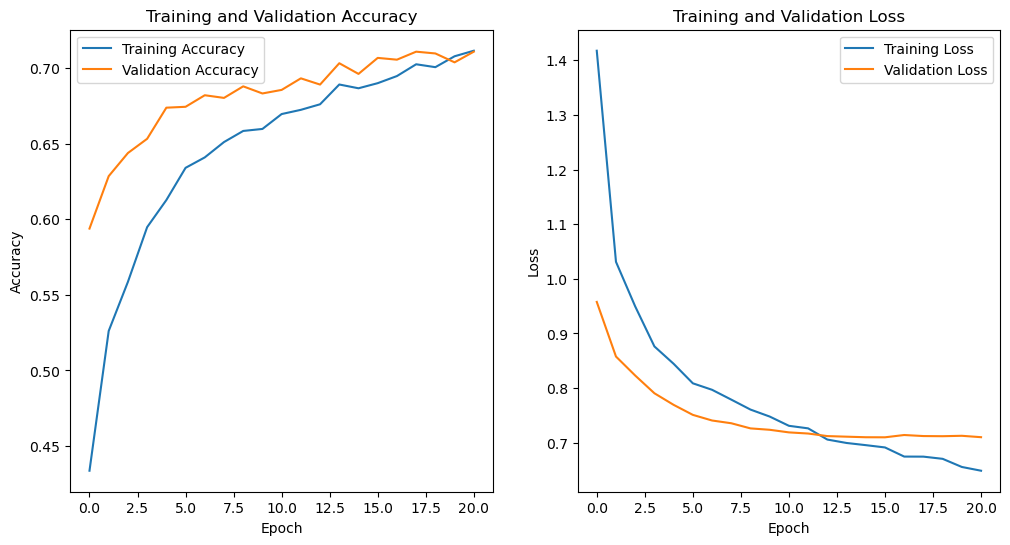

Training history plotted.


In [3]:
# In[1]: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# In[2]: Load the Data
print("Loading data...")
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct
print("Data loaded successfully.")

# In[3]: Preprocess the Data
print("Preprocessing the data...")
# Selecting features and target
X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features normalized.")

# Reshape X for RNN (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
print("Reshaped data for RNN.")

# In[4]: Define the Model Building Function
def build_model(rnn_units=50, dropout_rate=0.3, use_bidirectional=False):
    print(f"Building model with {rnn_units} RNN units, {dropout_rate} dropout rate, Bidirectional={use_bidirectional}.")
    model = Sequential()
    if use_bidirectional:
        model.add(Bidirectional(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]))))
    else:
        model.add(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units=rnn_units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# In[5]: Stratified K-Fold Cross-Validation with Hyperparameter Tuning
print("Starting Stratified K-Fold Cross-Validation...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold = 1
best_accuracy = 0
best_params = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rnn_units': [30, 50, 70, 100],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'use_bidirectional': [True, False],
}

for params in ParameterGrid(param_grid):
    print(f"Evaluating parameter set: {params}")
    accuracies = []
    reports = []

    for train_index, val_index in skf.split(X_reshaped, y):
        X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Build and compile the model
        model = build_model(rnn_units=params['rnn_units'], dropout_rate=params['dropout_rate'], use_bidirectional=params['use_bidirectional'])
        
        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
        
        # Train the model
        print(f"Training model for fold {fold}...")
        history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_reduction], verbose=1)
        
        # Evaluate the model
        loss, accuracy = model.evaluate(X_val, y_val)
        accuracies.append(accuracy)
        
        # Make predictions
        y_pred = model.predict(X_val)
        y_pred_classes = np.argmax(y_pred, axis=1)
        
        # Store classification report
        reports.append(classification_report(y_val, y_pred_classes, output_dict=True))
        
        print(f"Fold {fold} - Test Loss: {loss}, Test Accuracy: {accuracy}")
        fold += 1

    # Calculate mean accuracy for current hyperparameters
    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy for params {params}: {mean_accuracy}")

    # Update best parameters
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params

print(f"Best Accuracy: {best_accuracy} with params {best_params}")

# Optionally, plot the training history of the last fold
print("Plotting training history...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
print("Training history plotted.")


In [4]:
## stratified with grid search

Loading data...
Data loaded successfully.
Starting Grid Search...
Evaluating parameter set: {'dropout_rate': 0.1, 'rnn_units': 30, 'use_bidirectional': True}
Epoch 1/50


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4728 - loss: 1.1943 - val_accuracy: 0.6429 - val_loss: 0.8345 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6325 - loss: 0.8259 - val_accuracy: 0.6794 - val_loss: 0.7711 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6689 - loss: 0.7451 - val_accuracy: 0.6900 - val_loss: 0.7496 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6755 - loss: 0.7139 - val_accuracy: 0.7000 - val_loss: 0.7412 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6990 - loss: 0.6831 - val_accuracy: 0.7024 - val_loss: 0.7435 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7112 - loss: 0.6592 - val_accuracy: 0.7082 - val_loss: 0.7381 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7236 - loss: 0.6251 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4306 - loss: 1.3979 - val_accuracy: 0.6159 - val_loss: 0.9428 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6009 - loss: 0.9212 - val_accuracy: 0.6547 - val_loss: 0.8372 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6511 - loss: 0.8068 - val_accuracy: 0.6676 - val_loss: 0.7840 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 0.7490 - val_accuracy: 0.6753 - val_loss: 0.7618 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6781 - loss: 0.7200 - val_accuracy: 0.6859 - val_loss: 0.7578 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 0.6839 - val_accuracy: 0.6865 - val_loss: 0.7466 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7028 - loss: 0.6826 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4898 - loss: 1.1613 - val_accuracy: 0.6624 - val_loss: 0.7919 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6667 - loss: 0.7658 - val_accuracy: 0.6976 - val_loss: 0.7365 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7027 - loss: 0.6926 - val_accuracy: 0.7006 - val_loss: 0.7346 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.6614 - val_accuracy: 0.7053 - val_loss: 0.7252 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.6565 - val_accuracy: 0.7100 - val_loss: 0.7285 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7123 - loss: 0.6382 - val_accuracy: 0.7253 - val_loss: 0.7208 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.6185 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4771 - loss: 1.1121 - val_accuracy: 0.6182 - val_loss: 0.8548 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6391 - loss: 0.8260 - val_accuracy: 0.6647 - val_loss: 0.7734 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6563 - loss: 0.7645 - val_accuracy: 0.6824 - val_loss: 0.7426 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - loss: 0.7102 - val_accuracy: 0.7012 - val_loss: 0.7370 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - loss: 0.6813 - val_accuracy: 0.7065 - val_loss: 0.7332 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7061 - loss: 0.6623 - val_accuracy: 0.7082 - val_loss: 0.7383 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7255 - loss: 0.6317 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5238 - loss: 1.0213 - val_accuracy: 0.6747 - val_loss: 0.7627 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.7348 - val_accuracy: 0.6900 - val_loss: 0.7273 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.6853 - val_accuracy: 0.7006 - val_loss: 0.7251 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7086 - loss: 0.6500 - val_accuracy: 0.7035 - val_loss: 0.7232 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.6364 - val_accuracy: 0.7153 - val_loss: 0.7130 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7298 - loss: 0.6048 - val_accuracy: 0.7235 - val_loss: 0.7165 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.5876 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4912 - loss: 1.1060 - val_accuracy: 0.6518 - val_loss: 0.8026 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6444 - loss: 0.8057 - val_accuracy: 0.6747 - val_loss: 0.7591 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6707 - loss: 0.7297 - val_accuracy: 0.7029 - val_loss: 0.7298 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7049 - loss: 0.6841 - val_accuracy: 0.7006 - val_loss: 0.7312 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 0.6664 - val_accuracy: 0.6965 - val_loss: 0.7278 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.6541 - val_accuracy: 0.7135 - val_loss: 0.7264 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7341 - loss: 0.6130 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5271 - loss: 1.0507 - val_accuracy: 0.6800 - val_loss: 0.7652 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6852 - loss: 0.7223 - val_accuracy: 0.6882 - val_loss: 0.7357 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7035 - loss: 0.6837 - val_accuracy: 0.6982 - val_loss: 0.7207 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7196 - loss: 0.6429 - val_accuracy: 0.7082 - val_loss: 0.7118 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7392 - loss: 0.6116 - val_accuracy: 0.7165 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7489 - loss: 0.5973 - val_accuracy: 0.7229 - val_loss: 0.6991 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7469 - loss: 0.5749 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5006 - loss: 1.1031 - val_accuracy: 0.6559 - val_loss: 0.7753 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6690 - loss: 0.7524 - val_accuracy: 0.6818 - val_loss: 0.7250 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7014 - loss: 0.6915 - val_accuracy: 0.6935 - val_loss: 0.7131 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7049 - loss: 0.6608 - val_accuracy: 0.6935 - val_loss: 0.7148 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.6268 - val_accuracy: 0.7006 - val_loss: 0.7101 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7344 - loss: 0.6183 - val_accuracy: 0.7165 - val_loss: 0.7071 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7359 - loss: 0.6098 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4507 - loss: 1.3073 - val_accuracy: 0.6347 - val_loss: 0.8796 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6034 - loss: 0.9177 - val_accuracy: 0.6506 - val_loss: 0.8027 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6259 - loss: 0.8255 - val_accuracy: 0.6688 - val_loss: 0.7669 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6470 - loss: 0.7769 - val_accuracy: 0.6706 - val_loss: 0.7542 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.7444 - val_accuracy: 0.6888 - val_loss: 0.7384 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6723 - loss: 0.7381 - val_accuracy: 0.6894 - val_loss: 0.7304 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6929 - loss: 0.6996 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4057 - loss: 1.2609 - val_accuracy: 0.6024 - val_loss: 0.9269 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5593 - loss: 0.9590 - val_accuracy: 0.6571 - val_loss: 0.8361 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5974 - loss: 0.8837 - val_accuracy: 0.6712 - val_loss: 0.7986 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6133 - loss: 0.8418 - val_accuracy: 0.6824 - val_loss: 0.7777 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 0.7935 - val_accuracy: 0.6771 - val_loss: 0.7601 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6469 - loss: 0.7828 - val_accuracy: 0.6835 - val_loss: 0.7553 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6625 - loss: 0.7518 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4389 - loss: 1.1802 - val_accuracy: 0.6547 - val_loss: 0.8093 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6298 - loss: 0.8422 - val_accuracy: 0.6865 - val_loss: 0.7693 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6501 - loss: 0.7725 - val_accuracy: 0.6806 - val_loss: 0.7448 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6706 - loss: 0.7421 - val_accuracy: 0.6929 - val_loss: 0.7367 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 0.7078 - val_accuracy: 0.7006 - val_loss: 0.7337 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7050 - loss: 0.6769 - val_accuracy: 0.7053 - val_loss: 0.7212 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.6595 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4331 - loss: 1.3004 - val_accuracy: 0.6235 - val_loss: 0.8628 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6041 - loss: 0.8870 - val_accuracy: 0.6588 - val_loss: 0.7858 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6412 - loss: 0.8096 - val_accuracy: 0.6706 - val_loss: 0.7495 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6528 - loss: 0.7844 - val_accuracy: 0.6824 - val_loss: 0.7308 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6731 - loss: 0.7513 - val_accuracy: 0.6800 - val_loss: 0.7284 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6840 - loss: 0.7290 - val_accuracy: 0.6759 - val_loss: 0.7274 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6870 - loss: 0.7165 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4736 - loss: 1.1963 - val_accuracy: 0.6694 - val_loss: 0.7796 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6531 - loss: 0.7989 - val_accuracy: 0.6794 - val_loss: 0.7410 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 0.7337 - val_accuracy: 0.6871 - val_loss: 0.7280 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6993 - loss: 0.7007 - val_accuracy: 0.7112 - val_loss: 0.7189 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7141 - loss: 0.6634 - val_accuracy: 0.6988 - val_loss: 0.7138 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7174 - loss: 0.6437 - val_accuracy: 0.7147 - val_loss: 0.7036 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7233 - loss: 0.6369 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4484 - loss: 1.1667 - val_accuracy: 0.6341 - val_loss: 0.8435 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6183 - loss: 0.8464 - val_accuracy: 0.6682 - val_loss: 0.7788 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6457 - loss: 0.7807 - val_accuracy: 0.6800 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.7382 - val_accuracy: 0.6918 - val_loss: 0.7346 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.7112 - val_accuracy: 0.7018 - val_loss: 0.7242 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.6860 - val_accuracy: 0.6947 - val_loss: 0.7233 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6947 - loss: 0.6758 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4912 - loss: 1.1546 - val_accuracy: 0.6665 - val_loss: 0.7747 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6517 - loss: 0.7793 - val_accuracy: 0.6918 - val_loss: 0.7287 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6879 - loss: 0.7035 - val_accuracy: 0.7006 - val_loss: 0.7275 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7004 - loss: 0.6852 - val_accuracy: 0.6935 - val_loss: 0.7235 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7093 - loss: 0.6565 - val_accuracy: 0.7035 - val_loss: 0.7133 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7141 - loss: 0.6585 - val_accuracy: 0.7212 - val_loss: 0.7093 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7288 - loss: 0.6272 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4684 - loss: 1.1883 - val_accuracy: 0.6418 - val_loss: 0.8018 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6164 - loss: 0.8411 - val_accuracy: 0.6765 - val_loss: 0.7570 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6657 - loss: 0.7570 - val_accuracy: 0.6988 - val_loss: 0.7364 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6800 - loss: 0.6967 - val_accuracy: 0.6953 - val_loss: 0.7286 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6974 - loss: 0.6785 - val_accuracy: 0.7024 - val_loss: 0.7229 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.6610 - val_accuracy: 0.7088 - val_loss: 0.7150 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.6442 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4163 - loss: 1.4003 - val_accuracy: 0.5676 - val_loss: 0.9183 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5426 - loss: 0.9931 - val_accuracy: 0.6247 - val_loss: 0.8425 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5746 - loss: 0.8915 - val_accuracy: 0.6441 - val_loss: 0.8039 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6120 - loss: 0.8422 - val_accuracy: 0.6535 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6255 - loss: 0.8196 - val_accuracy: 0.6594 - val_loss: 0.7601 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6423 - loss: 0.7864 - val_accuracy: 0.6659 - val_loss: 0.7491 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6466 - loss: 0.7568 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4300 - loss: 1.3149 - val_accuracy: 0.5982 - val_loss: 0.9343 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5345 - loss: 0.9932 - val_accuracy: 0.6176 - val_loss: 0.8704 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5656 - loss: 0.9113 - val_accuracy: 0.6247 - val_loss: 0.8323 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5997 - loss: 0.8684 - val_accuracy: 0.6359 - val_loss: 0.8052 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6098 - loss: 0.8346 - val_accuracy: 0.6382 - val_loss: 0.7977 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6130 - loss: 0.8391 - val_accuracy: 0.6453 - val_loss: 0.7904 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6421 - loss: 0.7800 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4528 - loss: 1.2468 - val_accuracy: 0.6188 - val_loss: 0.8448 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5887 - loss: 0.8917 - val_accuracy: 0.6600 - val_loss: 0.7889 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6181 - loss: 0.8207 - val_accuracy: 0.6876 - val_loss: 0.7607 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6352 - loss: 0.7892 - val_accuracy: 0.6859 - val_loss: 0.7497 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6521 - loss: 0.7563 - val_accuracy: 0.6906 - val_loss: 0.7422 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.7154 - val_accuracy: 0.6935 - val_loss: 0.7339 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.7098 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4050 - loss: 1.2355 - val_accuracy: 0.6018 - val_loss: 0.9119 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5493 - loss: 0.9649 - val_accuracy: 0.6353 - val_loss: 0.8289 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6068 - loss: 0.8737 - val_accuracy: 0.6535 - val_loss: 0.7901 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6227 - loss: 0.8201 - val_accuracy: 0.6641 - val_loss: 0.7788 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6468 - loss: 0.7768 - val_accuracy: 0.6729 - val_loss: 0.7611 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.7726 - val_accuracy: 0.6782 - val_loss: 0.7489 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - loss: 0.7479 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4464 - loss: 1.2385 - val_accuracy: 0.6300 - val_loss: 0.8357 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6125 - loss: 0.8612 - val_accuracy: 0.6541 - val_loss: 0.7668 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6580 - loss: 0.7761 - val_accuracy: 0.6706 - val_loss: 0.7405 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6615 - loss: 0.7487 - val_accuracy: 0.6771 - val_loss: 0.7215 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6767 - loss: 0.7085 - val_accuracy: 0.6941 - val_loss: 0.7141 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6928 - loss: 0.6935 - val_accuracy: 0.7053 - val_loss: 0.7152 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7007 - loss: 0.6813 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4240 - loss: 1.2449 - val_accuracy: 0.6241 - val_loss: 0.8707 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5882 - loss: 0.9056 - val_accuracy: 0.6694 - val_loss: 0.8012 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.8325 - val_accuracy: 0.6859 - val_loss: 0.7623 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6380 - loss: 0.7867 - val_accuracy: 0.6741 - val_loss: 0.7463 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6597 - loss: 0.7536 - val_accuracy: 0.6841 - val_loss: 0.7425 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6734 - loss: 0.7286 - val_accuracy: 0.6865 - val_loss: 0.7356 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6813 - loss: 0.7146 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4653 - loss: 1.2242 - val_accuracy: 0.6265 - val_loss: 0.8178 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6189 - loss: 0.8375 - val_accuracy: 0.6765 - val_loss: 0.7542 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6517 - loss: 0.7731 - val_accuracy: 0.6906 - val_loss: 0.7343 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6823 - loss: 0.7263 - val_accuracy: 0.6994 - val_loss: 0.7233 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6936 - loss: 0.7087 - val_accuracy: 0.7018 - val_loss: 0.7193 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7158 - loss: 0.6581 - val_accuracy: 0.6976 - val_loss: 0.7140 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6969 - loss: 0.6711 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4601 - loss: 1.1746 - val_accuracy: 0.6153 - val_loss: 0.8426 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5944 - loss: 0.8745 - val_accuracy: 0.6718 - val_loss: 0.7751 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 0.7874 - val_accuracy: 0.6706 - val_loss: 0.7467 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 0.7577 - val_accuracy: 0.6800 - val_loss: 0.7327 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6826 - loss: 0.7281 - val_accuracy: 0.6971 - val_loss: 0.7252 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6809 - loss: 0.7062 - val_accuracy: 0.7012 - val_loss: 0.7258 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6975 - loss: 0.6894 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3920 - loss: 1.4993 - val_accuracy: 0.5506 - val_loss: 0.9770 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4767 - loss: 1.0776 - val_accuracy: 0.6218 - val_loss: 0.9121 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5399 - loss: 0.9875 - val_accuracy: 0.6212 - val_loss: 0.8608 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5721 - loss: 0.9062 - val_accuracy: 0.6324 - val_loss: 0.8278 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 0.8673 - val_accuracy: 0.6506 - val_loss: 0.8022 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5927 - loss: 0.8641 - val_accuracy: 0.6565 - val_loss: 0.7884 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6251 - loss: 0.8201 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3558 - loss: 1.4009 - val_accuracy: 0.5229 - val_loss: 1.0265 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4621 - loss: 1.0811 - val_accuracy: 0.5912 - val_loss: 0.9374 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5169 - loss: 0.9969 - val_accuracy: 0.6294 - val_loss: 0.8873 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5430 - loss: 0.9388 - val_accuracy: 0.6465 - val_loss: 0.8521 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5633 - loss: 0.9124 - val_accuracy: 0.6547 - val_loss: 0.8259 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6044 - loss: 0.8643 - val_accuracy: 0.6388 - val_loss: 0.8034 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6077 - loss: 0.8507 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4037 - loss: 1.5146 - val_accuracy: 0.5912 - val_loss: 0.9319 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5429 - loss: 0.9890 - val_accuracy: 0.6424 - val_loss: 0.8500 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5690 - loss: 0.9161 - val_accuracy: 0.6429 - val_loss: 0.8089 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6103 - loss: 0.8543 - val_accuracy: 0.6576 - val_loss: 0.7817 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6135 - loss: 0.8329 - val_accuracy: 0.6582 - val_loss: 0.7651 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6321 - loss: 0.7979 - val_accuracy: 0.6671 - val_loss: 0.7541 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6496 - loss: 0.7661 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3933 - loss: 1.5139 - val_accuracy: 0.5941 - val_loss: 0.9531 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4982 - loss: 1.0869 - val_accuracy: 0.6429 - val_loss: 0.8718 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5410 - loss: 0.9797 - val_accuracy: 0.6565 - val_loss: 0.8282 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 0.9123 - val_accuracy: 0.6659 - val_loss: 0.8083 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6059 - loss: 0.8496 - val_accuracy: 0.6741 - val_loss: 0.7911 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5976 - loss: 0.8481 - val_accuracy: 0.6782 - val_loss: 0.7741 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6079 - loss: 0.8258 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4025 - loss: 1.5281 - val_accuracy: 0.6076 - val_loss: 0.9191 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5520 - loss: 0.9820 - val_accuracy: 0.6282 - val_loss: 0.8491 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.8839 - val_accuracy: 0.6612 - val_loss: 0.8050 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6175 - loss: 0.8394 - val_accuracy: 0.6571 - val_loss: 0.7679 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6302 - loss: 0.7789 - val_accuracy: 0.6747 - val_loss: 0.7588 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6558 - loss: 0.7564 - val_accuracy: 0.6747 - val_loss: 0.7515 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6522 - loss: 0.7580 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4107 - loss: 1.4675 - val_accuracy: 0.5753 - val_loss: 0.9436 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5105 - loss: 1.0754 - val_accuracy: 0.6494 - val_loss: 0.8694 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5705 - loss: 0.9319 - val_accuracy: 0.6512 - val_loss: 0.8195 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6089 - loss: 0.8558 - val_accuracy: 0.6747 - val_loss: 0.7875 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6350 - loss: 0.8269 - val_accuracy: 0.6776 - val_loss: 0.7704 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6403 - loss: 0.7854 - val_accuracy: 0.6829 - val_loss: 0.7474 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6611 - loss: 0.7559 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4396 - loss: 1.3210 - val_accuracy: 0.6259 - val_loss: 0.8552 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5894 - loss: 0.9177 - val_accuracy: 0.6776 - val_loss: 0.7919 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6365 - loss: 0.8288 - val_accuracy: 0.6794 - val_loss: 0.7541 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6520 - loss: 0.7826 - val_accuracy: 0.6765 - val_loss: 0.7364 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6539 - loss: 0.7567 - val_accuracy: 0.6906 - val_loss: 0.7224 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6812 - loss: 0.7270 - val_accuracy: 0.6847 - val_loss: 0.7213 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6737 - loss: 0.7323 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4223 - loss: 1.3090 - val_accuracy: 0.6465 - val_loss: 0.8710 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5750 - loss: 0.9363 - val_accuracy: 0.6435 - val_loss: 0.8065 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6151 - loss: 0.8563 - val_accuracy: 0.6635 - val_loss: 0.7809 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6348 - loss: 0.8191 - val_accuracy: 0.6759 - val_loss: 0.7558 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6544 - loss: 0.7793 - val_accuracy: 0.6753 - val_loss: 0.7409 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6710 - loss: 0.7399 - val_accuracy: 0.6853 - val_loss: 0.7327 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6639 - loss: 0.7536 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3781 - loss: 1.4690 - val_accuracy: 0.5582 - val_loss: 1.0035 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4681 - loss: 1.1152 - val_accuracy: 0.5559 - val_loss: 0.9478 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4822 - loss: 1.0339 - val_accuracy: 0.5788 - val_loss: 0.9113 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5183 - loss: 0.9761 - val_accuracy: 0.6100 - val_loss: 0.8757 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5410 - loss: 0.9290 - val_accuracy: 0.6435 - val_loss: 0.8488 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5701 - loss: 0.9040 - val_accuracy: 0.6412 - val_loss: 0.8267 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5763 - loss: 0.8780 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3701 - loss: 1.3509 - val_accuracy: 0.5494 - val_loss: 1.0322 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4629 - loss: 1.0858 - val_accuracy: 0.5912 - val_loss: 0.9735 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5062 - loss: 1.0144 - val_accuracy: 0.6047 - val_loss: 0.9323 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 0.9895 - val_accuracy: 0.6147 - val_loss: 0.8988 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5523 - loss: 0.9421 - val_accuracy: 0.6335 - val_loss: 0.8654 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5476 - loss: 0.9255 - val_accuracy: 0.6347 - val_loss: 0.8441 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5724 - loss: 0.9165 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3832 - loss: 1.6174 - val_accuracy: 0.5771 - val_loss: 0.9911 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4750 - loss: 1.1193 - val_accuracy: 0.6135 - val_loss: 0.9157 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5307 - loss: 0.9899 - val_accuracy: 0.6406 - val_loss: 0.8805 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5616 - loss: 0.9210 - val_accuracy: 0.6471 - val_loss: 0.8431 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5802 - loss: 0.8874 - val_accuracy: 0.6329 - val_loss: 0.8218 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5955 - loss: 0.8574 - val_accuracy: 0.6459 - val_loss: 0.7992 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6054 - loss: 0.8445 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3675 - loss: 1.6995 - val_accuracy: 0.5312 - val_loss: 0.9873 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4744 - loss: 1.1268 - val_accuracy: 0.5606 - val_loss: 0.9319 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5023 - loss: 1.0333 - val_accuracy: 0.5771 - val_loss: 0.9016 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5405 - loss: 0.9802 - val_accuracy: 0.6071 - val_loss: 0.8727 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5521 - loss: 0.9319 - val_accuracy: 0.6276 - val_loss: 0.8560 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5696 - loss: 0.9113 - val_accuracy: 0.6182 - val_loss: 0.8326 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5865 - loss: 0.8746 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4026 - loss: 1.5028 - val_accuracy: 0.5865 - val_loss: 0.9451 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5094 - loss: 1.0281 - val_accuracy: 0.6300 - val_loss: 0.8771 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 0.9311 - val_accuracy: 0.6565 - val_loss: 0.8312 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5889 - loss: 0.9009 - val_accuracy: 0.6576 - val_loss: 0.8040 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6154 - loss: 0.8613 - val_accuracy: 0.6594 - val_loss: 0.7698 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6144 - loss: 0.8266 - val_accuracy: 0.6641 - val_loss: 0.7613 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 0.8170 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3755 - loss: 1.5417 - val_accuracy: 0.5782 - val_loss: 1.0033 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4772 - loss: 1.1141 - val_accuracy: 0.6294 - val_loss: 0.9445 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5118 - loss: 1.0272 - val_accuracy: 0.6335 - val_loss: 0.8915 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5381 - loss: 0.9551 - val_accuracy: 0.6465 - val_loss: 0.8569 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - loss: 0.9039 - val_accuracy: 0.6424 - val_loss: 0.8274 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5861 - loss: 0.9039 - val_accuracy: 0.6541 - val_loss: 0.8049 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6031 - loss: 0.8457 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4317 - loss: 1.4849 - val_accuracy: 0.6500 - val_loss: 0.8925 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5435 - loss: 0.9721 - val_accuracy: 0.6571 - val_loss: 0.8367 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5727 - loss: 0.9165 - val_accuracy: 0.6524 - val_loss: 0.8017 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6012 - loss: 0.8679 - val_accuracy: 0.6612 - val_loss: 0.7844 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6206 - loss: 0.8196 - val_accuracy: 0.6729 - val_loss: 0.7652 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6499 - loss: 0.7694 - val_accuracy: 0.6735 - val_loss: 0.7573 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6542 - loss: 0.7737 - val_accurac

/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3880 - loss: 1.4749 - val_accuracy: 0.6335 - val_loss: 0.9418 - learning_rate: 0.0010
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5156 - loss: 1.0426 - val_accuracy: 0.6482 - val_loss: 0.8716 - learning_rate: 0.0010
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5570 - loss: 0.9532 - val_accuracy: 0.6588 - val_loss: 0.8293 - learning_rate: 0.0010
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5767 - loss: 0.8939 - val_accuracy: 0.6529 - val_loss: 0.7975 - learning_rate: 0.0010
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6110 - loss: 0.8284 - val_accuracy: 0.6635 - val_loss: 0.7746 - learning_rate: 0.0010
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6207 - loss: 0.8151 - val_accuracy: 0.6582 - val_loss: 0.7658 - learning_rate: 0.0010
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6355 - loss: 0.7926 - val_accurac

KeyError: 'accuracy'

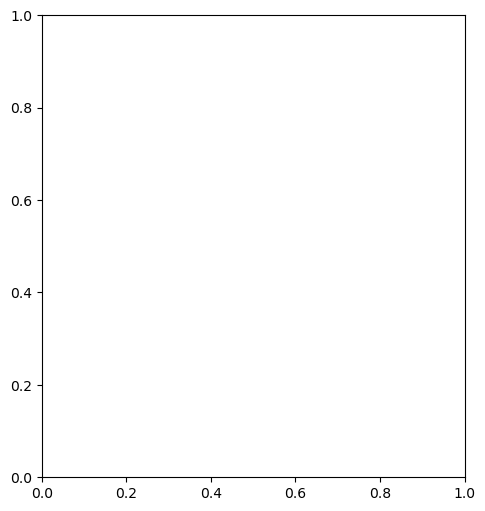

In [5]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load and preprocess the data
print("Loading data...")
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct
print("Data loaded successfully.")

X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define the model-building function
def build_model(rnn_units, dropout_rate, use_bidirectional):
    model = Sequential()
    if use_bidirectional:
        model.add(Bidirectional(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]))))
    else:
        model.add(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(SimpleRNN(units=rnn_units // 2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define parameter grid
param_grid = {
    'rnn_units': [30, 50, 70, 100],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'use_bidirectional': [True, False],
}

# Perform Grid Search
print("Starting Grid Search...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_accuracy = 0
best_params = {}

for params in ParameterGrid(param_grid):
    print(f"Evaluating parameter set: {params}")
    accuracies = []
    
    for train_index, val_index in skf.split(X_reshaped, y):
        X_train, X_val = X_reshaped[train_index], X_reshaped[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model = build_model(rnn_units=params['rnn_units'], dropout_rate=params['dropout_rate'], use_bidirectional=params['use_bidirectional'])
        
        # Callbacks
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping, lr_reduction], verbose=1)
        
        # Evaluate the model
        loss, accuracy = model.evaluate(X_val, y_val)
        accuracies.append(accuracy)
    
    mean_accuracy = np.mean(accuracies)
    print(f"Mean Accuracy for params {params}: {mean_accuracy}")

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params

print(f"Best Accuracy: {best_accuracy} with params {best_params}")

# Plot training history of the last set of parameters (for demonstration)
history = model.history
print("Plotting training history...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
print("Training history plotted.")


In [6]:
## random search

Loading data...
Data loaded successfully.
Reloading Tuner from my_dir/rnn_tuning/tuner0.json
Starting Random Search...
Best Hyperparameters: {'rnn_units': 80, 'use_bidirectional': True, 'dropout_rate': 0.5, 'learning_rate': 0.0011072010013781516}


/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/sivarani/anaconda3/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Model Accuracy on full dataset: 0.764595091342926
Retraining the best model to get training history...
Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7371 - loss: 0.5944 - val_accuracy: 0.7182 - val_loss: 0.6176 - learning_rate: 0.0011
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7359 - loss: 0.5916 - val_accuracy: 0.7176 - val_loss: 0.6314 - learning_rate: 0.0011
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7459 - loss: 0.5784 - val_accuracy: 0.7141 - val_loss: 0.6240 - learning_rate: 0.0011
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7393 - loss: 0.5858 - val_accuracy: 0.7241 - val_loss: 0.6149 - learning_rate: 0.0011
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7319 - loss: 0.6091 - val_accuracy: 0.6459 - val_loss: 0.6383 - learning_rate: 0.0011
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7417 - loss: 0.5919 - val_accuracy: 0.7071 - val_loss: 0.6193 - le

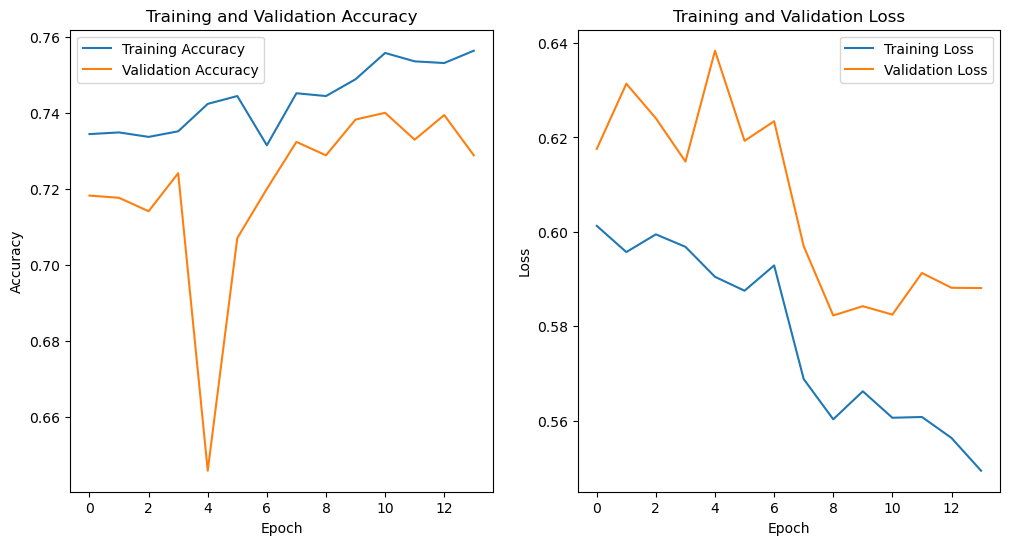

Training history plotted.


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import kerastuner as kt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load and preprocess the data
print("Loading data...")
data = pd.read_csv("./datasets/resampled_data_smote.csv")  # Ensure the path is correct
print("Data loaded successfully.")

X = data.drop(columns=['Severity'])
y = data['Severity']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for RNN
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Define the model-building function
def build_model(hp):
    model = Sequential()
    
    rnn_units = hp.Int('rnn_units', min_value=30, max_value=100, step=10)
    
    if hp.Boolean('use_bidirectional'):
        model.add(Bidirectional(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2]))))
    else:
        model.add(SimpleRNN(units=rnn_units, return_sequences=True, activation='relu', input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
    
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(SimpleRNN(units=rnn_units // 2, activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])  # Ensure accuracy is included
    return model

# Define the Random Search tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='rnn_tuning'
)

# Perform Random Search
print("Starting Random Search...")
tuner.search(X_reshaped, y, epochs=50, batch_size=64, validation_split=0.2, callbacks=[
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)
])

# Get the best hyperparameters and the corresponding model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_reshaped, y, verbose=0)
print(f"Best Model Accuracy on full dataset: {accuracy}")

# To ensure we have the training history, we will need to get it from the model.
# Note: Keras Tuner does not store the history of each trial by default. 
# To access the best model’s history, you should run the model fit directly again or use callbacks to save it.
# For demonstration, let's assume `best_model` has its history accessible (e.g., from manual training).

# Use TensorBoard for detailed analysis (optional)
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

# Retrain the best model to get history (for demonstration purposes)
print("Retraining the best model to get training history...")
history = best_model.fit(X_reshaped, y, epochs=50, batch_size=64, validation_split=0.2, callbacks=[
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5),
    tensorboard_callback
])

# Check available metrics in history
history_keys = history.history.keys()
print("Available metrics in history:", history_keys)

# Plot training history of the best model
print("Plotting training history...")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
if 'accuracy' in history_keys:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
elif 'acc' in history_keys:
    plt.plot(history.history['acc'], label='Training Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
else:
    print("No accuracy metrics found in history.")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
if 'loss' in history_keys:
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
else:
    print("No loss metrics found in history.")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
print("Training history plotted.")
